In [1]:
import numpy as np
import pandas as pd
import os
import networkx as nx
import sklearn #For generating some matrices
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics
import pickle #if you want to save layouts
import os
os.chdir("/home/lkcao/content-final")
import re
import regex
import lucem_illud_2020

In [2]:
df=pd.read_excel("/home/lkcao/content-final/wholesoap.xlsx",Sheet="sheet1")
namedf=pd.read_excel('/home/lkcao/content-final/cleaned.xlsx',Sheet='sheet1')
sodf=pd.read_csv("sepsoap.txt",encoding='utf-8',sep='\t')
sodf['words'].fillna("N/A",inplace=True)

In [3]:
shownamedict=dict()
for i in set(list(namedf['show'])):
    targetdf=namedf[namedf['show']==i]
    namelist=list(targetdf['name'])
    shownamedict[i]=namelist
shownamedict

{'Passions': ['Ethan',
  'Theresa',
  'Julian',
  'Rebecca',
  'Sheridan',
  'Luis',
  'Sam',
  'Tabitha',
  'Simone',
  'Timmy',
  'Gwen',
  'Miguel',
  'Kay',
  'Grace',
  'Charity',
  'Pilar',
  'Jessica',
  'Whitney',
  'Chad',
  'Ivy',
  'Alistair',
  'T.C.',
  'Eve',
  'Man',
  'David',
  'Brian',
  'Liz',
  'Beth',
  'Antonio',
  'Fox',
  'Katherine',
  'Paloma',
  'Martin',
  'Spike',
  'Fancy',
  'Noah',
  'Chris',
  'Jared'],
 'Young and Restless': ['Victoria',
  'Nikki',
  'Billy',
  'J.T.',
  'Jack',
  'Phyllis',
  'Michael',
  'Sharon',
  'Victor',
  'Isabella',
  'Paul',
  'Brittany',
  'Nicholas',
  'Cassie',
  'Noah',
  'Larry',
  'John',
  'Mackenzie',
  'Ashley',
  'Brad',
  'Jill',
  'Malcolm',
  'Neil',
  'Olivia',
  'Alex',
  'Esther',
  'Raul',
  'Woman',
  'Traci',
  'David',
  'Colleen',
  'Mac',
  'Tom',
  'Lauren',
  'Nick',
  'Diane',
  'Chris',
  'Diego',
  'Man',
  'Abby',
  'Lily',
  'Patty',
  'Dru',
  'Kevin',
  'Kay',
  'Bobby',
  'Devon',
  'Damon',
  

In [45]:
#randomly sample 100 episides from the whole corpus
allids=[]
for i in set(list(namedf['show'])):
    targetdf=df[df['show']==i]
    numberoftext=len(targetdf)
    firstid=targetdf[0:1]['textID']
    textID=list(np.random.randint(firstid, high=firstid+numberoftext, size=100, dtype='l'))
    allids=allids+textID

In [47]:
targetdf=pd.DataFrame()
for i in range(0,len(allids)):
    textid=allids[i]
    print('progress: '+str(i/1000*100))
    lines=sodf[sodf['textID']==textid]
    targetdf=targetdf.append(lines)
targetdf

progress: 0.0
progress: 0.1
progress: 0.2
progress: 0.3
progress: 0.4
progress: 0.5
progress: 0.6
progress: 0.7000000000000001
progress: 0.8
progress: 0.8999999999999999
progress: 1.0
progress: 1.0999999999999999
progress: 1.2
progress: 1.3
progress: 1.4000000000000001
progress: 1.5
progress: 1.6
progress: 1.7000000000000002
progress: 1.7999999999999998
progress: 1.9
progress: 2.0
progress: 2.1
progress: 2.1999999999999997
progress: 2.3
progress: 2.4
progress: 2.5
progress: 2.6
progress: 2.7
progress: 2.8000000000000003
progress: 2.9000000000000004
progress: 3.0
progress: 3.1
progress: 3.2
progress: 3.3000000000000003
progress: 3.4000000000000004
progress: 3.5000000000000004
progress: 3.5999999999999996
progress: 3.6999999999999997
progress: 3.8
progress: 3.9
progress: 4.0
progress: 4.1000000000000005
progress: 4.2
progress: 4.3
progress: 4.3999999999999995
progress: 4.5
progress: 4.6
progress: 4.7
progress: 4.8
progress: 4.9
progress: 5.0
progress: 5.1
progress: 5.2
progress: 5.3
prog

progress: 45.0
progress: 45.1
progress: 45.2
progress: 45.300000000000004
progress: 45.4
progress: 45.5
progress: 45.6
progress: 45.7
progress: 45.800000000000004
progress: 45.9
progress: 46.0
progress: 46.1
progress: 46.2
progress: 46.300000000000004
progress: 46.400000000000006
progress: 46.5
progress: 46.6
progress: 46.7
progress: 46.800000000000004
progress: 46.9
progress: 47.0
progress: 47.099999999999994
progress: 47.199999999999996
progress: 47.3
progress: 47.4
progress: 47.5
progress: 47.599999999999994
progress: 47.699999999999996
progress: 47.8
progress: 47.9
progress: 48.0
progress: 48.1
progress: 48.199999999999996
progress: 48.3
progress: 48.4
progress: 48.5
progress: 48.6
progress: 48.699999999999996
progress: 48.8
progress: 48.9
progress: 49.0
progress: 49.1
progress: 49.2
progress: 49.3
progress: 49.4
progress: 49.5
progress: 49.6
progress: 49.7
progress: 49.8
progress: 49.9
progress: 50.0
progress: 50.1
progress: 50.2
progress: 50.3
progress: 50.4
progress: 50.5
progre

progress: 89.9
progress: 90.0
progress: 90.10000000000001
progress: 90.2
progress: 90.3
progress: 90.4
progress: 90.5
progress: 90.60000000000001
progress: 90.7
progress: 90.8
progress: 90.9
progress: 91.0
progress: 91.10000000000001
progress: 91.2
progress: 91.3
progress: 91.4
progress: 91.5
progress: 91.60000000000001
progress: 91.7
progress: 91.8
progress: 91.9
progress: 92.0
progress: 92.10000000000001
progress: 92.2
progress: 92.30000000000001
progress: 92.4
progress: 92.5
progress: 92.60000000000001
progress: 92.7
progress: 92.80000000000001
progress: 92.9
progress: 93.0
progress: 93.10000000000001
progress: 93.2
progress: 93.30000000000001
progress: 93.4
progress: 93.5
progress: 93.60000000000001
progress: 93.7
progress: 93.8
progress: 93.89999999999999
progress: 94.0
progress: 94.1
progress: 94.19999999999999
progress: 94.3
progress: 94.39999999999999
progress: 94.5
progress: 94.6
progress: 94.69999999999999
progress: 94.8
progress: 94.89999999999999
progress: 95.0
progress: 95

Unnamed: 0  Unnamed: 0.1    listener               show     speaker  \
5694197     5694197           0.0         Kay           Passions         Ivy   
5694198     5694198           1.0         Ivy           Passions         Kay   
5694199     5694199           2.0         Kay           Passions         Ivy   
5694200     5694200           3.0         Ivy           Passions         Kay   
5694201     5694201           4.0         Kay           Passions         Ivy   
5694202     5694202           5.0         Ivy           Passions         Kay   
5694203     5694203           6.0         Ivy           Passions         Ivy   
5694204     5694204           7.0         Kay           Passions         Ivy   
5694205     5694205           8.0         Ivy           Passions         Kay   
5694206     5694206           9.0         Kay           Passions         Ivy   
5694207     5694207          10.0         Ivy           Passions         Kay   
5694208     5694208          11.0         Fox           Passions         Ivy   
5694209     5694209          12.0         Kay           Passions         Fox   
5694210     5694210          13.0      Miguel           Passions         Kay   
5694211     5694211          14.0         Fox           Passions      Miguel   
5694212     5694212          15.0       Fancy           Passions         Fox   
5694213     5694213          16.0       Fancy           Passions       Fancy   
5694214     5694214          17.0      Paloma           Passions       Fancy   
5694215     5694215          18.0        Luis           Passions      Paloma   
5694216     5694216          19.0       Fancy           Passions        Luis   
5694217     5694217          20.0       Fancy           Passions       Fancy   
5694218     5694218          21.0         Man           Passions       Fancy   
5694219     5694219          22.0      Paloma           Passions         Man   
5694220     5694220          23.0         Man           Passions      Paloma   
5694221     5694221          24.0  Second-Man           Passions         Man   
5694222     5694222          25.0        Luis           Passions  Second-Man   
5694223     5694223          26.0       Jared           Passions        Luis   
5694224     5694224          27.0     Theresa           Passions       Jared   
5694225     5694225          28.0       Jared           Passions     Theresa   
5694226     5694226          29.0       Jared           Passions       Jared   
...             ...           ...         ...                ...         ...   
2180528     2180528         299.0       Chloe  Days of Our Lives        Tony   
2180529     2180529         300.0       Brady  Days of Our Lives       Chloe   
2180530     2180530         301.0       Chloe  Days of Our Lives       Brady   
2180531     2180531         302.0       Brady  Days of Our Lives       Chloe   
2180532     2180532         303.0       Chloe  Days of Our Lives       Brady   
2180533     2180533         304.0       Brady  Days of Our Lives       Chloe   
2180534     2180534         305.0         Coe  Days of Our Lives       Brady   
2180535     2180535         306.0       Brady  Days of Our Lives         Coe   
2180536     2180536         307.0       Chloe  Days of Our Lives       Brady   
2180537     2180537         308.0       Brady  Days of Our Lives       Chloe   
2180538     2180538         309.0       Chloe  Days of Our Lives       Brady   
2180539     2180539         310.0       Chloe  Days of Our Lives       Chloe   
2180540     2180540         311.0       Brady  Days of Our Lives       Chloe   
2180541     2180541         312.0       Chloe  Days of Our Lives       Brady   
2180542     2180542         313.0       Lexie  Days of Our Lives       Chloe   
2180543     2180543         314.0         Abe  Days of Our Lives       Lexie   
2180544     2180544         315.0       Lexie  Days of Our Lives         Abe   
2180545     2180545         316.0         Abe  Days of Our Lives       Lexie   
2180546  

In [10]:
targetdf['words'].fillna('N/A',inplace=True)
targetdf['tokenized']=targetdf['words'].apply(lambda x: lucem_illud_2020.word_tokenize(x.lower()))

In [11]:
targetdf['normalized']=targetdf['tokenized'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [12]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)
        

In [54]:
targetdf.reset_index(inplace=True)
targetdf=targetdf[['show','speaker','listener','words','tokenized','normalized']]
targetdf[0:5]

show speaker listener  \
0  Passions     Ivy      Kay   
1  Passions     Kay      Ivy   
2  Passions     Ivy      Kay   
3  Passions     Kay      Ivy   
4  Passions     Ivy      Kay   

                                               words  \
0  Well , what do you think , Kay ? The moment I ...   
1                                          It \'s --   
2  No , no . No need to thank me . You know , it ...   
3  Oh , yes , Ivy . Your sentiment always comes t...   
4  Do n\'t be silly . I would n\'t have it any ot...   

                                           tokenized  \
0  [well, what, do, you, think, kay, the, moment,...   
1                                           [it, 's]   
2  [no, no, no, need, to, thank, me, you, know, i...   
3  [oh, yes, ivy, your, sentiment, always, comes,...   
4  [do, n\'t, be, silly, i, would, n\'t, have, it...   

                                          normalized  
0         [think, kay, moment, lay, eye, know, gown]  
1                                                 []  
2  [need, thank, know, way, think, express, inner...  
3  [oh, yes, ivy, sentiment, come, loud, clear, n...  
4                     [n\'t, silly, n\'t, way, wrap]

In [44]:
def moving(i):
    row=targetdf.iloc[i]
    row1=targetdf.iloc[i+1]
    progress=i/len(targetdf)*100
    print(progress)
    targetlist=[]
    text1=row['normalized']
    text2=row1['normalized']
    try:
        simi= -Divergence(text1,text2,'KL')
    except:
        simi='to be determined'
    return simi

In [45]:
items=[x for x in range(0,len(targetdf)-1)]
import time
from multiprocessing.dummy import Pool as ThreadPool
if (__name__ == '__main__'):
    pool = ThreadPool(processes=48)
    results=pool.map(moving, items)
    pool.close()
    pool.join()

0.0
1.042034675057533
1.5630520125862994
2.084069350115066
2.6050866876438326
3.126104025172599
3.64712136270136574.168138700230132
4.6891560377589

5.210173375287665
5.731190712816432
6.252208050345198
6.773225387873966
7.294242725402731
7.815260062931498
8.336277400460265
8.857294737989031
9.37831207551789.899329413046566
10.42034675057533
10.941364088104098
11.462381425632865
0.5210173375287666
11.983398763161631
12.504416100690396
13.025433438219164
13.546450775747932
14.067468113276696
14.588485450805463
15.10950278833423
15.630520125862995
16.15153746339176
16.67255480092053
17.193572138449298
17.714589475978062
18.23560681350683
18.7566241510356
19.277641488564363
19.79865882609313
20.319676163621896
20.84069350115066
21.36171083867943
21.882728176208197
22.40374551373696
22.92476285126573

23.445780188794497
23.966797526323262
24.487814863852027
0.000330175752553084
0.000660351505106168
10.94169426385665
14.067798289029252
14.068128464781804
14.068458640534356
14.06878881628691

10.94367531837197
5.21380530856575
5.2141354843183025
5.214465660070855
5.214795835823409
5.215126011575962
5.215456187328515
5.215786363081068
5.216116538833622
3.6487722414641315
3.649102417216685
22.407377447015044
22.4077076227676
22.40803779852015
19.281603597595
16.15781080269027
16.158140978442827
16.15847115419538
16.1588013299479317.199845477747804

17.200175653500356
17.20050582925291
17.200836005005467
20.32561932716785
3.130396309955789
3.1307264857083426
3.131056661460896
3.1313868372134483
7.8155902386840514
15.630850301615551
15.631180477368103
5.732841591579198
5.733171767331751
16.67453585543585
16.6748660311884
16.675196206940953
16.67552638269351
16.67585655844606
11.46403230439563
11.464362480148182
11.46469265590073610.944005494124523

10.944335669877075
10.944665845629627
10.944996021382183
23.970099283848793
1.5653632428541713
22.9270740815336
22.927404257286156
22.927734433038708
22.92806460879126
22.928394784543812
5.7335019430843035
5.733832118836856
19.799979

23.971750162611556
8.860926671267116
8.86125684701967
10.949288306165371
4.176062918291406
4.17639309404396
4.176723269796512
4.177053445549066
12.51201014299912
12.512340318751672
8.861587022772222
8.861917198524774
8.862247374277327
8.862577550029881
13.54843183026325
13.548762006015803
13.549092181768355
5.221729526627024
5.2220597023795765
5.222389878132129
5.222720053884683
5.223050229637236
5.223380405389789
5.223710581142342
5.224040756894896
5.224370932647449
5.2247011084000015
5.225031284152554
6.775206442389284
17.71921193651381
17.71954211226636
24.492767500140324
24.493097675892876
24.49342785164543
24.493758027397984
9.383925063311201
9.384255239063753
3.6566964595254055
21.36831435373049
16.16210308747346
8.862907725782435
8.863237901534987
18.242210328557892
16.6798186674767
16.68014884322925
9.384585414816307
2.609378972427023
12.512670494504224
12.513000670256776
12.51333084600933
12.513661021761886
12.513991197514438
12.51432137326699
2.08770128339315
2.08803145914570

13.029065371497248
18.244851734578315
1.5732874609154452
1.060854692953059
1.061184868705612
9.906593279602733
9.906923455355287
9.907253631107839
19.287546761140955
19.287876936893507
19.28820711264606
19.288537288398615
19.288867464151167
23.97406139287943
23.974391568631983
7.819222171962135
7.819552347714688
7.819882523467242
7.820212699219795
7.820542874972347
7.820873050724901
7.821203226477453
7.821533402230008
8.342550739758774
8.342880915511326
6.775536618141836
6.77586679389439
13.552393939293886
10.957872875731752
10.958203051484306
10.958533227236858
10.958863402989412
10.959193578741964
10.959523754494517
10.959853930247071
10.960184105999623
10.960514281752175
10.96084445750473
10.961174633257283
1.5736176366679984
1.5739478124205515
14.594758790103974
14.595088965856526
14.595419141609078
14.595749317361632
13.552724115046438
13.55305429079899120.334864248239338
20.33519442399189
20.335524599744446
20.335854775496998

20.33618495124955
20.3365151270021
2.6123505542000007

6.270037540983066
6.270367716735619
6.270697892488171
9.908244158365498
9.90857433411805
9.908904509870604
9.909234685623156
7.307119579752302
7.307449755504855
16.1716781842975
18.763227666086657
13.029725723002352
10.434544307935113
10.434874483687667
22.42586728915802
14.078694088863502
3.136009297749192
3.1363394735017454
3.136669649254298
3.136999825006851
3.1373300007594045
3.1376601765119574
3.1379903522645103
5.7387847551251525
5.739114930877706
5.739445106630259
5.739775282382813
5.740105458135365
5.740435633887919
5.740765809640472
5.7410959853930255
5.7414261611455775
5.741756336898131
5.742086512650684
5.742416688403237
5.74274686415579
17.213712859355034
17.214043035107586
17.21437321086014
17.214703386612694
14.596739844619291
14.597070020371843
14.597400196124397
14.597730371876949
14.598060547629505
14.598390723382057
14.598720899134609
14.599051074887162
4.187949245383318
4.188279421135871
4.188609596888424
4.1889397726409765
23.458657043144065
23.458987218896617
23.45

21.37260663851368
21.372936814266232
23.461958800669596
5.749680554959405
5.750010730711958
0.5371959494038677
0.5375261251564208
0.5378563009089739
0.538186476661527
6.778178024162261
6.778508199914815
6.778838375667368
6.77916855141992
6.7794987271724745
6.7798289029250265
6.78015907867758
20.33948670877508
1.5812116789767194
1.5815418547292723
1.5818720304818255
8.871822471101368
21.898576612330743
21.8989067880833
11.477239334497753
11.477569510250305
4.194882936186932
4.195213111939485
4.195543287692038
4.195873463444592
1.5822022062343783
1.5825323819869317
1.5828625577394846
1.583192733492038
1.5835229092445908
1.583853084997144
1.5841832607496968
1.5845134365022502
1.584843612254803
11.47789968600286
11.478229861755413
11.478560037507965
11.478890213260518
24.50267277271692
24.503002948469472
24.503333124222024
24.503663299974576
3.1422826370477006
3.1426128128002535
3.142942988552807
6.780489254430133
6.780819430182686
7.308770458515069
5.750340906464511
14.602352832412693
0.5

9.9141873219114543.6689129623698697

3.669243138122422
3.6695733138749755
3.669903489627529
2.102889368010592
2.1032195437631453
2.1035497195156982
2.1038798952682516
2.1042100710208045
2.1045402467733574
2.1048704225259103
2.1052005982784636
2.1055307740310165
2.10586094978357
2.1061911255361228
11.487474782826899
11.487804958579453
11.488135134332005
11.488465310084559
11.48879548583711
11.489125661589664
11.489455837342218
11.48978601309477
7.835400783837236
13.039961171331498
13.040291347084052
22.94160181464594
15.120068412415929
23.982645962445808
7.83573095958979
7.836061135342343
1.0661375049939084
1.0664676807464615
15.646038386232991
15.646368561985543
21.90220854560883
21.90253872136138
21.902868897113933
18.770491532642826
18.77082170839538
18.771151884147933
18.771482059900485
18.771812235653037
18.77214241140559
18.772472587158145
18.772802762910697
9.401424378196515
3.146905097583444
3.1472352733359967
3.1475654490885496
3.147895624841103
3.1482258005936563
2.10652130128

4.203797681505866
4.204127857258419
4.2044580330109715
4.204788208763524
4.205118384516078
4.205448560268631
4.205778736021184
4.206108911773737
4.206439087526291
4.206769263278844
19.295801154954784
15.650330671016183
15.650660846768735
20.343118642053167
1.069109086766886
1.069439262519439
1.0697694382719922
1.0700996140245453
17.72581545156487
17.726145627317422
17.726475803069974
5.750671082217064
5.751001257969617
5.751331433722171
5.7516616094747235
21.37887997781219
21.379210153564742
9.91616837642677116.182573984131754

16.182904159884306
18.775113993178568
13.569563078426647
13.569893254179199
13.570223429931753
13.570553605684305
1.0704297897770985
1.0707599655296516
20.86512650683959
4.2070994390313965
0.5467710462279072
16.183234335636858
16.183564511389413
16.18389468714197
16.18422486289452
16.184555038647073
16.184885214399625
16.185215390152177
16.18554556590473
16.185875741657284
14.609946874721413
14.610277050473966
14.610607226226522
22.433461331466738
22.43379150721

22.951176911469975
22.951507087222527
22.95183726297508
22.952167438727635
22.952497614480187
22.952827790232742
13.576166593477708
13.576496769230262
23.468232139968105
1.5924376545635242
1.592767830316077
7.84101377163064
7.841343947383192
7.8416741231357445
12.540405257718684
21.905510303134367.321647312864638

13.042932753104477
22.95315796598529418.779406277961762
18.779736453714314
18.780066629466866
18.780396805219418
18.78072698097197
18.781057156724522
18.781387332477077
18.78171750822963

18.782047683982185
18.782377859734737
18.78270803548729
10.974381663359406
18.251455249629377
18.251785425381932
18.252115601134484
18.252445776887036
18.252775952639592
18.253106128392144
18.253436304144696
18.253766479897248
18.2540966556498
18.254426831402355
18.254757007154907
18.255087182907463
18.255417358660015
18.255747534412567
18.256077710165123
18.256407885917675
18.256738061670227
18.25706823742278
18.257398413175334
18.257728588927886
18.25805876468044
18.258388940432994
18.2587

3.1601121276855673
13.579468351003237
4.711277813179956
5.7543030154951476
15.129973684992521
2.622916178281699
1.5977204666043736
5.2375779627495715
5.2379081385021244
5.238238314254677
9.923762418735492
9.924092594488046
9.924422770240598
9.924752945993152
7.325279246142721
16.189837850687923
6.789403999749066
14.08826918568754
14.088599361440094
14.088929537192648
14.089259712945202
2.1174171011229275
23.475826182276826
23.476156358029378
23.47648653378193
23.476816709534486
23.47714688528704
23.477477061039593
8.353446539593024
8.353776715345578
8.354106891098132
1.072410844292417
1.07274102004497
20.86842826436512
20.868758440117674
20.869088615870226
20.86941879162278
14.089589888697754
14.089920064450306
14.09025024020286
14.090580415955415
14.090910591707967
5.754633191247701
5.754963367000254
1.0730711957975232
1.073401371550076
5.2385684900072313.673205247153059
3.6735354229056125

3.673865598658166
3.674195774410719
3.6745259501632717
3.674856125915825
17.232202701498007
17.

9.930365933786554
15.13096421225018
15.131294388002733
15.131624563755286
15.131954739507842
13.582439932776216
13.582770108528768
13.583100284281324
9.413971056793532
9.414301232546084
9.414631408298638
9.41496158405119
9.415291759803743
6.791385054264384
0.02047089665829121
0.561959130845349
0.562289306597902
11.500021461423916
5.764538463824294
5.7648686395768465
5.765198815329399
5.765528991081953
12.01014299911843
12.010473174870985
12.010803350623538
12.01113352637609
12.011463702128642
23.4787977640498
18.786670144517927
4.714249394952934
4.714579570705486
4.71490974645804
4.715239922210593
4.7155700979631465
4.7159002737156985
12.55823474835655
9.930696109539108
9.931026285291662
4.217004711607989
4.2173348873605425
4.2176650631130945
4.217995238865648
21.38548349286325
21.385813668615803
13.047225037887667
16.69302569757882
22.438744143507588
22.43907431926014
0.020801072410844293
0.021131248163397377
0.02146142391595046
0.021791599668503546
5.238898665759784
5.239228841512337

15.665518755633624
15.665848931386178
24.00014527733112
24.000475453083677
7.848277638186807
14.620842674555664
24.5168703300767
24.517200505829255
17.24012691955928
17.240457095311832
17.240787271064388
17.241117446816943
17.241447622569495
23.479788291307464
23.480118467060016
23.48044864281257
23.480778818565124
24.00080562883623
24.00113580458878517.734730196883802

24.001465980341337
24.00179615609389
24.00212633184644
24.002456507598996
22.958440778026144
22.958770953778696
14.101806391542219
14.102136567294771
14.102466743047323
14.102796918799875
14.10312709455243
14.103457270304984
14.103787446057536
14.104117621810088
14.104447797562642
14.104777973315198
14.10510814906775
24.517530681581807
24.51786085733436
5.768170397102377
15.666179107138731
18.7889813747858
7.333203464203995
7.333533639956549
7.333863815709102
3.6841010469873114
3.684431222739865
13.584751163044087
13.585081338796643
13.585411514549195
24.002786683351548
24.0031168591041
24.003447034856652
24.00377721060

14.114353070139234
14.114683245891788
14.11501342164434
14.115343597396896
8.895925301037742
8.896255476790294
8.896585652542848
8.896915828295402
8.897246004047956
8.897576179800508
10.473835222488932
10.474165398241484
0.5665815913810921
0.5669117671336452
0.5672419428861983
0.5675721186387513
13.589373623579831
13.589703799332383
13.590033975084935
13.590364150837491
14.115673773149448
14.116003948902001
14.116334124654554
14.116664300407106
16.199743123264515
16.200073299017067
16.20040347476962
1.0776936563332662
1.0780238320858193
1.0783540078383724
1.0786841835909255
12.014765459654173
2.6278688145699958
9.420904747597145
9.421234923349699
9.421565099102253
9.421895274854805
9.422225450607357
9.422555626359912
9.4228858021124647.335514694471867

7.33584487022442
7.336175045976974
7.336505221729526
11.505634449217318
11.50596462496987
11.506294800722424
11.506624976474978
7.861814844041483
12.015095635406727
10.981315354163021
19.823091831782058
19.82342200753461
15.6694808646642

14.117985003417319
14.11831517916987
14.118645354922425
14.118975530674978
14.119305706427532
1.6172008360050054
1.6175310117575585
1.6178611875101117
1.6181913632626648
1.6185215390152177
1.618851714767771
7.863135547051696
7.863465722804248
7.863795898556802
7.864126074309355
7.864456250061908
7.8647864258144615
7.865116601567014
7.865446777319566
7.86577695307212
7.866107128824673
7.866437304577227
7.86676748032978
7.867097656082332
7.8674278318348865
7.8677580075874385
7.868088183339991
7.868418359092545
2.628529166075102
2.628859341827655
2.6291895175802082
2.629519693332761
2.629849869085314
2.630180044837867
2.6305102205904203
2.630840396342973
2.6311705720955265
2.6315007478480794
6.296121425434759
4.229221214452453
22.96042183254146
22.960752008294012
21.401001753233245
21.401331928985798
21.401662104738353
21.401992280490905
21.402322456243457
21.402652631996013
21.402982807748565
21.40331298350112
21.403643159253672
24.522483317870105
24.522813493622657
24.52314366937521
3.1

18.274567552308092
20.364910241721667
20.36524041747422
20.365570593226774
20.36590076897933
10.993201681254932
10.993531857007484
15.678725785735747
24.01236178017559
24.01269195592814
24.013022131680696
24.013352307433248
6.2967817769398655
6.2971119526924175
18.274897728060647
18.2752279038132
13.052177674175963
13.052507849928515
13.052838025681071
19.82672376506014
19.82705394081269313.603571180939614
13.603901356692166

13.604231532444722
13.604561708197274
13.604891883949827
13.60522205970238
13.605552235454931
13.605882411207485
13.606212586960039
13.606542762712593
13.606872938465145
13.607203114217697
13.60753328997025
2.130624131225051
2.1309543069776042
2.131284482730157
13.053168201433623
13.053498377186177
21.918387157483927
21.918717333236483
21.919047508989035
21.919377684741587
21.919707860494142
22.451951173609714
22.452281349362266
15.141199660579327
20.876022306673843
20.876352482426398
16.704581848918178
16.704912024670733
16.705242200423285
16.70557237617584
16.70

1.0852876986419873
1.0856178743945404
1.0859480501470933
1.0862782258996464
8.904840046356675
5.775764439411098
4.748917848971007
4.749248024723561
4.749578200476114
4.7499083762286665
4.750238551981219
4.750568727733773
5.255077277634885
5.255407453387438
13.054488904443836
13.054819080196388
16.206346638315576
16.7121758912269
16.7125060669794541.0866084016521995

1.0869385774047526
1.0872687531573058
7.875021874143606
7.8753520498961604
7.8756822256487125
7.876012401401265
7.876342577153819
4.237805784018834
3.1733191577876907
20.368872350752305
10.4883629556012688.905170222109229

8.905500397861783
20.87800336118916
18.276878782575963
18.277208958328515
18.27753913408107
18.277869309833626
18.27819948558618
7.348061373068885
2.636453384136376
17.25201324665119
12.021699150457788
16.712836242732006
16.71316641848456
0.589693894059808
0.5900240698123611
0.5903542455649142
0.5906844213174672
17.746946699728266
17.747276875480818
18.27852966133873
18.278859837091282
18.279190012843838


15.684999125034254
20.880644767209585
20.880974942962137
12.024670732230765
12.02500090798332
2.1395388765439844
18.801528053382814
11.001125899316206
11.00145607506876
11.001786250821311
21.92102856350435
16.716138000257537
16.71646817601009
16.716798351762645
16.717128527515197
2.1398690522965373
2.1401992280490907
2.1405294038016436
2.140859579554197
2.14118975530675
2.141519931059303
2.141850106811856
2.142180282564409
2.142510458316962
2.142840634069515
2.143170809822068
2.1435009855746214
2.1438311613271743
2.1441613370797277
2.1444915128322806
12.025331083735873
12.025661259488425
12.025991435240979
12.026321610993532
12.026651786746084
12.026981962498638
12.02731213825119
12.027642314003744
9.435102304956928
7.879644334679351
9.435432480709482
7.879974510431903
7.880304686184456
7.8806348619370095
7.880965037689562
7.881295213442114
1.6396527871786150.5959672333583166
0.5962974091108697

0.5966275848634228
0.5969577606159759
12.027972489756298
12.02830266550885
12.0286328412614

2.6394249659093534
19.32419626967435
24.028540392050687
24.028870567803242
24.029200743555794
24.029530919308346
1.6449355992194645
4.24176789304947
8.909132331139865
12.576064238994416
12.57639441474697
21.924660496782437
24.0298610950609
6.821761223499269
1.0984947287441105
1.0988249044966636
9.948855775929527
6.302394764733267
6.302724940485821
6.303055116238373
22.458554688660772
22.458884864413328
10.495296646404881
10.495626822157435
10.495956997909987
10.49628717366254
10.496617349415093
10.496947525167647
4.756842067032281
4.757172242784835
4.7575024185373875
4.75783259428994
4.758162770042493
4.758492945795047
4.7588231215476
4.759153297300153
4.759483473052706
4.759813648805259
4.7601438245578125
4.7604740003103645
22.97395903839614
22.97428921414869
14.132842912282209
5.7803868999468415
5.780717075699394
5.781047251451947
5.781377427204501
18.28711423090511
18.287444406657663
0.5989388151312944
21.424444231664516
7.352683833604627
6.822091399251821
6.822421575004375
1.099155

7.887568552740625
7.887898728493177
23.49893848495554
23.499268660708093
20.884276700487668
18.292727218698513
15.68665000379702
1.101466310517088
1.1017964862696412
1.1021266620221943
1.1024568377747475
1.1027870135273006
16.721420812298387
3.1838847818693896
3.184214957621942
5.259369562418075
0.6005896938940598
0.6009198696466129
4.761134351815471
12.579365996519948
12.5796961722725
12.580026348025052
12.580356523777606
12.58068669953016
7.88822890424573
7.888559079998283
16.21228980186153
23.49959883646065
23.4999290122132
9.441375644255437
11.5198320065771
2.149444149120577
2.14977432487313
2.1501045006256834
2.1504346763782363
2.150764852130789
2.151095027883342
2.1514252036358954
2.1517553793884483
2.1520855551410016
2.1524157308935545
2.152745906646108
2.1530760823986608
2.153406258151214
2.153736433903767
17.75487091778954
17.75520109354209
8.377879545281953
17.755531269294643
17.7558614450472
17.75619162079975
17.756521796552306
17.756851972304858
17.75718214805741
16.7217509

13.618429089804504
13.618759265557056
13.61908944130961
6.3099888070419885
6.310318982794541
6.310649158547095
12.035896707817571
0.6042216271721438
11.0110311718928
9.443026523018203
6.828694914302884
3.6999494831098594
3.7002796588624127
3.700609834614966
3.7009400103675185
3.701270186120072
3.7016003618726248
3.701930537625178
3.702260713377731
3.702590889130284
3.7029210648828372
3.7032512406353906
3.703581416387943
21.43137792246813
21.431708098220685
21.432038273973237
21.43236844972579
21.43269862547834
1.646916653734783
1.6472468294873361
1.647577005239889
1.6479071809924424
1.6482373567449953
1.6485675324975486
8.916726373448586
8.91705654920114
8.917386724953692
9.954798939475483
9.955129115228036
9.95545929098059
9.955789466733142
9.956119642485694
9.956449818238248
9.956779993990802
9.957110169743355
9.957440345495908
9.95777052124846
9.958100697001013
9.958430872753567
0.6045518029246968
0.6048819786772499
11.011361347645352
16.72604327283413
12.583988457055693
2.156377839

16.72736397584434
16.727694151596893
9.44599810479118
9.446328280543733
9.446658456296287
17.257626234444594
17.25795641019715
9.959421400011227
5.795905160316837
5.79623533606939
5.796565511821942
5.796895687574496
4.764436109341002
4.764766285093555
4.765096460846109
4.7654266365986615
21.93489594511158
21.935226120864133
21.93555629661669
6.829025090055437
6.829355265807989
12.584318632808245
12.584648808560797
5.797225863327049
5.797556039079602
5.797886214832155
5.798216390584708
5.7985465663372615
5.798876742089814
24.036794785864515
24.037124961617067
24.03745513736962
24.037785313122175
6.829685441560543
18.80846174418643
18.808791919938983
19.333441190745834
9.446988632048841
3.1852054848796016
3.185535660632154
3.1858658363847074
3.186196012137261
3.186526187889814
3.1868563636423666
3.18718653939492
3.1875167151474733
3.1878468909000266
3.188177066652579
3.1885072424051324
3.1888374181576853
3.1891675939102386
1.1140129891141053
23.504551472748943
23.504881648501495
23.50521

19.337073124023917
19.337403299776472
7.912661909934658
7.912992085687211
3.706552998160921
3.706883173913474
3.7072133496660276
3.70754352541858
3.7078737011711334
3.7082038769236867
3.70853405267624
3.7088642284287925
3.709194404181346
3.709524579933899
3.709854755686452
20.382079380854428
3.1941202301985347
5.80052762085258
11.013672577913223
12.045471804641611
15.699857033899145
15.700187209651698
17.271823791804376
17.27215396755693
17.272484143309484
17.272814319062036
14.64791708626502
14.648247262017572
14.648577437770124
14.648907613522677
14.649237789275233
14.649567965027785
14.649898140780337
17.76048390558294
17.760814081335493
17.76114425708805
17.7614744328406
0.06009198696466129
0.06042216271721437
0.06075233846976746
0.06108251422232054
0.061412689974873626
0.06174286572742671
16.73033555761732
16.73066573336987
7.913322261439765
7.913652437192317
7.913982612944872
7.914312788697424
15.163321436000382
15.163651611752938
7.363249457686326
7.36357963343888
7.363909809191

15.704479494434887
15.704809670187442
8.384483060333016
8.384813236085568
8.38514341183812
8.385473587590674
23.510494636294897
23.510824812047453
23.511154987800005
23.51148516355256
7.369522796984835
0.6170984815217148.923329888499648
8.923660064252202
8.923990240004755
8.924320415757308
22.98914712301358
22.989477298766133
22.989807474518685
22.99013765027124
22.990467826023792
22.990798001776348
8.924650591509861
22.9911281775289

8.924980767262413
8.925310943014967
10.508833852259558
19.34268611181732
6.314281091825179
4.25134298987351
3.714807391974748
22.991458353281452
8.92564111876752
15.705139845939994
15.705470021692546
15.7058001974451
15.706130373197652
15.706460548950208
9.966685266567394
9.967015442319948
9.9673456180725
9.967675793825054
9.968005969577606
9.96833614533016
13.072648570834255
1.120616504165167
1.1209466799177201
1.1212768556702732
1.1216070314228264
1.1219372071753795
1.1222673829279324
1.1225975586804855
1.1229277344330386
8.385803763343228
24.5518689598

24.052643221987065
24.052973397739617
24.05330357349217
24.053633749244725
24.053963924997277
4.770049097134405
4.770379272886958
4.770709448639511
4.771039624392063
4.771369800144617
9.45227144408969
9.452601619842243
9.452931795594795
9.453261971347349
9.4535921470999
9.453922322852454
13.625032604855564
13.62536278060812
13.625692956360671
13.626023132113223
13.626353307865777
8.928612700540498
8.928942876293052
0.6184191845319263
4.252993868636275
4.253324044388828
5.808121663161301
5.808451838913854
5.808782014666407
5.80911219041896
5.809442366171513
5.809772541924066
5.810102717676619
5.810432893429172
5.810763069181726
5.811093244934278
5.81142342068683214.15463451195071
14.154964687703265

14.155294863455817
14.155625039208369
14.155955214960924
14.156285390713478
14.15661556646603
14.156945742218582
14.157275917971134
14.15760609372369
14.157936269476243
7.373484906015472
7.373815081768025
7.374145257520579
7.3744754332731315
7.374805609025685
7.375135784778237
8.388114993611

7.916293843212742
7.916624018965296
7.916954194717849
7.9172843704704015
12.604789529466535
12.605119705219089
12.605449880971642
3.1967616362189597
3.1970918119715126
18.818036841010468
18.818367016763023
18.818697192515575
18.81902736826813
14.662774995129906
12.059009010496286
12.059339186248842
12.059669362001394
12.059999537753946
9.97493966038122
9.975269836133775
9.975600011886328
9.97593018763888
9.976260363391432
9.976590539143986
9.97692071489654
0.6210605905523511
0.6213907663049041
0.6217209420574572
8.93224463381858
17.277436779597778
17.277766955350334
17.278097131102886
6.8399208898896875
6.840251065642241
22.476714355051193
15.171906005566763
15.172236181319315
0.6220511178100103
0.07197831405657232
0.0723084898091254
24.559793177908603
18.312207588099145
9.977250890649092
9.977581066401646
9.977911242154198
20.897483730589794
20.897813906342346
20.8981440820949
20.89847425784745
20.898804433600006
20.8991346093525581.665736671630309
1.666066847382862

1.666397023135415

20.902766542630644
20.903096718383196
16.231770171262163
16.232100347014715
16.23243052276727
4.784246654494187
4.258937032182231
4.2592672079347835
4.259597383687336
8.934555864086454
8.934886039839006
18.823980004556425
18.824310180308977
14.167181190547728
14.167511366300282
14.167841542052834
14.16817171780539
14.168501893557941
14.168832069310493
14.169162245063047
17.278757482607993
17.279087658360545
24.058256209780467
24.05858638553302
21.9474426237086
18.824640356061533
6.84718475644585723.525352545159787

23.525682720912343
19.35457243890923
19.354902614661786
19.355232790414338
19.35556296616689
19.355893141919445
19.356223317671997
3.719429852510491
3.71976002826304439.456563728872878
9.456893904625433
9.457224080377985

9.457554256130539
19.848845540481197
19.849175716233752
19.849505891986304
21.455150576651953
6.8475149321984095
6.8478451079509615
6.848175283703515
6.848505459456068
11.019285565706625
11.019615741459178
11.019945917211732
11.020276092964284
11.0206062687

24.063539021821313
21.949093502471364
21.94942367822392
21.94975385397647
21.950084029729027
21.95041420548158
21.95074438123413
21.951074556986683
21.95140473273924
21.95173490849179
21.952065084244342
21.952395259996894
2.1804806698605668
9.462176716666281
9.462506892418835
18.828602465092168
18.828932640844723
19.35985525095008
19.360185426702632
19.360515602455187
8.399671144950457
8.40000132070301
8.400331496455564
8.400661672208116
8.400991847960668
8.93752744585943
8.937857621611984
8.938187797364536
15.7219788093202
11.54756676979156
11.547896945544114
11.548227121296666
11.54855729704922
11.548887472801772
24.564415638444345
18.316830048634888
18.31716022438744
18.317490400139995
18.317820575892547
13.635598228937262
13.635928404689817
13.63625858044237
13.636588756194923
13.636918931947475
13.637249107700027
13.637579283452581
13.637909459205137
1.1430684553387769
21.459773037187695
19.36084577820774
19.361175953960295
12.069244458825432
12.069574634577986
22.48034628832928
2

19.857099934295025
19.857430110047577
12.07518762237139
12.075517798123942
15.724620215340627
15.724950391093179
15.725280566845731
15.725610742598285
1.6782833502273262
1.6786135259798791
1.6789437017324322
23.000042922847832
23.000373098600384
18.320792157665526
18.321122333418078
18.321452509170634
18.321782684923186
18.322112860675738
18.32244303642829
18.3227732121808416.240684916581095

16.24101509233365
16.241345268086203
13.079252085885319
13.07958226163787
13.079912437390423
15.725940918350839
15.726271094103392
15.726601269855944
14.175435584361557
14.175765760114109
14.176095935866663
14.176426111619215
14.176756287371767
12.075847973876494
20.913992518217448
20.91432269397
20.914652869722552
20.914983045475104
24.067831306604507
7.920586127995932
7.920916303748485
24.56606651720711
24.566396692959664
24.566726868712216
24.567057044464768
24.56738722021732
14.680934661520329
14.681264837272881
20.3959467624616618.829262816597275
0.08155341088061174
0.08188358663316483
0.0822

8.410236769032156
8.410566944784708
4.26421984422308
4.264550019975633
4.264880195728185
4.790519993792696
22.492562791173743
22.492892966926295
22.493223142678847
23.531956060210852
23.532286235963404
23.532616411715956
23.53294658746851
23.53327676322106
23.533606938973616
19.86106204332566
19.861392219078216
19.861722394830768
19.862052570583323
19.862382746335875
19.862712922088427
19.86304309784098
19.863373273593535
19.863703449346087
19.86403362509864
19.864363800851194
19.864693976603746
7.394285978426317
20.398588168482082
20.398918344234637
20.39924851998719
4.265210371480739
4.265540547233292
4.265870722985846
4.266200898738398
4.266531074490952
4.266861250243505
8.94181973064262
14.685226946303517
14.68555712205607
14.685887297808623
14.686217473561177
14.68654764931373
14.686877825066283
14.687208000818835
14.687538176571389
21.463735146218333
21.464065321970885
21.464395497723437
21.46472567347599
2.6585751595574325
19.36414753573327
19.364477711485826
13.64814490753428
1

17.785577262776975
21.467367079496416
17.78590743852953
21.467697255248968
21.46802743100152
9.991118272256323
9.991448448008875
9.991778623761428
4.7941519270707795
4.79448210282333319.865354328108854

19.865684503861406
19.866014679613958
19.86634485536651
0.0950906167352882
24.573990735268385
24.574320911020937
13.085525425183825
13.65210701656492
23.010608546929532
23.010938722682084
6.333101109720704
5.827932208314486
5.828262384067038
5.828592559819592
5.828922735572145
5.829252911324699
5.8295830870772510.09542079248784127

3.205676381537893
3.2060065572904457
3.206336733042999
3.2066669087955515
3.206997084548105
19.36612859024859
12.61733620806355
12.617666383816106
12.61799655956866
12.618326735321212
9.99210879951398
9.992438975266534
2.661216565577857
2.6615467413304104
2.6618769170829633
2.6622070928355166
21.468357606754076
21.468687782506628
21.469017958259183
21.469348134011735
20.40651238654336
3.7290049493345307
3.729335125087084
3.7296653008396365
23.533937114726168


1.159577242966431
13.656399301348108
13.65672947710066
24.07872710643876
24.07905728219131
24.079387457943863
24.079717633696415
24.08004780944897
22.498505954719697
22.49883613047225
22.499166306224804
6.33475198848347
6.335082164236022
3.2076574360532115
3.207987611805764
3.2083177875583173
17.287011876421822
17.287342052174374
17.287672227926926
17.288002403679478
17.28833257943203
24.080377985201523
24.080708160954075
24.081038336706627
8.414859229567899
8.41518940532045
8.415519581073006
8.415849756825558
5.28776467713764
14.18963314172134
14.189963317473891
17.288662755184582
11.041737516880236
11.042067692632788
11.042397868385342
1.1599074187189842
1.160237594471537
1.1605677702240902
1.1608979459766433
1.161228121729196423.01192924993974
23.012259425692296

23.012589601444848
23.012919777197403
13.086846128194038
13.08717630394659
13.087506479699144
13.087836655451696
13.088166831204251
13.088497006956803
19.366458766001145
17.788218668797402
17.788548844549954
4.7981140361014

18.33201813325233
18.332348309004885
18.332678484757437
18.33300866050999
0.6461539477463853
21.473970594547477
21.47430077030003
2.2012817422714113
2.2016119180239640.1033450105491153
0.10367518630166837
0.10400536205422146

0.10433553780677454
0.10466571355932763
0.10499588931188071
19.87492942493289
7.929170697562313
7.929500873314865
7.9298310490674195
7.9301612248199715
10.004985653863551
10.005315829616105
10.005646005368659
5.831894317345123
5.832224493097676
5.8325546688502286
5.832884844602782
5.833215020355335
5.833545196107888
5.833875371860441
5.834205547612995
15.189075144699524
15.189405320452076
15.189735496204628
15.190065671957184
15.190395847709738
19.875259600685443
19.875589776437998
19.87591995219055
19.876250127943106
19.876580303695658
19.87691047944821
1.1665109337700459
1.1668411095225988
4.2698328320164824
4.270163007769035
1.6928110833396615
11.045699625910872
11.046029801663424
11.046359977415978
11.046690153168532
11.047020328921086
21.963951411336254
15.19

16.25422212243577
16.254552298188326
16.254882473940878
16.255212649693433
16.255542825445985
16.255873001198538
14.700084855168406
24.085660797242372
19.881532939983952
19.881863115736508
10.01125899316206
10.011589168914613
10.011919344667167
10.012249520419719
10.012579696172272
10.012909871924826
1.1678316367802581
1.1681618125328113
1.1684919882853644
1.1688221640379173
1.1691523397904704
1.1694825155430235
1.1698126912955766
20.415757307614843
18.33531989077786
18.335650066530416
18.335980242282968
18.33631041803552
9.47934585579904
9.479676031551595
20.931822008855313
20.932152184607865
20.932482360360417
8.416510108330664
8.416840284083218
8.417170459835772
1.1701428670481298
1.1704730428006829
4.806368429915244
4.806698605667797
4.80702878142035
19.375373511320078
7.931481927830183
7.931812103582738
14.70041503092096
14.700745206673513
14.701075382426065
14.701405558178617
14.701735733931171
13.66300281639917
10.54878511831848
10.549115294071033
12.097969749297551
12.098299925

14.704377139951596
14.70470731570415
14.705037491456702
14.705367667209254
14.70569784296181
14.706028018714361
1.6990844226381703
1.6994145983907232
1.6997447741432765
1.7000749498958294
1.7004051256483828
1.7007353014009357
1.7010654771534888
7.933793158098055
17.29658697324586
17.29691714899841
17.297247324750963
17.297577500503518
17.29790767625607
19.379995971855816
19.380326147608372
19.380656323360927
10.552417051596565
10.55274722734912
12.630873413918229
3.2165721813721446
8.949743948703896
8.95007412445645
8.950404300209001
7.405181778260568
7.405511954013121
7.4058421297656745
7.406172305518227
20.933803063370632
20.934133239123184
20.93446341487574
20.934793590628292
0.6487953537668101
0.6491255295193631
0.6494557052719162
0.6497858810244693
0.6501160567770223
22.506099997028418
22.506430172780973
18.340272527066155
18.34060270281871
18.340932878571266
18.341263054323818
18.34159323007637
18.341923405828922
14.706358194466915
14.706688370219467
14.70701854597202
14.70734872

22.511712984821823
22.512043160574375
22.512373336326927
3.2172325328772504
3.2175627086298038
14.196566832524955
14.196897008277507
14.197227184030059
14.197557359782612
19.88747610352991
19.887806279282465
18.34357428459169
15.200631296038884
15.200961471791436
15.743110057483598
2.671782189659556
1.701725828658595
8.954036233487086
8.954366409239638
18.84907336175046
2.217460354146512
11.568698017954958
0.6544083415602124
0.6547385173127656
14.713952236775635
14.71428241252819
1.1741049760787667
6.350600424606018
15.201291647543988
15.201621823296541
8.423773974886831
4.810990890450987
4.81132106620354
16.756419442069014
16.75674961782157
12.102262034080741
12.102592209833295
20.938095348153823
20.938425523906375
20.938755699658927
20.939085875411482
20.939416051164034
20.93974622691659
20.940076402669142
20.940406578421694
20.940736754174246
20.941066929926798
20.941397105679354
3.21789288438235711.058576480260443
11.058906656012995

11.059236831765547
11.059567007518103
3.74881549

4.283370037871158
4.283700213623712
5.312197682826569
1.1767463820991915
1.1770765578517444
21.48387586712407
21.484206042876625
16.757409969326673
16.757740145079225
16.758070320831777
3.219213587392569
10.025786726274395
10.557699863637414
10.558030039389967
10.558360215142521
2.2197715844143837
13.670927034460442
13.671257210212998
13.67158738596555
13.671917561718102
13.672247737470656
18.345225163354453
18.345555339107005
18.345885514859557
18.346215690612112
18.346545866364668
19.385939135401774
19.38626931115433
19.38659948690688
19.386929662659433
19.387259838411985
19.38759001416454
6.875579871165422
6.875910046917974
2.6750839471850867
2.67541412293764
2.675744298690193
2.676074474442746
5.851704862498308
5.852035038250861
5.852365214003414
5.852695389755967
5.853025565508521
5.853355741261073
5.853685917013626
10.558690390895073
5.312527858579122
5.312858034331675
19.387920189917093
19.388250365669645
19.388580541422197
19.388910717174753
14.71989540032159223.54483291456042


1.706018113441785
19.89507014583863
19.895400321591183
16.264127395012366
16.264457570764918
16.26478774651747
6.355553060894314
6.355883236646867
24.09589624557152
24.096226421324072
12.636156225959077
12.63648640171163
21.975177386923058
15.746081639256577
9.496184819179248
21.487837976154708
24.096556597076624
10.560671445410392
10.561001621162944
10.561331796915498
17.808689565455694
22.51402421508969
8.956017288002403
0.6636532626316989
10.02611690202695
24.59479180767923
24.59512198343178
24.595452159184333
24.595782334936885
3.220864466155334
3.2211946419078874
3.2215248176604407
3.221854993412994
3.2221851691655465
3.2225153449181
3.2228455206706528
3.223175696423206
3.749806021745375
3.750136197497928
3.7504663732504815
3.750796549003034
3.7511267247555873
1.179387788119616
1.179717963872169
23.546153617570635
1.1800481396247222
23.546483793323187
23.54681396907574
2.676734825947852
11.065179995311505
11.065510171064059
12.108205197626697
12.10853537337925
2.2220828146822553
2

5.322763306908267
5.323093482660821
5.323423658413374
5.3237538341659265
5.324084009918479
5.324414185671033
5.324744361423585
5.325074537176139
5.325404712928692
5.325734888681246
5.326065064433798
5.3263952401863515
5.326725415938904
5.327055591691457
16.26874985554811
16.26908003130066
16.269410207053213
16.269740382805768
19.898702079116713
19.89903225486927
19.89936243062182
19.899692606374373
12.640778686494821
6.35720393965708
1.714602683008165
1.7149328587607184
1.7152630345132713
18.85237511927599
19.395514232225814
4.287332146901796
17.310124179100537
13.104675618831903
13.105005794584457
13.10533597033701
13.105666146089565
13.105996321842117
13.10632649759467
16.27007055855832
16.270400734310876
16.270730910063428
9.496514994931802
9.496845170684356
9.497175346436908
9.497505522189462
9.497835697942014
9.498165873694568
19.395844407978366
19.39617458373092
19.396504759483474
17.31045435485309
17.31078453060564
17.311114706358193
17.311444882110745
17.3117750578633
17.312105

7.41937933562035
7.419709511372904
2.234959669031826
2.2352898447843788
2.2356200205369317
2.2359501962894845
2.236280372042038
2.236610547794591
2.236940723547144
18.85567687680152
18.856007052554073
18.85633722830663
18.85666740405918
1.7162535617709307
24.10580151814811
24.10613169390066
3.227467981206396
3.227798156958949
3.2281283327115022
19.90365471540501
19.903984891157563
7.964169327332939
7.964499503085492
7.964829678838045
2.681687462236148
2.6820176379887015
2.6823478137412544
23.03206997084548
23.032400146598032
23.032730322350588
23.03306049810314
15.218790962429301
15.219121138181855
15.219451313934407
15.219781489686959
15.220111665439514
15.220441841192066
20.433256622500156
20.43358679825271
20.43391697400526
7.420039687125457
7.42036986287801
7.420700038630564
21.981120550469015
12.642429565257588
11.075085267888095
6.359515169924951
8.959979397033042
10.568595663471667
10.56892583922422
10.569256014976771
10.569586190729325
10.569916366481879
10.57024654223443
10.57

20.951632554008498
20.95196272976105
5.860949783569795
24.601065146977735
24.60139532273029
24.601725498482843
24.602055674235395
8.963941506063676
8.964271681816232
8.964601857568784
8.964932033321336
24.602385849987947
18.356120963188705
8.449527683585972
8.449857859338525
19.90695647293054
11.578933466284102
11.579263642036656
11.57959381778921
11.579923993541762
11.580254169294316
11.580584345046868
11.580914520799421
11.581244696551975
11.581574872304527
4.287662322654349
4.287992498406902
4.288322674159455
15.22176254420228
15.222092719954833
15.222422895707385
15.222753071459938
15.223083247212491
15.223413422965043
15.223743598717599
15.22407377447015
24.11471626346704
24.115046439219597
11.081358607186607
11.081688782939159
14.220009310956222
11.58190504805708
11.582235223809633
11.582565399562187
1.1886327091911024
1.1889628849436555
15.75499638457551
15.755326560328061
15.755656736080613
15.755986911833169
15.756317087585723
15.756647263338275
15.756977439090827
24.602716025

12.124053633749245
11.58718786009793
11.587518035850483
11.587848211603035
11.58817838735559
13.109958430872753
13.110288606625305
13.110618782377859
13.110948958130415
13.111279133882967
13.111609309635519
14.740696472732434
3.7640035791051574
3.7643337548577107
3.764663930610264
3.764994106362817
0.13140994951612744
0.13174012526868054
4.2906339044273265
4.29096408017988
10.035361823098436
10.035691998850994.826178975068429

4.826509150820982
9.50377886148797
9.504109037240523
8.451178562348737
8.451508738101293
8.451838913853845
12.124383809501797
11.085320716217243
24.12098960276555
24.121319778518107
24.12164995427066
24.12198013002321
1.7188949677913554
10.5775104087906
10.577840584543152
10.578170760295706
13.111939485388072
13.112269661140624
13.11259983689318
5.864251541095325
5.864581716847878
4.826839326573535
4.827169502326088
4.827499678078642
4.827829853831194
4.8281600295837475
12.12471398525435
21.49675272147364
21.49708289722619323.557049417404883

23.55737959315744
17

11.089943176752985
5.342243676308899
5.342573852061452
10.037012701861201
6.370741145511756
10.582463045078896
18.35876236920913
16.294503564247247
15.766222360162313
1.7202156708015677
12.652665013586734
12.652995189339286
4.2932753104477515
19.91091858196118
19.911248757713732
11.590819793376014
18.359092544961683
12.12669503976967
12.127025215522222
12.1273553912747761.7205458465541206
1.720876022306674

1.7212061980592268
12.127685567027328
14.741686999990094
14.742017175742648
14.7423473514952
14.742677527247755
22.528221772449474
22.52855194820203
22.52888212395458
22.529212299707137
22.52954247545969
22.52987265121224
22.530202826964793
22.530533002717345
5.867553298620856
5.867883474373409
13.113260188398284
20.442831719324197
12.128015742779882
12.128345918532435
12.128676094284987
7.431595838464815
7.4319260142173675
7.432256189969921
7.432586365722474
7.432916541475028
7.43324671722758
7.433576892980133
4.830471259851619
4.830801435604172
4.831131611356725
7.973084072651873


18.361073599477002
18.361403775229554
18.361733950982106
18.362064126734662
4.832782490119491
4.833112665872044
4.8334428416245965
4.83377301737715
4.834103193129703
4.834433368882256
4.834763544634809
4.294596013457964
4.835093720387363
4.294926189210517
4.29525636496307
9.508401322023714
9.508731497776267
8.976158008908142
8.976488184660694
8.976818360413247
11.092914758525964
11.093244934278516
11.093575110031068
11.093905285783624
11.094235461536176
11.094565637288738.463395065193202

8.463725240945754
1.729790767625607
1.7301209433781601
1.7304511191307133
3.7791916637225995
11.594121550901546
11.594451726654098
11.59478190240665
11.595112078159204
19.911578933466284
19.911909109218836
19.91223928497139
6.896050767823712
6.896380943576267
15.231337641026318
5.870524880393833
15.23166781677887
5.870855056146387
5.87118523189894
12.661249583153111
12.661579758905667
12.661909934658219
12.662240110410771
12.662570286163325
12.662900461915877
12.663230637668432
12.663560813420984
3.77

7.44612357157715
13.116231770171263
13.116561945923817
23.04791840696803
3.2479388778646876
3.2482690536172405
3.2485992293697934
15.773816402471036
15.774146578223588
15.774476753976142
15.774806929728694
15.77513710548125
24.614932528584966
24.615262704337518
24.615592880090073
2.69819624986380244.297567595230942

2.6985264256163557
2.6988566013689086
2.699186777121462
6.3727222000270745
6.373052375779628
6.373382551532181
0.14065487058761378
0.14098504634016687
0.14131522209271996
0.14164539784527302
20.444152422334408
20.44448259808696
20.444812773839516
7.98034793920804
7.980678114960593
7.981008290713147
3.2489294051223463
3.2492595808748996
4.836084247645021
4.836414423397574
4.836744599150128
4.83707477490268
4.837404950655234
4.837735126407787
4.838065302160341
4.838395477912893
4.838725653665446
14.233546516810899
2.2461856446186306
2.2465158203711835
2.246845996123737
2.2471761718762897
2.247506347628843
2.247836523381396
2.248166699133949
2.248496874886502
5.87646804393979


13.702954082458094
8.985072754227074
8.985402929979628
8.985733105732182
8.986063281484734
18.368007290280616
18.368337466033168
18.36866764178572
9.519627297610517
9.519957473363071
9.520287649115625
9.520617824868177
9.520948000620729
9.521278176373285
9.521608352125837
9.52193852787839
9.522268703630942
1.2044811453136506
1.2048113210662035
1.2051414968187566
1.2054716725713097
1.2058018483238628
1.20613202407641622.535485639005643

3.2519009868953246
3.2522311626478775
3.2525613384004304
20.446463652602283
20.446793828354835
20.447124004107387
18.368997817538276
18.36932799329083
18.369658169043383
18.369988344795935
18.370318520548487
18.370648696301043
18.370978872053595
18.371309047806147
16.78085244775794
16.781182623510492
21.508639048565552
3.2528915141529833
11.098197570566812
0.14197557359782612
0.1423057493503792
18.3716392235587
18.371969399311254
14.752252624071794
19.914880690991815
12.669834152719492
12.670164328472044
11.600394890200054
11.600725065952606
4.3038409345

10.048899028953112
13.118543000439134
2.7008376558842273
12.674126437502684
12.674456613255236
12.674786789007788
12.675116964760342
12.675447140512894
12.67577731626545
4.839716180923105
3.254542392915749
24.619554989120708
5.885052613506169
5.885382789258722
5.885712965011276
5.886043140763829
5.886373316516382
5.886703492268935
5.887033668021488
0.6950199591242419
0.695350134876795
8.991346093525584
8.991676269278138
11.100838976587237
11.101169152339791
11.101499328092343
14.242791437882385
14.243121613634937
14.24345178938749
19.92082385453777
19.92115403029032
20.97111292340913
13.118873176191686
13.11920335194424
15.7804199175220987.449095153350129
7.449425329102681

7.449755504855235
7.4500856806077875
7.45041585636034
7.450746032112894
12.676107492018001
12.676437667770553
12.676767843523107
16.30011655204065
16.300446727793204
16.300776903545756
16.301107079298312
16.301437255050864
16.301767430803416
16.30209760655597
16.302427782308524
11.606007877993456
11.606338053746008


19.93171965437202
19.932049830124576
11.106782140133193
11.107112315885747
11.107442491638299
11.107772667390853
11.108102843143405
11.108433018895958
11.108763194648512
10.052200786478641
10.052530962231195
10.052861137983749
7.4550383168960845
7.4553684926486365
13.704274785468304
13.70460496122086
13.704935136973411
13.705265312725965
11.607988932508775
11.608319108261329
11.60864928401388
10.59500972367591323.57157715051722
23.571907326269773

23.572237502022325
23.57256767777488
23.572897853527433
23.573228029279985
23.573558205032537
23.573888380785093
23.574218556537645
9.524579933898815
9.524910109651367
13.705595488478517
13.705925664231069
17.335877887799676
17.336208063552228
17.336538239304783
17.336868415057335
17.337198590809887
14.759186314875409
11.608979459766433
11.609309635518986
11.60963981127154
11.609969987024094
11.61030016277664616.30407866107129
16.304408836823843

16.304739012576395
16.305069188328947
16.3053993640815
16.305729539834054
16.306059715586606
16.3

18.378903090114868
18.37923326586742
18.379563441619975
18.379893617372527
18.38022379312508
18.380553968877635
18.380884144630187
18.381214320382742
14.765129478421363
14.765459654173918
14.76578982992647
14.766120005679022
14.766450181431576
14.766780357184128
14.76711053293668
14.767440708689236
14.767770884441788
14.768101060194342
10.054512016746514
10.054842192499066
5.35941281544166
20.455378397921216
13.708236894498944
13.708567070251496
13.708897246004048
13.709227421756601
13.709557597509153
13.709887773261705
16.795050005117723
5.894627710330209
5.894957886082762
5.895288061835315
5.895618237587867
5.895948413340421
5.896278589092974
0.1446169796182508
0.7069062862161529
0.7072364619687059
0.707566637721259
0.7078968134738122
0.7082269892263652
0.7085571649789183
0.7088873407314714
0.7092175164840244
0.7095476922365775
0.7098778679891307
16.312663230637668
16.312993406390223
16.313323582142775
3.2581743261938327
3.7999927361334436
3.800322911885997
19.42721110447091
19.42754

13.71219900352958
13.712529179282132
0.7108683952467899
0.14494715537080388
0.14527733112335697
0.14560750687591004
0.14593768262846313
23.581812598846366
23.582142774598918
9.003892772122601
9.004222947875155
9.004553123627707
15.78834413558337
21.52580818769831
21.526138363450865
24.628469734439644
9.53052309744477
23.058484031049726
23.058814206802282
19.93667229066032
19.93700246641287
0.14626785838101622
0.1465980341335693
0.14692820988612237
0.14725838563867547
0.14758856139122856
24.14013979641363
24.140469972166184
24.140800147918736
24.14113032367129
24.141460499423843
13.712859355034684
14.252696710458979
14.253026886211531
14.253357061964083
14.253687237716637
5.901891576886377
7.9955360238254825
7.9958661995780345
3.2598252049565986
19.42919215898623
19.42952233473878
19.429852510491337
19.43018268624389
19.43051286199644
19.430843037748993
15.788674311335923
15.789004487088476
16.321577975956604
16.321908151709156
16.322238327461708
16.32256850321426
20.458680155446746
20.

20.984319953511253
20.98465012926381
20.98498030501636
14.774704575245403
18.880440058243003
18.880770233995555
18.881100409748107
22.540768451046493
22.541098626799045
6.913880258461578
24.63705430400602
23.059474558307386
23.05980473405994
23.060134909812493
23.060465085565045
23.060795261317597
4.315066910116254
4.3153970858688082.279203219873939

2.279533395626492
2.279863571379045
19.435135322532187
9.538777491258598
9.53910766701115
9.5394378427637025.362714572967191

5.3630447487197435
5.363374924472296
5.36370510022485
5.364035275977403
5.364365451729956
0.7128494497621084
0.7131796255146615
9.007524705400686
17.846659776999296
7.9978472540933545
18.390459241454227
18.39078941720678
13.129438800273386
0.1489092644014409
0.14923944015399399
2.280193747131598
2.2805239228841514
2.2808540986367043
2.2811842743892576
2.2815144501418105
22.002581974384967
22.00291215013752
22.00324232589007
11.624497720136429
11.62482789588898
13.129768976025938
13.13009915177849
13.130429327531045


22.00720443492071
22.00753461067326
19.943605981463932
19.943936157216484
19.94426633296904
19.94459650872159
10.061775883302682
16.32983236977043
16.330162545522985
16.330492721275537
16.33082289702809
16.33115307278064
2.28415585616223515.791645893108901

15.791976068861455
2.707441170935289
10.062106059055235
12.69426715840842
12.694597334160973
10.601613238726975
10.601943414479527
10.60227359023208
10.602603765984634
17.849961534524827
17.85029171027738
17.850621886029934
17.850952061782486
17.85128223753504
17.851612413287594
17.851942589040146
17.852272764792698
17.852602940545253
16.331483248533193
16.331813424285745
19.436125849789843
21.528449593718737
21.52877976947129
21.529109945223844
21.529440120976396
11.628459829167067
11.628790004919619
11.629120180672171
11.629450356424725
11.629780532177278
11.63011070792983
4.84929127774714411.630440883682384
11.630771059434936
11.63110123518749
11.631431410940044
11.631761586692596
11.63209176244515

11.632421938197703
11.63275211

14.267224443571314
14.267554619323866
14.26788479507642
10.608216753778036
10.60854692953059
10.608877105283142
15.2561008224678
15.256430998220353
3.2637873139872355
3.264117489739789
22.546051263087342
22.546381438839894
22.546711614592446
22.547041790345002
22.547371966097554
0.7187926133080639
1.7578557065926192
0.71912278906061691.7581858823451721

1.7585160580977255
12.695587861418634
12.695918037171186
12.696248212923738
12.696578388676292
13.135712139571895
2.2848162076673413
2.2851463834198946
2.2854765591724475
2.285806734925001
2.2861369106775538
2.2864670864301067
9.014788571956853
24.64662940083006
12.159382439272424
0.15353172493718406
5.3683275607605925
5.3686577365131467.473858334791609

7.474188510544162
5.368987912265699
5.369318088018252
5.369648263770805
16.8085872109724
16.808917386724954
16.809247562477506
17.857885752586103
17.858215928338655
17.858546104091207
17.85887627984376
24.149384717485116
24.149714893237668
24.150045068990224
20.99257434732508
20.9929045

8.009403405432712
8.009733581185264
19.958463890328822
19.958794066081374
4.322660952424976
4.322991128177529
4.323321303930082
4.323651479682635
4.323981655435189
4.324311831187741
4.324642006940294
8.490139301150002
22.54902284486032
18.405317150319114
23.592048047175513
5.912127025215522
5.912457200968076
5.912787376720628
5.913117552473182
14.27118655260195
14.271516728354502
2.2900990197081907
9.015118747709405
18.894307439850234
18.894637615602786
18.894967791355338
18.89529796710789
18.895628142860442
6.399796611736427
6.40012678748898
6.400456963241534
6.400787138994087
6.401117314746639
16.33841693933681
18.405647326071666
18.40597750182422
12.69954997044927
9.015448923461959
9.015779099214512
4.853583562530335
4.8539137382828885
4.8542439140354405
4.854574089787994
4.854904265540547
4.855234441293101
4.855564617045653
15.798909759665069
5.373610372801442
5.373940548553995
5.374270724306548
5.374600900059102
5.3749310758116549.550663818350507

9.550993994103061
9.5513241698556

8.493441058675533
8.493771234428086
7.477820443822246
7.4781506195748
7.478480795327353
7.4788109710799064
7.479141146832459
7.479471322585011
7.479801498337565
7.480131674090118
24.650921685613252
20.479151052105035
20.479481227857587
20.47981140361014
1.233536611538322
1.233866787290875
1.234196963043428
23.06409701884313
23.064427194595684
6.927747640068809
6.9280778158213625
6.9284079915739145
6.928738167326467
6.929068343079021
5.91410807973084
5.914438255483394
5.914768431235947
5.915098606988501
12.701531024964588
23.59964208948423
9.558918212164336
8.494101410180638
8.494431585933192
9.018090329482384
10.615480620334203
10.615810796086757
10.616140971839311
15.261713810261202
15.262043986013754
2.7140446859863507
2.7143748617389036
23.599972265236786
23.60030244098934
23.600632616741894
23.600962792494446
23.601292968246998
23.60162314399955
15.802871868695705
15.803202044448259
15.803532220200815
5.375591427316761
3.8194731055340756
22.549683196365425
7.480461849842671
7.48079

15.80518309896358
15.805513274716132
15.805843450468684
15.806173626221238
6.932039924851999
6.41399416909621
6.414324344848763
6.414654520601316
14.787581429594972
16.822124416827076
9.563210496947525
9.563540672700078
9.56387084845263
15.80650380197379
16.346671333150635
22.551003899375637
22.55133407512819
22.551664250880744
22.551994426633296
22.552324602385852
22.552654778138404
22.552984953890956
21.005781377427205
21.006111553179757
21.00644172893231
21.006771904684864
4.858866374571185
4.3355378067745465.91939089177169
5.919721067524243
5.920051243276796
5.92038141902935
5.920711594781903
5.921041770534456
5.9213719462870085
5.921702122039562
5.922032297792114
5.922362473544668
5.922692649297221
5.923022825049774
5.923353000802327
5.9236831765548805
5.924013352307433
5.924343528059986
5.924673703812539
5.925003879565092
5.925334055317646
5.925664231070198
5.925994406822752
5.926324582575305

5.926654758327858
9.564201024205184
9.564531199957738
9.56486137571029
9.56519155146284

9.023703317275785
9.024033493028337
9.024363668780893
9.024693844533445
9.025024020285999
6.935011506624976
3.274022762316381
3.274352938068934
3.2746831138214874
18.9015713064064
18.90190148215895
7.484423958873308
7.484754134625861
5.929626340100835
9.56684243022561
9.567172605978163
8.499384222221488
3.27501328957404
3.826076620585137
19.973982150698816
19.974312326451372
19.974642502203924
19.974972677956476
19.975302853709028
19.97563302946158
12.703512079479907
12.70384225523246
12.704172430985015
12.704502606737567
12.704832782490119
8.019638853761856
8.01996902951441
1.2404703023419366
23.605915428782744
23.606245604535296
23.606575780287848
23.6069059560404
23.607236131792952
19.448342352634306
19.448672528386858
21.543307502583627
11.130554794317014
8.49971439797404
8.500044573726594
13.143306181880615
13.143636357633168
16.34799203616085
16.348322211913402
16.348652387665954
14.789562484110292
14.789892659862844
14.790222835615399
4.337849037042417
4.338179212794971
4.338509

15.814758195787618
15.81508837154017
20.486745094413756
20.48707527016631
11.132535848832333
11.132866024584887
1.245422938630233
14.791873714378164
14.792203890130718
14.79253406588327
13.72507585787915
13.725406033631701
13.725736209384253
13.726066385136809
13.726396560889361
12.173579996632206
5.9316073946161545
5.931937570368707
5.93226774612126
5.932597921873813
1.7786567790034635
10.082576955713526
10.08290713146608
10.083237307218633
10.083567482971185
10.083897658723737
10.084227834476293
6.936662385387741
6.936992561140295
0.1654180520290951
13.726726736641915
24.166223680865325
14.285384109961733
14.285714285714285
24.655544146148994
24.655874321901546
19.453294988922604
14.792864241635822
17.365923881282004
17.36625405703456
2.3052871043256324
2.305617280078186
2.3059474558307387
2.306277631583292
5.393751093707181
5.3940812694597335
5.394411445212286
5.394741620964839
5.395071796717392
5.395401972469946
18.90685411844725
18.9071842941998
18.907514469952353
18.9078446457049

13.731349197177659
13.731679372930211
13.732009548682763
13.732339724435317
13.732669900187869
15.817069426055488
15.817399601808043
12.719360515602455
12.719690691355009
12.720020867107563
12.720351042860115
12.720681218612667
12.72101139436522
13.149579521179126
13.149909696931678
23.611528416576142
13.15023987268423
23.073672115667172
10.08620888899161
1.2470738173929983
1.2474039931455514
1.2477341688981045
11.657185119639184
11.657515295391738
11.65784547114429
11.658175646896844
9.571464890761353
9.571795066513905
9.572125242266459
23.074002291419724
23.074332467172276
23.074662642924828
23.07499281867738
23.075322994429932
1.781298185023888
15.817729777560597
22.55892811743691
3.830038729615774
18.420175059184004
18.420505234936556
18.42083541068911
18.421165586441663
18.421495762194215
10.086539064744162
23.075653170182488
15.81805995331315
14.79781687792412
14.79814705367667213.150570048436784

13.150900224189336
24.170515965648516
7.487725716398839
7.488055892151392
7.4883860

24.661157133942396
24.66148730969495
5.409599529829729
5.4099297055822815
3.83598189316173
7.489376595161605
11.133856551842545
11.1341867275951
11.134516903347652
4.346103430856245
4.346433606608798
4.865800065374799
4.866130241127352
23.0769738731927
23.077304048945255
23.077634224697807
3.8363120689142836
8.026902720318025
6.428852077961099
6.429182253713652
6.429512429466206
6.429842605218758
6.4301727809713105
20.487405445918863
20.487735621671415
23.61350947109146
23.613839646844013
23.61416982259657
23.61449999834912
19.455276043437923
0.16938016105973208
0.16971033681228517
8.508298967540421
8.508629143292975
8.508959319045529
8.50928949479808
8.509619670550634
8.509949846303186
8.51028002205574
14.801118635449651
14.801448811202203
14.801778986954755
19.455606219190475
19.455936394943027
0.7356315766882712
0.7359617524408242
12.179853335930716
12.18018351168327
12.180513687435822
22.561239347704785
22.561569523457337
22.56189969920989
22.56222987496244
12.722992448880538
12.72

2.7374871644176193
2.7378173401701726
8.02789324757568517.374838626600937
17.375168802353492
17.375498978106048
17.3758291538586
17.376159329611152

8.028223423328237
8.02855359908079
8.510610197808294
8.510940373560846
8.511270549313398
8.511600725065954
8.511930900818506
8.51226107657106
0.739263509966355
0.7395936857189082
0.7399238614714613
0.7402540372240143
9.040872456408547
22.569163565766058
22.56949374151861
22.569823917271165
22.570154093023717
22.57048426877627
22.57081444452882
22.571144620281373
22.57147479603393
13.157503739240397
13.15783391499295
6.432484011239183
2.315192376902225
2.3155225526547785
2.3158527284073314
2.3161829041598843
2.316513079912437
4.8697621744054365
4.8700923501579885
4.870422525910542
5.9448144247182775
13.158164090745503
13.158494266498058
13.15882444225061
20.494008960969925
3.837962947677048
11.139139363883395
11.139469539635948
6.4328141869917355
6.433144362744289
21.54925066612958
21.02658244983805
14.803760041470074
14.804090217222626
14.

21.55354295091277
21.553873126665323
21.554203302417875
3.2842582106455263
3.2845883863980796
3.284918562150633
22.57246532329159
22.57279549904414
22.573125674796692
22.573455850549248
22.5737860263018
22.574116202054352
18.42710874998762
18.427438925740173
18.427769101492725
17.87703594623418
17.877366121986736
17.877696297739288
17.87802647349184
17.87835664924439
17.878686824996944
17.8790170007495
17.87934717650205
17.879677352254607
17.88000752800716
17.88033770375971
17.880667879512263
17.88099805526482
17.88132823101737
17.881658406769922
17.881988582522474
17.88231875827503
17.882648934027586
0.7412445644816735
0.7415747402342266
0.7419049159867798
0.7422350917393328
0.7425652674918859
0.742895443244439
0.17631385186334686
5.419834978158874
5.420165153911427
5.42049532966398
19.460889031231325
19.461219206983877
19.461549382736433
19.461879558488985
19.462209734241537
12.724973503395859
20.495329663980137
20.49565983973269
20.495990015485244
20.496320191237796
2.74045874619059

8.034496762626747
8.0348269383793
8.035157114131852
8.035487289884404
0.17862508213121847
17.89387490961439
17.89420508536694
2.7411190976957034
15.838861025723993
15.839191201476547
15.839521377229099
15.839851552981651
15.840181728734205
15.840511904486759
15.840842080239312
15.841172255991864
15.841502431744416
15.84183260749697
15.842162783249524
15.842492959002078
18.922372378817247
18.9227025545698
18.92303273032235
14.813995489799229.578398581564967

9.57872875731752
17.383753371919873
24.182402292740427
24.18273246849298
24.18306264424553
20.502593530536302
20.502923706288858
17.894535261119493
17.89486543687205
17.8951956126246
17.895525788377153
17.895855964129705
17.896186139882257
23.080605806470782
23.080935982223338
23.08126615797589
9.579058933070073
9.579389108822626
9.579719284575178
9.580049460327732
9.580379636080286
6.954161700273056
6.954491876025608
3.2882203196761632
3.2885504954287166
3.28888067118127
3.2892108469338233
16.84193496198026
17.896516315634813
17.89

5.954059345789764
5.954389521542317
5.95471969729487
5.955049873047423
5.955380048799976
5.955710224552529
5.956040400305082
24.67667539431239
24.677005570064946
24.6773357458175
7.503243976768833
7.503574152521388
14.30123254608428
21.5584955872010712.188768081249648

12.189098257002202
0.18027596089398384
0.18060613664653694
17.386064602187744
15.294071034011406
15.294401209763958
15.29473138551651
15.295061561269064
20.50523493655673
20.50556511230928
21.55882576295362
21.559155938706173
12.189428432754754
12.18975860850731
11.668741270978542
11.669071446731095
2.7414492734482563
9.586983151131347
9.587313326883901
9.587643502636453
17.898827545902684
17.899157721655236
12.190088784259862
7.50390432827394
7.504234504026493
7.504564679779047
7.5048948555315995
7.505225031284153
7.505555207036705
15.295391737021616
15.295721912774168
15.296052088526723
15.296382264279277
15.296712440031829
15.297042615784381
15.297372791536933
15.297702967289489
10.630998880704198
18.924683609085115
1

1.2639127807732056
1.2642429565257587
10.634960989734836
19.468483073540046
19.468813249292598
21.563448223489363
21.56377839924192
14.301892897589386
14.30222307334194
14.302553249094494
14.302883424847046
14.303213600599598
2.3237769464686053
2.3241071222211582
2.3244372979737116
2.3247674737262645
2.3250976494788174
20.508206518329708
20.50853669408226
12.191079311517521
12.191409487270073
12.191739663022627
23.089190376037163
11.147393757697223
11.147723933449775
11.148054109202327
21.033846316394218
13.169390066332308
9.051107904737691
1.8017690816821794
1.8020992574347325
1.8024294331872854
1.8027596089398388
6.444370338331093
24.195279147089995
15.303646130835444
15.303976306587996
15.304306482340548
15.304636658093104
15.304966833845658
12.740491763765851
9.051438080490245
9.051768256242799
9.05209843199535
22.57906883834265
17.902789654933322
17.903119830685874
21.03417649214677
21.034506667899322
19.999075507892859.590615084409432
21.56410857499447

21.564438750747023
23.6260

17.904770709448638
12.746434927311808
12.746765103064362
12.747095278816914
12.747425454569466
12.747755630322018
12.748085806074574
12.748415981827128
12.74874615757968
12.749076333332232
12.749406509084785
24.195939498595102
22.064655015864947
22.0649851916175
22.06531536737005
22.065645543122603
22.06597571887516
22.06630589462771
2.3290597585094543
2.3293899342620077
2.3297201100145606
2.330050285767114
2.330380461519667
2.33071063727222
2.331040813024773
2.3313709887773264
2.3317011645298793
21.56708015676745
21.56741033252
21.567740508272554
21.568070684025106
21.568400859777658
21.568731035530213
21.569061211282765
13.754791675608926
13.75512185136148
0.7488386067903945
0.7491687825429476
0.7494989582955007
23.62902773146146
23.62935790721401
23.629688082966563
1.8063915422179226
1.8067217179704758
1.8070518937230287
1.807382069475582
11.151686042480412
14.305855006620025
2.3320313402824326
2.3323615160349855
2.3326916917875384
2.3330218675400918
8.04143045343036
13.174012526868

20.513159154618002
4.884289907517772
17.908402642726724
17.908732818479276
17.90906299423183
17.909393169984384
17.909723345736936
16.369453460076798
16.369783635829354
16.370113811581906
23.1000861758714184.373177842565598

4.373508018318151
4.373838194070704
9.598539302470705
13.177644460146135
22.06927747640069
22.06960765215324
22.069937827905793
22.07026800365835
22.0705981794109
17.910053521489488
17.91038369724204
5.963964618366356
5.964294794118909
5.964624969871463
5.964955145624016
5.965285321376569
5.9656154971291215
5.965945672881675
5.966275848634228
5.966606024386781
13.17797463589869
13.178304811651243
22.070928355163453
22.07125853091601
22.07158870666856
16.370443987334458
16.370774163087013
16.371104338839565
16.371434514592117
16.37176469034467
16.37209486609722
16.372425041849777
14.30750588538279
18.936239760424474
10.110311718927985
13.75743308162935
15.309919470133954
11.152676569738071
11.153006745490625
18.448239998151017
5.431060953745679
5.431391129498231
5.4

24.690872951672173
24.69120312742473
24.69153330317728
24.691863478929836
24.692193654682388
24.69252383043494
24.692854006187492
17.391677589981146
17.392007765733698
17.392337941486254
20.002377265418385
16.85448164057728
16.854811816329832
4.8852804347754315
8.540986367043176
2.748052788499318
2.74838296425187122.07389993693643

18.45220210718165
21.047383522248893
21.047713698001445
21.048043873754
21.048374049506553
21.048704225259105
12.75270826661031624.693184181940047
24.6935143576926

24.69384453344515
24.694174709197707
24.69450488495026
24.694835060702815
17.392668117238806
2.748713140004424
14.311467994413427
16.855141992082384
10.649158547094618
10.64948872284717
10.649818898599724
10.650149074352278
10.650479250104832
1.2691955928140548
0.750819661305713
0.7511498370582661
0.7514800128108192
2.337974503828388
5.9682569031495465
5.968587078902099
18.941522572465324
18.941852748217876
18.942182923970428
18.942513099722984
1.269525768566608
1.269855944319161
14.3117981701659

2.7500338430146365
13.765027123938072
4.886601137785643
22.593266395702432
15.858671570877178
15.85900174662973
15.859331922382284
10.652130128867595
10.65246030462015
10.652790480372703
5.437994644549294
7.516120831118404
7.516451006870957
21.052005982784635
21.052336158537187
21.052666334289743
2.338965031086047
13.765357299690626
10.653120656125257
10.653450831877809
10.65378100763036
10.654111183382915
10.654441359135468
10.65477153488802
10.655101710640574
14.316750806454277
14.317080982206829
14.31741115795938
14.317741333711934
9.060683001561731
9.061013177314283
9.061343353066837
24.203863716656375
3.8607450746032113
6.45361525940258
0.1977752757792973
0.19810545153185039
0.19843562728440348
6.971330839405816
6.971661015158369
6.971991190910922
6.972321366663476
6.972651542416028
6.9729817181685805
6.973311893921134
4.886931313538197
20.00534884719136
9.603822114511555
9.604152290264107
9.60448246601666
9.604812641769215
20.518772142411407
8.050345198749294
23.639263179790603
2

0.20371843932525283
0.20404861507780592
0.20437879083035898
0.20470896658291207
5.442617105085037
17.91434580627268
4.8905632468162805
11.165223248335089
11.165553424087642
13.77130046323658
21.57929665961191
0.20503914233546516
2.752345073282508
2.7526752490350614
2.7530054247876143
4.890893422568833
4.891223598321386
4.891553774073939
4.891883949826493
4.892214125579046
4.892544301331599
7.5181018856337225
7.518432061386276
9.066956340860239
9.067286516612793
0.20536931808801825
15.315532457927356
15.315862633679908
15.316192809432462
15.316522985185014
2.3412762613539186
19.48301080665238
7.518762237138829
7.519092412891382
20.51910231816396
1.2744784048549043
5.44294728083759
23.10999144844800724.701438575753873

24.701768751506428
24.70209892725898
24.702429103011532
10.113283300700964
10.113613476453516
10.11394365220607
10.114273827958623
4.892874477084152
4.8932046528367055
10.66203540144419
10.662365577196741
10.662695752949295
10.663025928701849
10.663356104454401
10.66368628

16.38233031442637
16.38266049017892
1.8199287480725992
1.820258923825152
1.8205890995777054
1.2764594593702228
1.2767896351227759
1.2771198108753288
1.277449986627882
8.056618538047802
8.056948713800356
8.057278889552908
8.057609065305464
8.057939241058016
8.058269416810568
17.40587514734093
9.07322968015874811.691523397904705
11.691853573657257
11.69218374940981

11.692513925162364
11.692844100914918
11.69317427666747
11.693504452420022
11.693834628172576
11.69416480392513
11.694494979677682
11.694825155430236
11.695155331182788
11.695485506935341
11.695815682687895
21.581277714127232
21.581607889879784
21.581938065632336
21.582268241384888
21.58259841713744
1.277780162380435
24.20848617719212
4.896176234609683
4.896506410362235
4.896836586114789
5.972549187932737
7.5233846976745715
7.523714873427126
7.524045049179678
7.524375224932231
7.524705400684785
7.525035576437338
16.382990665931477
16.38332084168403
16.38365101743658
4.3870452241728275
4.38737539992538
4.387705575677933
4.3880

10.67821401331929
10.678544189071843
10.678874364824397
10.679204540576949
3.874282280457888
4.390346981698358
20.01294288950008
24.209146528697225
19.491925551971313
19.49225572772387
19.49258590347642
11.169845708870833
1.822570154093024
1.8229003298455768
1.82323050559813
1.8235606813506828
18.46276773126335
18.463097907015904
18.463428082768456
19.492916079228973
13.774272045009559
13.77460222076211
13.774932396514664
13.775262572267218
13.775592748019772
13.775922923772324
20.52438513020481
6.981236111982408
6.981566287734961
6.981896463487515
6.982226639240068
5.974200066695502
5.974530242448055
5.974860418200608
5.975190593953162
11.69746656145066
11.697796737203213
11.698126912955766
11.69845708870832
22.59821903199073
22.598549207743282
22.598879383495834
22.599209559248386
22.59953973500094
22.599869910753494
8.058599592563121
18.961002941865956
3.318596488911047
3.3189266646636004
3.3192568404161538
3.3195870161687067
3.3199171919212596
3.320247367673813
3.320577543426366
10

10.122198046019896
12.214851965701342
12.215182141453894
12.21551231720645
12.215842492959002
12.216172668711556
12.216502844464108
9.618680023376443
17.41214848663944
15.86956737071143
15.869897546463982
15.870227722216537
15.870557897969089
1.286694907699368324.212118110470204

24.212448286222756
16.868018846431955
16.86834902218451
8.061240998583546
6.984207693755386
23.646196870594217
23.646527046346772
23.646857222099325
1.2870250834519215
18.465078961531223
18.465409137283775
18.465739313036327
5.977171648468479
9.619010199128997
9.61934037488155
20.52768688773034
20.528017063482892
20.528347239235444
20.528677414987996
23.647187397851877
21.057618970578037
21.057949146330593
21.058279322083145
12.770867933000737
12.771198108753289
12.771528284505843
12.771858460258395
12.772188636010947
17.924581254601822
7.525695927942444
13.781535911565726
8.551221815372323
18.466069488788882
9.07554091042662
9.075871086179173
9.076201261931727
9.07653143768428
22.084465561018128
3.88022544400

21.060260376598464
21.060590552351016
5.982454460509329
5.982784636261882
5.983114812014436
5.983444987766989
5.9837751635195415
5.984105339272094
6.987509451280917
6.98783962703347
15.875510534257387
15.875840710009939
15.876170885762491
17.41346918964965
10.123848924782662
0.21758582093248235
6.9881698027860235
15.876501061515045
8.554853748650407
8.067514337882056
8.067844513634608
20.52999811799821
20.530328293750763
14.332929418329377
14.333259594081929
14.333589769834482
14.333919945587038
14.33425012133959
6.9884999785385755
6.988830154291128
10.690430516163755
10.690760691916307
13.205049047608043
20.530658469503315
20.53098864525587
20.531318821008423
16.39190541125041
16.39223558700296
2.759939115591229
2.7602692913437825
2.7605994670963354
2.7609296428488883
2.7612598186014417
22.091399251821745
18.967276281164462
18.967606456917014
11.704400252254276
11.704730428006828
3.8864987833023523
8.555183924402959
11.17512852091168
11.175458696664235
11.175788872416788
11.1761190481

24.214429340738075
24.214759516490627
0.7709603822114511
0.7712905579640043
0.7716207337165574
20.532309348266082
20.532639524018634
20.53296969977119
20.533299875523742
20.533630051276294
20.533960227028846
20.534290402781398
20.534620578533954
20.534950754286506
0.21989705120035397
0.22022722695290703
0.22055740270546012
0.2208875784580132
0.2212177542105663
0.22154792996311937
0.22187810571567246
0.22220828146822555
0.7719509094691104
0.7722810852216635
0.7726112609742166
0.7729414367267696
0.7732716124793227
0.7736017882318759
5.46440870475354
5.4647388805060935
9.62264213240708
9.622972308159634
9.623302483912187
9.62363265966474
9.623962835417291
9.624293011169845
9.624623186922399
10.694062449441837
10.694392625194391
10.694722800946945
10.695052976699497
10.695383152452049
22.621661510421998
19.504472230568332
3.8874893105600115
6.991801736064107
6.99213191181666
6.992462087569214
6.992792263321766
0.7739319639844289
0.774262139736982
3.8878194863125644
24.21508969224318
24.215

17.4187520016905
17.419082177443055
14.844371659034103
5.466059583516306
5.466389759268859
5.466719935021412
5.467050110773965
5.4673802865265175
5.467710462279071
5.468040638031624
5.468370813784177
5.46870098953673
5.469031165289284
5.469361341041837
5.46969151679439
5.4700216925469425
9.628255120200482
9.628585295953036
9.62891547170559
9.629245647458141
9.629575823210695
9.629905998963247
9.630236174715803
24.21905180127382
11.710673591552784
3.3308129917555114
3.3311431675080647
3.331473343260618
3.3318035190131705
3.332133694765724
12.228719347308573
12.229049523061125
12.229379698813679
12.22970987456623223.127820939085876

12.230040050318784
12.230370226071338
12.23070040182389
12.231030577576444
12.231360753328998
12.23169092908155
12.232021104834104
10.127150682308192
14.844701834786658
4.39595996949176
4.396290145244314
4.396620320996867
4.39695049674942
4.397280672501973
4.397610848254526
4.397941024007079
4.398271199759632
4.398601375512185
4.398931551264738
4.399261727017

0.23244372979737116
15.883764928071212
11.188335551013804
11.188665726766358
6.47078439853534
6.471114574287894
6.471444750040447
6.471774925793
6.472105101545552
6.472435277298105
2.7724857941882464
18.471352300829732
18.471682476582284
3.8937626498585196
3.894092825611073
3.8944230013636254
3.8947531771161787
0.7854881153237868
23.130132169353747
4.914996252505208
4.915326428257762
9.630896526220907
9.63122670197346
8.076429083200988
21.604059841053395
21.604390016805947
21.6047201925585
9.093040225311935
2.7728159699407997
23.655771967418257
23.65610214317081
20.03341378615837
1.2952794772657485
17.422714110721138
17.42304428647369
17.423374462226242
2.3558039944662545
2.3561341702188074
18.978172080998714
18.978502256751266
18.978832432503822
18.979162608256374
18.97949278400893
15.345908627162238
11.188995902518911
0.7858182910763398
0.786148466828893
0.7864786425814461
0.7868088183339992
0.7871389940865522
24.723890526927484
9.093370401064487
9.09370057681704
9.094030752569592
9.

4.917967834278186
4.91829801003074
0.7957235636529324
0.7960537394054855
18.4723428280873925.992359733085921

5.992689908838475
5.993020084591027
5.993350260343581
24.22367426180956
24.22400443756211
24.224334613314667
24.224664789067223
24.224994964819775
24.225325140572327
24.22565531632488
24.22598549207743
3.8983851103942624
13.795073117420403
13.795403293172956
13.795733468925508
2.7764479032188834
2.7767780789714367
2.7771082547239896
2.777438430476543
12.78836724788605
8.077089434706094
8.077419610458648
8.0777497862112
21.609672828846797
17.93283564841565
2.3597661034968915
4.918628185783292
4.918958361535846
4.9192885372883985
1.847333335534505
1.8476635112870583
1.8479936870396112
1.8483238627921645
8.078079961963754
6.472765453050659
6.473095628803212
2.360096279249444411.197250296332738
2.3604264550019978
2.3607566307545507
2.361086806507104
2.361416982259657
2.3617471580122102
2.362077333764763
2.362407509517316
2.362737685269869
2.3630678610224223
2.363398036774975
2.3637

2.779749660744414
16.88485780981216
16.885187985564716
16.885518161317272
16.885848337069824
16.886178512822376
16.886508688574928
16.88683886432748
16.887169040080035
16.887499215832587
16.88782939158514
15.348880208935217
15.349210384687769
15.349540560440323
15.349870736192875
23.66039442795400324.727192284453015

10.703307370513324
10.703637546265877
10.70396772201843
10.704297897770983
10.704628073523537
10.704958249276089
2.367360145805612
2.3676903215581655
0.8000158484361225
0.8003460241886756
0.8006761999412286
0.8010063756937817
0.8013365514463349
0.8016667271988879
24.727522460205567
24.72785263595812
24.72818281171067
24.728512987463226
24.72884316321578
24.729173338968334
24.729503514720886
24.729833690473438
24.730163866225993
24.730494041978545
24.730824217731097
24.731154393483656.477718089338954
6.478048265091509
6.478378440844061

6.478708616596614
6.479038792349168
6.479368968101721
22.09866311837791
22.098993294130466
22.09932346988302
22.099653645635573
22.09998382

3.9023472194248994
3.9026773951774527
21.62023845292849323.137726211662468

23.13805638741502
18.480267046148665
18.480597221901217
18.480927397653772
6.480689671111933
6.481019846864486
6.481350022617038
6.481680198369593
6.482010374122145
3.342369143094869
3.3426993188474223
3.3430294945999757
3.343359670352529
3.3436898461050815
3.344020021857635
3.344350197610188
3.3446803733627415
3.345010549115294
3.3453407248678473
3.3456709006204
3.3460010763729535
5.9969821936216645
5.997312369374217
5.997642545126771
5.997972720879324
5.998302896631877
5.99863307238443
15.353172493718406
15.35350266947096
13.222218186740802
13.222548362493356
13.222878538245908
13.22320871399846
13.223538889751014
13.223869065503568
24.234900237396367
2.786683351548029
2.787013527300582
2.787343703053135
2.787673878805688
2.7880040545582414
5.998963248136984
5.999293423889537
5.9996235996420895
5.999953775394642
6.000283951147196
6.000614126899749
6.000944302652302
6.001274478404855
6.001604654157408
18.98609

19.519990490938326
19.52032066669088
19.52065084244343
19.520981018195986
19.52131119394854
19.521641369701094
19.521971545453646
19.522301721206198
19.52263189695875
15.89763230967844
22.643783285843057
22.64411346159561
22.64444363734816
9.644433732075584
1.8569084323585445
1.8572386081110976
18.990388583843178
18.990718759595733
18.99104893534829
24.736107029771947
24.7364372055245
24.73676738127705
9.644763907828137
4.921269591803717
4.92159976755627
4.9219299433088235
4.922260119061376
4.922590294813929
8.572022887783167
8.57235306353572
8.572683239288272
8.573013415040826
2.7883342303107943
2.7886644060633476
2.7889945818159005
2.789324757568454
14.859229567898993
14.859559743651547
14.859889919404099
14.86022009515665
11.205174514394011
9.64509408358069
9.645424259333243
9.645754435085795
9.646084610838349
6.0049064116829385
6.005236587435492
15.897962485430995
15.898292661183547
7.009961402454526
7.01029157820708
7.010621753959632
3.348312306640825
3.3486424823933785
3.34897265

6.017453090279956
6.0177832660325095
6.018113441785062
6.018443617537615
20.548818135893736
20.549148311646288
20.549478487398844
20.549808663151396
20.550138838903948
20.550469014656503
20.550799190409055
20.551129366161607
20.55145954191416
20.551789717666715
20.552119893419267
20.552450069171822
3.352274415671462
13.230802756307183
13.231132932059737
7.015244214495375
9.647405313848562
9.647735489601114
13.804648214244441
13.804978389996995
13.805308565749549
13.8056387415021022.373303309351568
2.3736334851041208

2.373963660856674
2.374293836609227
2.3746240123617803
2.3749541881143332
2.3752843638668866
2.3756145396194395
2.3759447153719924
2.3762748911245453
2.3766050668770986
1.3055149255948941
23.14432972671353
23.144659902466085
23.144990078218637
23.14532025397119
23.14565042972374
23.145980605476296
23.14631078122885
23.1466409569814
23.146971132733952
23.147301308486508
3.3526045914240155
3.352934767176568
3.3532649429291213
3.3535951186816746
3.3539252944342275
3.354255470

14.362315060306601
14.362645236059155
14.362975411811707
14.363305587564259
1.8645024746672654
1.8648326504198183
1.8651628261723716
23.1515935932697
23.15192376902225
23.152253944774802
23.152584120527354
9.106907606919163
9.107237782671715
13.809600850532739
12.802564805245833
1.3058451013474472
1.3061752771000004
1.3065054528525533
1.3068356286051064
7.018876147773461
7.019206323526013
7.019536499278566
7.019866675031119
9.649716544116433
9.650046719868985
9.65037689562154
9.650707071374093
9.651037247126645
16.42195140473274
24.241173576694873
23.15291429627991
2.3841991091858192
8.574994469556145
1.8654930019249245
1.8658231776774776
0.2522542749505562
0.25258445070310925
0.2529146264556624
0.25324480220821544
0.2535749779607685
24.24150375244743
24.24183392819998
13.23377433808016
13.234104513832712
13.234434689585267
13.23476486533782
13.235095041090371
22.108568390954506
22.108898566707058
16.422281580485294
18.490172318725257
7.020196850783672
23.153244472032462
23.15357464778

5.4987469830190605
5.499077158771614
23.673601458056122
23.673931633808674
6.023396253825911
6.023726429578464
6.024056605331018
6.024386781083571
6.024716956836124
6.025047132588677
6.0253773083412305
6.025707484093783
19.003925789697856
19.004255965450408
19.00458614120296
19.004916316955516
19.005246492708068
19.005576668460623
16.42723421677359
16.427564392526143
16.427894568278695
2.385849987948585
2.386180163701138
10.724108442924168
10.724438618676722
10.724768794429275
19.531876818030238
15.361426887532234
7.023498608309203
7.023828784061756
7.02415895981431
7.024489135566863
7.024819311319415
12.805866562771362
14.867153785960266
1.8694551109555615
1.8697852867081148
1.8701154624606677
1.8704456382132209
1.8707758139657737
1.871105989718327
1.87143616547088
1.8717663412234333
1.8720965169759862
1.8724266927285393
1.8727568684810922
1.8730870442336456
1.8734172199861985
1.8737473957387518
1.8740775714913047
1.8744077472438578
14.867483961712818
3.360858985237842
3.3611891609903

4.423034381201113
4.423364556953667
4.4236947327062195
4.424024908458772
4.424355084211325
4.424685259963878
4.425015435716432
4.425345611468985
4.425675787221538
4.426005962974091
23.16050833858863
1.3160805496765928
1.316410725429146
5.499407334524167
5.499737510276721
13.240708028883773
8.586220445142951
0.25885779000161785
0.25918796575417097
14.370569454120426
14.370899629872982
14.371229805625536
1.8803509107898135
12.80652691427647
12.806857090029023
6.028018714361655
6.028348890114208
6.02867906586676
3.3644909185159264
21.087995139812925
21.088325315565477
21.08865549131803
21.08898566707058
21.089315842823133
2.8002205574027053
2.8005507331552586
2.8008809089078115
2.801211084660365
2.8015412604129177
2.801871436165471
2.802201611918024
9.111199891702352
9.111530067454906
13.817525068594014
0.8132228785382458
23.675912688323994
21.08964601857569
8.092607695076088
2.8025317876705773
6.029009241619314
6.029339417371867
6.029669593124421
24.244145158467852
24.244475334220404
24.

12.808507968791789
12.80883814454434
9.113511121970225
9.113841297722777
9.11417147347533
9.114501649227885
9.114831824980438
9.11516200073299
9.115492176485542
9.115822352238096
9.11615252799065
9.116482703743202
9.116812879495756
0.820486745094413820.565987275026494
20.56631745077905
20.566647626531605

20.566977802284157
20.56730797803671
20.56763815378926
20.567968329541817
20.56829850529437
16.43482825908231
16.43515843483486
2.806824072453767
2.8071542482063205
2.8074844239588734
10.155215621275204
10.155545797027758
10.155875972780311
10.156206148532863
10.156536324285417
10.15686650003797
10.157196675790523
10.157526851543077
10.157857027295629
10.158187203048183
10.158517378800735
2.397736315040496
2.398066490793049
2.3983966665456022
12.258765340790903
22.1108796212223776.5031416222855425

15.36637952382053
15.366709699573084
14.870125367733245
14.870455543485797
14.87078571923835
14.871115894990904
19.541121739101726
19.541451914854278
19.54178209060683
19.542112266359382
19

22.667225764274324
22.667555940026876
22.667886115779428
4.940749961204349
4.941080136956902
14.372550508635747
1.883322492562791
9.65896146518792
13.823138056387416
13.823468232139968
13.823798407892522
13.824128583645074
13.82445875939763
13.824788935150181
16.439780895370607
7.564326490991155
7.564656666743708
7.5649868424962605
7.565317018248814
7.565647194001366
7.565977369753921
7.566307545506473
7.56663772125902615.913150570048437
15.913480745800989

15.913810921553543
15.914141097306095
15.91447127305865
15.914801448811202
15.915131624563756
15.915461800316308
15.91579197606886
15.916122151821416
15.916452327573968
10.159177730305842
22.115171906005568
16.440111071123160.2621595475271487
0.26248972327970177

0.2628198990322549
0.26315007478480795
0.26348025053736107
0.26381042628991414
0.2641406020424672
0.2644707777950203
0.2648009535475734
0.26513112930012644
0.26546130505267956
12.809828671802
24.751955465894497
7.033073705133243
7.033403880885795
7.033734056638348
7.0340642

3.375386718350178
12.813130429327533
12.813460605080085
12.813790780832637
12.81412095658519
12.814451132337743
12.814781308090298
12.81511148384285
12.262397274068986
12.26272744982154
11.735436772994264
5.504359970812463
19.546404551142572
19.546734726895128
9.660942519703237
2.400707896813474
17.450448873935596
10.1611587848211617.450779049688148
17.451109225440703

17.451439401193255
17.451769576945807
6.042876623226544
6.043206798979097
6.04353697473165
6.0438671504842025
6.044197326236756
7.036375462658773
7.03670563841132719.016802644047427
19.01713281979998

19.017462995552535
19.017793171305087
15.916782503326521
15.917112679079073
15.917442854831625
15.91777303058418
15.918103206336735
15.918433382089287
15.918763557841839
15.91909373359439
15.919423909346945
13.827430341170604
22.668546467284536
22.668876643037088
22.669206818789643
22.669536994542195
14.374201387398514
9.661272695455791
2.4010380725660267
2.4013682483185796
2.401698424071133
2.402028599823686
2.402358775576

14.37717296917149
11.237531738144215
12.263057625574094
12.263387801326646
12.2637179770792
12.264048152831752
12.264378328584305
12.264708504336859
12.265038680089411
12.265368855841965
24.761530562718534
24.76186073847109
17.962221290392876
17.9625514661454324.252069376529125

24.252399552281677
24.252729728034232
24.253059903786784
9.125397449062136
11.237861913896767
3.935694970432761
3.9360251461853144
3.9363553219378677
3.93668549769042
3.9370156734429735
3.937345849195527
3.9376760249480802
3.9380062007006327
3.938336376453186
3.9386665522057394
13.26382033156249
13.264150507315046
0.8340239509490902
20.581835711149044
20.58216588690166.515027949377454
6.515358125130007
6.515688300882559
6.5160184766351135

6.5163486523876655
6.516678828140219
6.517009003892772
11.23819208964932
11.238522265401873
21.645331810122528
21.64566198587508
21.645992161627632
21.646322337380187
21.64665251313274313.837005437994646

13.837335613747198
13.83766578949975
13.837995965252304
13.838326141004

3.940647606721057
3.9409777824736105
3.941307958226164
24.254050431044444
19.55003648442066
19.55036666017321
19.550696835925763
19.551027011678315
19.55135718743087
19.551687363183422
19.552017538935974
19.55234771468853
19.552677890441082
19.553008066193637
19.55333824194619
19.55366841769874
19.553998593451293
19.554328769203845
19.554658944956397
6.519320234160644
6.519650409913197
6.519980585665749
7.572250709052429
1.8922372378817245
13.841958074282939
13.842288250035494
13.842618425788048
13.8429486015406
7.043969504967494
24.254380606797
0.8363351812169618
1.3279668767685038
1.328297052521057
1.32862722827361
5.510303134358419
5.510633310110972
5.510963485863525
5.511293661616079
13.843278777293152
13.843608953045706
13.84393912879826
13.844269304550814
13.844599480303366
7.044299680720047
7.044629856472601
0.27899851090735595
0.27932868665990906
1.8925674136342774
1.3289574040261631
15.92437654563524
15.924706721387793
8.101192264642469
11.23918261690698
0.8366653569695148
17.

0.8402972902475988
12.278245710191534
19.024066510603593
19.024396686356148
19.0247268621087
24.255040958302104
24.255371134054656
24.255701309807208
23.183290465514794
2.83389848416312
2.834228659915673
2.834558835668226
2.8348890114207794
2.8352191871733323
16.9261297788813
16.926459954633852
16.926790130386404
9.14190623668979
9.142236412442344
24.256031485559763
24.25636166131232
24.25669183706487
24.257022012817423
24.257352188569975
6.065328574400153
2.8355493629258857
2.8358795386784386
19.556970175224272
1.3319289857991408
1.3322591615516939
3.945600243009354
3.9459304187619066
3.94626059451446
3.9465907702670133
3.9469209460195662
3.947251121772119
3.9475812975246725
16.442752477143582
0.28692272896862997
21.100871994162492
15.375294269139465
15.375624444892017
15.92734812740822
15.927678303160771
15.928008478913325
15.928338654665877
15.928668830418433
15.928999006170985
15.929329181923539
15.92965935767609
15.929989533428643
15.930319709181198
15.93064988493375
15.9309800606

12.824686580666889
12.82501675641944
2.4073114118645353
14.883992749340475
6.070281210688449
18.52054848796014
8.606361166048687
8.606691341801241
20.078647864258144
10.740617230551823
11.249418065236124
12.825346932171996
12.825677107924548
12.826007283677102
12.826337459429654
12.826667635182206
12.82699781093476
17.971796387216916
17.972126562969468
17.972456738722023
20.601976432054784
20.602306607807336
20.602636783559888
20.60296695931244
20.603297135064995
20.603627310817547
20.603957486570103
21.101862521420152
21.102192697172704
2.836539890183545
2.8368700659360977
22.68604578216985
22.686375957922404
0.841287817505258
0.8416179932578112
17.972786914474575
17.973117090227127
17.97344726597968
17.973777441732235
17.974107617484787
6.523942694696387
6.524272870448939
11.249748240988678
11.250078416741232
11.250408592493784
11.250738768246338
6.070611386441003
3.948571824782331
9.673489198300256
9.673819374052808
9.67414954980536
22.12804876035514
0.8419481690103642
0.84227834476

16.44869564068954
16.44902581644209
16.449355992194644
16.4496861679472
16.45001634369975
0.2889037834839485
9.152141685018936
9.152471860771488
9.152802036524042
1.3355609190772249
13.851863346859533
13.852193522612085
13.852523698364639
13.852853874117194
13.853184049869746
13.853514225622298
14.384436835727657
16.93768593022065611.25635175603974

11.256681931792293
21.104503927440575
21.10483410319313
21.105164278945683
21.10549445469824
24.778369526098743
8.1157199977548050.845249926535895
0.8455801022884482
0.8459102780410013
0.8462404537935543
0.8465706295461074

0.8469008052986605
8.11605017350735713.270423846613552

13.270754022366106
13.271084198118658
21.65655778570933
21.656887961461887
21.65721813721444
22.687696660932613
22.6880268366851686.525923749211706
6.526253924964258

6.5265841007168115
6.526914276469364
0.2892339592365016
0.28956413498905464
0.28989431074160776
0.2902244864941608
4.44944844140536
4.4497786171579135
4.450108792910466
4.45043896866301915.937253399984

6.076224374234405
14.890926440144089
14.891256615896642
14.891586791649194
14.891916967401746
14.8922471431543
15.94451726654098
14.389719647768507
14.390049823521059
9.153792563781701
9.154122739534253
9.154452915286807
5.523510164460543
1.902142510458317
1.9024726862108698
1.9028028619634232
7.581165454371362
0.292205541009479322.68934753969538
22.689677715447935
22.690007891200487
22.69033806695304

22.69066824270559
22.690998418458143
22.6913285942107
22.69165876996325
10.181299505726898
14.892577318906856
14.892907494659408
14.89323767041196
14.893567846164512
19.029349322644443
19.029679498396998
15.944847442293533
13.27867824042738
13.279008416179932
3.955175339833393
9.154783091039361
9.155113266791913
11.75425679088979
9.683394470876848
6.076554549986958
6.076884725739511
13.279338591932484
13.279668767685038
13.279998943437594
19.560271932749803
19.560602108502355
19.56093228425491
19.56126246000746217.463325728285167

17.46365590403772
20.084921203556654
20.085251379309206
0

22.69793210926176
22.698262285014312
23.197157847122025
15.94980007858183
1.3428247856333926
1.3431549613859457
1.3434851371384988
0.29451677127735093
20.612542056136483
19.031660552912317
19.03199072866487
19.03232090441742
19.032651080169973
3.957156394348712
19.562913338770226
15.392793584024778
2.8438037567397125
2.844133932492266
2.8444641082448188
22.141585966209814
22.141916141962366
0.294846947029904
0.2951771227824571
17.982362011298612
24.781671283624274
24.782001459376826
1.343815312891052
22.14224631771492
5.525821394728414
5.526151570480967
5.52648174623352
5.526811921986073
8.613625032604856
23.197488022874577
23.19781819862713
23.19814837437968
23.198478550132233
23.19880872588479
23.199138901637344
23.199469077389896
2.844794283997372
21.6638216522655
21.664151828018056
21.66448200377061
17.46596713430559
9.156764145554678
9.15709432130723
9.157424497059786
8.122983864310973
16.453318101225282
16.453648276977837
8.613955208357408
8.61428538410996
8.614615559862514
10.18

4.971126130439233
7.5880991451749775
7.5884293209275295
7.588759496680082
22.146208426745556
8.126285621836503
8.126615797589057
2.8484262172754558
4.971456306191786
4.9717864819443385
7.057836886574724
7.058167062327277
12.834261677490929
13.2862722827361
13.286602458488654
13.286932634241206
13.287262809993761
8.615275911367622
4.972116657696892
20.615183462156907
20.615513637909462
2.848756393028009
2.849086568780562
16.455629331493153
17.9863241203292523.200459604647552
23.200789780400108

23.20111995615266
23.20145013190521
23.201780307657767
0.8521836173395099
20.093835948875586
20.094166124628142
20.094496300380694
5.527802449243732
5.528132624996285
5.528462800748839
5.528792976501392
15.954752714870125
15.955082890622679
23.702987100033347
23.703317275785903
7.589089672432636
7.589419848185189
7.589750023937743
7.590080199690295
7.590410375442848
15.955413066375232
15.955743242127784
23.703647451538455
1.3471170704165827
1.347447246169135823.20211048341032
23.202440659162875



24.271549745929757
24.271879921682313
24.272210097434865
24.272540273187417
24.27287044893997
24.273200624692524
24.273530800445076
24.273860976197632
24.274191151950184
24.274521327702736
24.274851503455288
5.532094734026923
20.098128233658777
14.89852048245281
14.898850658205362
11.26394579834846
10.1869124935203
10.187242669272853
10.187572845025407
10.18790302077796
10.188233196530513
10.188563372283067
10.18889354803562
10.189223723788173
7.064440401625785
7.064770577378339
7.065100753130891
7.065430928883444
2.8507374475433274
2.8510676232958803
2.8513977990484336
2.8517279748009865
24.27518167920784
24.275511854960396
24.275842030712948
24.276172206465503
13.866721255724423
13.867051431476977
13.867381607229529
16.45926126477124
16.45959144052379
0.8525137930920629
0.852843968844616
0.8531741445971691
0.8535043203497221
7.59272160571072
19.038264067963375
20.09845840941133
14.899180833957914
6.541442009581701
12.293433794808976
12.29376397056153
12.294094146314084
12.83591255625

22.154462820559385
4.973767536459658
4.9740977122122105
0.3007901105758595
0.30112028632841265
0.3014504620809657
0.3017806378335188
0.3021108135860719
12.296075200829401
12.296405376581955
12.296735552334507
14.901161888473236
15.397085868807967
15.397416044560519
15.397746220313072
15.398076396065626
15.39840657181818
6.089431404336528
6.089761580089082
6.090091755841635
13.29485685230248
13.295187028055032
13.295517203807586
13.295847379560142
13.296177555312694
16.460251792028895
16.46058196778145
16.460912143534003
16.461242319286555
16.46157249503911
16.461902670791662
16.462232846544214
16.46256302229677
16.462893198049322
16.463223373801874
16.463553549554426
16.463883725306978
16.464213901059534
23.21399681050223
23.214326986254783
23.214657162007338
15.961356229921186
15.961686405673738
15.962016581426294
21.122663593830996
21.12299376958355
21.123323945336104
21.123654121088656
21.123984296841208
21.12431447259376
5.533085261284581
5.533415437037135
6.090421931594188
6.09075

1.3573525187457283
1.3576826944982814
8.624520832439106
8.62485100819166
8.625181183944214
8.625511359696766
3.9703634244508352
3.9706936002033886
24.279473963991034
24.279804139743586
24.280134315496138
24.28046449124869
24.280794667001246
24.281124842753798
24.28145501850635
24.281785194258905
15.968620096477354
15.96895027222991
23.215317513512442
23.215647689264994
23.21597786501755
23.2163080407701
23.216638216522657
23.21696839227521
19.575460017367245
12.30003730986004
12.300367485612592
12.300697661365145
8.138171948928415
8.138502124680967
8.13883230043352
22.706186503075585
22.70651667882814
22.706846854580693
22.70717703033325
22.7075072060858
22.707837381838353
22.708167557590905
22.708497733343457
22.708827909096012
22.709158084848564
22.70948826060112
2.8563504353367297
2.856680611089283
23.709920790836964
19.042226176994014
19.04255635274657
19.04288652849912
19.043216704251673
19.043546880004225
19.04387705575678
14.410850895931905
19.044207231509333
3.4179793904295255


6.550686930653186
11.772746633032764
11.773076808785317
11.77340698453787
11.773737160290421
11.774067336042975
23.219939974048188
21.12728605436674
21.12761623011929
21.127946405871846
2.4304237145432515
17.997219920163506
20.111665439513455
20.111995615266007
20.11232579101856
14.414482829209987
11.267907907379097
6.55101710640574
6.551347282158293
6.551677457910846
12.845817828830286
23.22027014980074
23.220600325553292
24.792567083458525
24.792897259211077
24.79322743496363
24.793557610716185
24.793887786468737
22.168000026414063
4.476192677362159
4.476522853114713
4.476853028867266
4.477183204619819
4.477513380372372
4.477843556124926
20.11265596677111
20.112986142523663
20.11331631827622
20.11364649402877
0.30673327412181506
0.3070634498743681
0.30739362562692124
11.268238083131651
11.268568258884205
11.268898434636757
11.26922861038931
24.283105897269117
24.28343607302167
9.70716712506067
24.79421796222129
21.673726924842093
21.674057100594645
21.674387276347197
19.5790919506453

8.150058276020324
15.973242557013098
18.00118202919414
18.001512204946692
0.8640699444314208
22.17097160818704
22.17130178393959
22.171631959692146
22.171962135444698
22.17229231119725
12.846808356087946
12.8471385318405
12.847468707593052
11.271209664904628
9.186810139037009
9.187140314789563
9.187470490542115
24.806764640818308
4.980701227263272
23.220930501305844
1.363295682291684
1.3636258580442369
1.36395603379679
1.364286209549343
23.714543251372707
4.981031403015825
11.778359620826166
11.77868979657872
11.779019972331271
11.779350148083825
16.952213663332994
5.541669830850962
5.542000006603516
5.542330182356068
5.54266035810862218.001842380699244

18.002172556451796
24.80709481657086
1.3646163853018962
4.481805665155562
4.981361578768379
4.981691754520932
13.877947231311227
13.87827740706378
13.878607582816333
13.878937758568885
13.87926793432144
24.807424992323412
24.807755168075968
18.54498149364907
10.201110050880082
2.4350461750789942
21.130257636139717
21.13058781189227
21.

10.20507215991072
10.205402335663273
10.205732511415826
10.20606268716838
20.630041371021797
20.63037154677435
15.414255007940728
15.41458518369328
15.414915359445832
6.102968610191205
6.103298785943758
6.103628961696311
6.1039591374488635
6.104289313201417
4.982682281778591
20.6307017225269
8.153360033545857
8.15369020929841
8.154020385050963
8.154350560803515
8.154680736556069
8.155010912308622
15.415245535198386
15.415575710950938
15.415905886703493
15.416236062456045
15.416566238208599
15.416896413961151
15.417226589713703
15.417556765466259
15.41788694121881
12.848459234850711
12.848789410603265
24.29003958807273
2.437027229594313
2.4373574053468663
2.437687581099419
2.4380177568519725
2.4383479326045254
2.4386781083570783
2.4390082841096317
2.4393384598621846
2.4396686356147375
2.439998811367291
2.4403289871198437
2.440659162872397
2.44098933862495
2.4413195143775033
2.441649690130056
2.4419798658826095
4.983012457531144
4.983342633283697
8.155341088061174
14.417454410982966
14.4

7.615503732636883
7.615833908389435
24.81039657409639
21.683632197418685
21.68396237317124
6.109241949489713
23.726099402712066
23.726429578464618
14.420756168508497
14.42108634426105
14.421416520013603
15.982817653837136
15.983147829589692
2.869557465438853
2.8698876411914065
2.8702178169439594
18.00646484123499
0.3139971406779829
0.314327316430536
0.3146574921830891
0.31498766793564215
0.8710036352350357
0.8713338109875888
0.8716639867401418
10.208704093188805
10.209034268941357
10.209364444693911
10.209694620446463
10.210024796199017
10.21035497195157
10.210685147704122
10.211015323456676
10.211345499209228
10.211675674961782
10.212005850714336
10.212336026466888
7.616164084141988
2.443960920397928
2.4442910961504807
0.31531784368819527
11.277152828450584
19.057744437364008
19.058074613116563
10.212666202219442
7.616494259894542
2.444621271903034
6.559931851724674
13.887192152382713
18.006795016987542
18.007125192740094
21.13818185420099
21.138512029953542
21.138842205706098
21.1391

3.423262202470375
23.72808045722738
1.9315281524355414
6.562243081992544
14.421746695766155
14.42207687151871
11.285077046511859
11.28540722226441
2.44957390819133
2.4499040839438835
2.4502342596964364
16.962118935909583
21.143134490489288
12.313904691467268
0.3252231162647877
0.32555329201734085
19.58569546569639
0.871994162492694916.482043391697403

14.912057688307486
14.91238786406004
14.912718039812592
14.913048215565144
17.489409612736857
21.14346466624184
21.143794841994392
21.144125017746948
21.1444551934995
23.22786419210946
23.228194367862013
23.2285245436145650.872324338245248
0.872654513997801

0.8729846897503541
0.8733148655029073
18.553896238968004
18.554226414720556
18.55455659047311
18.55488676622566
18.555216941978216
18.555547117730768
18.555877293483324
5.562470903261806
10.218279190012844
10.21860936576539623.728410632979934

23.72874080873249
20.63499400731009
20.635324183062647
20.6356543588152
22.180216529258523
22.18054670501108
22.18087688076363
22.1812070565161

24.29928450914422
24.29961468489677
24.299944860649322
4.487418652948965
24.300275036401878
24.30060521215443
24.300935387906982
24.301265563659534
24.30159573941209
24.30192591516464
24.302256090917197
24.30258626666975
24.3029164424223
6.115515288788222
6.115845464540775
4.487748828701518
4.488079004454071
4.488409180206624
4.4887393559591775
3.4344881780571797
5.565772660787338
5.56610283653989
5.5664330122924435
24.303246618174853
10.775946036075004
10.776276211827556
10.77660638758011
10.776936563332661
13.889503382650584
13.889833558403138
13.890163734155692
7.620786544677732
6.56884659704360611.28837880403739

6.569176772796159
6.569506948548713
6.569837124301266
6.570167300053818
6.570497475806373
6.116175640293328
6.116505816045882
8.16590671214287214.425048453291685
14.425378629044241
14.425708804796795
14.426038980549347
14.426369156301899

14.426699332054453
14.427029507807005
14.42735968355956
14.427689859312112
14.428020035064664
14.428350210817218
24.81435868312703
24.81

15.996024683939261
13.319620033743963
13.319950209496515
13.320280385249067
13.320610561001622
13.320940736754174
9.728958724729173
16.484354621965274
15.996354859691813
15.996685035444367
15.997015211196919
12.318196976250457
20.647210510154554
20.64754068590711
20.647870861659662
5.568414066807762
5.568744242560315
5.5690744183128675
6.121458452334178
6.121788628086731
6.1221188038392835
3.994136078634657
2.456507598994945
2.456837774747498
2.457167950500051
2.457498126252604
2.4578283020051575
2.4581584777577103
1.9325186796932008
23.73336326926823
6.122448979591836
24.30357679392741
22.182527759526398
22.18285793527895
15.997345386949474
15.997675562702026
18.556537644988428
20.648201037412214
20.648531213164766
20.648861388917318
20.649191564669874
20.64952174042243
20.64985191617498
20.650182091927533
20.650512267680085
20.65084244343264
20.651172619185193
20.651502794937745
12.857704155922198
12.85803433167475
12.858364507427304
12.858694683179856
12.859024858932411
21.148747478

4.993908257365395
12.319847855013224
20.13444756643962
20.13477774219217
20.135107917944723
1.3831062274448689
1.383436403197422
1.3837665789499751
1.3840967547025282
21.69386764574783
21.694197821500385
15.435716431856678
14.434293374363175
16.484684797717826
22.73326091478494
0.8815692593167344
0.8818994350692875
0.8822296108218405
0.8825597865743936
0.8828899623269467
20.135438093697275
17.493041546014943
15.43604660760923
3.9994188906755066
3.99974906642806
4.000079242180613
14.919651730616208
3.437789935582711
12.862326616457938
13.897097424959307
15.436376783361784
4.000409417933166
4.000739593685719
4.001069769438272
4.001399945190824
4.001730120943378
18.561820457029278
18.56215063278183
18.56248080853438
18.562810984286937
16.96707157219788
9.731269954997044
9.731600130749598
9.731930306502152
9.732260482254704
9.732590658007258
11.293001264573132
14.434623550115727
22.733591090537494
10.227193935331776
20.135768269449827
20.13609844520238
20.136428620954934
20.13675879670749


0.33876032211946416
11.29498231908845
11.295312494841003
11.295642670593557
12.321168558023436
6.135986185446513
6.136316361199066
6.136646536951619
6.136976712704172
6.137306888456726
18.56776362057523
18.568093796327787
18.56842397208034
18.56875414783289
18.569084323585443
18.569414499337995
18.56974467509055
18.570074850843106
18.570405026595658
11.29597284634611
11.296303022098664
11.296633197851216
9.733251009512363
4.998200542148585
4.998530717901139
4.998860893653692
4.999191069406245
11.78958559641297
11.789915772165523
11.790245947918077
24.828226064734256
24.82855624048681
24.828886416239364
24.82921659199192
24.82954676774447
24.829876943497023
24.830207119249575
24.83053729500213
24.830867470754683
21.15733204784907
20.14138125724323
13.902380237000155
1.9348299099610722
16.96806209945554
19.59956284730362
9.733581185264917
16.487656379490804
16.4879865552433564.496333398267898
4.4966635740204515
4.496993749773004

4.497323925525557
4.49765410127811
4.497984277030664
4.498

23.739966784319293
23.740296960071845
23.7406271358244
23.740957311576953
0.33975084937712347
12.32149873377599
12.865628373983471
6.1402784702297035
6.140608645982256
6.140938821734809
6.141268997487362
6.141599173239916
13.332827063846086
13.33315723959864
13.333487415351192
21.70443326982953
21.704763445582085
18.02165292585243
19.082177443052935
24.31249153924634
24.312821714998893
12.321828909528543
5.572376175838399
22.196064965381073
22.196395141133625
22.19672531688618
22.197055492638732
13.907002697535898
14.927906124430034
9.736552767037894
9.736882942790448
2.888707659086932
9.737213118543
9.737543294295554
9.737873470048108
9.73820364580066
23.741287487329505
23.74161766308206
23.741947838834612
23.742278014587164
23.742608190339716
23.742938366092268
8.17118952418372212.322159085281095

12.322489261033647
8.171519699936276
8.171849875688828
8.172180051441384
8.172510227193936
8.172840402946488
7.631682344511984
0.8858615440999245
0.8861917198524775
0.8865218956050306
0.886

22.74184548435132
22.74217566010387
22.742505835856427
20.659757188751573
20.660087364504125
4.0165880298082675
4.01691820556082
23.238429816191157
19.609137944127657
7.119909928054703
7.120240103807257
22.74283601160898
22.74316618736153
22.743496363114087
22.74382653886664
13.90931392780377
13.909644103556323
13.909974279308877
12.322819436786201
2.468724101839409
2.469054277591962
2.469384453344515
11.792557178185948
1.387728687980612
1.3880588637331652
1.3883890394857183
1.3887192152382715
22.198046019896392
16.008571362536276
5.006785111714966
9.21421472649891416.494259894541866
16.494590070294418
16.49492024604697
16.495250421799522
16.495580597552078

9.214544902251468
9.214875078004022
9.215205253756574
6.144240579260341
16.97136385698107
16.971694032733627
16.97202420848618
16.97235438423873
16.972684559991283
22.198376195648944
23.23875999194371
23.239090167696265
12.866949076993684
12.867279252746236
12.867609428498788
12.867939604251344
12.868269780003896
12.86859995575645


14.442547768177
0.3404112008822296
0.3407413766347827
10.244032898711984
17.505258048859407
17.505588224611962
17.505918400364514
17.506248576117066
16.974995790259154
16.97532596601171
21.164926090157792
14.442877943929552
14.443208119682108
20.148314948046846
20.1486451237994
19.08547920057847
19.08580937633102
19.086139552083576
19.08646972783613
19.08679990358868
16.97565614176426
16.975986317516814
9.741835579078744
9.742165754831298
18.026605562140727
18.02693573789328
18.027265913645834
18.027596089398386
18.02792626515094
18.028256440903494
5.01041704499305
5.010747220745603
16.498552179325053
16.49888235507761
16.49921253083016
16.499542706582716
16.499872882335268
16.50020305808782
16.500533233840372
16.500863409592924
5.582281448414991
5.582611624167544
5.582941799920098
5.58327197567265
12.327441897321945
12.874212943549852
11.794538232701267
11.79486840845382
8.187368136058824
11.303566888654832
11.303897064407384
18.028586616656046
13.339430578897145
10.244363074464538
10

1.953980103609151
1.9543102793617044
14.930217354697906
14.930547530450458
14.930877706203011
14.931207881955565
14.931538057708119
14.931868233460671
14.932198409213223
14.932528584965777
14.932858760718332
14.933188936470884
14.933519112223436
14.93384928797599
14.934179463728542
10.798728163001165
10.799058338753719
10.799388514506273
10.799718690258825
13.915257091349725
13.915587267102278
13.91591744285483
11.800481396247223
2.4753276168904708
3.450666789932281
3.4509969656848343
3.451327141437387
3.45165731718994
3.451987492942493
15.44661223169093
16.976976844774473
16.97730702052703
6.150844094311402
6.1511742700639545
6.151504445816508
6.151834621569061
6.152164797321615
6.152494973074167
6.152825148826721
15.446942407443482
15.447272583196034
15.44760275894859
10.800048866011377
10.800379041763932
10.800709217516484
10.801039393269036
21.165256265910344
21.1655864416629
21.16591661741545
21.166246793168003
21.166576968920555
21.166907144673107
21.167237320425663
21.1675674961

1.9592629156500003
3.459251359498661612.336356642640878

12.33668681839343
10.249645886505387
10.24997606225794
10.250306238010493
10.250636413763047
12.881806985858574
12.882137161611126
12.882467337363678
1.3923511485163553
9.753391730418102
9.753721906170655
9.754052081923207
24.845065028114465
24.845395203867017
24.84572537961957
24.846055555372125
24.84638573112468
24.846715906877233
24.847046082629785
24.847376258382337
16.509778154911857
16.510108330664412
16.510438506416968
16.51076868216952
12.882797513116232
11.31116093096355
11.311491106716105
11.311821282468658
11.312151458221212
11.312481633973764
11.312811809726316
10.250966589515599
10.251296765268151
7.640597089830917
7.64092726558347
7.641257441336023
24.31678382402953
24.317113999782084
24.317444175534636
8.192981123852226
8.19331129960478
8.193641475357333
14.935169990986202
14.935500166738755
14.935830342491307
14.93616051824386
14.936490693996415
14.936820869748967
14.93715104550152
14.937481221254073
14.9378113970

4.514493064658318
11.317764446014614
11.318094621767166
11.31842479751972
11.318754973272274
11.319085149024826
11.31941532477738
11.319745500529931
11.320075676282485
11.320405852035039
14.941113154532157
19.630269192291056
10.252617468278364
10.252947644030916
10.253277819783472
10.253607995536024
10.253938171288576
20.154258111592803
20.154588287345355
20.154918463097907
20.15524863885046
20.15557881460301
17.513842618425787
17.51417279417834
0.3440431341603135
0.34437330991286663
24.849687488650208
21.71962135444697
21.719951530199523
19.095714648907613
19.096044824660165
19.096375000412717
19.096705176165273
19.097035351917828
19.09736552767038
19.097695703422932
19.098025879175484
12.895014015960696
6.158768312372676
4.0255027751272
4.025832950879753
12.339328224413855
12.339658400166408
12.339988575918962
12.340318751671516
12.340648927424068
12.34097910317662
12.341309278929174
1.3966434332995454
1.3969736090520986
1.3973037848046514
1.3976339605572046
20.155908990355567
0.8921

13.35164708174161
13.351977257494163
13.352307433246718
13.35263760899927
5.5925168967441365
5.59284707249669
5.593177248249243
5.593507424001796
21.72061188170463
21.720942057457187
1.9625646731755313
1.9628948489280846
1.9632250246806375
14.454434095268912
20.158220220623438
20.15855039637599
20.158880572128542
19.102978515463782
21.72127223320974
22.225120431605745
22.225450607358297
22.22578078311085
17.517804727456426
17.518134903208978
11.323047258055464
11.323377433808016
11.32370760956057
10.255919225803895
10.256249401556449
10.256579577309001
10.256909753061555
5.025274953857939
20.675275449121568
21.72160240896229
21.721932584714843
21.722262760467398
11.805764208288071
20.159210747881097
10.826132750463072
10.826462926215624
10.826793101968178
10.82712327772073
10.827453453473284
10.827783629225838
10.82811380497839
0.8954366409239639
0.8957668166765169
0.89609699242907
0.8964271681816232
12.342629981939385
12.342960157691941
7.127834146115977
7.12816432186853111.8060943840

13.9261528911839769.767589287777884
9.767919463530438

9.76824963928299
9.768579815035544
9.768909990788096
9.76924016654065
9.769570342293203
9.769900518045755
9.770230693798307
5.03286899616666
23.765060141513327
9.229402811116358
9.22973298686891
9.23006316262146221.72589469374548
21.726224869498033

20.677256503636887
20.67758667938944
20.67791685514199
17.523417715249828
17.52374789100238
17.52407806675493
18.044765228531148
18.0450954042837
18.04542558003625
18.045755755788807
6.164381300166078
6.164711475918631
6.165041651671185
6.165371827423738
22.23007306789404
22.23040324364659
11.325688664075887
23.76539031726588
13.363863584586074
13.364193760338628
13.36452393609118313.926483066936528

13.364854111843735
13.365184287596287
16.51638166996292
16.516711845715474
16.51704202146803
2.4832518349517447
2.483582010704298
2.4839121864568515.596479005774774

5.596809181527327
18.598800141315223
18.599130317067775
5.597139357279881
18.599460492820327
4.028804532652732
4.029134708405

11.328330070096312
23.266824930910722
23.267155106663274
23.26748528241583
23.267815458168386
23.268145633920938
20.67989790965731
20.680228085409862
20.680558261162414
20.68088843691497
20.681218612667525
10.263513268112616
10.26384344386517
10.264173619617722
5.606714454103919
5.607044629856473
5.607374805609026
17.527379824280466
17.527710000033018
17.52804017578557
17.528370351538126
17.528700527290678
17.52903070304323
17.52936087879578
17.529691054548337
8.680980886125685
8.681311061878237
10.264503795370276
19.63918393760999
19.639514113362544
5.607704981361579
5.608035157114132
5.6083653328666845
5.608695508619238
5.609025684371791
0.3526277037266937
0.35295787947924684
0.3532880552317999
0.35361823098435297
17.53002123030089
17.530351406053445
16.018146459360317
7.132786782404274
7.133116958156826
7.133447133909381
7.133777309661933
11.328660245848866
18.602101898840754
18.602432074593306
18.602762250345858
18.60309242609841
10.83141556250392
10.831745738256474
5.0335293476717

10.265824498380487
10.266154674133041
10.266484849885595
10.266815025638147
10.267145201390699
10.267475377143253
9.236666677672526
9.236996853425078
13.375089560172878
21.73216803304399
14.466320422360823
14.466650598113375
14.466980773865929
24.857611706711484
19.6454572769085
19.64578745266105
19.646117628413602
19.646447804166158
7.13872994595023
10.834387144276898
10.834717320029451
18.05037821632455
18.0507083920771
18.051038567829654
23.77067312930673
23.77100330505928
12.35055420000066
12.350884375753214
19.64677797991871
8.20090534191359.777494560354477
9.77782473610703

9.778154911859582
16.020127513875636
16.02045768962819
16.020787865380743
16.021118041133295
23.771333480811833
23.77166365656439
11.331631827621843
11.331962003374397
11.332292179126949
11.332622354879502
11.332952530632054
11.33328270638461
10.835047495782005
10.835377671534557
10.835707847287111
0.3539484067369061
0.35427858248945915
0.3546087582420122
0.35493893399456533
0.3552691097471184
17.5316721090636

18.05136874358221
21.196292786650332
21.196622962402888
21.19695313815544
21.197283313907995
21.197613489660547
12.351214551505766
12.35154472725832
12.351874903010874
12.352205078763426
12.352535254515978
12.352865430268531
7.139060121702783
21.735799966322073
21.736130142074625
21.73646031782718
21.736790493579733
18.051698919334765
18.052029095087317
18.05235927083987
5.037491456702402
3.4691566320752534
3.4694868078278067
3.46981698358036
20.17770059002407
1.9741208245148893
10.270777134668785
18.05268944659242
18.053019622344973
16.023099095648615
20.178030765776622
20.178360941529174
20.17869111728173
20.179021293034282
20.179351468786834
18.609695941149475
18.610026116902027
18.610356292654583
9.780796317880007
2.4938174590334437
2.4941476347859965
13.383343953986707
6.610448741865295
6.610778917617847
6.611109093370401
6.611439269122954
6.611769444875507
6.612099620628061
12.353195606021085
18.610686468407135
18.611016644159687
18.611346819912249.781126493632561

9.781456669385

10.845613119863703
10.845943295616255
10.84627347136881
10.846603647121363
10.846933822873915
16.528598172807385
16.528928348559937
16.529258524312493
16.529588700065045
16.529918875817597
16.530249051570152
16.530579227322704
16.530909403075256
17.543888611908116
17.54421878766067
24.868837682298288
24.86916785805084
2.931630506918833
2.9319606826713858
7.658756756221337
7.6590869319738895
7.659417107726443
7.659747283478996
7.660077459231548
21.737781020837392
16.023759447153722
16.024089622906274
16.024419798658826
19.650409913196796
19.650740088949348
10.271767661926443
10.272097837678997
15.47764875243092
13.38598536000713314.47127305864912
14.471603234401673

14.471933410154225
7.141371351970655
7.141701527723207
7.14203170347576
7.1423618792283134
7.142692054980866
19.6510702647019
19.651400440454452
6.613750499390826
6.614080675143379
6.614410850895931
6.614741026648485
6.615071202401038
12.355506836288956
12.35583701204151
12.356167187794062
12.356497363546616
12.3568275392991

14.958942645170023
14.959272820922578
10.273088364936655
10.27341854068921
10.273748716441762
10.274078892194314
10.274409067946868
10.274739243699422
10.275069419451974
10.275399595204528
5.043764796000912
5.044094971753464
4.534963961316609
4.535294137069162
4.535624312821715
4.535954488574268
4.536284664326821
14.474904991927204
14.475235167679756
22.242289570738507
19.65602290099019813.940350448543759

19.65635307674275
19.656683252495302
19.657013428247858
19.65734360400041
19.65767377975296
19.658003955505514
12.358478418061933
1.9764320547827607
1.976762230535314
6.617712608421463
9.792022293466813
10.849245053141788
10.84957522889434
18.614318401685217
18.61464857743777
23.279701785260293
23.28003196101285
23.2803621367654
23.280692312517953
23.281022488270505
23.281352664023057
23.281682839775613
17.54818089669131
17.548511072443862
19.1135441395454819.65833413125807

19.65866430701062
12.358808593814487
12.359138769567041
12.359468945319593
12.359799121072147
21.2012454229386

10.855188216687743
10.855518392440295
10.278701352730058
10.279031528482612
13.942331503059076
5.04574585051623
5.046076026268783
16.029372434947124
16.029702610699676
7.670643083313247
16.030032786452228
16.03036296220478
16.030693137957336
16.031023313709888
16.03135348946244
21.202566125948845
21.202896301701397
12.91482456111388
12.915154736866432
12.915484912618988
19.6622962402887083.4790619046518465
3.479392080404399

3.4797222561569523
5.046406202021336
5.046736377773889
5.0470665535264425
5.047396729278995
5.047726905031548
5.048057080784101
5.048387256536654
5.048717432289208
5.049047608041761
5.049377783794314
5.049707959546867
5.05003813529942
5.050368311051973
5.050698486804526
5.051028662557079
5.051358838309632
5.051689014062186
5.052019189814738
5.0523493655672915
5.052679541319844
5.053009717072398
14.477216222195075
14.477546397947627
14.477876573700179
10.27936170423516413.942661678811632
13.942991854564186
13.943322030316738
13.94365220606929
13.943982381821844
13.9

22.24625167976914
24.876101548854454
19.116515721318457
19.11684589707101
19.117176072823565
19.117506248576117
4.042011562754855
4.042341738507408
4.0426719142599605
2.9385641977224477
18.069198234220075
18.069528409972638.709045825092696

8.70937600084525
8.709706176597804
8.710036352350356
8.71036652810291
8.710696703855463
15.498780000594317
15.49911017634687
15.499440352099422
20.69904810330539
20.699378279057942
20.699708454810494
20.700038630563046
20.700368806315602
20.700698982068154
20.70102915782071
20.70135933357326
20.701689509325814
20.70201968507837
20.70234986083092
12.916145264124093
12.916475439876645
12.916805615629197
9.245581422991458
9.24591159874401
9.24624177449656414.968187566241511
14.968517741994065

9.246571950249118
9.24690212600167
9.247232301754224
17.00240037772106
7.145663636753843
7.145993812506397
7.14632398825895
4.539916597604905
18.069858585725182
18.070188761477734
18.070518937230286
18.070849112982838
18.071179288735394
18.07150946448795
1.981384

24.352442805305262
24.352772981057814
24.35310315681037
24.353433332562922
7.674275016591331
7.6746051923438845
7.674935368096437
7.675265543848991
7.675595719601544
0.37937193968349353
0.3797021154360466
0.3800322911885997
10.864102962006676
10.864433137759228
10.864763313511784
10.865093489264336
10.865423665016888
10.865753840769441
12.917465967134307
12.917796142886859
12.91812631863941
12.918456494391965
12.918786670144518
16.03432507123542
4.043002090012513
4.043332265765067
22.78807008970875
22.788400265461306
20.703340388088577
20.703670563841133
20.70400073959369
19.665597997814235
19.121468357606755
5.6318078112979535
5.63213798705050713.948604842357588

13.94893501811014
13.949265193862692
13.949595369615247
14.485800791761456
10.292238558584735
10.292568734337287
10.292898910089841
9.799616335775534
9.799946511528086
9.80027668728064
9.800606863033194
11.830857565482106
1.984026097091482
1.984356272844035
1.984686448596588
0.3803624669411528
0.38069264269370584
0.3810228184

16.03960788327627
16.03993805902882
16.040268234781372
22.256487128098286
20.708953375881983
8.213121844757964
5.059283056370907
8.717630394659077
8.71796057041163
8.718290746164183
8.718620921916736
8.718951097669288
8.719281273421844
8.719611449174396
19.125760642389945
12.370364745153847
10.869385774047526
16.54081467565185
0.9353879069828869
0.93571808273544
0.9360482584879931
0.9363784342405461
0.9367086099930992
0.9370387857456524
0.9373689614982054
0.9376991372507585
9.806219850826595
6.188484130102453
6.18881430585500712.370694920906399
12.37102509665895
12.371355272411504

12.371685448164058
24.35937649610888
24.35970667186143
5.633788865813273
16.040598410533928
16.04092858628648
16.041258762039035
16.041588937791587
8.213452020510518
8.213782196263072
8.214112372015624
8.214442547768178
12.37201562391661
12.372345799669164
12.372675975421716
10.293229085842395
22.25681730385084
21.75726139023802
21.757591565990577
22.7933529017496
22.793683077502155
22.794013253254708
5.6341

18.07943368254922
18.079763858301774
18.080094034054326
16.044560519564563
16.044890695317118
16.04522087106967
16.045551046822222
1.429991184307407
2.944507361268403
2.9448375370209563
2.945167712773509
2.9454978885260625
2.9458280642786154
2.9461582400311688
2.9464884157837217
23.791144025965020.3859754547345552

0.3863056304871083
7.6815388831475
7.681869058900053
13.425276274560948
13.425606450313502
13.425936626066054
13.42626680181861
13.426596977571162
13.426927153323714
13.427257329076268
13.42758750482882
13.427917680581372
13.428247856333927
18.62191244399394
6.195417820906068
6.195747996658621
6.196078172411174
6.196408348163727
1.43032136005996
1.4306515358125131
1.4309817115650663
1.4313118873176192
8.217744305293708
8.218074481046262
8.218404656798814
8.218734832551366
8.21906500830392
8.219395184056474
8.219725359809027
8.22005553556158
8.220385711314131
2.5165995859596064
2.5169297617121593
2.5172599374647127
4.5461899369034136
4.546520112655967
4.54685028840852
4.54718

13.96511362998524
22.258468182613605
22.258798358366157
22.25912853411871
22.259458709871264
22.25978888562382
22.260119061376372
22.260449237128924
22.260779412881476
2.947148767288828
10.872357355820503
10.872687531573057
10.873017707325609
10.873347883078162
10.873678058830716
10.87400823458326819.668569579587214

19.6688997553397663.494580165021841
3.4949103407743944

3.495240516526947
3.4955706922795002
3.4959008680320536
3.496231043784607
3.4965612195371594
3.4968913952897127
3.497221571042266
3.4975517467948194
3.497881922547372
3.498212098299925
3.498542274052478
0.3896073880126391
0.38993756376519223
0.3902677395177453
0.3905979152702984
0.3909280910228514
0.39125826677540454
0.3915884425279576
0.39191861828051067
0.3922487940330638
0.39257896978561685
0.3929091455381699
0.39323932129072303
16.545106960435042
16.545437136187594
16.545767311940146
16.5460974876927
16.54642766344525
16.546757839197802
22.261109588634028
22.261439764386584
24.363998956644622
21.760563147763552
21

17.569312144854706
17.569642320607258
17.569972496359814
16.049843331605413
16.050173507357968
19.13104345443079
7.68219923465260520.207416407753847

20.2077465835064
20.20807675925895
20.208406935011507
2.519571167732584
2.519901343485137
19.672201512865296
19.672531688617852
22.262760467396795
22.26309064314935
1.9945917211731805
1.9949218969257336
1.9952520726782867
2.52023151923769
21.766176135556957
13.432540141117116
9.814474244640422
14.499668173368685
8.226989226365195
8.227319402117747
17.013626353307863
17.01395652906042
17.01428670481297
17.014616880565526
17.01494705631808
10.875659113346034
10.875989289098587
23.79543631074821
23.795766486500764
23.79609666225332
23.79642683800587
23.796757013758423
24.88732752444126
24.887657700193813
24.887987875946365
24.888318051698917
23.30479514245432812.927041063958345
12.927371239710897
12.927701415463453

12.928031591216005
12.928361766968557
12.92869194272111
12.929022118473663
12.929352294226218
12.92968246997877
12.930012645731

22.263750994654455
22.264081170407007
22.26441134615956
22.264741521912114
7.156889612340649
7.157219788093203
7.157549963845755
7.157880139598308
7.158210315350861
5.066216747174521
5.066546922927074
5.066877098679627
5.067207274432181
5.067537450184734
22.804578877336407
0.40545582413518716
0.4057859998877402
0.4061161756402933
0.4064463513928464
0.40677652714539947
0.4071067028979526
0.40743687865050565
0.4077670544030587
18.091650185393686
18.091980361146238
17.01527723207063
12.381260544988097
23.30611584546454
8.737440939812261
8.737771115564815
3.503494910340774
11.850337934882738
11.850668110635292
11.850998286387844
11.851328462140396
16.051164034615624
16.051494210368176
16.05182438612073
16.052154561873287
22.80490905308896
22.80523922884151
9.815794947650634
0.9446328280543733
0.9449630038069263
9.26506179239209
9.265391968144643
9.265722143897197
2.951441052072018
22.265071697664666
22.265401873417222
12.935955809277278
16.54972942097078
16.550059596723337
5.06786762593728

5.647656247420501
5.647986423173055
5.648316598925608
5.648646774678161
5.648976950430714
7.688142398198561
7.688472573951115
7.688802749703667
7.68913292545622
7.689463101208774
7.689793276961327
7.690123452713879
20.2113785167844857.690453628466433

7.690783804218985
7.691113979971539
7.691444155724092
7.691774331476645
7.692104507229199
7.692434682981751
7.692764858734304
7.693095034486857
7.69342521023941
7.160851721371286
7.161181897123839
4.557746088242771
4.558076263995325
4.558406439747878
4.558736615500432
4.559066791252984
19.676823973401042
20.728763921035167
5.070839207710264
19.137646969481857
19.13797714523441
1.4425378629044239
12.937606688040043
12.937936863792595
12.938267039545151
12.938597215297703
12.938927391050257
17.575585484153216
23.804351056067144
23.804681231819696
23.805011407572252
8.235903971684127
8.23623414743668
13.97567925406694
4.559396967005537
24.372583526211002
24.372913701963554
23.805341583324804
23.805671759077356
23.806001934829908
23.806332110

20.21666132882533
20.216991504577887
20.217321680330443
20.217651856082995
20.217982031835547
20.2183122075881
20.21864238334065
20.218972559093203
6.21060590552351
6.2109360812760634
9.823058814206801
9.823388989959355
9.823719165711909
9.82404934146446
9.824379517217015
18.636440177106273
20.73338638157091
20.733716557323465
20.734046733076017
20.73437690882857
20.73470708458112
20.735037260333673
14.9830454751064
14.983375650858951
14.983705826611505
4.561047845768303
9.824709692969567
18.63677035285883
18.63710052861138
18.637430704363933
4.069085974464207
0.4170119754745451
14.509243270192723
2.9573842156179735
7.165144006154477
7.16547418190703
7.165804357659582
7.166134533412135
18.637760880116485
4.06941615021676
4.069746325969313
4.070076501721866
4.07040667747442
6.211266257028616
6.644456844378263
10.884573858664966
17.02056004411148
17.020890219864036
3.509768249639283
15.535759684880263
8.236894498941787
21.77740211114376
5.6499674776883735
5.650297653440926
5.650627829193

16.060408955687112
20.737348490601548
20.7376786663541
12.38588300552384
12.386213181276394
12.386543357028946
12.386873532781498
12.387203708534052
12.38753388428660612.942889500080893

12.38786406003915817.02353162588446

17.02386180163701
1.450792256718251
1.99987453321403
17.5792174174313
10.30577576443941
18.0985838761973
18.09891405194985
18.099244227702407
18.09957440345496
22.272665739973387
19.679135203668913
19.679465379421465
19.679795555174017
19.680125730926573
19.680455906679125
19.680786082431677
19.681116258184232
20.221283789361078
20.22161396511363
17.024191977389563
17.02452215314212
1.451122432470804
1.4514526082233572
1.4517827839759103
1.4521129597284634
1.4524431354810166
1.4527733112335695
1.4531034869861226
1.4534336627386757
1.4537638384912288
1.454094014243782
1.454424189996335
1.4547543657488882
11.363989051372045
11.364319227124598
3.5104286011443895
3.510758776896942410.88589456167518

10.886224737427733
10.886554913180285
10.88688508893284
10.887215264685

11.365309754382258
11.85925268020167
24.9025156090587
7.172407872710644
7.172738048463197
20.2239251953815
20.224255371134053
21.78466597769993
21.784996153452482
21.785326329205034
16.56887961461886
16.569209790371414
16.569539966123966
16.56987014187652
16.570200317629073
16.57053049338163
9.277938646741662
0.41932320574241666
5.660863277522625
7.70300030706345
7.7033304828160025
10.890517022210924
10.890847197963476
10.89117737371603
10.891507549468582
10.891837725221135
10.89216790097369
10.892498076726241
19.682436961194444
19.682767136946996
19.683097312699548
19.683427488452104
19.683757664204656
19.684087839957208
21.231621592173514
21.231951767926066
14.515846785243786
14.516176960996338
14.51650713674889
11.859582855954224
11.859913031706776
11.86024320745933
11.860573383211884
11.8609035589644368.240856607972425

11.86123373471699
11.861563910469544
12.391826169069796
12.392156344822348
12.392486520574902
12.392816696327454
21.232281943678622
7.703660658568556
7.703990834321

5.67043837434666519.143920308780363

19.144250484532918
19.14458066028547
19.1449108360380226.214237838801594

19.145241011790574
19.14557118754313
19.145901363295682
20.74098042387963
20.741310599632186
20.741640775384738
20.74197095113729
20.742301126889842
20.742631302642398
20.74296147839495
6.655682819965067
5.6707685500992175
5.671098725851771
5.671428901604323
6.214568014554147
6.2148981903067
6.215228366059254
12.393807223585114
12.394137399337668
5.083385886307281
5.0837160620598345
5.084046237812387
10.897450713014537
10.897780888767091
10.898111064519645
10.898441240272197
7.176700157493834
7.177030333246387
20.227557128659583
20.22788730441214
17.580207944688958
17.58053812044151
24.391403544106527
17.036078304481475
7.177360508998939
7.177690684751494
15.547315836219619
0.4209740845051821
0.4213042602577352
0.42163443601028827
0.42196461176284134
0.42229478751539445
24.391733719859083
24.392063895611635
13.45631279530094
13.456642971053492
5.671759077356877
10.898771416024

16.572511547896944
16.572841723649496
16.573171899402052
0.9627924944447929
2.5380610098755567
4.084604234834202
11.864865667995074
11.86519584374762613.462255958846894
13.462586134599446
13.462916310352

13.463246486104556
13.463576661857108
21.23657422846181
21.236904404214364
2.0068082240176444
21.790609141245884
21.79093931699844
21.791269492750992
21.791599668503544
21.791929844256096
21.79226002000865
18.651628261723715
11.379837487494592
11.380167663247146
19.152835054099295
12.950483542389616
12.950813718142168
12.95114389389472
12.951474069647272
16.07295563428413
16.073285810036683
6.215558541811807
8.24481871700306
23.327907445133043
23.3282376208856
23.32856779663815
23.328897972390703
23.329228148143258
23.32955832389581
23.329888499648362
20.228547655917247
20.2288778316698
20.22920800742235
20.229538183174903
20.229868358927458
4.572934172860213
17.041361116522324
17.041691292274876
17.042021468027432
3.5190131707107692
3.5193433464633226
19.688380124740398
10.3097378734

23.333190257173893
9.282891283029956
9.28322145878251
20.74494253291027
20.74527270866282
20.745602884415373
20.74593306016793
20.74626323592048
20.746593411673032
20.746923587425588
20.74725376317814
20.747583938930692
16.076587567562214
16.076917743314766
16.077247919067318
16.077578094819874
16.077908270572426
16.07823844632498
16.078568622077533
16.078898797830085
16.079228973582637
16.07955914933519
10.90735598559113
10.907686161343683
10.908016337096237
12.401731441646389
23.827133182993308
23.82746335874586
23.827793534498415
23.828123710250967
23.82845388600352
23.82878406175607
23.829114237508627
23.82944441326118
23.829774589013734
23.830104764766286
23.83043494051884
23.83076511627139
23.831095292023942
23.831425467776498
23.83175564352905
23.832085819281605
23.832415995034157
23.83274617078671
23.833076346539265
2.00845910278041
9.83230373527829
9.832633911030841
9.832964086783395
10.312379279490473
21.794901426029075
21.79523160178163
4.08757581660718
4.087905992359733
12.

13.477444043464338
13.47777421921689
13.478104394969442
13.478434570721994
13.478764746474548
13.479094922227103
13.479425097979655
13.479755273732207
13.480085449484761
13.480415625237313
13.480745800989865
13.48107597674242
13.481406152494973
13.481736328247527
13.482066504000079
0.43352076310219934
0.4338509388547524
2.971581772977756
2.9719119487303094
9.837586547319138
9.837916723071691
9.838246898824245
9.838577074576797
15.001535317249374
7.1918882421112755
7.192218417863828
7.192548593616382
7.192878769368935
10.912968973384531
10.913299149137085
16.581096117463325
16.581426293215877
16.581756468968432
7.718188391680892
21.248130379801168
21.248460555553724
21.248790731306276
21.249120907058828
21.24945108281138
21.24978125856393
6.222492232615421
6.222822408367974
6.223152584120528
6.223482759873081
6.2238129356256335
6.224143111378186
6.22447328713074
6.22480346288329319.157787690387593

19.158117866140145
19.1584480418927
19.158778217645253
23.83802898282756
22.2885141760959

21.800184238069924
21.800514413822476
21.80084458957503
21.801174765327584
23.8476040796516
23.84793425540415
23.848264431156704
14.531695221366334
14.532025397118886
14.532355572871438
14.532685748623992
14.533015924376546
14.5333461001291
14.533676275881652
14.534006451634204
14.534336627386757
21.80150494108014
21.80183511683269
21.802165292585244
4.579537687911276
4.579867863663828
8.763524824263955
8.25109205630157
7.194859823884253
18.661203358547755
18.661533534300307
22.832313640550865
22.83264381630342
22.832973992055972
22.833304167808524
22.833634343561076
22.833964519313632
7.723141027969188
7.723471203721741
7.723801379474295
7.7241315552268475
7.7244617309793995
7.724791906731953
7.725122082484506
14.534666803139313
21.802495468337796
16.584067699236304
24.915062287655722
24.915392463408274
24.915722639160826
1.4752252624071793
2.0091194542855164
2.0094496300380693
14.534996978891865
14.535327154644417
14.53565733039697
14.535987506149523
14.536317681902078
14.53664785765

22.839577507107034
22.839907682859586
22.840237858612138
22.84056803436469
8.251752407806675
8.252082583559229
8.252412759311783
6.667899322809531
6.668229498562085
6.668559674314638
10.319973321799193
2.9755438820083936.23404838395478

2.9758740577609464
2.9762042335134993
19.694653464038907
19.69498363979146
19.69531381554401
19.695643991296567
19.695974167049123
2.9765344092660526
19.696304342801675
2.9768645850186055
6.2343785597073325
2.9771947607711584
2.9775249365237113
5.094611861894086
5.094942037646639
20.74956499344601
20.749895169198567
13.489660546308802
13.489990722061354
13.490320897813907
13.49065107356646
2.550607688472574
24.91935457243891
10.91792160967283
23.343095529750485
23.3434257055030421.802825644090348

21.803155819842903
21.803485995595455
21.803816171348007
8.252742935064335
12.409655659707662
12.409985835460215
12.41031601121277
12.410646186965321
3.5285882675348086
11.392384166091611
11.392714341844163
17.056549201139767
17.05687937689232
14.0044045445390

6.670210553077403
22.84585084640554
22.846181022158092
22.846511197910647
15.567786732877911
16.083851434118383
12.410976362717875
12.411306538470427
12.41163671422298
12.411966889975535
12.412297065728087
12.41262724148064
12.412957417233192
12.413287592985746
12.4136177687383
12.413947944490852
17.594735677801292
17.595065853553844
17.5953960293064
10.920893191445806
1.4841400077261127
1.4844701834786656
1.4848003592312187
7.198821932914891
13.499895994637946
13.5002261703905
13.500556346143053
13.500886521895605
5.098573970924723
5.098904146677277
5.099234322429829
5.686616986221766
5.686947161974319
17.595726205058952
18.667806873598817
18.66813704935137
16.587369456761834
0.9802918093301064
0.9806219850826594
19.172315423499928
5.687277337726872
2.0147324420789188
2.0150626178314717
2.982477572812008
2.9828077485645608
2.983137924317114
2.983468100069667
6.236029438470098
16.084181609870935
23.855528297712873
22.29412716388934
2.5519283914827864
8.258355922857737
19.69927592457465

6.672521783345274
6.672851959097828
9.295768137379527
9.29609831313208
8.260006801620502
19.70257768210018
14.012328762600331
15.00780865654788
0.9868953243811681
0.9872255001337211
0.9875556758862742
4.096820737678667
4.09715091343122
4.0974810891837725
4.097811264936325
5.099894673934935
2.020675605624874
8.768477460552251
2.987100033347751
17.603650423120225
2.5532490944929984
2.5535792702455518
2.5539094459981047
2.5542396217506576
2.554569797503211
10.328557891365573
4.5881222574776555
0.44771832046198196
0.448048496214535
6.2396613717481815
10.923864773218785
10.924194948971337
10.92452512472389
15.008138832300432
21.267940924954353
21.268271100706908
21.26860127645946
21.268931452212012
17.064143243448488
17.06447341920104
0.4483786719670881
0.4487088477196412
0.44903902347219427
0.4493691992247474
0.44969937497730045
0.4500295507298535
11.878072698097197
10.924855300476445
10.925185476228997
18.13160145145261
18.131931627205162
4.098141440688878
16.588029808266942
16.5883599840

20.759470266022603
0.9928384879271236
0.9931686636796767
0.9934988394322297
22.85311471296171
22.853444888714264
22.853775064466817
22.85410524021937
22.85443541597192
24.92892966926295
24.9292598450155
24.929590020768057
18.133252330215374
23.352010275069418
23.352340450821973
23.352670626574525
8.261987856135821
8.262318031888375
12.417579877768937
6.245274359541584
6.245604535294137
19.175287005272907
13.506499509689007
13.50682968544156
9.297088840389739
9.297419016142292
9.297749191894846
9.2980793676474
9.298409543399952
9.298739719152504
9.299069894905058
9.299400070657612
22.29940997593019
16.591991917297577
16.59232209305013
16.59265226880268
16.592982444555236
16.593312620307792
16.593642796060344
16.593972971812896
16.594303147565448
21.813391268172047
21.813721443924603
21.814051619677155
7.2057556237185066.24593471104669
6.246264886799243
6.246595062551796

6.24692523830435
6.2472554140569025
6.247585589809455
6.247915765562008
6.248245941314562
15.010119886815751
24.40593

5.114422407047272
16.089464421911785
16.089794597664337
16.09012477341689
16.09045494916944
16.090785124921997
16.09111530067455
5.6968524345509115
5.697182610303464
21.27190303398499
21.272233209737543
21.272563385490095
21.27289356124265
21.273223736995202
21.273553912747754
21.81801372870779
21.818343904460345
18.68134407945349222.85971822801277

22.860048403765322
22.860378579517874
22.86070875527043
14.016621047383524
14.016951223136076
14.017281398888630.45465201126559673

14.546222954478669
3.5421254733894854
3.5424556491420387
17.070416582746997
17.07074675849955
17.0710769342521
17.071407110004657
17.07173728575721
17.072067461509764
17.072397637262316
17.07272781301487
16.0914454764271
16.091775652179656
16.09210582793221
16.092436003684764
16.092766179437316
16.093096355189868
16.09342653094242
16.093756706694972
16.094086882447527
0.9971307727103137
0.9974609484628668
0.9977911242154198
0.9981212999679729
0.9984514757205261
0.9987816514730791
0.9991118272256322
0.9994420029

19.71710541521252
19.71743559096507
19.717765766717623
14.5495247120042
14.549854887756752
14.550185063509305
24.939165117592093
13.515744430760494
13.516074606513047
13.516404782265601
13.516734958018153
13.517065133770705
25.011473607401218
25.011803783153773
25.012133958906325
25.01246413465888
8.774420624098207
8.77475079985076
22.86500104005362
22.865331215806172
15.57736182970195
7.743942100380033
7.744272276132586
0.4586141202962337
0.4589442960487868
0.4592744718013399
16.60090666261651
16.60123683836906
16.601567014121617
16.601897189874173
16.602227365626725
16.602557541379277
20.764753078063453
20.765083253816005
20.76541342956856
20.765743605321113
20.766073781073665
18.139855845266435
12.96963373603769118.68431566122647

18.684645836979026
18.68497601273158
18.68530618848413
17.612895344191713
4.592744718013399
4.593074893765952
5.69784296180857
5.1187146918304620.45960464755389296
0.4599348233064461

0.46026499905899915
9.853434983441685
23.355642208347504
23.355972384100

15.589578332546413
24.420128834578648
24.4204590103312
11.402289438668204
11.402619614420756
11.40294979017331
7.213349666027226
1.4999884438486606
7.745262803390244
7.745592979142797
24.420789186083752
24.421119361836304
24.421449537588856
10.340774394210039
10.34110456996259
10.341434745715144
10.341764921467696
10.34209509722025
20.768054835588984
24.42177971334141
24.422109889093964
24.42244006484652
24.42277024059907
24.423100416351623
0.4648874595947423
0.46521763534729543
7.21367984177978
23.359934493130694
23.360264668883246
11.890949552446767
16.10927496706497
16.10960514281752
16.109935318570077
16.11026549432263
16.11059567007518
17.081972734086353
17.082302909838905
6.683747758932079
6.684077934684633
25.018077122452283
25.018407298204835
25.018737473957387
25.019067649709942
25.01939782546249
25.019728001215046
25.020058176967602
11.403279965925863
11.403610141678415
11.403940317430969
18.686957067246894
18.68728724299945
8.267931019681777
8.26826119543433
8.26859137118688

12.974586372325989
12.974916548078541
12.975246723831097
12.975576899583649
12.975907075336202
12.976237251088754
13.5269704063473
13.527300582099851
13.527630757852405
20.257272946389364
7.215660896295098
12.427815326098083
11.407572250709052
14.022894386682031
23.36422677791388
23.364556953666437
7.21599107204765
11.407902426461606
11.40823260221416
11.408562777966711
24.952041971941664
24.95237214769422
24.952702323446772
24.953032499199324
18.687947594504557
18.68827777025711
17.620489386500434
16.11587848211603
16.116208657868583
5.12168627360343918.14348777854452

9.310626046244415
23.36488712941899
2.037514569005081
2.0378447447576344
2.0381749205101873
2.0385050962627407
2.0388352720152936
2.039165447767847
2.0394956235204
2.039825799272953
2.040155975025506
12.976567426841306
12.976897602593862
12.977227778346414
12.977557954098968
12.97788812985152
12.978218305604072
20.257603122141916
20.25793329789447
5.122016449355992
5.122346625108546
5.122676800861099
5.1230069766136515


23.366207832429204
3.5556626792441612
14.553816996787388
14.554147172539944
14.554477348292497
14.55480752404505
14.555137699797601
10.35067966678663
10.351009842539185
10.351340018291737
10.351670194044289
10.352000369796844
10.352330545549396
10.352660721301948
10.352990897054502
10.353321072807056
10.35365124855961
10.353981424312162
15.59354044157705
7.757149130482157
7.757479306234709
17.08692537037465
17.087255546127203
9.85706691671977
9.857397092472322
9.857727268224876
9.85805744397743
9.858387619729982
9.315578682532712
10.354311600064714
23.869725855072655
21.28246865806669
21.282798833819243
15.019034632134684
15.01936480788724
10.940703736598993
16.12083111840433
10.35464177581726723.870056030825207

23.870386206577763
23.870716382330315
23.871046558082867
6.69662461328165
20.774328174887494
20.774658350640046
13.530932515377936
10.941033912351545
25.52984953890956
25.530179714662115
25.530509890414667
25.530840066167222
25.531170241919774
25.531500417672326
25.53183059342

7.217641950810416
7.21797212656297
2.57371999115129
2.574050166903843
2.5743803426563963
2.574710518408949
2.575040694161502
2.575370869914055
2.5757010456666083
2.576031221419161
2.5763613971717145
2.5766915729242674
2.5770217486768208
2.5773519244293737
2.577682100181927
2.57801227593448
13.531592866883042
13.531923042635597
13.53225321838815
13.532583394140701
13.532913569893253
14.023554738187139
14.02388491393969
14.024215089692243
14.024545265444797
5.711049991910694
5.711380167663247
5.711710343415801
5.712040519168354
25.54371692051679
25.544047096269345
8.786637126942672
8.786967302695224
0.47116079889325085
0.4714909746458039
21.83188111031502
21.832211286067572
21.832541461820128
21.83287163757268
7.76078106376024
7.761111239512792
4.1311590159441876
4.1314891916967404
4.131819367449293
4.132149543201846
20.26123505542
20.261565231172554
8.787297478447778
8.78762765420033
8.787957829952884
0.47182115039835704
21.833201813325235
8.275194886237944
25.544377272021894
19.7293219

9.862019553008066
2.578672627439586
2.579002803192139
2.579332978944692
2.5796631546972453
2.579993330449798
2.5803235062023515
1.015620614853286524.964258474786128

24.964588650538683
19.731963324077405
24.4366376222063
24.436967797958854
24.437297973711406
19.18948456263269
2.5806536819549044
2.5809838577074578
2.5813140334600106
2.581644209212564
2.581974384965117
2.5823045607176702
2.582634736470223
2.582964912222776
9.32185202183122
9.322182197583775
25.032274679812065
11.415166293017773
18.152402523863454
18.152732699616006
23.875008667113505
18.69917357009136
18.699503745843913
18.699833921596465
12.984491644902581
12.984821820655135
12.985151996407687
14.026196144207562
14.026526319960114
14.026856495712666
8.790269060220755
12.98548217216024
12.985812347912795
21.834852692087996
21.83518286784055
25.550650611320407
25.55098078707296
25.551310962825514
25.551641138578063
2.583295087975329
2.5836252637278823
0.47446255641878166
0.4747927321713348
0.47512290792388784
0.4754530836

1.0189223723788172
0.47809448969686563
0.4784246654494187
0.47875484120197176
0.4790850169545249
0.47941519270707794
4.135451300727377
4.13578147647993
4.136111652232484
4.136441827985037
4.1367720037375895
4.137102179490142
4.137432355242695
4.137762530995249
4.138092706747802
4.138422882500355
4.138753058252908
9.323502900593986
9.32383307634654
9.324163252099092
9.32449342785164415.59750255060769

9.324823603604198
9.325153779356752
9.325483955109306
9.325814130861858
9.32614430661441
9.326474482366965
9.326804658119517
3.009551984521361
24.968220583816766
18.154053402626218
18.15438357837877
22.882830530691486
22.883160706444038
12.986802875170453
15.597832726360242
15.598162902112794
18.704786557884763
14.02817719872288
14.567684378394619
18.154713754131325
16.625009492552888
16.62533966830544
16.62566984405799
16.626000019810544
10.365207399898967
10.36553757565152
10.365867751404071
10.366197927156625
10.366528102909179
25.035246261585044
25.035576437337593
25.035906613090148
25

3.011202863284126
3.0115330390366792
19.741538420901446
19.741868596654
19.742198772406553
24.969871462579533
9.333408173170579
9.333738348923132
9.334068524675684
23.880621654906907
17.636337822622984
4.604300869352756
4.60463104510531
4.604961220857862
4.605291396610416
4.605621572362969
4.6059517481155225
4.606281923868075
4.606612099620628
8.281468225536454
8.281798401289006
22.3274749148972
13.543479193974953
13.543809369727505
13.544139545480057
13.544469721232613
13.544799896985166
11.90844886733208
11.908779043084634
9.334398700428238
21.294685160911154
21.838484625366085
21.838814801118637
18.708088315410293
18.708418491162845
16.12974586372326
6.712803225156751
22.885471936711912
22.885802112464464
22.886132288217016
19.19509755042609
19.195427726178647
24.445222191772682
24.445552367525234
4.606942275373181
20.784233447464086
20.784563623216638
20.784893798969193
22.32780509064975
19.742528948159105
3.5639170730579885
16.634914765129476
16.635244940882032
4.607272451125734
9

26.051857403695987
26.05218757944854
26.052517755201094
12.989774456943431
12.990104632695983
24.979116383651018
21.840135504128845
19.197408780693966
24.450174828060977
26.05284793095365
26.0531781067062
22.334078429948264
22.334408605700816
2.0583156414159256
25.560225708144447
25.560555883896996
25.56088605964955
25.561216235402107
3.5655679518207544
3.5658981275733073
3.56622830332586
1.5191386374967395
1.5194688132492926
1.5197989890018457
1.5201291647543989
1.5204593405069518
23.884583763937545
23.884913939690097
12.990434808448537
12.990764984201089
12.991095159953645
12.991425335706197
14.576929299466107
14.577259475218659
14.577589650971213
14.577919826723765
14.578250002476317
14.57858017822887
14.578910353981426
14.579240529733978
14.57957070548653
14.579900881239084
14.580231056991636
14.580561232744191
14.580891408496743
14.581221584249295
14.58155176000185
14.581881935754401
16.131726918238577
24.45050500381353
24.450835179566084
24.451165355318636
17.100132400476774
22.8

20.26981962498638
20.270149800738935
10.375442848228111
10.375773023980665
16.132717445496237
9.876547286120402
9.876877461872954
9.877207637625508
3.01450462080965720.270479976491487

20.27081015224404
20.27114032799659
20.271470503749146
20.2718006795017
24.45149553107119
24.451825706823744
10.376103199733217
17.10079275198188
8.282458752794113
8.282788928546665
2.059966520178691
18.712710775946036
18.713040951698588
18.713371127451143
6.724359376496109
6.7246895522486625
6.725019728001215
6.725349903753767
6.725680079506321
10.376433375485771
6.726010255258874
6.726340431011428
9.87753781337806
9.877867989130614
9.878198164883168
17.647563798209788
17.64789397396234
17.648224149714896
17.648554325467448
17.64888450122
17.64921467697255
17.649544852725104
16.133047621248792
16.1333777970013445.724587197765371

19.2013708897246
19.201701065477152
19.202031241229705
19.20236141698226
18.159006038914512
12.99274603871641
12.993076214468962
15.604766417163857
15.605096592916409
22.898678

22.338700890484002
22.339031066236558
22.33936124198911
22.339691417741665
22.340021593494217
26.572874741224755
26.573204916977307
21.309873245528596
21.310203421281148
21.3105335970337
21.310863772786252
12.994727093231727
12.995057268984281
12.995387444736833
12.995717620489385
12.996047796241939
12.996377971994495
12.996708147747047
12.997038323499599
12.997368499252152
12.997698675004704
24.458429221874802
24.458759397627357
24.45908957337991
24.459419749132465
24.459749924885017
24.46008010063757
24.460410276390125
24.460740452142677
11.435307013923511
11.435637189676065
22.34035176924677
22.340681944999325
22.341012120751877
22.34134229650443
22.34167247225698
22.342002648009533
22.34233282376209
22.342662999514644
22.342993175267196
22.343323351019748
22.3436535267723
22.343983702524852
22.344313878277408
10.38270671478428
18.714031478956247
25.56814992620572
25.568480101958276
25.568810277710824
25.56914045346338
17.10376433375486
5.7255777250230295
5.725907900775582
5.7262380


22.344974229782512
22.345304405535067
22.34563458128762
22.345964757040175
22.346294932792727
22.34662510854528
22.34695528429783
22.347285460050383
22.347615635802935
22.34794581155549
22.348275987308046
22.348606163060598
22.34893633881315
22.349266514565702
8.80677784784841
8.807108023600962
18.715682357719015
18.716012533471567
17.65647854352872
17.656808719281273
3.0201176086030594
3.0204477843556123
3.0207779601081657
3.0211081358607186
3.021438311613272
8.292694201123258
8.293024376875811
23.89085710323605
9.348926433540573
4.626752820526367
17.104754861012516
17.105085036765068
17.10541521251762
17.1057453882701766.734264649072702

6.734594824825255
16.646801092221388
6.734925000577807
6.735255176330361
6.735585352082913
6.735915527835466
6.73624570358802
6.736575879340573
6.736906055093127
6.73723623084568
21.31878799084753
25.047132588676952
25.047462764429508
25.047792940182056
25.04812311593461
25.048453291687167
25.048783467439716
25.04911364319227
15.610379404957259
15.6

25.57475344125678
24.9877009532174
22.904952306112545
17.665393288847653
17.110367848805918
17.11069802455847
2.0711924957654957
2.071522671518049
2.071852847270602
15.044788340833826
15.045118516586378
25.052085224965246
20.795129247298334
22.349596690318258
22.34992686607081
22.35025704182336
18.174854475037062
16.140971839310065
21.31977851810519
25.575083617009337
23.397244353169192
14.04732739237096
14.0476575681235123.576133575902453

3.576463751655006
3.5767939274075586
3.577124103160112
3.5774542789126653
21.32010869385774
21.320438869610296
21.320769045362848
7.784883893696614
7.785214069449167
16.647461443726495
16.64779161947905
16.648121795231603
16.648451970984155
16.648782146736707
16.649112322489263
16.649442498241815
16.649772673994367
16.65010284974692
16.650433025499474
16.650763201252026
16.65109337700458
16.651423552757134
16.651753728509686
16.652083904262238
16.65241408001479
15.045448692338931
15.045778868091485
15.046109043844039
13.008264299086402
13.0085944748

17.671006276641055
21.855983940251395
21.85631411600395
21.856644291756503
21.856974467509055
21.857304643261607
21.85763481901416
3.586038848479045
3.5863690242315984
3.5866991999841518
17.116641188104428
14.052610204411808
14.052940380164362
14.053270555916914
14.05360073166947
14.053930907422021
14.054261083174573
14.054591258927127
26.065064433798113
6.744169921649294
6.744500097401847
6.744830273154401
6.745160448906954
6.745490624659506
6.7458208004120594
6.746150976164612
18.175184650789618
6.74648115191716518.17551482654217

18.17584500229472
22.905282481865097
22.90561265761765
10.390630932845554
16.146254651350915
4.63797879611317
3.0270512994066743
22.352568272091233
18.718984115244545
18.719314290997097
6.746811327669719
6.747141503422272
6.747471679174826
6.747801854927378
6.748132030679931
6.748462206432484
6.748792382185037
6.749122557937589
6.749452733690144
12.454559562054882
11.93156117001079715.047759922606804

17.67133645239361
21.323740627135823
21.32407080288838
1

25.579045726039972
25.579375901792524
25.57970607754508
25.580036253297628
8.295995958648788
8.29632613440134
8.296656310153896
14.061194773978189
14.061524949730742
14.061855125483294
14.062185301235846
14.062515476988402
23.398234880426852
23.398565056179404
23.398895231931956
23.39922540768451
23.399555583437063
4.64326160815402
4.162855888189283
4.163186063941836
4.163516239694389
15.049080625617018
15.04941080136957
15.049740977122122
22.912546348421266
22.912876524173818
22.91320669992637
22.913536875678925
19.750783341972934
19.751113517725486
19.751443693478038
19.75177386923059
19.752104044983145
19.752434220735697
8.296986485906448
8.297316661659002
8.297646837411554
8.297977013164108
11.452145977303719
11.452476153056272
5.152722794343429
5.153052970095982
5.153383145848535
6.752094139710568
6.752424315463121
6.752754491215675
6.753084666968228
6.75341484272078
6.753745018473333
22.35520967811166
22.35553985386421
22.355870029616764
9.887443085954652
9.887773261707206
9.8881

15.051061680132335
15.051391855884887
15.051722031637441
26.58211966229624
26.582449838048795
17.675628737176798
17.675958912929353
17.676289088681905
17.67661926443446
17.676949440187013
17.677279615939565
17.677609791692117
17.67793996744467
17.678270143197224
17.678600318949776
17.678930494702332
17.679260670454884
20.28896981863446
20.28929999438701
20.289630170139567
0.5035180226434531
0.5038481983960061
0.5041783741485593
24.999257104556754
24.99958728030931
24.999917456061862
25.000247631814414
25.00057780756697
13.016188517147679
25.00090798331952
25.001238159072077
25.001568334824626
25.00189851057718
25.002228686329737
22.915848105946797
22.91617828169935
22.9165084574519
3.0310134084373113
3.0313435841898646
3.0316737599424175
24.478569942780542
9.360812760632484
9.361142936385038
9.36147311213759
9.361803287890144
9.362133463642696
9.362463639395251
9.36279381514780313.016518692900231

13.016848868652783
13.017179044405335
13.01750922015789
21.33496660272263
9.8900844919750

21.346522754061986
21.346852929814542
21.347183105567094
21.347513281319646
21.347843457072198
21.348173632824754
21.348503808577306
7.255612162354021
7.255942338106575
18.724597103037947
18.724927278790503
12.46941747091977
5.163288418425128
5.163618594177681
5.163948769930234
5.164278945682787
5.1646091214353405
5.164939297187893
14.063836179998612
25.066612958077584
25.06694313383014
25.06727330958269
4.163846415446942
28.660576024617907
28.660906200370455
28.66123637612301
28.661566551875563
28.66189672762812
28.66222690338067
28.662557079133222
5.165269472940446
14.064166355751167
14.06449653150372
14.064826707256273
14.065156883008825
10.404498314452782
26.07265847610683
21.86291763105501
21.863247806807564
21.863577982560116
21.863908158312668
21.864238334065224
21.864568509817776
21.86489868557033
21.865228861322883
20.29227157615999
20.292601751912542
20.292931927665094
29.182583889404327
29.182914065156883
0.5081404831791962
0.5084706589317494
25.067603485335244
19.2337281134

9.898338885788906
9.898669061541458
12.473049404197853
12.473379579950409
30.21999610392612
30.220326279678673
30.2206564554312320.80503451987493

20.805364695627482
20.805694871380034
20.80602504713259
20.80635522288514
20.806685398637693
20.80701557439025
20.8073457501428
20.807675925895357
15.62754854409002
15.627878719842572
15.628208895595124
15.62853907134767818.1893822081494

23.406159098488125
23.406489274240677
23.406819449993232
23.407149625745785
23.907035715111153
23.90736589086371
23.90769606661626
23.908026242368813
23.908356418121365
15.059976425451268
15.060306601203822
7.798421099551291
7.798751275303845
7.25759321686934
7.257923392621893
7.258253568374445
7.258583744126999
7.258913919879552
7.259244095632105
7.2595742713846585
7.259904447137211
7.260234622889765
7.260564798642317
7.26089497439487
7.261225150147424
15.628869247100234
15.629199422852786
15.629529598605338
15.62985977435789
15.630189950110443
30.74002291419723
20.80800610164791
20.80833627740046
20.80866

26.080582694168104
26.08091286992066
31.262691130488758
31.263021306241313
31.26335148199387
31.263681657746417
31.264011833498973
7.80370391159214
4.65580828675103756.764640818307585
6.764970994060137

6.765301169812692
6.765631345565244
32.82409226431229
21.87678501266224
21.87711518841479
32.30406545404119
31.7843688195226328.671141648699606

28.67147182445215531.784698995275185

31.78502917102774
32.82442244006485
22.36907705971889
22.369407235471442
22.369737411223994
25.07024489135567
25.07057506710822
25.070905242860775
18.190702911159608
18.191033086912164
32.824752615817395
32.825082791569955
32.82541296732251
32.82574314307506
32.82607331882762
32.82640349458016
32.82673367033272
26.081243045673215
26.081573221425764
27.118325084442446
27.118655260195002
27.118985435947558
27.119315611700106
27.11964578745266
27.119975963205214
15.061627304214035
15.061957479966587
29.702280523922887
3.5975949998184036
3.597925175570956
26.59796809841879
21.35543749938092
12.476681337475938
1

31.788330928553272
31.78866110430582
31.788991280058376
31.789321455810928
31.78965163156348
31.789981807316035
31.790311983068587
31.790642158821143
31.79097233457369
31.791302510326247
17.12984821820655
17.130178393959106
17.130508569711658
17.13083874546421
17.131168921216762
9.371708560466736
9.372038736219288
9.372368911971844
9.372699087724396
33.86612693936983
33.86645711512238
33.86678729087493
33.867117466627484
26.599618977181557
12.479983095001469
12.480313270754023
19.760688614549522
7.265517434930614
7.265847610683167
7.266177786435719
7.266507962188273
7.266838137940826
7.267168313693379
7.2674984894459325
0.5193664587660012
0.5196966345185542
0.5200268102711073
0.5203569860236604
0.5206871617762134
34.387144276898596
34.38747445265115
11.946749254628239
11.947079430380791
15.06558941324467
15.065919588997223
16.66496075861181
16.665290934364364
23.911658175646895
32.82805437334293
32.82838454909548
32.828714724848034
32.82904490060059
26.599949152934105
26.60027932868666

26.087846560724277
26.088176736476825
26.08850691222938
26.08883708798193
17.135791381752508
27.632078555415045
19.24825584658714
19.24858602233969
19.248916198092246
7.810967778148309
7.81129795390086115.076485213078922

15.076815388831474
23.91297887865711
23.913309054409662
23.913639230162214
23.913969405914766
23.914299581667322
23.914629757419874
23.914959933172426
23.91529010892498
21.88008677018777
3.05148430509560244.661751450296993

4.662081626049546
4.662411801802099
4.662741977554653
33.348081183614035
33.348411359366594
33.34874153511914
33.3490717108717
33.34940188662425
21.35972978416411
21.360059959916665
21.360390135669217
21.36072031142177
21.361050487174325
21.361380662926877
34.90816161442736
34.908491790179916
34.90882196593247
34.90915214168502
23.412432437786634
30.752569592794245
30.752899768546797
30.75322994429935
30.753560120051905
19.761018790302078
19.76134896605463
19.761679141807186
19.762009317559738
18.19466502019025
18.194995195942802
18.195325371695354

20.827816646801093
20.828146822553645
28.679726218265984
28.68005639401854
28.680386569771088
36.47220415427132
36.47253433002387
28.14286044461467
28.14319062036722
28.143520796119777
28.143850971872325
28.14418114762488
28.144511323377436
23.920572920965828
23.920903096718384
23.92123327247094
36.99223096454243
36.992561140294974
36.99289131604753
36.993221491800085
36.99355166755264
36.993881843305196
36.99421201905774
36.9945421948103
36.994872370562845
28.144841499129985
28.14517167488254
28.145501850635092
28.145832026387644
36.995202546315404
17.694448755072326
17.694778930824878
22.376340926275056
22.376671102027608
22.377001277780163
25.594894162162518
35.43644281851229
3.0534653596109207
3.0537955353634736
3.610802029920527
3.6111322056730795
3.611462381425633
3.611792557178186
3.6121227329307395
3.612452908683292
3.612783084435845322.377331453532715
22.37766162928527
22.377991805037823
22.378321980790375

22.378652156542927
22.37898233229548
22.37931250804803
22.379642683800

33.358646807695735
36.99916465534604
36.999494831098595
36.99982500685115
37.0001551826037
37.00048535835626
37.0008155341088
37.00114570986136
4.670666195615927
4.670996371368479
32.310008617587144
32.310338793339696
19.764980899332716
29.200083204289644
29.200413380042196
29.20074355579475
29.2010737315473
29.201403907299856
29.20173408305241
29.20206425880496
29.202394434557515
29.202724610310067
23.419035952837696
23.419366128590248
23.419696304342803
18.74506799969624
18.74539817544879
18.745728351201343
18.7460585269539
18.74638870270645
18.746718878459003
18.747049054211555
18.74737922996411
20.312742472818282
5.187721424114056
5.188051599866609
4.671326547121033
31.277549039353648
31.277879215106204
31.278209390858752
31.278539566611308
19.76531107508527
22.380963386810798
22.381293562563354
22.381623738315906
22.381953914068458
25.595884689420178
25.596214865172733
25.596545040925285
23.420026480095355
23.420356655847907
23.42068683160046
23.421017007353015
23.421347183105567


22.383934968583777
35.44007475179038
3.060729226167089
15.093984527964235
15.094314703716789
15.09464487946934
15.094975055221896
19.76663177809548
19.766961953848032
19.767292129600587
19.76762230535314
19.767952481105695
19.768282656858247
19.7686128326108
19.76894300836335
19.769273184115903
19.769603359868455
19.76993353562101
7.273771828744441
7.274102004496993
7.274432180249548
27.12723982976138
27.127570005513935
27.12790018126649
11.959295933225256
30.23551436429611
30.235844540048667
30.236174715801223
30.23650489155377
30.236835067306327
34.91740653549885
34.9177367112514
34.91806688700395
34.918397062756505
34.91872723850906
34.91905741426161
34.91938759001417
34.91971776576672
34.92004794151927
34.920378117271824
34.920708293024376
34.921038468776935
34.92136864452948
34.92169882028204
34.92202899603459
34.92235917178714
34.922689347539695
34.92301952329225
34.923349699044806
34.92367987479735
34.92401005054991
3.0610594019196418
3.061389577672195
3.061719753424748
17.14272

26.097751833300865
26.09808200905342
26.098412184805973
33.364920146994244
34.92599110506522
34.92632128081778
34.92665145657033
38.55693385589149
8.842436829124143
8.842767004876697
29.209988476866233
35.95746015604106
25.086093327478213
25.08642350323077
25.08675367898332
37.005768170397104
37.006098346149656
37.00642852190221
37.00675869765476
37.00708887340731
28.694584127130874
28.694914302883422
35.44106527904804
3.065351686702832
3.06568186245538527.647926991537595
27.648257167290147

27.648587343042703
27.64891751879526
27.649247694547807
28.14946395966573
28.149794135418283
28.15012431117084
28.15045448692338733.88692801178067
33.88725818753323

33.88758836328577
33.88791853903833
33.88824871479088
33.888578890543435
33.888909066295994
33.88923924204854
29.71713843278777
29.717468608540326
29.71779878429288
29.71812896004543
29.718459135797985
29.718789311550537
29.719119487303093
3.6177357207241414
3.6180658964766943
3.6183960722292476
3.618726247981801
33.365250322746796
26.

1.5475337522163048
17.70171262162849
17.702042797381047
38.55891491040681
4.675288656151669
4.675618831904223
4.675949007656776
4.676279183409329
18.754643096520276
27.133513169059892
36.482439602600465
36.48276977835302
36.48309995410557
36.48343012985812
38.04185968190868
18.211503983570452
18.211834159323008
18.212164335075563
18.212494510828115
18.212824686580667
28.69656518164619
28.696895357398745
18.75497327227283
18.755303448025384
18.755633623777936
29.211639355629
30.24376875810994
34.40200218576348
34.40233236151604
34.40266253726858
34.40299271302114
34.403322888773694
35.44238598205825
35.44271615781081
32.85909089408292
32.85942106983548
32.85975124558803
32.86008142134058
34.928962686838204
34.929292862590756
35.960431737814034
35.96076191356659
35.961092089319145
35.9614222650717
35.96175244082425
35.9620826165768
35.96241279232936
17.7023729731336
17.70270314888615
17.703033324638707
17.70336350039126
17.70369367614381
33.89353152683173
7.276083059012311
27.13384334481

12.486586610052532
26.625372685880695
35.966044725607446
31.30132169353747
11.964908921018658
11.965239096771212
11.965569272523764
7.278394289280183
7.278724465032736
7.27905464078529
11.9658994482763187.279384816537843

7.279714992290397
7.28004516804295
7.280375343795502
28.161020111005087
28.161350286757642
28.161680462510198
28.699206587666616
35.96637490135999
35.96670507711255
4.6792507651823065
11.966229624028871
8.848049816917545
8.848379992670099
8.84871016842265
8.849040344175204
8.849370519927756
27.135164047822656
27.135494223575208
27.135824399327763
27.13615457508032
27.136484750832867
28.162010638262746
28.1623408140153
28.16267098976785
5.192013708897246
35.44337650931591
31.301651869290026
31.301982045042575
31.30231222079513
34.93061356560097
30.247730867140575
30.24806104289313
30.248391218645686
17.709636839689765
17.70996701544232
25.096658951559913
25.09698912731247
25.097319303065017
25.097649478817573
25.09797965457013
25.09830983032268
19.269056918997983
19.26

11.97151243606972
39.605902221752636
39.606232397505195
34.9388679594148
34.939198135167345
34.939528310919904
35.969676658885525
35.97000683463808
35.97033701039063
40.121306571488006
40.12163674724056
4.680241292439965
4.680571468192519
4.680901643945072
19.79238548679462
19.792715662547174
22.39284971390271
31.8183769220356
40.64166355751166
40.641993733264215
40.64232390901677
40.642654084769326
40.64298426052188
40.64331443627443
40.64364461202698
40.643974787779534
40.64430496353209
27.66146419739227
27.661794373144826
27.662124548897378
27.662454724649933
38.04318038491889
18.21942820163173
33.37218401355042
33.37251418930297
33.37284436505552
35.97066718614318
35.97099736189573
28.165312395788277
33.9021160963981128.165642571540833
28.165972747293385
28.16630292304594

28.16663309879849
33.90244627215067
33.90277644790322
33.90310662365577
33.903436799408325
11.97184261182227334.40695482205178

34.40728499780433
39.082903829708556
35.44370668506846
35.444036860821015
22.3931798

30.250042097408453
30.250372273161002
30.250702448913557
30.25103262466611
30.25136280041866
30.251692976171217
30.25202315192377
35.97495947092638
35.975289646678924
35.97561982243148
35.975949998184035
35.97628017393659
35.97661034968914
35.97694052544169
32.33113986575054
32.33147004150309
38.04516143943421
38.04549161518677
38.045821790939314
38.04615196669187
25.611402949790175
12.491209070588274
12.491539246340826
12.49186942209338
12.492199597845934
12.492529773598486
12.49285994935104
26.106666578619798
39.60656257325775
39.6068927490103
1.5505053339892825
1.5508355097418356
1.5511656854943887
28.70184799368704
28.70217816943959
28.702508345192147
28.702838520944702
28.70316869669725
26.635277958457287
29.72869458412713
23.93774206009859
3.6332539810941364
23.938072235851145
23.938402411603697
23.93873258735625
23.939062763108804
23.939392938861356
23.93972311461391
23.94005329036646
23.940383466119012
23.940713641871568
23.941043817624124
23.941373993376676
23.941704169129228


12.495501355371465
12.495831531124017
12.49616170687657
12.496491882629124
12.496822058381676
12.49715223413423
41.171595640359364
41.171925816111916
41.17225599186447
41.17258616761702
41.17291634336958
41.17324651912213
41.17357669487468
41.173906870627235
41.17423704637979
41.17456722213234
41.1748973978849
41.17522757363744
41.17555774939
12.497482409886782
41.68138700230132
41.68171717805388
41.682047353806425
41.682377529558984
41.682707705311536
41.68303788106409
41.68336805681665
29.217582519174957
29.217912694927513
28.172576262344446
35.97727070119425
30.254004206439088
38.57278229201404
38.57311246776659
23.94533610240731
38.04978389996995
7.290610792124648
7.290940967877201
33.37878752860147
27.14176756287372
27.14209773862627
27.142427914378825
27.142758090131373
30.25433438219164
40.64694636955251
40.64727654530507
40.64760672105761
39.084554708471316
39.084884884223875
36.48937329340408
34.41322816135028
30.790209628585295
30.790539804337847
31.314198547887038
31.3145287

41.178199155410425
41.17852933116298
37.026569242807945
35.452291254634844
43.24476919064018
43.24509936639273
43.24542954214529
43.24575971789783
43.24608989365039
29.218903222185173
29.21923339793772
29.219563573690277
29.219893749442825
23.440167201001096
23.440497376753648
23.4408275525062
23.44115772825875
32.87791091197845
32.878241087731
32.87857126348355
32.87890143923611
32.879231614988655
15.1062010308087
15.106531206561252
15.106861382313804
15.107191558066358
15.107521733818913
15.107851909571465
15.108182085324017
39.086535762986635
37.0268994185605
37.027229594313056
37.02755977006561
37.02788994581816
37.02822012157071
23.441487904011304
23.441818079763856
23.44214825551641
23.442478431268967
23.44280860702152
36.49333540243472
26.113930445175964
34.946131825970966
34.94646200172352
26.653107449095153
26.653437624847708
39.61118503379349
42.206036273108175
31.319151184175336
17.160224387441435
17.16055456319399
17.160884738946542
17.161214914699094
17.161545090451646
28.

30.2715035213244
3.644149780928388
3.644479956680941
3.6448101324334945
34.418510973391136
34.418841149143695
34.41917132489624
34.4195015006488
34.419831676401344
34.4201618521539
34.420492027906455
34.94844305623884
31.826961491601978
34.94877323199139
34.94910340774394
34.9494335834965
34.949763759249045
34.950093935001604
34.950424110754156
34.95075428650671
34.95108446225926
34.95141463801181
43.76809775843682
43.76842793418937
29.22319550696836
29.223525682720915
29.223855858473463
41.180510385678296
41.18084056143085
41.1811707371834
18.2323050559813
26.11657185119639
35.452621430387396
35.45295160613995
35.45328178189251
35.45361195764505
35.45394213339761
35.454272309150156
23.94830768418029
23.94863785993284
23.948968035685393
38.052425305990376
38.052755481742935
38.05308565749549
38.05341583324804
38.05374600900059
33.92555857482938
33.92588875058193
33.92621892633449
41.18150091293595
25.11316773918757
26.116902026948946
3.645140308186048
3.6454704839386003
34.951744813764

31.8289425461173
3.0841717045983574
43.7717296917149
43.772059867467455
43.77239004322001
43.77272021897256
43.77305039472511
43.77338057047766
43.77371074623022
43.774040921982774
43.774371097735326
35.45856459393335
35.458894769685905
35.45922494543846
35.45955512119101
38.586649673621274
38.58697984937382
38.58731002512638
29.73430757192053
30.27249404858206
45.852827460056986
45.853157635809545
45.8534878115621
26.118552905711713
44.295718611016646
44.2960487867692
44.29637896252175
25.621638398119316
25.62196857387187
29.734637747673087
38.058698645288885
32.33807355655415
32.33840373230671
31.82927272186985
31.829602897622404
31.82993307337495644.81112296075201

44.81145313650456
44.81178331225711
44.81211348800967
44.81244366376222
44.812773839514776
44.81310401526733
29.734967923425636
29.73529809917819
41.18282161594617
38.05902882104144
38.059358996793996
38.05968917254655
38.0600193482991
38.06034952405165
34.42445413693709
34.424784312689646
34.4251144884422
33.926879277839

39.09578068405813
39.09611085981068
41.69657508691877
35.98750614952339
35.98783632527594
35.988166501028495
28.180170304653167
28.18050048040572
28.180830656158275
28.18116083191083
28.18149100766338
28.181821183415934
28.182151359168483
28.18248153492104
28.182811710673594
28.183141886426142
38.062990930072075
26.11987360872192
26.120203784474477
26.12053396022703
26.12086413597958
26.121194311732136
26.121524487484688
26.121854663237244
26.122184838989792
26.122515014742348
36.49663715996025
36.496967335712796
42.73728905896609
42.73761923471864
42.737949410471195
42.73827958622375
42.7386097619763
29.738930032456278
29.73926020820883
29.739590383961385
29.739920559713934
29.74025073546649
29.740580911219045
29.740911086971593
29.74124126272415
29.7415714384767
29.741901614229256
29.74223178998181
3.089124340886654
44.29935054429473
44.29968072004728
44.300010895799836
44.30034107155238
32.88781618455504
32.88814636030759
37.03614433963199
37.03647451538454
37.03680469113709
37.5555

26.127797826783194
45.86240255688103
47.41587947264328
47.41620964839584
47.416539824148394
39.09974279308876
39.10007296884132
17.174091769048662
17.174421944801217
44.817066124297966
44.81739630005052
40.14111711664119
40.14144729239374
40.141777468146294
40.142107643898854
40.1424378196514
40.14276799540396
40.1430981711565
32.89111794208057
32.89144811783312
3.089454516639207
47.416869999900946
39.10040314459386
39.10073332034642
31.329716808257036
36.500929444743434
36.50125962049599
36.501589796248545
36.5019199720011
36.50225014775365
36.5025803235062
36.50291049925875
29.236072361317927
29.236402537070482
29.236732712823038
39.62538259115327
29.237062888575586
39.62571276690582
39.62604294265838
39.62637311841093
31.83224430364283
25.62593068290251
27.159927229264134
27.16025740501669
29.74487319600223
29.745203371754787
29.745533547507335
29.74586372325989
42.218582951705194
42.218913127457746
39.10106349609897
37.564755719469474
37.565085895222026
30.804407185945077
30.804737

28.193707510507842
28.194037686260398
28.194367862012946
28.1946980377655
28.195028213518054
28.19535838927061
28.195688565023165
30.81002017373848
28.196018740775713
38.59622477044531
38.596554946197855
44.81805665155562
44.818386827308174
41.18909495524468
41.18942513099723
41.18975530674978
41.19008548250234
41.190415658254885
41.190745834007444
41.191076009759996
41.19140618551255
41.1917363612651
43.27052289933932
43.27085307509187
43.27118325084442
43.27151342659698
28.19634891652827
28.196679092280817
28.197009268033373
28.19733944378593
28.19766961953848
44.81871700306073
26.664993776187064
26.66532395193962
43.782625491549155
43.78295566730171
35.992458785811685
35.992788961564244
35.99311913731679
33.934803495900866
33.935133671653425
33.93546384740597
40.14639992868204
29.240694821853673
29.241024997606225
29.24135517335878
23.95689225374667
32.34665812612054
38.06959444512314
38.069924620875696
38.07025479662825
38.0705849723808
29.749165480785422
26.12944870554596
26.12977

32.89805163288418
32.89838180863674
32.89871198438929
32.899042160141846
26.66862570946515
26.6689558852177
26.669286060970254
29.75147671105329346.37582585210107

46.376156027853625
46.376486203606184
46.37681637935873
27.680614391040354
38.073886729906334
32.35293146541905
32.35326164117159
30.285701078684184
31.84545133374495
31.845781509497506
25.126704945042245
25.1270351207948
25.127365296547353
25.127695472299905
28.207905067867628
28.208235243620177
28.208565419372732
36.50522172952662531.339622080833628
31.3399522565861834.96131991058841
34.96165008634096
34.96198026209351
34.962310437846064


39.63099557894667
39.631325754699226
39.63165593045178
39.63198610620433
26.134071166081707
26.134401341834256
26.13473151758681
26.135061693339363
26.13539186909192
26.135722044844474
26.136052220597023
26.1363823963495845.34666803139311
45.34699820714566

45.34732838289822
45.34765855865077
30.81431245852167
37.0430780304356
37.043408206188154
37.043738381940706
25.634515252468887
25.6

32.35557287143947
32.35590304719202
32.356233222944574
46.3791276096266
46.37945778537916
46.379787961131704
27.169502326088175
27.16983250184073
27.170162677593286
27.170492853345834
27.17082302909839
27.17115320485094
27.171483380603494
43.78427637031192
43.78460654606447
43.784936721817026
43.78526689756958
43.78559707332213
43.78592724907468
33.95461404105406
33.9549442168066
33.95527439255916
25.639467888757185
25.63979806450974
44.32213267122089
34.96396131660883
34.96429149236138
34.964621668113935
34.96495184386649
43.786257424827234
43.78658760057979
45.86900607193209
45.86933624768464
37.045719436456025
37.046049612208584
30.814642634274225
30.814972810026774
30.81530298577933
30.815633161531885
30.815963337284437
28.720337835830012
28.720668011582568
28.720998187335116
37.57201958602564
37.5723497617782
37.572679937530744
37.5730101132833
37.573340289035855
37.57367046478841
37.57400064054096
37.57433081629351
37.57466099204606
37.57499116779862
37.57532134355117417.18531774

25.642439470530164
25.642769646282716
25.64309982203527
25.6434299977878237.051992775754535
37.05232295150709
37.05265312725964
37.05298330301219

17.187959150655892
17.188289326408448
17.188619502161
47.952745246294604
47.95307542204716
47.95340559779971
41.19833987631616
30.289333011962267
40.15729572851629
40.15762590426884
36.50885366280471
32.90795690546078
32.90828708121333
32.90861725696588
43.280428171915915
38.07652813592675
29.247298336904738
29.247628512657286
29.24795868840984
47.42677527247754
47.427105448230094
30.819595270562523
30.81992544631507
47.95373577355227
47.95406594930481
46.9140123287626
46.914342504515155
46.91467268026771
32.908947432718435
32.90927760847099
32.909607784223546
32.90993795997609
32.91026813572865
32.9105983114812
32.910928487233754
30.289663187714822
31.85040397003325
44.3234533742311
40.15795608002139
40.15828625577395
36.50918383855726
36.509514014309815
30.820255622067627
30.820585797820176
30.82091597357273
30.821246149325287
30.821576325

25.136940393371393
25.13727056912394
46.916653734783026
46.91698391053558
46.91731408628813
46.91764426204069
46.917974437793234
46.91830461354579
46.91863478929834
46.9189649650509
46.91929514080345
42.76370311917033
41.20362268835701
41.20395286410957
41.20428303986212
41.20461321561467
41.20494339136723
27.176766192644347
27.177096368396896
45.87527941123059
45.87560958698315
45.875939762735705
29.2489492156675
29.249279391420053
29.24960956717261
29.249939742925157
47.958358234088
47.95868840984056
47.959018585593114
41.713744226051524
41.71407440180408
41.714404577556635
36.00665634317147
36.00698651892402
36.00731669467657541.205273567119775
41.205603742872334
41.20593391862488
33.39958860101232
33.39991877676487
33.40024895251742
33.40057912826998
33.400909304022534
33.401239479775086
33.40156965552764
33.40189983128019

40.16191818905203
40.16224836480459
40.162578540557135
40.162908716309694
28.217480164691665
28.217810340444217
36.5124855960828
36.51281577183535
36.5131459475

48.97695043071427
45.877590641498465
45.877920817251024
45.878250993003576
42.76799540395352
42.76832557970608
42.76865575545863
42.76898593121118
42.76931610696374
42.76964628271629
28.72727152663363
28.72760170238618
28.727931878138733
33.40454123730062
45.87858116875613
27.18568093796328
27.18601111371583
27.186341289468384
28.218470691949328
28.218800867701876
44.82565069386435
44.8259808696169
28.728262053891285
28.72859222964384
3.115538401090901
3.1158685768434538
3.116198752596007
29.253241500450688
29.253571676203244
29.253901851955792
29.254232027708348
33.9655098408883
33.96584001664086
33.96617019239341
33.966500368145965
33.96683054389852
33.96716071965107
33.96749089540362
33.96782107115618
33.96815124690873
33.968481422661284
32.917862178037375
32.91819235378992
32.91852252954248
32.91885270529502
32.9191828810475834.9761778194533
34.97650799520585
34.9768381709584

34.977168346710954
34.977498522463506
34.977828698216065
29.757089698846695
29.75741987459925
29.757750050

33.970792652929156
33.97112282868171
33.97145300443426
33.97178318018682
33.97211335593936
33.97244353169192
33.97277370744447
33.97310388319703
33.97343405894958
33.97376423470213
33.407512819073595
33.40784299482615
33.4081731705787
33.40850334633125
36.01325985822253
36.013590033975085
3.11652892834856
31.867242933413454
27.69349124538992
27.693821421142474
38.086103232750794
38.086433408503346
38.0867635842559
38.08709376000845
38.087423935761
38.08775411151356
38.08808428726611
41.2102262034080839.124175798777685

39.124505974530244
39.124836150282796
39.12516632603535
42.237072793848164
31.36009297749192
31.360423153244472
31.360753328997028
31.361083504749576
31.36141368050213
32.36382726525329
32.364157441005844
32.3644876167584
48.46022537796869
48.46055555372125
48.4608857294738
3.116859104101113
3.1171892798536662
37.06288857558879
34.981460631494144
34.981790807246696
34.98212098299925
43.799134279176805
32.364817792510955
32.36514796826351
32.36547814401606
32.365808319768

43.29858783830633
43.298918014058884
43.299248189811436
43.29957836556399
43.29990854131655
43.30023871706909
43.30056889282165
43.3008990685742
3.120160861626644
3.120491037379197
3.1208212131317503
3.121151388884303
3.121481564636856
3.121811740389409
3.1221419161419623
3.1224720918945152
46.92226672257643
31.86757310916601
31.867903284918565
31.868233460671114
31.86856363642367
31.365375789532767
45.88551485955975
45.88584503531229
45.88617521106485
45.886505386817404
33.41279563111444
33.413125806866994
33.41345598261955
33.4137861583721
38.614054261083176
38.61438443683573
38.61471461258828
38.61504478834084
38.615374964093384
38.61570513984594
41.21253743367595
41.2128676094285
32.37043078030435
32.37076095605691
32.37109113180946
28.222102625227407
28.222432800979963
28.22276297673251
30.832141949159535
34.98971502530797
34.990045201060525
34.99037537681308
47.967603155159495
47.96793333091205
47.9682635066646
47.96859368241715
47.9689238581697
47.96925403392226
47.9695842096748

31.86988433943388
31.870214515186433
31.870544690938985
31.87087486669154
43.303210298842075
47.973546318705445
47.45616091445476
25.1643449808333
33.41807844315529
46.92787971036983
44.83093350590519
44.831263681657745
48.98322377001278
48.98355394576533
48.98388412151788
44.34722602841493
44.347556204167475
44.347886379920034
44.348216555672586
40.173474340391394
40.173804516143946
31.871205042444096
31.871535218196644
31.8718653939492
31.87219556970175
48.98421429727044
42.777570500777564
29.26611835480026
29.266448530552815
43.30354047459463
43.30387065034718
43.30420082609973
43.30453100185229
43.304861177604835
43.305191353357394
43.305521529109946
43.3058517048625
43.30618188061505
43.3065120563676
43.30684223212016
43.30717240787271
48.46814959602997
48.46847977178252
40.679633769055265
38.618016370113814
38.618346545866366
48.98454447302299
36.52536245043236
25.658948258157814
25.65927843391037
27.700424936193535
26.154872238492548
26.155202414245103
26.155532589997655
26.1558

37.59612241596202
37.596452591714566
44.8365464936986
46.40257008805787
46.40290026381042
46.40323043956298
46.403560615315534
46.403890791068086
46.40422096682064
46.40455114257319
46.932832346658124
46.93316252241068
46.933492698163235
46.40488131832575
46.405211494078294
46.40554166983085
46.405871845583405
36.01689179150062
36.01722196725317
36.01755214300572
31.367026668295534
26.689096606123442
26.68942678187599
33.97739616798022
33.97772634373277
32.933710614159914
32.93404078991247
32.934370965665025
32.93470114141758
32.93503131717013
32.93536149292268
32.93569166867524
43.80804902449574
43.8083792002483
43.80870937600084
43.8090395517534
36.52569262618492
36.52602280193747
42.243676308899225
25.665221597456327
33.97805651948532
42.781862785560755
42.78219296131331
42.78252313706586
42.78285331281842
42.78318348857096
42.78351366432352
36.017882318758275
36.0182124945108331.36735684404809

29.77227778346414
29.77260795921669
27.70669827549204
27.707028451244597
27.707358626997

27.71132073602779
46.41049430611915
46.4108244818717
46.41115465762425
46.411484833376804
46.411815009129356
46.412145184881915
46.41247536063447
29.778551122762646
28.230357019041236
28.23068719479379
28.23101737054634
28.231347546298895
28.231677722051447
28.232007897804003
48.47508328683358
48.47541346258614
31.87615767873239
31.876487854484942
31.876818030237498
28.742129435498516
46.41280553638702
46.41313571213957
46.41346588789212
25.170618320131805
29.273052045603876
29.273382221356425
29.2737123971089844.83786719670881

44.838197372461366
38.625940588175084
38.626270763927636
38.62660093968019
38.62693111543275
38.6272612911853
38.62759146693785
47.460783374990505
47.461113550743065
47.46144372649561
34.443934506337726
44.8385275482139145.892448550363355

44.83885772396647
44.8391878997190228.232338073556555

28.232668249309107
28.232998425061663
28.23332860081421
28.233658776566767
28.233988952319322
28.23431912807187
28.234649303824426
28.234979479576978
28.235309655329534
2

42.794079288405214
42.79440946415777
42.794739639910325
29.27404257286153626.692398363648973

26.69272853940152
26.693058715154077
26.69338889090663
48.47772469285401
40.684586405343566
40.68491658109612
30.311124611630767
30.311454787383322
30.311784963135878
30.31211513888843
30.312445314640986
30.312775490393534
46.9358039284311
41.74114881351343
41.741478989265985
41.74180916501854
30.839405815715704
30.83973599146826
30.840066167220815
30.840396342973364
30.84072651872592
30.841056694478468
30.841386870231023
45.89905206541441634.447566439615805

34.447896615368364
34.44822679112091
34.44855696687347
34.44888714262602
34.44921731837857
34.449547494131124
34.449877669883676
39.15653302252789
39.15686319828045
39.157193374033
39.15752354978555
35.48299759962228
35.48332777537483
33.42501213395891
33.42534230971146
33.42567248546401
33.426002661216565
43.315756977439094
42.248298769434975
42.24862894518752
46.93613410418366
43.811680957773824
43.812011133526376
43.81234130927893
43.8

41.21980130023211
41.220131475984665
41.220461651737224
41.22079182748977
41.22112200324233
41.22145217899488
48.99378939409448
48.99411956984703
26.16609821407935
26.166428389831907
26.16675856558446
26.167088741337015
26.16741891708957
26.16774909284212
26.168079268594674
39.64915524533709
49.508533392324736
49.50886356807729
27.71462249355332
33.98366950727873
37.60767856730137
37.60800874305393
37.60833891880648
37.60866909455903
37.608999270311585
31.374950886356807
36.026466888324656
36.02679706407721
36.02712723982976
28.242903697638255
28.243233873390807
30.314756544908857
30.315086720661412
48.99444974559958
48.99477992135214
48.995110097104686
26.168409444347223
26.168739620099778
26.169069795852334
26.169399971604886
26.16973014735744
41.74246951652364
37.60932944606414
47.9788291307463
27.71495266930587
27.715282845058425
27.715613020810974
35.002591879657544
25.676777748795683
26.695700121174504
37.6096596218167
33.98399968303128
35.002922055410096
35.00325223116265
35.003

31.881110315020685
31.881440490773237
31.881770666525792
41.223763409262745
41.224093585015304
41.224423760767856
29.788126219586687
29.788456395339242
38.63815709101955
28.748732950549577
28.749063126302133
28.74939330205468
28.749723477807237
28.75005365355979
28.75038382931234
49.00270413941341
49.00303431516596
41.74312986802875
28.244554576401022
28.24488475215357
28.245214927906126
28.245545103658674
28.24587527941123
28.246205455163786
28.246535630916338
28.246865806668893
28.24719598242144
28.247526158173997
28.247856333926546
28.2481865096791
28.248516685431657
28.248846861184205
46.42172028170595
46.422050457458504
46.422380633211056
46.422710808963615
39.65311735436773
39.65344753012028
46.42304098471616
47.980149833756506
47.980480009509066
47.98081018526161
47.98114036101417
47.98147053676672
26.69867170294748
26.69900187870003
26.699332054452583
28.750714005064896
41.743460043781305
41.743790219533864
41.74412039528641
25.176561483677762
26.69966223020514
28.7510441808174

43.33193558931419
45.37506314611267
44.37033833109364
44.370668506846194
44.370998682598746
29.287909954468766
29.288240130221315
30.321029884207363
30.32136005995992
47.47266970208242
47.47299987783497
47.473330053587524
25.177221835182866
27.717924251078852
43.82290693336063
43.82323710911319
43.82356728486573
43.82389746061829
34.46077346971793
25.68701319712483
25.68734337287738
25.687673548629935
25.68800372438249
25.68833390013504246.94471867375004
46.94504884950259
46.94537902525514
46.945709201007695
46.946039376760254

46.9463695525128
46.94669972826536
46.9470299040179
46.94736007977046
46.947690255523014
45.91457032578442
45.91490050153697
45.91523067728952
45.915560853042074
45.915891028794626
45.91622120454718
45.91655138029974
40.694491677920155
40.69482185367271
40.695152029425266
49.00798695145426
48.48366785639996
48.48399803215251
48.48432820790507
48.48465838365762
48.484988559410176
48.48531873516272
48.48564891091528
48.48597908666783
48.486309262420384
48.48663943

45.919853137825264
31.889694884587065
31.890025060339617
31.890355236092173
47.47366022934008
47.47399040509263
47.47432058084519
46.43426696030296
46.948020431275566
30.852612845817827
37.08732158127771
28.75533646560064
28.755666641353194
28.755996817105746
29.291541887746845
29.2918720634994
47.4746507565977439.16808917386725
39.1684193496198
39.168749525372355

39.16907970112491
39.16940987687747
39.16974005263001
39.17007022838257
39.17040040413512
39.170730579887675
39.17106075564023
39.17139093139278
30.324991993237997
30.325322168990553
30.32565234474311
30.32598252049566
25.17920288969819
25.179533065450737
25.179863241203293
25.18019341695585
35.01447820674946
35.50049691450759
45.920183313577816
30.326312696248216
45.375393321865225
45.375723497617784
45.376053673370336
45.37638384912289
46.948350607028125
35.500827090260145
31.89068541184473
35.501157266012731.891015587597277
31.891345763349833

31.89167593910238
31.892006114854937
31.892336290607492
31.89266646636004
31.89

28.2577616065031427.203840604353697

43.82620869088616
43.82653886663871
43.826869042391266
25.695927942443763
25.69625811819631
32.400476773786686
38.128035553325034
45.379685606648415
46.9513221888011
46.95165236455365
29.29583417253004
29.296164348282588
29.296494524035143
29.2968246997877
29.297154875540247
29.297485051292803
29.297815227045355
32.40080694953924
37.09293456907112
37.09326474482367
37.09359492057622
49.525372355704945
49.5257025314575
49.52603270721005
27.204170780106253
27.2045009558588
27.204831131611357
34.46176399697559
30.854263724580594
30.85459390033315
29.29814540279791
42.25952474502178
42.25985492077432
42.26018509652688
37.093925096328775
37.09425527208133
37.094585447833886
37.09491562358643
37.09524579933899
37.09557597509154
37.095906150844094
37.096236326596646
37.0965665023492
33.99786706463851
33.99819724039106
33.99852741614362
44.3762814946396
44.37661167039215
46.43954977234382
28.760619277641485
28.76094945339404
28.761279629146596
25.6965882939

31.38947861946914
27.20879324064199
46.96188781288279
26.709897678534283
26.71022785428684
35.019100667285194
35.019430843037746
35.019761018790305
35.02009119454286
47.48224479890646
47.48257497465901
47.48290515041156
37.619564894393285
37.61989507014584
37.62022524589839
37.62055542165095
37.6208855974035
37.62121577315605
37.621545948908604
37.621876124661156
37.62220630041371
28.26073318827612
28.261063364028672
28.261393539781228
28.261723715533776
28.26205389128633
28.262384067038887
28.262714242791436
28.26304441854399
36.54517299558555
39.664343329954534
39.664673505707086
39.66500368145964534.46407522724346

34.464405402996015
34.46473557874857
34.465065754501126
41.74907303157471
41.74940320732726
29.805955710224552
45.924145422608454
45.924475598361006
45.92480577411356
45.92513594986612
45.92546612561867
49.52966464048813
49.52999481624069
49.53032499199323
49.53065516774579
46.96221798863535
46.962548164387904
46.962878340140456
46.963208515893015
46.96353869164556
28.765

35.02240242481073
35.02273260056328
32.9584737956014
32.95880397135395
32.959134147106504
29.301777336075997
29.302107511828545
29.3024376875811
29.30276786333365
29.303098039086205
43.34382191640611
43.83380273319488
43.83413290894743
43.83446308469999
43.834793260452535
43.835123436205095
27.212094998167522
27.212425173920078
27.21275534967263
27.213085525425186
27.213415701177734
27.21374587693029
27.214076052682845
27.214406228435394
27.2147364041879544.88475215357134

44.8850823293239
45.92744718013398
39.668965790490276
29.303428214838757
29.303758390591312
29.304088566343868
31.39773301328297
46.96518957040833
38.66325044821358
44.88541250507645
44.885742680829004
25.18844781076967
43.83545361195765
37.62484770643413
28.76920384720787
28.769534022960418
43.34415209215866
43.34448226791121
43.8357837877102
43.83611396346275
46.965519746160886
46.96584992191343
47.99599826987906
47.99632844563161
36.038683391169116
36.039013566921675
36.03934374267423
27.730470929675867
40.7063780

32.96375660764224633.440530394328896

33.440860570081455
48.001281081919906
48.00161125767246
48.00194143342501
48.00227160917757
43.34910472844695
43.349434904199505
26.71253908455471
49.022514684566595
45.932069640669724
45.93239981642228
45.932729992174835
36.04330585170486
36.04363602745742
36.04396620320997
36.04429637896252
40.707368532269726
40.707698708022285
26.18161647444935
26.181946650201905
38.13761065014907
38.13794082590163
32.402457828302005
32.40278800405456
25.709795324050994
43.83776484222552
29.30573944510663
29.306069620859184
34.00447057968957
34.00480075544212
26.182276825954453
44.379913427917685
25.19240991980031
25.192740095552864
25.193070271305416
25.193400447057968
25.193730622810524
25.194060798563072
35.51007201133164
35.51040218708418
35.51073236283674
39.67358825102602
33.44119074583401
38.666552205739116
25.710125499803542
25.710455675556098
25.710785851308653
28.77052455021808
28.770854725970636
28.771184901723185
28.77151507747574
47.4868672594422
47

32.405099234322435
46.44714381465254
46.44747399040509
46.447804166157646
46.4481343419102
42.277684411412196
42.27801458716475
42.2783447629173
31.407638285859562
45.39190210949288
49.538249210054516
49.53857938580706
49.53890956155962
27.738725323489692
27.739055499242248
27.7393856749948
49.02317503607170629.813879928285825
29.81421010403838

29.814540279790936
29.814870455543485
29.81520063129604
25.71507813609184
38.668533260254435
30.344802538391185
47.488187962452415
47.48851813820497
29.308711026879607
33.4454830306172
33.44581320636975
33.44614338212231
33.44647355787485
33.44680373362741
34.01008356748297
34.010413743235524
34.01074391898808
27.224971852517093
27.22530202826965
25.20561694990243
30.34513271414374
30.34546288989629
30.345793065648845
46.44846451766275
31.407968461612118
31.408298637364666
31.40862881311722
31.408958988869774
31.40928916462233
31.409619340374885
31.409949516127433
25.205947125654987
26.718812423853215
26.71914259960577
26.719472775358323
44.382

49.54122079182749
49.541550967580044
25.71705919060716
25.71738936635971
25.717719542112267
25.718049717864822
25.71837989361737
41.75930847990385
41.24687571194146
41.24720588769402
41.247536063446574
34.02163971882233
34.02196989457488
34.02230007032743
39.19549376132915
39.195823937081705
25.718710069369926
43.3626419343016332.970029946940755

32.97036012269331
32.9706902984458742.28098616893772

42.28131634469028
45.935041222442706
44.383215185443206
44.383545361195765
37.63343227600052
46.97146290970684
46.97179308545939
49.02548626633958
40.715292750331
40.715622926083554
30.867470754682717
31.906864023719827
49.541881143332596
49.54221131908515
49.5425414948377
49.54287167059025
49.54320184634281
49.54353202209536
49.543862197847915
49.54419237360047
49.54452254935302
49.54485272510558
48.0062337182082
40.211114376182444
40.211444551934996
40.21177472768755
40.2121049034401
46.97212326121195
44.89300654738517
45.3938831640082
45.39421333976075
45.394543515513305
45.3948736912658

27.744998662788202
27.745328838540757
27.745659014293306
27.74598919004586
27.746319365798417
49.033080308648294
49.03341048440085
49.0337406601534
49.03407083590595
49.03440101165851
30.353056932205014
33.45274689717336
33.45307707292592
33.453407248678474
33.453737424431026
25.720030772380138
40.21672736397585
40.217057539728394
44.89465742614794
44.894987601900496
44.89531777765304
44.8956479534056
27.232235719073262
27.232565894825818
27.232896070578366
41.7639309404396
25.212220464953493
25.21255064070605
25.2128808164586
48.007554421218416
48.00788459697097
48.00821477272352
48.00854494847607
48.00887512422863
48.009205299981176
48.009535475733735
48.00986565148629
35.03296804889243
35.03329822464497
35.03362840039753
35.033958576150084
35.034288751902636
36.55309721364682
36.55342738939938
36.553757565151926
36.554087740904485
36.55441791665703
36.55474809240959
36.55507826816214
36.55540844391469
26.720793478368538
26.721123654121087
26.721453829873642
26.72178400562619
26.7221

37.63739438503115
37.6377245607837
37.63805473653626
37.638384912288814
49.03572171466872
49.03605189042127
49.03638206617382
49.03671224192638
49.03704241767893
47.50436657432752
32.978614516507136
37.12232021104834
37.12265038680089
37.12298056255345
45.40345826083224
45.4037884365848
45.40411861233735
45.4044487880899
45.40477896384245
31.41919443719892
31.41952461295147
26.72409523589407
26.724425411646617
26.724755587399173
27.747640068808625
27.74797024456118
32.97894469225969
37.123310738305996
37.123640914058555
37.12397108981111
37.12430126556366
37.12463144131621
29.31663524494088
29.316965420693435
29.317295596445987
29.31762577219854
29.317955947951095
29.318286123703647
42.286268980978576
28.781420350052333
44.89762900792091
44.89795918367347
44.89828935942602
44.898619535178575
37.638715088041366
37.63904526379392
37.63937543954647
37.63970561529902
37.64003579105158
37.640365966804126
35.51403412036227
32.9792748680122443.363632461559284
43.36396263731184
31.419854788704

32.982246449785215
32.982576625537774
32.982906801290326
32.98323697704288
32.98356715279544
32.98389732854798
32.98422750430054
32.98455768005309
32.984887855805646
32.9852180315582
32.98554820731075
30.873744093981227
37.12760302308918630.356358689730545

30.356688865483093
30.35701904123565
41.76756287371768
49.55739940370259
44.90027041394134
44.900600589693894
44.9009307654464527.751272002086715

27.751602177839263
27.75193235359182
35.03990173969604
35.040231915448594
37.127933198841745
37.1282633745943
37.12859355034685
37.12892372609941
49.03869329644169
28.290449006005897
28.290779181758452
35.51832640514546
35.51865658089801
35.51898675665057
35.519316932403115
35.519647108155674
35.51997728390822
35.52030745966078
35.52063763541333
35.52096781116588
37.12925390185195
37.12958407760451
38.1570910195497
28.291109357511
48.51371384988229
47.50832868335815
35.52129798691844
35.521628162670986
36.56069125595555
36.5610214317081
45.405109139595005
43.364953164569506
43.36528334032

30.876385500001653
30.876715675754202
40.2332361516035
40.23356632735605
40.2338965031086128.29837322406717

28.298703399819725
28.299033575572274
28.29936375132483
28.299693927077385
28.300024102829934
28.30035427858249
28.30068445433504
26.193832977293813
26.194163153046368
30.877045851506757
33.46265216974996
33.46298234550251
33.46331252125506
33.463642697007614
33.46397287276017
26.730698750945127
28.301014630087597
28.301344805840152
28.3016749815927
28.302005157345256
31.919740878069398
31.920071053821946
31.9204012295745
31.920731405327057
39.212662900461915
32.4123631008786
32.41269327663115
32.986868910320965
32.98719908607352
27.756224638375006
27.75655481412756
27.756884989880113
27.757215165632665
27.75754534138522
47.51063991362602
47.510970089378574
28.78637298634063
43.85163222383275
43.8519623995853
43.852292575337856
28.302335333097805
42.29551390205006
42.29584407780261
42.29617425355517
48.516025080150165
41.25645080876551
37.64267719707230.362301853276495

30.36263

37.131895307872384
37.13222548362493
37.13255565937749
37.13288583513004
49.56169168848578
49.56202186423833
49.562352039990884
49.56268221574344
49.563012391495995
49.56334256724855
49.5636727430011
49.56400291875365
49.56433309450621
40.72684890167036
40.72717907742292
40.72750925317546
25.728285166193963
25.72861534194652
25.72894551769907
25.729275693451626
25.729605869204175
25.72993604495673
47.511300265131126
39.704624771766014
49.564663270258755
49.564993446011314
27.75853586864288
27.75886604439543
27.759196220147984
27.759526395900536
27.759856571653092
27.760186747405648
45.407420369862876
39.70495494751856
48.024393384598625
39.21299307621447
39.21332325196702
39.21365342771958
39.21398360347213
39.21431377922468
27.760516923158196
43.85460380560573
43.85493398135828
43.85526415711083
35.042543145716465
26.197795086324447
26.198125262077003
48.51866648617059
45.407750545615436
45.40808072136798
42.832379675701375
42.83270985145393
42.83304002720648
42.83337020295904
42.8337

45.949899131307596
45.41237300615117
45.95022930706015
45.9505594828127
45.95088965856525
45.95121983431781
45.951550010070356
45.951880185822915
34.04078991247041
34.04112008822296
27.245442749175385
49.569285730794505
46.995895915395764
44.40269555484384
44.4030257305964
49.05718313858467
27.24577292492794
27.24610310068049
27.246433276433045
38.16963769814672
38.169967873899274
42.2998061868332526.736311738738532

26.736641914491084
26.73697209024364
26.73730226599619
26.737632441748744
26.7379626175013
26.738292793253848
26.738622969006403
26.738953144758952
26.739283320511507
40.73609382274185
40.736423998494395
31.922712459842373
31.92304263559493
46.47818033539253
46.47851051114508
46.47884068689764
46.479170862650186
46.479501038402745
45.41270318190373
45.41303335765628
38.17029804965183
38.170628225404386
38.17095840115694
38.17128857690949
38.17161875266204
39.70792652929154
39.70825670504409
37.6532428211537
37.653572996906256
37.6539031726588
37.65423334841136
30.892233936

44.408638718389795
44.408968894142355
44.4092990698949
44.40962924564746
26.20109684384998
26.201427019602537
26.201757195355086
26.20208737110764
26.202417546860197
26.202747722612745
26.2030778983653
26.203408074117853
26.203738249870405
26.20406842562296
41.77449656452129
42.302777768606234
34.04310114273828
34.04343131849083
44.913147268290906
44.913477444043465
44.91380761979602
44.91413779554857
44.91446797130113
48.52295877095378
35.051127715282846
35.0514578910354
42.30310794435878
42.30343812011134
45.95584229485355
44.91479814705367
29.336445790094068
29.336775965846616
29.337106141599172
29.337436317351727
49.57192713681493
49.57225731256748
49.57258748832003
49.572917664072584
49.5732478398251432.427881361248595

49.57357801557769
43.374198085640984
43.37452826139354
43.37485843714609
43.37518861289865
43.3755187886512
43.37584896440375
48.52328894670633
44.91512832280623
44.91545849855878
39.22157764578085
34.48520647540686
34.48553665115941
25.73819043877056
43.3761791401

41.77647761903661
41.776807794789164
37.13717811991323
46.48247262017572
46.48280279592827
46.483132971680824
46.483463147433376
46.483793323185935
26.742254902284486
26.204728777128068
26.205058952880616
26.205389128633172
26.205719304385727
44.41028959715256
45.41963687270734
38.69032485992294
38.69065503567549
33.476519551357185
33.476849727109744
25.74809571134715
25.748425887099703
38.181193849486085
38.18152402523863
26.206049480138276
26.20637965589083
26.206709831643384
25.23104048284902
25.231370658601577
25.231700834354125
25.23203101010668
25.232361185859233
25.232691361611785
47.515262374161765
47.515592549914324
47.51592272566687
47.51625290141943
49.57621942159812
29.83501117644922
44.41061977290512
44.41094994865767
48.52824158299463
25.233021537364337
47.51658307717198
30.371546774347983
44.92041113484708
30.37187695010054
34.48817805717984
39.710898111064516
25.233351713116893
25.233681888869448
26.20704000739594
26.207370183148488
26.207700358901043
44.411280124410226

48.53154334052016
26.21067194067402
31.45320253971189
31.45353271546444429.35625633524725

38.69263609019081
38.69296626594336
38.693296441695914
38.693626617448466
38.693956793201025
38.69428696895357
38.69461714470613
38.69494732045868
38.69527749621123
38.69560767196379
33.4778402543674
33.47817043011995
33.478500605872505
38.18449560701161
38.184825782764165
38.18515595851672
31.935259138439392
31.935589314191944
31.935919489944496
31.93624966569705
31.936579841449603
31.93691001720216
43.86483925393487
41.7801095523147
45.96376651291482
26.74390578104725
26.744235956799805
26.744566132552354
26.74489630830491
29.356586510999804
29.35691668675236
29.35724686250491
29.357577038257464
46.487755432216574
46.48808560796912
46.48841578372168
36.57191723154235
36.5722474072949
26.211002116426574
26.21133229217913
26.745226484057465
30.373858004615855
30.37418818036841
30.374518356120962
30.374848531873518
30.37517870762607
30.37550888337862
30.375839059131177
46.48874595947422
42.3080605

31.93790054445982
41.26866731160997
41.268997487362526
41.26932766311507
49.58381346390684
33.480811836140376
33.48114201189293
33.48147218764549
40.75062155585418
30.91138412977228
30.91171430552483
30.912044481277384
39.23016221534723
39.23049239109978
39.23082256685234
39.23115274260489
25.237313822147527
28.807504234504027
40.249084587726045
40.2494147634786
49.0660978839036
37.14774374399493
41.26965783886763
45.428551618026276
45.42888179377883
45.42921196953138
29.359888268525335
30.37649941063628
30.37682958638883741.781760431077466
41.78209060683001

41.78242078258257
41.78275095833512
44.92503359538282
29.84095433999518
29.841284515747734
29.841614691500283
29.84194486725284
29.84227504300539
29.842605218757946
29.8429353945105
29.36021844427789
29.360548620030443
29.360878795782995
29.361208971535547
29.361539147288102
29.361869323040658
29.362199498793206
29.362529674545762
29.36285985029831
29.363190026050866
29.36352020180342
29.363850377555973
33.00965103724713
33.009981

31.941862653490453
31.942192829243005
31.94252300499556
39.72278443815643
44.926354298393036
38.19076894631012
35.05839158183901
40.255357927024555
30.385414155955214
37.15038515001535
34.05696852434551
34.05729870009806
48.0379305904533
25.23929487666285
44.92668447414559
29.846237152036032
29.84656732778858
29.846897503541136
29.847227679293688
43.87012206597572
34.05762887585062
34.05795905160317
34.05828922735572
36.57653969207809
38.69890942948932
48.533194219282926
48.53352439503548
48.53385457078803
25.751397468872682
25.751727644625234
25.75205782037779
48.03826076620585
48.038590941958404
48.038921117710956
25.2396250524154
35.05872175759156
26.750179120345756
49.066758235408706
49.067088411161265
49.06741858691382
49.06774876266637
49.06807893841892
49.06840911417147
43.870452241728266
43.870782417480825
43.87111259323338
43.87144276898593
43.87177294473849
43.87210312049103
43.87243329624359
43.872763471996144
49.58645486992726
49.58678504567982
49.58711522143237
49.58744539

25.754699226398216
25.755029402150765
33.014603673535426
33.01493384928798
33.01526402504053
33.01559420079308
33.015924376545634
33.01625455229819
27.78329905008436
28.313561308684616
28.313891484437164
28.31422166018972
44.929656055918564
44.92998623167112
44.93031640742367
44.42085522123426
44.421185396986814
26.754141229376398
45.432843902809466
45.43317407856202
45.43350425431457
37.15665848931386
37.156988665066415
26.22685055254912
26.227180728301676
26.22751090405423
26.22784107980678
26.228171255559335
26.228501431311884
26.22883160706444
45.974662312749075
45.974992488501634
27.783629225836915
30.386404683212874
46.50063228656614
45.43383443006713
45.434164605819674
45.43449478157223
32.4496729609171
32.45000313666965
32.4503333124222
32.450663488174754
31.94615493827364
31.946485114026196
31.94681528977875
31.9471454655313
31.947475641283855
31.947805817036407
31.948135992788963
31.94846616854152
31.948796344294067
31.949126520046622
31.94945669579917
25.243587161446037
25.2

28.31752341771525
28.317853593467802
28.318183769220358
28.318513944972914
28.318844120725462
28.319174296478018
41.27593117816614
41.27626135391869
42.86539725095668
42.865727426709235
45.436806011840105
43.877716108284446
30.386734858965426
30.38706503471798
30.387395210470537
30.387725386223085
30.38805556197564
36.08160623900102
36.08193641475357
36.08226659050613
45.976973543016946
45.977303718769505
45.97763389452205
28.81674915557551
39.23907696066616
39.23940713641871
33.018565782566064
33.01889595831861
33.01922613407117
33.01955630982371
26.757112811149376
45.43713618759266
40.26064073906541
40.26097091481795
40.26130109057051
40.261631266323064
40.261961442075616
40.26229161782817
40.26262179358072
40.26295196933328
35.06235369086965
29.369133189596823
29.369463365349375
31.465419042556352
38.70320171427251
45.97796407027461
45.97829424602716
40.766139816224175
49.59536961524619
36.08259676625868
36.082926942011234
36.083257117763786
36.08358729351634
36.08391746926889
36.08

40.26526319960115
40.2655933753537
40.265923551106255
40.26625372685881
40.26658390261136
40.26691407836391
40.26724425411647
40.26757442986902
40.267904605621574
40.268234781374126
40.26856495712668
39.7350009410009
39.73533111675345
39.735661292506
39.735991468258554
39.736321644011106
39.73665181976366
39.73698199551621
39.73731217126877
39.73764234702132
39.73797252277387
39.738302698526425
29.85581224886007
43.39929144283502
26.762395623190223
48.04816603878244
36.58446391013937
36.58479408589192
36.585124261644474
36.585454437397026
36.58578461314958
36.58611478890213
33.020546837081376
45.439117242107976
45.4394474178605344.932297461938994

44.93262763769154
44.9329578134441
44.93328798919665
49.080955792768485
49.081285968521044
27.790562916640525
27.79089309239308
27.791223268145632
27.791553443898188
27.791883619650743
37.16524305888024
37.165573234632795
37.16590341038535
31.955069683592573
37.67239301480178
30.39135731950117
30.391687495253723
30.39201767100628
40.268895132

41.28286486896975
41.283195044722305
47.01636681205406
28.827644955409763
26.23609547362061
26.236425649373164
26.236755825125712
26.237086000878268
26.237416176630816
26.237746352383372
27.274168039647506
35.563230307492674
29.3721047713698
47.53309186479963
28.32247605400355
28.322806229756097
44.4304303180583
25.258114894558375
40.77076227675992
32.45627647596816
32.45660665172071
25.76130274144927
25.761632917201826
25.76196309295438
25.76229326870693
25.762623444459486
25.762953620212038
25.763283795964593
25.76361397171715
37.16887499215832
37.16920516791088
38.7131069868491
41.28352522047486
41.283855396227416
41.28418557197996
42.320937434996644
42.3212676107492
42.321597786501755
42.32192796225431
42.322258138006866
42.32258831375941
42.32291848951197
42.874642172028175
42.87497234778072
36.089530457062295
35.06730632715795
27.793534498413507
27.79386467416606
27.794194849918615
27.794525025671163
27.79485520142372
27.795185377176274
27.795515552928823
27.79584572868138
27.796

29.37309529862746
29.37342547438001
29.37375565013256647.02429103011533

47.02462120586788
30.394328901274147
30.394659077026702
30.394989252779254
30.39531942853181
30.39564960428436
37.67371371781199
45.99051074887163
45.99084092462418
45.99117110037673
38.2043061521648
29.37408582588512
29.37441600163767
29.374746177390225
29.375076353142777
29.375406528895333
29.37573670464789
29.376066880400437
36.58875619492255
36.58908637067511
36.589416546427664
36.589746722180216
26.766357732220865
26.766687907973413
26.76701808372597
29.8696796304673
29.870009806219848
29.870339981972403
29.870670157724955
29.87100033347751
29.871330509230066
35.5714847013065
33.02351841885436
33.02384859460691
33.02417877035946
33.024508946112014
40.27318741766242
40.27351759341498
39.24700117872744
39.24733135447999
39.24766153023254
48.54243914035441
48.54276931610696
48.543099491859515
35.57181487705906
35.57214505281161
35.572475228564166
35.57280540431672
35.57313558006927
35.57346575582183
35.573795931

40.77802614331609
34.512611062868764
34.51294123862132
34.51327141437387
49.60263348180236
48.04981691754521
42.3262202470375
42.32655042279005
25.77153818977842
25.77186836553097
25.772198541283526
38.7236726109308
37.17250692543641
31.97256899847789
40.27714952669306
40.27747970244561
40.27780987819817
40.278140053950715
39.24931240899531
39.24964258474786
39.24997276050041
39.250302936252965
37.680647408615606
39.250633112005524
28.32808904179695
28.3284192175495
35.57445628307948
35.57478645883204
35.57511663458459
35.57544681033714
35.5757769860897
47.02660226038321
47.02693243613575
47.02726261188831
47.027592787640856
47.027922963393415
47.02825313914597
39.746557092340254
39.746887268092806
39.74721744384536
39.74754761959791
39.74787779535047
39.748207971103014
39.74853814685557
28.328749393302054
28.32907956905461
28.329409744807162
28.329739920559717
43.89026278688146
43.89059296263401
43.89092313838656
43.891253314139114
42.3268805985426
25.260426124826246
25.26075630057879

49.09251194410785
49.0928421198604
34.08338258454975
26.245670570444645
26.2460007461972
26.773291423024475
49.60527488782279
49.60560506357534
31.478295896905923
31.47862607265848
31.47895624841102738.20925878845309

38.20958896420565
38.209919139958195
38.210249315710755
39.25822715431424
39.25855733006679
39.258887505819345
38.7243329624359
38.72466313818846
36.59568988572617
34.51822405066217
34.51855422641472
34.518884402167274
34.519214577919826
31.479286424163583
31.47961659991613
31.479946775668687
31.480276951421242
39.2592176815719
48.55201423717845
40.28144181147625
40.2817719872288
44.9441837890309
44.944513964783454
38.21057949146331
43.4085363639065133.49930167828335
33.499631854035904
33.499962029788456

33.50029220554101
33.50062238129356
33.50095255704611
28.833257943203165
28.83358811895572
28.833918294708273
49.09317229561295
49.09350247136551
49.09383264711806
49.094162822870615
49.09449299862317
49.09482317437572
27.28638454249197
27.28671471824452
27.2870448939970

27.80872258303095
27.80905275878349842.889500080893065
42.88983025664561

42.89016043239817
27.809382934536053
27.80971311028861
27.810043286041157
40.284413393249224
46.53728179509953
39.26020820882956
39.26053838458211
44.436703657356816
37.17514833145684
37.175478507209384
38.73060630173442
40.284743569001776
39.755141661906634
36.59932181900425
36.59965199475681
40.78429948261459
25.78540557138565
25.7857357471382
29.386962680234692
28.334362381095456
28.33469255684801
31.482588181689113
38.2135510732362828.840521809759334

28.84085198551189
28.841182161264438
28.841512337016994
28.84184251276955
28.8421726885221
28.842502864274657
38.730936477486964
38.73126665323952
38.73159682899207
41.298052953587195
41.29838312933975
34.08602399057018
36.59998217050936
36.600312346261916
36.60064252201447
25.786065922890756
25.786396098643312
29.38729285598724
29.387623031739796
29.387953207492345
41.79892957021023
33.0281408793901
42.890490608150714
42.89082078390327
42.891150959655825
42.891

28.338324490126094
28.33865466587865
34.52614826872344
48.05609025684372
45.9984349669329
44.438024360367024
44.95838134639069
44.95871152214323
44.95904169789579
44.959371873648344
44.959702049400896
44.96003222515345
29.883216836321974
29.88354701207453
29.88387718782708
29.884207363579634
29.884537539332186
47.54398766463389
47.544317840386434
36.10901082646293
36.10934100221548
36.10967117796803
36.110001353720584
31.483908884699325
31.48423906045188
25.27297280342326
25.273302979175817
25.273633154928373
25.27396333068092
25.274293506433477
25.274623682186025
25.27495385793858
25.275284033691133
44.438354536119576
29.39653777705873
29.396867952811284
29.397198128563833
33.03012193390541
33.03045210965797
33.030782285410524
33.031112461163076
33.03144263691563
33.03177281266818
33.03210298842074
44.43868471187213
43.8948852474172
43.89521542316975
43.89554559892231
43.895875774674856
43.896205950427415
43.89653612617997
37.177789737477255
37.178119913229814
37.178450088982366
37.17

29.399509358831704
29.39983953458426
45.46685200532244
42.89379236567625
42.8941225414288
42.89445271718136
42.89478289293391
42.89511306868646
42.895443244439015
42.89577342019157
42.89610359594412
42.89643377169667
30.41711102820031
30.417441203952865
30.948033638305674
30.948363814058222
30.948693989810778
30.949024165563326
30.949354341315882
30.949684517068437
30.950014692820986
30.95034486857354
30.950675044326093
30.95100522007865
30.951335395831205
30.951665571583753
30.95199574733631
42.3374462226243
42.33777639837686
25.27891596696922
25.279246142721775
25.279576318474323
25.27990649422688
25.280236669979427
25.280566845731983
25.280897021484538
37.182412198013004
37.18274237376556
37.18307254951811
37.18340272527066
37.18373290102321
37.18406307677577
37.18439325252832
28.34129607189907
28.341626247651625
28.34195642340418
44.44198646939766
41.80289167924086
35.08183406027028
35.082164236022834
35.082494411775386
35.08282458752794
35.0831547632805
35.08348493903305
37.184723

47.03551700570214
47.035847181454685
47.036177357207244
47.036507532959796
47.03683770871235
34.094278384384005
34.094608560136564
34.094938735889116
34.09526891164167
34.09559908739422
34.09592926314677
34.096259438899324
48.56687214604334
40.29002638104263
40.29035655679518
44.44594857842829
49.62904754200661
49.10736985297274
27.292327706037923
39.26912295414849
44.44627875418085
38.21916406102969
49.62937771775916
42.34173850740749
42.34206868316004
42.3423988589126
42.34272903466515
42.34305921041771
42.34338938617026
42.34371956192281
42.34404973767536
42.344379913427915
42.344710089180474
31.48886152098762
42.345040264933026
31.489191696740175
31.489521872492727
31.489852048245282
31.49018222399783
31.490512399750386
34.096589614651876
34.096919790404435
33.51713116892122
33.51746134467377
33.51779152042632
37.188355361558955
45.468172708332645
45.4685028840852
45.468833059837756
45.4691632355903
45.46949341134286
45.46982358709541
45.470153762847964
45.470483938600516
29.401490

30.42569559776669
30.426025773519243
30.426355949271798
30.42668612502435
30.42701630077690642.898414826212

31.991058840620862
31.991389016373418
31.991719192125966
31.992049367878522
31.99237954363107
27.819288207112645
27.819618382865198
27.819948558617753
38.735558938022706
36.11924627479207
36.11957645054463
36.11990662629718
36.12023680204973
42.89874500196454
42.8990751777171
43.4184416364831
48.068306759688184
38.735889113775265
44.96894697047239
44.96927714622493
36.120566977802284
44.44726928143851
47.03749806021745
47.03782823597001
44.96960732197749
31.992709719383626
39.76273570421535
47.55059117968495
30.427346476529454
46.00206690021098
46.002397075963536
46.00272725171609
28.85372883986146
34.54926057140216
34.54959074715471
43.418771812235654
43.419101987988206
43.41943216374076
43.41976233949331
43.42009251524587
43.420422690998414
43.42075286675097
43.421083042503525
43.42141321825608
47.038158411722556
47.038488587475115
47.03881876322767
47.03914893898022
47.039479

28.856700421634436
28.85703059738699
44.4499106874589346.55246987971697

46.552800055469525
46.55313023122208
46.55346040697464
46.55379058272718
46.55412075847974
46.55445093423229
46.554781109984845
46.5551112857374
46.55544146148995
38.74051157431101
38.74084175006356
38.74117192581611
31.496785739048892
31.497115914801448
31.497446090554003
48.570834255073976
48.57116443082653
38.22576757608075
38.2260977518333
38.22642792758585
38.22675810333841
26.792111440920003
26.79244161667255
26.792771792425107
46.55577163724251
47.04542227827873
47.04575245403128
28.35384275049609
40.29596954458859
27.298931221088985
27.29926139684154
27.29959157259409
47.04608262978384
47.046412805536384
27.299921748346645
27.3002519240992
27.30058209985175
27.300912275604304
33.03837632771924
25.29707563335964
46.55610181299506
46.55643198874761
46.556762164500164
46.557092340252716
46.55742251600527
46.55775269175782
46.55808286751038
46.55841304326293
40.79849703997438
40.79882721572693
40.7991573914794

40.30026182937178
48.5741360125995
48.57446618835206
48.574796364104614
48.575126539857166
26.79475284694043
48.57545671560972
48.57578689136227
26.795083022692978
48.57611706711483
26.795413198445534
26.795743374198082
26.796073549950638
30.963882074428216
30.964212250180772
30.964542425933324
30.964872601685876
30.96520277743843
44.9765410127811
44.97687118853366
44.97720136428621
45.4790685081669
45.479398683919456
45.479728859672
33.530998550528444
33.531328726281004
33.53165890203355
33.53198907778611
33.53231925353866
33.53264942929121
31.49942714506932
31.499757320821875
31.500087496574423
31.50041767232698
31.50074784807953
31.501078023832086
43.90809227751932
43.908422453271875
43.90875262902443
43.909082804776986
43.90941298052954
43.90974315628209
35.09405056311475
35.0943807388673
42.901716583737525
42.90204675949008
42.90237693524263
42.90270711099518
46.561054449283354
46.561384625035906
49.642584747861285
26.26482076409273
31.501408199584642
43.427356381802035
39.7650469

40.806421258035655
40.80675143378821
40.80708160954076
40.80741178529331
40.80774196104586
40.808072136798415
40.808402312550975
40.80873248830352
40.80906266405608
30.435270694590734
25.79696172272501
25.79729189847756
25.797622074230116
25.797952249982664
25.79828242573522
48.57743777012504
34.555203734948115
35.09801267214539
35.09834284789793
35.09867302365049
37.71630638989134
40.80939283980863
40.80972301556118
40.81005319131374
40.81038336706629
37.210146961227466
37.21047713698001
37.21080731273257
37.21113748848512
37.211467664237674
37.21179783999023
35.60714368258224
35.60747385833479
33.533309780796316
33.533639956548875
38.23039003661649
38.23072021236904
38.231050388121595
38.231380563874154
44.97786171579132
43.91304491380762
43.913375089560176
43.91370526531272
43.91403544106528
47.56082662801409
47.56115680376665
31.50404960560506
31.504379781357617
41.32215578352357
38.75173754989781
25.7986126014877747.05499737510277
47.05532755085532

47.055657726607876
47.055987902

26.27472603666932
26.27505621242187
26.275386388174425
26.275716563926977
27.3108175481809
27.31114772393345
25.805546292291385
38.75503930742334
45.48435132020774
31.508672066140807
31.50900224189336
38.23468232139968
38.23501249715223
38.235342672904785
38.235672848657345
38.23600302440989
38.23633320016245
38.236663375915
38.23699355166755
38.23732372742011
32.00393569497043
32.00426587072299
32.004596046475534
32.00492622222809
32.4833508876775136.621113418672756

36.621443594425315
47.06094053864872
47.061270714401275
47.06160089015383
41.32479718954399
41.32512736529655
41.3254575410491
48.076891329254565
48.07722150500712
48.07755168075967
48.07788185651222
48.07821203226477
48.078542208017325
48.078872383769884
48.079202559522436
33.53859259283717
33.53892276858972
33.5392529443422735.614077373385854

35.614407549138406
33.53958312009483
33.53991329584738
42.365511161591314
48.57809812163014
48.5784282973827
37.21311854300044
38.23765390317266
38.237984078925216
27.311477899686

48.08415519581073
27.31312877844877
27.31345895420132
35.616388603653725
35.61671877940628
35.61704895515883
27.313789129953875
27.3141193057064345.48567202321796

45.48600219897051
45.48633237472306
45.48666255047562
45.48699272622817
45.487322901980725
42.910301153303905
34.119701917330595
34.12003209308315
44.9814936490694
33.04861177604839
31.51461522968676
47.065562999184465
37.21708065203108
46.56732778858186
46.567657964334416
46.56798814008697
46.56831831583952
46.56864849159207
28.87023762748911430.97180629248949

30.972136468242045
44.98182382482195
44.9821540005745
44.982484176327056
38.75735053769122
38.75768071344376
27.833155588719876
37.21741082778363
42.91063132905646
42.91096150480901
28.870567803241663
30.9724666439946
41.32974982583229
42.366171513096425
42.36650168884897
42.36683186460153
25.306650730183677
36.132783480646744
46.56897866734463
46.569308843097176
46.569639018849735
46.56996919460229
46.57029937035484
46.5706295461074
49.65282019619043
49.653150371942

29.425923419035954
29.426253594788506
29.426583770541058
29.426913946293613
29.427244122046165
29.42757429779872
29.42790447355127
29.428234649303825
37.72423060795261
39.28959385080679
39.28992402655933
35.10296530843368
35.10329548418623
35.103625659938785
35.10395583569134
35.10428601144389
40.82425074867352
40.82458092442607
40.824911100178625
35.10461618719645
35.10494636294899
35.10527653870155
35.105606714454105
25.81446103761032
25.814791213362874
25.815121389115426
31.514945405439317
31.515275581191872
31.51560575694442
31.515935932696976
31.516266108449525
31.51659628420208
31.516926459954636
31.517256635707184
47.07018545972021
37.21840135504129
37.21873153079384
37.2190617065464
37.21939188229895
48.08547589882094
48.0858060745735
48.59031462447461
49.65678230522107
27.316100360221746
27.316430535974302
27.31676071172685
27.317090887479406
27.317421063231954
33.05158335782137
33.051913533573924
33.052243709326476
33.05257388507903
33.05290406083158
33.05323423658413
33.0535

42.37013362212706
37.22104276106171
37.22137293681427
37.221703112566814
27.83678752199796
27.837117697750514
30.446826845930087
30.447157021682642
30.447487197435198
46.57921411567377
46.57954429142633
46.579874467178875
46.580204642931434
46.58053481868399
41.333381759110374
41.333711934862926
41.334042110615485
41.33437228636803
41.33470246212059
41.33503263787314
41.33536281362569
27.31907194199472
36.13641541392483
36.13674558967738
26.812912513330843
26.8132426890834
26.81357286483595
26.813903040588507
26.8142332163410635.1112197022475

35.11154987800006
26.81456339209361
27.83744787350307
27.83777804925562
41.335692989378245
27.838108225008174
27.838438400760722
27.838768576513278
27.83909875226583
27.839428928018386
38.24293671521351
38.24326689096606
38.243597066718614
38.243927242471166
38.24425741822372
38.24458759397628
43.923280362136765
43.92361053788932
43.923940713641876
43.92427088939442
44.4621271903034
44.46245736605595
32.490614754233675
25.82403613443436
25.824366

44.99172909739855
29.917555114587497
29.917885290340045
29.9182154660926
29.918545641845157
29.918875817597705
29.432526934087015
29.432857109839567
29.433187285592123
37.22302381557704
37.22335399132958
37.22368416708214
37.22401434283469
37.224344518587245
37.2246746943398
37.22500487009235
47.57733541564175
47.5776655913943
31.522539447748038
36.14433963198611
36.14466980773866
36.14499998349121
33.05620581835711
33.056535994109666
47.07513809600851
42.37376555540514
32.02077465835064
32.02110483410319
32.02143500985575
32.021765185608295
32.022095361360854
32.022425537113406
41.33932492265633
41.33965509840888
41.339985274161435
36.14533015924376
40.83415602125011
33.05686616986222
35.62761457924053
43.929553701435275
29.91920599335026
29.43351746134467
46.583836576209514
47.07546827176105
47.07579844751361
38.24491776972883
32.02275571286596
32.02308588861851
32.02341606437106
32.02374624012362
32.024076415876166
49.657442656726175
49.65777283247873
49.65810300823128
49.6584331839

49.66074441425171
49.66107459000426
45.495907471547106
45.49623764729966
45.49656782305221
45.49689799880476
45.49722817455732
45.497558350309866
45.497888526062425
45.49821870181498
45.49854887756753
45.49887905332008
45.49920922907263
45.49953940482519
45.49986958057774
45.5001997563303
28.882123954581022
28.882454130333578
28.88278430608613
28.883114481838685
48.59559743651546
48.59592761226801
48.596257788020566
48.59658796377312
48.59691813952567
48.59724831527822
26.291565000049527
26.291895175802075
26.29222535155463
26.292555527307186
26.29288570305974
44.47203246287999
44.472362638632546
44.4726928143851
35.63025598526096
35.630586161013504
35.63091633676606
35.631246512518615
36.633660097269775
36.633990273022334
36.63432044877488
36.63465062452744
36.63498080027999
36.63531097603254
36.635641151785094
36.635971327537646
43.44980833297564
46.58614780647739
46.58647798222994
46.586808157982496
37.2296273306281
37.22995750638064
37.2302876821332
37.23061785788575
40.83778795452

38.250200581769676
43.93285545896081
43.933185634713354
43.93351581046591
43.933845986218465
43.93417616197102
43.93450633772357
43.93483651347612
43.93516668922868
36.63894290931062
26.824138488917647
36.63927308506318
48.60220095156652
37.73644711079708
40.31875167151475
40.3190818472673
34.12993736565974
27.325345281293234
43.935496864981225
42.377727664435774
42.37805784018833
49.13048215565146
49.13081233140401
32.03827397323595
32.03860414898851
32.03893432474106
32.039264500493616
32.03959467624616
48.10132433494349
48.101654510696044
31.52584120527357
36.63960326081573
38.25053075752223
38.25086093327478
38.25119110902733
38.25152128477989
38.25185146053244
38.252181636284995
32.49622774202708
34.571712522575766
41.347249140717639.80697925505747
39.80730943081002

46.59374184878611
46.59407202453866
46.59440220029121
46.594732376043765
33.06115845464541
33.06148863039796
28.884105009096345
28.884435184848893
46.02649990589991
28.37530417441204
28.375634350164592
28.375964525917

32.50085020256282
32.501180378315375
32.50151055406793
32.501840729820486
32.50217090557304
32.50250108132559
36.150612971284616
36.15094314703717
34.13323912318527
34.13356929893783
34.133899474690374
34.13422965044293
47.58393893069281
47.58426910644536
33.5551013804648230.455081239743915

30.45541141549647
30.45574159124902
30.456071767001575
30.45640194275413
30.45673211850668
40.851985511887975
40.852315687640534
39.80929048532534
39.80962066107789
45.00064384271748
45.00097401847003
45.001304194222584
45.001634369975136
45.00196454572769
45.00229472148025
45.0026248972328
45.00295507298535
45.0032852487379
45.003615424490455
45.003945600243014
45.00427577599556
45.00460595174812
45.00493612750066
45.00526630325322
45.005596479005774
45.005926654758326
31.52716190828378
42.3797087189511
42.38003889470365
42.380369070456204
30.457062294259234
30.457392470011786
30.457722645764342
30.458052821516894
34.134559826195485
39.809950836830446
39.810281012583
38.780132664617376
38.78046284

26.2994892181108
35.63950090633244
43.45476096926394
43.455091145016496
39.303131056661464
34.135220177700596
32.505472663098566
29.936705308235574
25.338677778181324
25.33900795393388
25.339338129686436
25.33966830543898443.45542132076904

43.4557514965216
45.51736889546306
45.00691718201599
45.00724735776854
45.00757753352109
45.007907709273645
35.12739831412261
46.031452542188205
46.031782717940764
30.990626310385018
33.55939366524801
29.441111503653396
29.44144167940595
29.4417718551585
32.505802838851125
46.03211289369331
48.11486154079817
48.608144115112474
48.608474290865026
48.60880446661758
48.60913464237014
45.5176990712156
45.51802924696816
45.518359422720714
34.57699533461662
34.577325510369164
29.442102030911055
29.442432206663604
29.44276238241616
29.443092558168715
29.443422733921267
40.862551135969674
40.862881311722234
40.863211487474786
40.86354166322734
40.86387183897989
28.888727469632087
28.889057645384636
34.13555035345314
45.518689598473266
45.519019774225825
30.

49.667678105055316
37.23689119718426
47.58525963370302
26.30180044837867
26.302130624131227
26.302460799883775
26.30279097563633
26.303121151388886
33.562365247020985
33.562695422773544
33.563025598526096
33.56335577427865
34.13720123221591
34.13753140796846
40.873116760051374
40.87344693580393
25.849789843133504
25.850120018886052
39.8215069881698
34.57831603762683
34.578646213379386
34.57897638913193
34.57930656488449
34.57963674063704
34.579966916389594
34.580297092142146
34.5806272678947
38.78970776144142
43.94144002852718
43.45740237528437
43.45773255103691
43.45806272678947
43.45839290254202
47.08735459885297
34.58095744364725
34.58128761939981
34.58161779515236
34.58194797090491
47.58558980945558
47.58591998520812
47.58625016096068
47.58658033671323
47.586910512465785
47.587240688218344
47.58757086397089
32.50712354186133
27.847022970327107
27.847353146079655
27.84768332183221
27.848013497584766
48.610455345380345
43.94177020427974
39.30412158391912
38.25746444832585
49.66800828

39.31072509897018
39.31105527472273
39.31138545047529
39.31171562622784
32.509434772129204
31.537067180860372
31.537397356612924
29.449696073219773
29.45002624897233
29.450356424724884
29.450686600477432
29.451016776229988
29.451346951982536
29.451677127735092
35.65072688191925
32.05247153059574
32.05280170634829
32.05313188210084
32.053462057853395
26.303451327141435
26.30378150289399
26.304111678646542
39.312045801980396
39.31237597773295
39.3127061534855
39.31303632923805
39.313366504990604
39.31369668074316
29.452007303487648
29.4523374792402
29.452667654992755
29.45299783074530440.32205342904028

29.45332800649786
49.13972707672294
41.36012599506718
41.360456170819724
41.36078634657228
41.36111652232483
40.87641851757691
40.87674869332945
40.87707886908201
27.33987301440557
39.314026856495715
39.31435703224827
45.52463276201922
34.13984263823633
34.14017281398888
34.14050298974144
32.509764947881756
32.51009512363431
32.51042529938687
32.51075547513942
32.51108565089197
32.5114158

49.67097986258085
49.6713100383334
49.67164021408596
37.245805942503196
37.24613611825575
37.2464662940083
35.13070007164814
28.898302566456124
28.89863274220868
35.651717409176904
41.8497766361034
27.34350494768365
27.343835123436204
45.527274168039646
45.5276043437922
45.52793451954476
45.5282646952973
45.52859487104986
45.528925046802414
35.13103024740069
35.13136042315325
41.363427752592706
41.36375792834526
41.36408810409781
41.36441827985036
41.3647484556029241.85010681185595
41.850436987608504

41.850767163361056
41.85109733911361
41.85142751486616
41.85175769061872
41.85208786637127
41.85241804212382
41.852748217876375
40.87773922058712
25.346271820490045
47.599787366815356
39.31666826251614
26.308073787677184
26.308403963429733
46.61190151517653
46.61223169092908
36.16877263767503
36.16910281342759
36.16943298918014
36.1697631649327
36.17009334068524
47.60011754256791
40.3240344835556
29.94429935054429529.459271170043817

29.459601345796365
29.45993152154892
29.46026169730147


41.371021794901424
41.37135197065398
41.37168214640653
31.0097765040331
34.59251359498661
34.592843770739165
49.14500988876379
49.14534006451634
49.1456702402689
38.79598110073992
35.65567951820754
35.656009693960094
35.65633986971265
35.6566700454652
35.65700022121776
49.6756023231166
31.548953507952284
31.549283683704836
31.549613859457388
31.549944035209943
31.5502742109625
46.61322221818674
46.613552393939294
29.94628040505961
45.01979403636555
41.85836120566978
31.010106679785647
31.01043685553820235.6573303969703

35.65766057272286
35.65799074847541
35.658320924227965
35.65865109998052
35.65898127573307
45.5318966285753926.84328868256573

26.843618858318287
26.843949034070835
33.07568618775774
33.0760163635103
33.07634653926285
41.37201232215909
41.37234249791164
41.37267267366419
41.37300284941674
41.373333025169295
41.373663200921854
28.391482786287142
28.39181296203969
34.59317394649172
46.613882569691846
46.6142127454444
46.61454292119696
27.34449547494131
42.39291574905322
4

28.903915554249526
28.90424573000208
28.90457590575463
28.904906081507185
47.09659951992445
29.953214095863228
29.95354427161578
29.953874447368335
29.95420462312089
29.95453479887344
29.954864974625995
29.955195150378543
27.855277364140935
27.855607539893484
27.85593771564604
27.856267891398588
39.322611426062096
39.32294160181465
38.80027338552311
38.800603561275665
25.861015818720308
25.861345994472856
25.86167617022541
25.86200634597796
47.60672105761897
47.60705123337152
46.040037111754586
39.3232717775672
39.32360195331975
29.9555253261311
29.955855501883654
29.956185677636206
29.95651585338876
29.95684602914131
33.573261046855244
33.573591222607796
33.57392139836035
33.5742515741129
33.57458174986545
33.574911925618004
35.13598288368899
35.13631305944154
36.17306492245822442.39555715507365
42.3958873308262

42.39621750657875
42.3965476823313
42.39687785808386
42.39720803383641
42.397538209588966
28.400397531606075
28.400727707358627
28.40105788311118
28.401388058863734
45.022435

27.349117935477054
27.349448111229606
27.34977828698216
30.479844421185398
30.48017459693795
45.02408632114875
45.024416496901296
45.024746672653855
45.02507684840641
46.61652397571227
29.963449544192372
29.963779719944927
29.964109895697476
26.32161099353186
34.59944728579023
34.59977746154278
42.94926189210517
42.94959206785772
42.949922243610274
42.950252419362826
42.95058259511538
42.95091277086793
48.62432272698757
48.62465290274013
29.47049714563062
29.47082732138317
38.27661464197392
38.27694481772647
38.277274993479026
45.02540702415896
48.13070997692071
46.04168799051735
37.75658783170282
34.151398789575694
34.151728965328246
49.680224783652335
45.02573719991151
45.02606737566406
34.60010763729533
44.4888714262602
44.48920160201275
44.48953177776531
44.48986195351786
44.49019212927041
25.868279685276473
25.868609861029025
35.662613209011155
35.13664323519409
28.402708761873946
28.906226784517397
42.95124294662049
46.61685415146483
25.86894003678158
25.869270212534133
25.869600

37.75922923772324
43.967854088731436
43.96818426448398
43.96851444023654
43.96884461598909
43.969174791741644
43.9695049674942
43.96983514324675
43.97016531899931
40.88698414165861
40.88731431741115
40.88764449316371
40.887974668916264
40.888304844668816
40.88863502042137
40.88896519617392
40.88929537192648
40.88962554767903
40.889955723431584
40.890285899184136
40.89061607493669
40.89094625068924
34.60208869181065
34.60241886756321
46.04234834202246
46.04267851777501
46.04300869352757
46.04333886928012
48.62894518752332
48.62927536327587
37.25604139083234
37.256371566584896
37.75955941347579
45.02969930894215
45.0300294846947
25.3548563900564329.96840218048067

29.968732356233225
29.969062531985774
29.96939270773833
29.969722883490885
29.970053059243433
29.97038323499599
28.404029464884157
48.629605539028425
48.62993571478098
42.952233473878145
29.472478200145936
27.86584298822263
27.866173163975184
34.602749043315754
39.84131753332299
46.04366904503267
41.871898411524455
41.872228587

32.538820414106425
44.50009740184701
28.919763990372076
42.95685593441389
42.95718611016644
42.957516285919
42.95784646167155
42.9581766374241
42.958506813176655
42.95883698892921
42.95916716468176
42.95949734043431
40.337571689410275
40.33790186516283
40.33823204091538
40.33856221666793
45.54015102238922
45.54048119814177
45.54081137389432
45.54114154964688
45.54147172539943
45.541801901151985
38.804895846058855
38.805226021811414
38.80555619756396
38.80588637331652
38.80621654906907
38.80654672482162
42.40513225189769
39.845279642353624
45.54213207690454
45.54246225265709
47.61365474842258
47.61398492417514
25.87323232156477
25.87356249731732
25.873892673069875
25.874222848822427
25.874553024574983
25.874883200327538
26.855505185410195
26.855835361162743
31.021002479619902
34.60406974632597
34.60439992207852
34.60473009783108
49.15821691886591
26.326563629820154
26.326893805572706
26.32722398132526
26.327554157077813
26.327884332830365
26.32821450858292
26.32854468433547
26.328874860

42.9641198009700638.28685009030307
38.28718026605562

38.28751044180817
38.287840617560725
26.332506793366107
26.332836969118663
26.33316714487122
26.333497320623767
35.66954689981477
33.09120444812773
33.09153462388029
33.091864799632845
43.9751179552876
43.97544813104015
40.341863974193465
40.34219414994602
40.34252432569857
40.34285450145112
40.34318467720367
38.288170793313284
38.288500969065836
38.28883114481839
38.28916132057094
38.28949149632349
38.289821672076044
38.290151847828604
45.034982120982995
45.035312296735555
45.03564247248811
28.92669768117569
31.56678299859015
31.567113174342705
40.34351485295623
40.34384502870878
32.072612251501475
32.07294242725403
37.76352152250643
40.90283257778115
40.90316275353371
40.90349292928626
41.879822629585725
41.880152805338284
41.880482981090836
47.61926773621599
47.61959791196854
47.61992808772109
38.29048202358115
38.29081219933371
38.29114237508626
31.567443350095253
27.358693032301098
27.359023208053646
26.333827496376323
39.33086

42.97006296451601
30.493051451287524
30.493381627040073
30.493711802792628
41.38918146129185
41.38951163704439
41.38984181279695
41.390171988549504
41.390502164302056
41.390832340054615
41.39116251580716
41.39149269155972
34.61265431589235
34.6129844916449
34.61331466739745439.33119599562847

39.33152617138103
39.33185634713358
39.33218652288613
28.411293331440323
28.41162350719288
39.851883157404686
33.093845854148164
33.094176029900716
33.09450620565327
33.09483638140583
33.09516655715837
33.09549673291093
33.09582690866348
33.096157084416035
38.807537252079285
33.594392295018636
48.635878878326935
48.63620905407949
48.63653922983204
48.63686940558459
48.63719958133715
48.637529757089695
48.637859932842254
48.638190108594806
27.36199478982663
40.347807137739416
40.348137313491975
40.34846748924453
40.34879766499708
40.34912784074963
40.34945801650218
28.932640844721647
28.932971020474195
36.67130013306083
36.67163030881338
29.47478943041381
29.475119606166363
29.47544978191892
49.164

39.33647880766932
39.336808983421875
39.33713915917443
39.337469334926986
37.2675975421717
47.124334283138914
49.686828298703404
49.68715847445595
45.545433834430064
43.4824957324784
43.48282590823095
43.4831560839835
29.98094885907769
25.878845309358173
25.87917548511072
33.59505264652374
33.5953828222763
33.59571299802885
33.5960431737814
48.146228237290714
48.14655841304326
29.981279034830237
49.68748865020851
49.68781882596106
49.68814900171361
44.50835179566083
27.88961564240645
29.47875153944445
29.479081715196997
45.04257616329172
45.04290633904427
45.043236514796824
45.04356669054938
45.04389686630193
45.04422704205449
45.0445572178070432.550046389693236

32.55037656544579
38.29708553863222
38.29741571438477
38.29774589013732
25.879505660863277
48.642482393377996
27.365626723104707
36.19287546761141
34.6179371279332
34.61826730368575
34.61859747943831
34.61892765519086
34.61925783094341
31.026615467413304
31.02694564316586
31.027275818918408
31.027605994670964
42.97237419478389

47.628842833040025
47.62917300879258
43.97974041582334
43.980070591575895
43.98040076732845
39.34077109245251
39.341101268205065
47.12631533765423
47.126645513406785
47.12697568915934
47.1273058649119
38.29939676890008
38.29972694465264
38.30005712040519
32.081196821067856
25.370704826178976
25.37103500193153
25.37136517768408
45.5487355919556
26.337789605406957
29.480732593959765
29.481062769712317
29.48139294546487
26.338119781159513
29.481723121217424
46.630721533072055
46.63105170882461
46.63138188457716
46.63171206032971
27.896219157457512
25.882477242636252
25.882807418388808
25.88313759414136
31.031568103701602
31.03189827945415
31.032228455206706
31.03255863095926
31.03288880671181
48.150850697826456
48.15118087357901
48.15151104933156
48.15184122508411
48.152171400836664
48.152501576589216
40.35738223456346
47.629503184545136
47.62983336029769
43.486457841509036
25.883467769893915
25.88379794564647
25.88412812139902
25.884458297151575
25.884788472904123
25.88511864865668
25.88

31.03982249751543
47.12829639216955
47.128626567922105
35.675159887608174
35.675490063360726
35.67582023911328
35.67615041486583
35.67648059061839
35.676810766370934
35.67714094212349
35.677471117876046
45.05083055710555
32.56886640758876
28.417566670738836
28.417896846491388
28.41822702224394
28.418557197996492
38.81942357917119
38.819753754923745
38.8200839306763
38.82041410642885
38.82074428218141
38.82107445793396
38.82140463368651
48.15514298260965
48.15547315836219
48.15580333411475
48.1561335098673
42.42098068802023
42.42131086377279
37.77045521331004
37.27023894819212
36.198818631157366
36.19914880690992
26.863099227718916
31.04015267326798
42.42164103952534
29.98656184687109
37.270569123944675
37.27089929969723
41.40469972166184
41.405029897414394
41.405360073166946
41.405690248919505
41.40602042467205
41.40635060042461
41.406680776177154
34.178473201285044
34.178803377037596
34.179133552790155
49.174065354988464
49.17439553074101
45.549726119213254
45.55005629496581
46.060508

34.6235501157266
26.866731160997
30.50592830563709
30.506258481389644
30.506588657142196
30.506918832894748
39.8700428237951
39.87037299954766
39.870703175300214
42.42692385156619
42.42725402731874
42.4275842030713
42.42791437882385
49.69607321977489
40.9186810139037
31.580320204444828
31.045435485308833
30.50724900864730338.30401922943582
38.30434940518838
38.304679580940935

38.30500975669349
38.30533993244604
38.30567010819859
38.30600028395115
38.3063304597037
38.306660635456254
38.306990811208806
38.30732098696136
38.30765116271391
38.30798133846647
38.30831151421902
37.272550178459994
31.04576566106138
46.636994872370565
41.40899200644503
41.409322182197585
41.40965235795014
41.40998253370269
41.41031270945524
36.204431618950764
36.20476179470332
36.20509197045587
36.20542214620843
33.10738306000284
33.10771323575539
33.10804341150795
33.108373587260495
47.637427402606406
47.63775757835896
31.046095836813937
31.046426012566492
46.63732504812312
48.15811456438262
48.15844474013517

41.41097306096035
41.411303236712904
41.411633412465456
41.41196358821801
41.41229376397056
26.867391512502103
40.36860821015026
40.368938385902815
35.166689228676425
35.16701940442898
35.16734958018153
35.16767975593408
35.16800993168664
35.16834010743919
35.168670283191744
35.169000458944296
27.903813199766237
26.867721688254658
26.86805186400721
26.868382039759766
26.868712215512318
26.86904239126487
26.869372567017425
34.18639741934632
34.18672759509887
41.8933598354404
41.89369001119296
41.89402018694551
32.57447939538216
48.648095381171395
38.31161327174455
42.979307885587495
42.979638061340054
42.979968237092606
46.07041328098947
42.43055578484427
42.430885960596825
42.431216136349384
42.43154631210193
42.43187648785449
25.895354096985823
25.89568427273838
25.896014448490934
25.896344624243483
25.89667479999604
48.648425556923954
36.20641267346609
36.206742849218635
36.207073024971194
36.207403200723746
36.2077333764763
26.350996635509084
48.16240684916581
48.162737024918364
46.

29.501203490618057
36.20905407948651
36.209384255239065
36.20971443099162
36.21004460674417
36.21037478249672
49.70201638332084
49.7023465590734
38.31194344749711
38.31227362324965
25.39051537133216
25.390845547084712
25.391175722837268
25.391505898589816
25.391836074342372
25.392166250094927
25.392496425847476
25.39282660160003
25.393156777352583
25.39348695310514
25.393817128857695
25.394147304610243
41.417906751763965
41.41823692751652
41.41856710326907
47.135230082973166
47.13556025872572
47.13589043447827
41.89633141721338
41.896661592965934
41.896991768718486
26.870363094275085
35.17131168921217
35.17164186496472
35.17197204071728
35.172302216469824
35.17263239222238
35.172962567974935
35.17329274372749
46.07338486276245
38.31260379900221
45.054132314631076
38.312933974754756
38.313264150507315
38.31359432625987
38.31392450201242
38.31425467776498
38.31458485351752
49.180668870039526
49.18099904579207
49.18132922154463
49.18165939729718
33.61486319167693
33.61519336742948
33.6155

45.05710389640406
45.05743407215661
45.05776424790916
42.983269994618134
42.98360017037069
42.98393034612324
42.9842605218758
42.98459069762835
42.984920873380940.92132241992413

46.65119242973035
34.193000934397375
34.193331110149934
43.5099003199403
29.99811799821045
29.998448173963
38.830319379005445
38.830649554758
38.83097973051055
43.9912965671627
38.83130990626311
25.90459901805731
25.904929193809867
25.905259369562415
25.90558954531497
25.905919721067523
25.90624989682008
25.906580072572634
25.906910248325183
25.907240424077738
25.907570599830287
25.907900775582842
25.908230951335398
27.386757971268104
34.63147433378788
34.63180450954042
34.63213468529298
42.98525104913345
42.985581224886005
42.98591140063856
42.986241576391116
47.64337056615236
47.643700741904915
47.64403091765747
27.38708814702066
27.38741832277321
33.115307278064115
38.31623573228029
38.31656590803284
29.998778349715554
29.999108525468106
29.99943870122066
37.779369958628976
37.779700134381535
37.78003031013

29.509788060184437
33.118939211342195
33.119269387094754
33.1195995628473
27.918010757126016
41.42318956380481
41.42351973955737
30.005381864766616
30.005712040519168
45.558971040284746
46.654164011503326
46.65449418725587
46.65482436300843
46.65515453876098
25.398109413640878
25.398439589393433
25.39876976514599
27.391380431803846
27.3917106075564
27.392040783308957
27.39237095906151
27.39270113481406
27.393031310566613
27.39336148631917
27.393691662071724
27.394021837824273
26.874985554810827
26.875315730563383
26.87564590631593
26.875976082068487
47.14117324651912
47.141503422271676
45.060735829682145
45.06106600543469
45.06139618118725
45.06172635693979
45.06205653269235
45.062386708444905
45.06271688419746
47.656577596254486
47.65690777200704
47.65723794775959
39.3612419891108
39.361572164863354
49.18562150632782
49.18595168208037
49.186281857832924
49.186612033585476
49.18694220933803
49.18727238509059
49.18760256084313
49.18793273659569
49.18826291234824
49.188593088100795
49.18

42.99152438843196
42.991854564184514
45.56656508259346
45.566895258346015
45.56722543409857
45.06304705995001
45.06337723570256
45.06370741145512
45.06403758720767
45.064367762960224
45.064697938712776
41.90227458075933
27.91933146013623
27.919661635888783
38.32482030184667
38.32515047759922
34.63543644281851
34.63576661857107
31.054350230627765
31.054680406380314
31.05501058213287
31.055340757885425
31.055670933637973
31.05600110939053
31.05633128514308
37.78432259491728
37.78465277066983
37.78498294642238
37.785313122174934
37.785643297927486
37.78597347368004
25.9138439391288
25.914174114881348
25.914504290633904
25.914834466386456
25.91516464213901
25.915494817891567
38.83428148803608
42.992184739937066
42.992514915689625
42.99284509144217
46.6571355932763
46.65746576902885
46.657795944781405
46.65812612053396
27.397983946854907
49.19387590014165
49.1942060758942
49.19453625164675
49.194866427399305
49.19519660315186
44.53014339532933
34.63609679432362
46.08295995958649
29.51209929

47.14447500404465
47.1448051797972
47.14513535554976
47.145465531302314
47.145795707054866
47.14612588280742
47.14645605855997
47.14678623431253
27.40128570438044
27.401615880132997
27.401946055885546
27.4022762316381
31.60013074959801
31.600460925350564
31.600791101103116
31.60112127685567
31.601451452608227
31.601781628360776
31.60211180411333
31.60244197986588
40.3824755917575
36.21532741878502
36.21565759453757
36.21598777029013
36.21631794604268
36.21664812179523
36.21697829754778
47.147116410065074
47.14744658581763
28.433745282613938
28.434075458366486
28.43440563411904
28.43473580987159
28.435065985624146
28.4353961613767
39.36916620717208
39.36949638292463
39.36982655867718
39.370156734429735
34.63807784883894
34.63840802459149
47.66186040829534
26.364864017116314
37.79059593421578
37.79092610996834
46.662418405317155
32.595940819298114
32.596270995050666
32.59660117080322
32.59693134655578
32.59726152230832
32.59759169806088
32.597921873813426
40.932548395510935
40.9328785712

37.79356751598876
37.793897691741314
37.794227867493866
37.79455804324642
37.79488821899897
37.79521839475153
37.79554857050408
47.15041816759061
47.15074834334316
46.08725224436967
46.08758242012223
46.08791259587478
33.132146241444325
46.088242771627336
43.5254185803103
43.52574875606285
43.526078931815405
43.52640910756796
43.52673928332051
43.52706945907306
43.52739963482562
31.606734264649074
31.059963218421167
31.060293394173723
34.63972872760171
27.406238340668736
27.40656851642129
27.406898692173844
27.4072288679264
27.40755904367895
40.38280576751004
38.83692289405651
38.83725306980906
38.83758324556161
37.79587874625663
38.8379134213141637.796208922009185
38.83824359706672

32.10529965100423
26.36882612614695
26.369156301899498
26.369486477652053
31.06062356992627
33.13247641719688
33.13280659294943
30.531351838583674
45.57184789463432
47.15107851909571
31.60706444040163
31.607394616154178
26.887862409160395
33.13313676870198
28.43605651288181
43.52772981057817
43.52805998633

25.917475872406882
25.917806048159438
39.88688178717531
43.52971086509349
26.37113735641482
29.5259666720595435.70817746286348

35.708507638616034
36.7214868474489
36.721817023201446
36.722147198954005
36.72247737470656
36.72280755045911
48.186179503349635
48.18650967910219
48.67516979288075
48.675499968633304
48.675830144385856
48.676160320138415
48.67649049589096
48.67682067164352
48.677150847396064
48.67748102314862
40.93783120755178
40.93816138330433
40.938491559056885
40.93882173480944
40.939151910561996
30.536964826377083
30.537295002129632
30.537625177882187
35.708837814368586
30.53795535363474
30.538285529387295
30.538615705139843
30.5389458808924
36.22292146109374
44.53773743763805
45.07427303553682
39.887211962927864
39.88754213868042
39.88787231443297
26.888522760665502
26.888852936418058
38.838903948571826
38.83923412432438
35.709167990121145
39.379401655501226
47.66450181431576
47.664831990068315
47.66516216582087
47.66549234157342
47.66582251732597
47.66615269307853
47.66

47.668794099098946
47.669124274851505
26.88951328792316
26.889843463675717
30.539606232397503
30.53993640815006
30.54026658390260725.921768157190073

25.922098332942628
25.922428508695177
25.922758684447732
25.923088860200284
25.92341903595284
43.00341071552387
43.00374089127643
43.00407106702898
43.00440124278153
43.004731418534085
43.00506159428664
40.94245366808752
32.11289369331295
32.11322386906551
46.67133315063609
46.67166332638863
45.57647035517006
45.57680053092261
45.57713070667516
45.577460882427715
45.57779105818027
45.57812123393282
40.38643770078813
44.00615447602759
44.00648465178014
44.0068148275327
32.11355404481805
32.11388422057061
49.72545886175211
27.931217787228142
27.931547962980694
27.931878138733246
27.932208314485802
27.93253849023835
27.932868665990906
49.72578903750466
49.72611921325722
46.67199350214119
43.00539177003919
43.00572194579175
43.0060521215443
43.00638229729685
43.006712473049404
43.007042648801956
43.007372824554515
43.00770300030706
43.0080331

37.80413314007046
37.804463315823014
26.376750344208222
26.377080519960778
26.377410695713326
47.66945445060406
47.66978462635661
47.67011480210917
47.67044497786171
44.54929358897741
29.527617550822306
31.065246030462013
33.63137197930459
33.631702155057134
33.63203233080969
41.44002852718502
41.44035870293757
41.44068887869013
41.44101905444268
46.096827341193716
46.09715751694627
46.09748769269883
40.94575542561306
47.67077515361427
47.67110532936682
47.671435505119376
47.67176568087193
47.67209585662448
33.63236250656224
33.6326926823148
33.63302285806735
33.6333530338199
33.63368320957246
33.634013385325005
43.010674582080036
39.8905137204534
39.89084389620595
39.8911740719585
39.891504247711055
39.891834423463614
39.89216459921616
39.89249477496872
39.89282495072127
39.89315512647382
39.893485302226374
38.84187553034481
36.732712823035705
36.73304299878826
28.45190494900435
31.615649009968006
26.89479609996401
26.895126275716564
41.918453192634445
41.91878336838699
41.91911354413

47.161974318929964
25.41858031029917
25.418910486051725
25.419240661804277
25.419570837556833
25.41990101330939
25.420231189061937
25.420561364814493
25.42089154056704
25.421221716319597
25.42155189207215
25.421882067824704
25.422212243577256
25.422542419329808
25.422872595082364
25.423202770834912
25.423532946587468
47.673416559634695
46.67793666568715
29.53488141737847
29.535211593131024
29.535541768883576
29.535871944636128
29.536202120388683
49.72876061927764
49.729090795030196
31.617960240235877
31.618290415988433
31.61862059174098
31.618950767493537
37.807434897595996
37.80776507334854
44.55721780703868
40.389409282561104
39.38402411603696
36.229855151897354
34.653596109208934
34.653926284961486
34.65425646071404
41.446962217988634
41.447292393741186
41.44762256949374
41.4479527452463
41.44828292099885
41.4486130967514
41.44894327250395
46.678266841439694
46.67859701719225
26.37939175022865
26.379721925981197
26.380052101733753
26.38038227748631
26.380712453238857
39.384354291789

42.46819582063532
42.46852599638788
40.391720512828975
40.392050688581534
40.392380864334086
40.39271104008664
39.896456883999356
39.8967870597519
39.89711723550446
31.621592173513964
31.621922349266512
31.622252525019068
31.622582700771623
31.622912876524172
31.623243052276727
31.62357322802928
31.623903403781835
46.681238423212676
46.68156859896523
46.68189877471779
42.46885617214043
32.12444984465231
38.34496102275241
38.34529119850497
38.34562137425752
38.34595155001007
38.34628172576262
38.346611901515175
27.43001099485256
27.43034117060511
27.430671346357666
27.431001522110222
27.43133169786277
27.431661873615326
33.14766450181432
33.147994677566864
33.14832485331942
33.148655029071975
41.92472653193295
40.95467017093199
40.95500034668454
40.955330522437094
40.95566069818965
36.23282673367033
36.23315690942289
36.23348708517543
36.23381726092799
33.1489852048245329.53983405366677

29.540164229419318
49.73107184954551
26.385665089527155
26.38599526527971
26.38632544103226
26.38665

31.07317024852329
31.073500424275842
31.073830600028394
26.387976319795026
26.38830649554758
46.68586088374842
46.68619105950097
46.68652123525352
46.68685141100608
46.68718158675863
46.687511762511186
46.68784193826374
46.68817211401629
46.68850228976885
46.68883246552139
46.68916264127395
46.689492817026505
46.68982299277906
36.23976042447395
36.2400906002265
29.54214528393464
29.54247545968719
34.21248130379801
27.939472181041968
27.939802356794523
45.08615936262873
45.08648953838128
43.54853088298902
37.30919968699339
37.813047885389395
37.81337806114195
37.8137082368945
37.81403841264705
37.8143685883996
44.566462728110174
44.566792903862726
44.56712307961528
44.56745325536783
44.56778343112038
44.56811360687294
44.568443782625494
34.21281147955057
34.21314165530312
34.21347183105567
34.21380200680822
34.214132182560775
34.21446235831333
34.214792534065886
34.21512270981844
34.21545288557099
34.21578306132354
38.34991365904071
38.35024383479326
38.35057401054581
38.350904186298365

43.02487213943982
43.02520231519238
43.025532490944926
43.025862666697485
43.02619284245004
43.02652301820259
34.6658126120534
42.46951652364553
42.46984669939809
42.4701768751506426.38962719855779
26.389957374310345

26.390287550062897
31.629516391575237
31.62984656732779
28.977214571316313
44.022002912150136
45.59463002156048
45.59496019731303
45.59529037306558
45.59562054881813
45.59595072457069
43.0268531939551548.688376822982875
48.68870699873543

48.68903717448798
48.68936735024053
33.15030590783474
26.390617725815453
31.63017674308034
44.022333087902695
43.5528231677722
34.666142787805946
34.666472963558505
36.751532840931226
31.07713235755393
31.077462533306477
31.077792709059032
29.545116865707616
25.935635538797303
25.93596571454985
25.936295890302407
25.42881575862832
25.42914593438087
25.429476110133425
25.429806285885974
36.751863016683785
49.73899606760679
49.739326243359336
36.75219319243633
37.31151091726126
29.54544704146017
29.54577721721272
29.546107392965276
29.5464

41.93199039848912
41.93232057424167
44.572736067408684
44.573066243161236
44.57339641891379
44.57372659466634
44.5740567704189
44.574386946171444
30.55743572303537
30.0469840095883
30.047314185340856
30.04764436109341
30.047974536845963
30.048304712598515
44.02497449392311
44.02530466967567
46.69312475030459
39.39855184914931
39.39888202490185
39.39921220065441
39.39954237640696
39.399872552159515
39.400202727912074
39.40053290366462
39.40086307941718
27.946075696093033
27.94640587184558
41.932650749994224
41.93298092574677640.968207376786665
40.96853755253922

40.96886772829177
40.96919790404432
40.96952807979687
40.96985825554943
40.97018843130198
40.97051860705454
40.97084878280709
28.98249738335716
28.982827559109715
32.629288570305974
32.629618746058526
26.911304887591665
26.91163506334422
30.048634888351067
30.048965064103623
40.402286136910675
38.36246033763773
38.36279051339028
45.60255423962175
45.602884415374305
45.60321459112686
45.60354476687941
45.60387494263196
45.6042051

40.40624824594131
40.406578421693865
40.406908597446424
40.40723877319897
40.40756894895153
49.23448751770568
49.23481769345822631.635459555121194

31.635789730873743
31.6361199066263
48.69398981077628
48.694319986528825
48.694650162281384
44.02926677870631
44.02959695445886
44.02992713021141
30.051276294371494
30.05160647012405
30.051936645876598
30.052266821629154
30.05259699738171
30.052927173134258
30.053257348886813
30.053587524639365
30.05391770039192
32.13402494147635
32.1343551172289
32.13468529298145
32.13501546873401
32.13534564448656
32.135675820239115
32.13600599599167
32.13633617174422
49.743618528142534
49.743948703895086
49.74427887964764
49.74460905540019
32.63292050358405
32.63325067933661
32.633580855089164
32.633911030841716
32.634241206594275
32.63457138234682
32.63490155809938
32.635231733851924
32.63556190960448
32.635892085357035
32.63622226110959
32.63655243686215
32.63688261261469
32.63721278836725
32.6375429641198
32.637873139872354
32.63820331562491
32.638533

42.48503478401553
42.485364959768084
35.204329264467475
35.20465944022003
35.20498961597258
35.20531979172514
25.947852041641767
25.948182217394315
25.94851239314687
25.948842568899426
33.648871294189895
33.649201469942454
34.67637823613509
34.676708411887645
34.677038587640205
34.67736876339275
28.98778019539801
28.988110371150565
28.988440546903117
28.988770722655673
28.98910089840822
28.989431074160777
47.687944292747034
28.989761249913325
28.99009142566588
28.990421601418436
28.990751777170985
28.99108195292354
28.991412128676092
28.991742304428648
28.992072480181204
28.992402655933752
28.472045669910095
28.472375845662647
28.4727060214152
28.47303619716775
28.473366372920307
25.44070208572023
25.441032261472785
25.441362437225333
25.44169261297789
25.44202278873044
27.444538727964897
27.444868903717452
27.44519907947
27.445529255222556
27.445859430975105
45.60816722741515
45.60849740316771
45.608827578920256
45.609157754672815
45.0993663927308532.64051454589278
32.64084472164534
3

48.701583853085
36.75912688323995
39.40812694597334
47.189709082144425
47.1900392578969841.94783883461166

41.94816901036422
48.21292373930643
48.213253915058985
44.58165081272762
44.58198098848017
44.58231116423272
44.58264133998527
43.03973004830471
43.040060224057264
43.040390399809816
43.040720575562375
36.7594570589925
38.367412973926015
38.367743149678574
39.9172579564102
35.20829137349811
45.10167762299872
48.70191402883755
48.70224420459011
48.702574380342654
41.46941416916224
41.4697443449148
49.755835030986994
49.75616520673955
49.7564953824921
35.73888380785092
35.73921398360348
35.73954415935602
35.73987433510858
32.143600038300384
32.14393021405294
32.144260389805495
45.61047845768302
32.14459056555805
32.1449207413106
32.14525091706315
32.1455810928157
32.14591126856826
44.0391720512829
44.03950222703545
44.039832402788
44.04016257854056
30.562718535076222
47.689595171509794
47.689925347262346
47.690255523014905
37.823613509471095
37.82394368522365
37.8242738609762
37.824

41.470074520667346
39.41142870349887
39.41175887925142
39.41208905500398
26.92814385097187
32.64909911545916
45.10266815025638
45.10299832600894
45.10332850176149
47.19367119117506
47.194001366927615
47.19433154268017
47.19466171843273
47.19499189418527
47.19532206993783
36.76275881651803
36.76308899227059
36.763419168023134
36.76374934377569
39.92452182296636
39.92485199871892
39.925182174471466
39.925512350224025
39.92584252597658
39.92617270172913
39.92650287748168
28.48228111823924
28.48261129399179548.706866665125844
48.707196840878396
48.707527016630955
48.70785719238351

48.70818736813606
48.70851754388861
48.70884771964116
48.709177895393715
48.709508071146274
48.709838246898826
31.647676057965658
31.648006233718206
31.64833640947076
46.1248922801607347.69355728054043

27.449821540005747
37.82757561850173
37.82790579425428
37.82823597000684
25.95148397491985
25.951814150672405
25.952144326424957
25.44400384324576
25.444334018998312
25.444664194750864
25.44499437050342
25.445324

25.452918588564692
33.65910674251904
43.04501286034556
43.04534303609812
43.04567321185067
43.04600338760322
43.04633356335577
45.617081972734084
45.61741214848664
45.61774232423919
46.716567228735855
46.716897404488414
46.71722758024096
43.566030197874326
43.566360373626885
43.56669054937943
25.453248764317244
25.4535789400698
35.21093277951854
35.21126295527109
35.21159313102365
35.2119233067762
35.2122534825287542.49494005659212

42.49527023234468
42.495600408097225
42.495930583849784
42.496260759602336
37.33000075940423
46.71755775599352
41.47568750846075
26.93012490548719
26.404154931670128
26.93045508123974626.40448510742268

26.404815283175232
26.405145458927787
26.405475634680343
25.95775731421836
28.48789410603264
28.488224281785197
28.488554457537745
28.4888846332903
28.48921480904285
27.450481891510854
38.37236561021432
38.37269578596687
38.37302596171943
38.37335613747197
36.26518395742053
36.265514133173085
36.265844308925644
36.266174484678196
36.26650466043075
35.2125836

48.217546199842175
48.217876375594734
48.21820655134728
48.21853672709984
48.21886690285238
44.591556085304205
44.591886261056764
44.59221643680931
44.59254661256187
49.76078766727529
31.65692097903714
31.657251154789694
31.657581330542246
33.17044662874048
39.41869257005504
39.41902274580759
39.41935292156015
39.4196830973127
27.458075933819572
41.95873463444592
32.15647689264996
48.715781410444784
48.71611158619733
45.106300083534464
46.723500919539475
46.72383109529202
46.72416127104458
46.72449144679713
46.72482162254968
46.725151798302235
46.72548197405479
46.725812149807346
47.203906639504204
26.407786864948214
26.408117040700763
42.497911638365096
42.498241814117655
33.17077680449303
42.49857198987021
33.17110698024558
33.17143715599814
33.17176733175069
33.172097507503246
33.1724276832558
29.571530925911865
43.050625848138964
49.253637711353754
49.253967887106306
49.25429806285886
49.25462823861142
49.25495841436396
49.25528859011652
49.25561876586907
49.255948941621625
49.2562

30.580548025714087
30.58087820146664
30.581208377219195
30.58153855297175
30.5818687287243
30.582198904476854
30.077360178823188
30.077690354575743
30.078020530328292
30.078350706080847
30.078680881833396
30.07901105758595
38.38128035553325
38.3816105312858
38.38194070703836
38.382270882790905
38.382601058543464
45.10960184106
45.10993201681255
45.1102621925651
39.933766744037854
34.68562315720658
45.62500619079536
48.22282901188302
48.22315918763558
48.22348936338813
48.223819539140685
48.22414971489324
48.22447989064579
48.22481006639834
48.2251402421509
48.22547041790345
48.225800593656004
48.226130769408556
48.22646094516111
45.62533636654791
32.652400872984686
32.652731048737245
32.6530612244898
46.72977425883798
46.73010443459053
46.73043461034309
46.73076478609564
46.73109496184819
34.23658413373439
34.236914309486934
34.23724448523949
34.23757466099204539.425296085106105
39.42562626085866
39.42595643661121
39.42628661236376

39.42661678811631
39.42694696386887
39.42727713962142

39.93970990758381
39.940040083336356
39.940370259088915
39.94070043484147
44.59518801858229
44.59551819433484
44.595848370087396
44.59617854583995
44.59650872159251
44.59683889734506
42.50121339589063
31.66253396683054
31.10024466023264
26.412079149731404
27.465339800375737
27.465669976128293
27.46600015188085
27.466330327633397
27.466660503385953
35.21885699757981
34.23823501249716
34.2385651882497
34.23889536400226
34.23922553975481
42.50154357164318
42.50187374739574
42.50220392314829
33.18200278007984
33.182332955832386
33.182663131584945
26.412409325483953
25.973275574588357
25.973605750340905
25.97393592609346
48.72106422248563
48.72139439823818
35.219187173332365
35.21951734908492
35.21984752483747
35.22017770059002
35.22050787634258
35.22083805209513
35.221168227847684
35.221498403600236
36.772664089094626
29.012873552592044
29.0132037283446
29.013533904097148
41.478328914481175
41.478659090233734
41.478989265986286
41.47931944173884
41.47964961749139
41.47997979324394
41.48030

29.01650548587013
29.016835661622682
48.72271510124839
48.72304527700095
41.48262119926437
46.136778607252644
46.137108783005196
36.773984792104834
48.23372481171727
48.23405498746983
48.234385163222385
48.23471533897494
48.23504551472749
29.57879479246803
29.57912496822058343.07076656904471

43.07109674479725
43.07142692054981
33.67396465138393
33.674294827136485
33.67462500288904
46.13743895875775
46.1377691345103
26.419343016287574
26.419673192040122
47.21150068181293
47.21183085756549
47.21216103331803
47.21249120907059
41.968309731269954
48.7233754527535
48.72370562850605
30.082312815111482
30.082642990864038
30.08297316661659
30.08330334236914531.665175372850968
31.665505548603523

31.66583572435607
31.666165900108627
31.666496075861183
31.666826251613735
31.66715642736629
31.66748660311884
49.77201364286209
49.77234381861465
49.7726739943672
49.773004170119755
49.77333434587231
49.77366452162486
49.77399469737742
49.77432487312996
49.77465504888252
49.774985224635074
33.67495517

31.671448712149473
31.67177888790203
31.672109063654585
26.42231459806055
26.422644773813104
26.422974949565653
34.70510352660721
47.217443845358886
47.21777402111144
39.94367201661444
39.944002192366995
39.944332368119554
39.9446625438721
39.94499271962466
39.94532289537721
27.4719433154268
26.42330512531821
26.423635301070757
31.104206769263275
31.10453694501583
31.104867120768386
49.77861715791316
30.087595627152336
31.672439239407137
44.6014613578808
46.738028652651806
31.105197296520938
45.64118480267046
45.64151497842302
39.94565307112976
27.472273491179354
49.263873159682895
47.71270747418851
47.713037649941064
36.776626198125264
36.776956373877816
36.77728654963037
36.77761672538292
36.77794690113547
36.778277076888024
36.77860725264058
36.778937428393135
36.77926760414569
41.970620961537826
40.42870019711493
40.42903037286747
34.243517824538
48.236366217737704
25.463484212646392
25.46381438839894
25.464144564151496
45.64184515417557
45.64217532992812
45.642505505680674
45.6428

46.74265111318755
46.74298128894011
46.74331146469265
46.74364164044521
35.229092445908954
35.22942262166151
35.229752797414065
35.23008297316662
35.23041314891917
35.23074332467172
35.23107350042427
40.43266230614556
40.43299248189812
40.43332265765066
40.43365283340322
40.433983009155774
34.7136880961736
34.71401827192614
34.245829054805874
34.246159230558426
34.24648940631098
34.24681958206353
36.281032393543086
49.26519386269311
35.76034523176687
29.021788297910977
29.022118473663532
29.022448649416084
29.022778825168636
29.02310900092119
42.51376007448765
42.51409025024021
42.51442042599275
37.84573528489214
37.8460654606447
37.84639563639725438.39778914316091

38.39811931891346
38.39844949466601
38.39877967041856
38.399109846171115
38.39944002192367
38.399770197676226
38.40010037342878
31.672769415159692
48.72997896780456
48.730309143557115
44.05436013590034
44.05469031165289
34.24714975781609
34.247479933568634
26.95323720816591
45.645146911701104
45.64547708745365
35.7606754075

43.582538985501984
43.582869161254536
43.58319933700709
25.469757551944898
39.9552281679538
39.95555834370636
39.95588851945891
39.95621869521146
39.95654887096401
49.26915597172375
49.2694861474763
45.11851658637893
49.783239618448896
49.783569794201455
30.09452931795595
30.094859493708505
33.19487963442940526.95587861418633
26.956208789938884

26.95653896569144
33.19520981018196
47.22668876643037
48.73328072533009
26.42792758585395
26.428257761606506
26.428587937359055
26.42891811311161
27.975791513822806
38.40307195520175
38.403402130954305
48.24263955703621
48.242969732788765
33.195539985934516
33.19587016168706
33.19620033743962
33.19653051319217
33.196860688944724
33.197190864697276
33.19752104044983
33.19785121620239
25.470087727697454
25.470417903450006
38.88248714790883
38.882817323661385
38.88314749941394
33.6868415057335
35.23272437918704
30.095189669461053
30.09551984521361
30.095850020966157
30.096180196718713
26.95686914144399
26.957199317196544
41.00716811558793
41.00749

39.43751258795057
39.43784276370312
30.599368043609616
30.599698219362164
33.20082279797536
33.201152973727915
33.201483149480474
33.20181332523302
33.20214350098558
45.648448669226624
45.648778844979184
45.64910902073173636.28400397531606
36.28433415106861

36.284664326821165
36.28499450257372
36.285324678326276
36.28565485407883
36.28598502983138
36.28631520558393
36.286645381336484
36.28697555708904
36.28730573284159
41.976894300836335
32.175627086298036
32.175957262050595
29.590681119559942
29.591011295312498
29.591341471065046
29.591671646817602
25.98681278044303
25.98714295619558
25.987473131948136
25.98780330770069
25.98813348345324
25.988463659205795
25.988793834958347
29.03202374624012
29.032353921992677
29.032684097745232
29.03301427349778
29.033344449250336
26.959510547464415
26.959840723216967
36.788842700969724
36.78917287672228
36.78950305247483
36.78983322822739
41.97722447658889
41.97755465234144
30.103774239027437
49.7881922547372
49.78852243048975
44.61235715771504646

44.614668387982924
44.614998563735476
44.61532873948803
44.61565891524058
45.653401305514926
41.486583308295
41.48691348404756
41.48724365980011
41.487573835552666
41.48790401130522
41.48823418705777
46.1539477463854
35.24362017902129
35.243950354773844
35.2442805305264
49.27807071704268
39.43883329096078
39.43916346671333
39.439493642465884
39.439823818218436
39.44015399397099
39.44048416972355
39.4408143454761
41.01146040037112
38.88843031145478
38.88876048720734
38.88909066295989
38.88942083871245
38.889751014465
49.27840089279523
31.11081028431434
31.111140460066895
31.11147063581945
31.111800811572
31.112130987324555
49.789843133499964
49.790173309252516
49.7905034850050741.48856436281033

41.488894538562874
41.489224714315434
41.48955489006798
41.48988506582054
41.49021524157309
30.111368281336155
30.11169845708871
30.11202863284126
26.433540573647353
26.433870749399908
39.961171331499756
39.961501507252315
38.4083547672426
38.40868494299516
45.65373148126748
43.08529430215704
43

40.44388828173236
40.44421845748492
39.96183168300486
32.186192710379736
34.268611181732034
46.75684867054733
46.75717884629989
46.75750902205244
46.75783919780499
30.11533039036679
30.115660566119345
30.1159907418719
30.11632091762445
43.08826588393001
43.08859605968257
43.088926235435125
43.08925641118768
39.443785927249074
39.444116103001626
39.44444627875418
39.44477645450674
39.44510663025929
39.44543680601184
39.44576698176439
39.446097157516945
39.446427333269504
46.75816937355754
46.758499549310095
46.758829725062654
46.759159900815206
46.75949007656776
36.29258854488244
33.20676596152132
33.20709613727387
46.15460809789051
46.15493827364306
46.155268449395614
46.155598625148166
42.52069376529126
42.521023941043815
40.44454863323747
40.444878808990026
31.115762920602634
38.89206224473287
43.08958658694023
43.08991676269278
43.59442531259389
43.59475548834645
43.595085664098995
43.595415839851555
43.59574601560411
43.59607619135666
43.59640636710921
41.014431982144096
41.0147621

44.62622453932228
43.092888344465756
43.093218520218315
43.09354869597087
35.24758228805193
35.24791246380448
49.28335352908353
42.5246558743219
42.52498605007445
27.989658895430036
27.491093509074883
27.49142368482743
27.491753860579987
27.492084036332542
36.79709709478355
36.797427270536105
36.79775744628866
30.119952850902536
41.02202602445282
47.236263863254415
27.989989071182592
27.49241421208509
34.72656495052316
28.519590978277737
28.519921154030293
26.438823385688202
46.76081077957797
31.68069363322096
31.68102380897351747.73681030412489

47.73714047987744
47.73747065562999
47.73780083138254
35.248242639557034
35.248572815309586
35.248902991062145
41.022356200205365
41.022686375957925
41.02301655171047
41.98878062792824
41.9891108036808
41.989440979433354
41.989771155185906
41.99010133093846
46.76114095533052
37.36632009218507
37.36665026793762
27.492744387837647
27.4930745635902
27.493404739342754
27.493734915095303
38.895364002258404
38.895694178010956
33.20907719178919
43.09

25.482964582047025
25.48329475779958
25.48362493355213
25.483955109304684
25.484285285057233
25.48461546080979
47.23659403900696
47.23692421475952
47.23725439051207
47.23758456626462
47.237914742017175
41.49780928388181
41.99142203394867
41.991752209701225
46.76642376737137
45.659674644813435
45.66000482056599
45.66033499631854
45.66066517207109
45.66099534782364
45.6613255235762
45.661655699328755
28.522232384298164
28.522562560050712
28.522892735803268
28.523222911555823
31.12996047796242
31.13029065371497
31.130620829467524
31.13095100522008
36.80039885230909
36.80072902806163
26.44047426445097
26.440804440203518
26.441134615956074
26.441464791708626
26.44179496746118
38.89701488102117
38.897345056773716
38.897675232526275
38.89800540827883
38.89833558403138
38.89866575978394
26.00068016205026
26.00101033780281
26.001340513555366
26.00167068930792
26.00200086506047
26.002331040813026
26.002661216565574
44.06294470546672
44.06327488121927
44.06360505697183
36.80105920381419
36.801389

34.27356381802033
29.04688165510501
29.047211830857567
29.047542006610115
41.993403088463985
41.993733264216544
41.994063439969096
41.99439361572165
41.9947237914742
41.99505396722675
41.99538414297931
41.99571431873186
41.996044494484416
41.99637467023697
41.99670484598952
28.527185020586458
28.52751519633901
28.527845372091566
39.45501190283588
32.690371084528294
32.690701260280846
32.6910314360334
32.69136161178595
40.44950126952577
40.44983144527832
40.45016162103087
45.13469519825403
45.13502537400658
45.13535554975914
45.135685725511685
45.136015901264244
45.136346077016796
45.13667625276935
45.1370064285219
45.13733660427445
45.13766678002701
45.13799695577956
45.138327131532115
45.13865730728467
45.13898748303722
45.13931765878977
45.13964783454233
45.13997801029488
25.487587042582767
25.48791721833532
25.48824739408787
25.488577569840427
25.488907745592982
25.48923792134553
43.60135900339751
43.60168917915006
43.602019354902616
43.60234953065517
41.498139459634366
46.169135831

41.032921824287065
39.98329310692081
30.619178588762797
30.61950876451535234.279176805813734
34.279506981566286

34.279837157318845
34.28016733307139
34.28049750882395
34.2808276845765
34.28115786032905
45.142619416315306
45.14294959206786
45.14327976782041
33.21469017958259
33.21502035533514
33.2153505310877
33.21568070684025
33.216010882592805
36.80700236736015
43.605651288180695
46.171777237023264
46.1721074127758226.449058834017347
26.449389009769902
26.44971918552245
26.450049361275006

26.45037953702756
26.450709712780114
26.45103988853267
26.451370064285218
26.451700240037773
32.69433319355893
32.694663369311485
32.69499354506404
32.69532372081659
41.033252000039624
41.03358217579217
38.89965628704159
38.899986462794146
37.87247952084895
37.8728096966015
37.87313987235406
29.602897622404406
29.60322779815696
29.60355797390951
29.603888149662065
29.604218325414617
29.604548501167173
35.256827209123415
35.25715738487597
35.25748756062852
30.130518474984235
47.75265874024743
39.455

47.2488105418514339.98527416143614

39.98560433718868
39.98593451294124
29.048862709620334
29.049192885372882
29.049523061125438
29.049853236877993
29.050183412630542
29.050513588383097
29.05084376413565
29.0511739398882
34.73845127761507
34.73878145336763
34.73911162912018
34.73944180487273
34.73977198062529
34.74010215637784
45.67486272943088
45.67519290518343
39.98626468869379
39.986594864446346
39.9869250401989
39.98725521595145
28.531147129617096
28.531477305369645
30.133820232509766
30.134150408262318
49.29094757139225
49.29127774714480432.70291776312531
32.703247938877865

32.70357811463042
45.146581525345944
45.146911701098496
46.17276776428093
46.17309794003348
46.17342811578603
46.17375829153858
46.17408846729114
46.17441864304369435.25781773638108

46.174748818796246
37.375234837504
37.375565013256555
37.375895189009114
41.04051586659579
41.04084604234834
41.041176218100894
41.04150639385345
41.041836569606
41.04216674535856
41.04249692111111
41.04282709686366
41.04315727261

32.7062195206508446.78359290650413

46.783923082256685
46.78425325800924
28.533128184132412
28.533458359884968
28.533788535637523
28.53411871139007
28.534448887142627
32.19576780720377
32.19609798295633
32.196428158708876
39.98890609471422
39.98923627046677
48.25914834466386
48.259478520416415
48.259808696168975
33.713915917442854
33.71424609319541
36.32692682314796
31.143497683817095
31.14382785956965
34.74472461691358
34.74505479266614
34.74538496841869
34.74571514417124
26.99186777121462
26.992197946967174
45.68179642023449
45.68212659598704
37.87974338740512
32.196758334461435
32.19708851021399
32.19741868596654
32.19774886171909
34.746045319923795
34.74637549567635
46.78458343376179
40.451152148288536
37.3801874737923
37.380517649544856
37.38084782529741
37.38117800104996
37.38150817680251
37.381838352555064
31.693570487570533
31.693900663323088
31.694230839075637
49.295570031927994
39.464917175412474
39.465247351165026
39.46557752691758
39.46590770267014
39.46623787842268
26.0201

44.078462965836714
44.078793141589266
44.079123317341825
44.07945349309437
44.07978366884693
44.08011384459948
44.08044402035203
44.080774196104585
44.08110437185714
44.081434547609696
44.08176472336224
42.00495923980335
42.005289415555938.42783513664323
38.42816531239579
38.42849548814834

38.428825663900895
38.42915583965345
38.429486015406
43.114019592629155
43.11434976838171
43.11467994413427
43.11501011988682
43.11534029563937
43.11567047139192
43.116000647144475
43.11633082289703
43.11666099864958
43.11699117440214
43.11732135015468
43.11765152590724
40.45247285129875
40.452803027051296
32.19972991623441
32.20006009198696
32.20039026773952
32.200720443492074
42.533570619640834
30.148017789869545
30.1483479656221
41.05306254519281
36.812285179400995
36.81261535515355
36.8129455309061
36.81327570665866
26.02346228897642
26.023792464728974
34.29469506618373
34.29502524193629
42.00561959130845
25.49980354542723
42.533900795393386
42.53423097114594547.761903661318925

45.1505436343765

41.51993105930287
35.80227755234111
35.80260772809367
35.802937903846214
35.80326807959877
43.122273986442984
26.025773519244293
26.02610369499685
26.0264338707494
26.026764046501956
26.027094222254505
26.02742439800706
26.027754573759616
29.619406410032063
28.542042929451345
28.5423731052039
28.542703280956456
28.543033456709004
28.54336363246156
49.30118301972139
49.30151319547395
26.99748075900802
26.997810934760576
43.122604162195536
39.994849258260174
41.52026123505542
41.520591410807974
49.81592701795166
49.81625719370421
49.81658736945676
48.26509150820982
48.26542168396237
33.22690668242706
33.22723685817961
33.22756703393216
33.22789720968471
33.22822738543727
33.22855756118982
47.76454506733934
47.7648752430919
43.12293433794809
43.12326451370064
43.1235946894532
26.46028480960415
26.460614985356706
30.154291129168055
30.15462130492061
30.154951480673166
44.082755250619904
44.083085426372456
35.26904371196788
35.269373887720434
35.269704063472986
38.433117948684085
38.4334481

42.01354380936973
42.01387398512228
34.298326999461814
34.298657175214366
34.29898735096692
34.29931752671948
34.29964770247202
34.29997787822458
34.30030805397713
45.15978855544807
45.16011873120062
32.20534290402781
32.20567307978037
32.20600325553292
32.20633343128547
35.80855089163962
35.80888106739217
26.46127533686181
26.461605512614366
26.461935688366918
37.388111691853574
29.058767982196926
29.059098157949474
29.05942833370203
39.99782084003315
32.71546444172233
40.4584160148447
28.015082428376626
28.01541260412918
28.01574277988173
28.016072955634286
28.016403131386834
28.01673330713939
49.30547530450459
49.30580548025714
49.306135656009694
49.306465831762246
47.26003651743823
47.26036669319079
47.260696868943334
46.796799936606256
46.79713011235881
46.79746028811137
46.79779046386391
46.79812063961647
46.79845081536902
46.798780991121575
46.79911116687413
46.79944134262668
27.52378090857764
27.524111084330187
27.524441260082742
34.300638229729685
25.5021147756951
41.057024654

40.46270829962789
42.53951378318679
42.53984395893934
30.636347727895558
27.52609213884551
32.2083144858007944.09034929292863
44.090679468681174

44.09100964443373
26.032046858542802
28.017393658644497
28.017723834397053
28.0180540101496
49.30745635901991
49.30778653477246
49.30811671052501
49.308446886277565
49.30877706203012
39.47581297524672
39.47614315099928
39.47647332675183
46.801422397142
43.12953785299915
43.12986802875171
43.130198204504254
43.13052838025681
43.130858556009365
43.13118873176192
43.13151890751447
43.13184908326702
46.19389901244432
46.19422918819688
46.19455936394943
46.19488953970198
46.19521971545454
46.19554989120709
46.195880066959646
46.19621024271219
46.19654041846475
46.1968705942173
46.197200769969854
46.197530945722406
46.19786112147496
46.19819129722752
46.19852147298007
46.19885164873262
46.19918182448517
46.199512000237725
46.19984217599028
46.200172351742836
46.20050252749539
27.00540497706929
27.005735152821845
27.0060653285744
27.006395504326953


35.81482423093813
35.81515440669068
45.17002400377721
45.17035417952977
35.2766377542766
35.27696793002916
49.31372969831841
49.82649264203335
45.69698450485193
45.697314680604485
46.80406380316242
28.01904453740726
29.063060266980113
30.164196401744647
30.164526577497202
30.16485675324975
30.165186929002306
30.165517104754862
30.165847280507414
45.17068435528231
45.17101453103487
45.17134470678742
45.171674882539975
45.17200505829253
45.17233523404508
45.17266540979764
45.17299558555019
38.922768589720306
37.39405485539953
37.39438503115208
27.534676708411887
27.535006884164442
27.53533705991699
27.535667235669546
32.2139274735942
32.21425764934674
32.2145878250993
32.21491800085185
32.215248176604405
39.99914154304336
39.99947171879592
39.99980189454847
38.923098765472865
38.92342894122541
38.92375911697797
38.92408929273052
38.92441946848307
38.92474964423563
38.92507981998818
38.925409995740736
28.019374713159817
28.019704888912365
28.02003506466492
28.020365240417473
29.0633904427

44.660892993340354
44.66122316909291
44.66155334484546
28.54996714751262
28.550297323265173
32.72503953854637
32.72536971429892
25.511689872519145
25.512020048271694
25.51235022402425
25.512680399776798
25.513010575529353
25.51334075128191
25.51367092703446
25.514001102787017
25.514331278539565
25.51466145429212
43.135150840792555
28.55062749901773
28.550957674770277
28.551287850522833
28.55161802627539
28.551948202027937
28.552278377780492
28.552608553533044
47.265319329479084
47.265649505231636
47.26597968098419
27.01464989814078
27.01498007389333444.66188352059802

44.66221369635057
44.66254387210312
44.662874047855674
44.663204223608226
44.663534399360785
44.66386457511333
44.66419475086589
44.66452492661844
44.66485510237099
44.665185278123545
44.6655154538761
45.17530681581806
45.17563699157061
45.175967167323165
45.176297343075724
45.17662751882827
30.647903879234917
35.81845616421621
38.92838157751371
38.92871175326626
37.89229006600213
37.892620241754685
36.339473501744976
40.

27.53995952045274
27.54028969620529
33.243085294302155
33.24341547005471
49.31934268611182
49.31967286186437
49.32000303761692
49.32033321336948
49.83111510256909
31.711399978208398
31.711730153960954
31.712060329713506
31.71239050546606
44.667496508391416
44.66782668414397
44.66815685989653
30.65252633977066
37.894601296270004
37.894931472022556
29.071644836546497
39.48472772056565
47.78534613975019
47.78567631550274
30.652856515523215
30.653186691275764
44.10256579577309
44.10289597152564
44.10322614727819
29.071975012299045
39.48505789631821
39.48538807207076
43.624801481828776
43.62513165758133
43.62546183333389
43.62579200908644
43.62612218483899
46.80604485767774
46.8063750334303
48.2769778353017347.26664003248929
47.26697020824185

47.267300383994396
47.267630559746955
27.0215835889444
27.021913764696947
27.022243940449503
27.02257411620205
27.022904291954607
27.02323446770716
27.023564643459714
27.02389481921227
27.02422499496482
27.024555170717374
27.024885346469922
27.0252155

41.532807913652434
41.53313808940499
41.533468265157545
35.8220880974943
45.70391819565555
41.5337984409101
41.53412861666265
41.5344587924152
38.451607790827055
38.45193796657961
38.452268142332166
31.15967629569219746.809016439450716
46.809346615203275

46.80967679095582
46.81000696670838
46.81033714246093
35.822418273246846
43.62777306360176
43.14703716788447
43.14736734363701531.71800349325946

31.718333669012015
31.718663844764567
31.718994020517123
31.719324196269678
31.719654372022227
31.719984547774782
31.72031472352733
31.720644899279886
30.173441322816135
30.173771498568687
30.174101674321243
30.174431850073795
30.174762025826347
30.175092201578902
30.17542237733145
28.55392925654326
28.554259432295808
26.481416057767547
26.481746233520102
36.34277525927051
36.34310543502306
36.343435610775614
40.00574505809442
40.00607523384698
40.00640540959953
40.00673558535208
40.007065761104634
40.007395936857186
40.007726112609745
40.00805628836229
40.00838646411485
41.073203266098545
2

37.90384621734149
37.90417639309404
37.9045065688466
37.90483674459915
37.905166920351704
43.63041446962218
43.63074464537473
35.82340880050451
43.631074821127285
39.48902000534885
39.4893501811014
39.48968035685395
39.490010532606505
39.490340708359064
26.48240658502521
26.482736760777765
26.483066936530314
26.48339711228287
37.40660153399655
37.406931709749095
37.407261885501654
37.407592061254206
43.15033892541
37.40792223700676
47.27654530506589
41.53842090144584
41.53875107719839
41.53908125295094
41.5394114287035
44.67542072645269
40.469641990431505
40.46997216618406
35.28555249959553
45.18587243989976
45.18620261565231
45.186532791404865
45.18686296715742
45.18719314290997
45.18752331866253
45.18785349441507
45.18818367016763
45.188513845920184
45.188844021672736
45.18917419742529
39.49067088411161
39.49100105986417
39.49133123561672
40.470302341936616
26.483727288035418
26.48405746378797346.21470008485517

46.21503026060772
46.21536043636028
46.21569061211282
46.21602078786538


48.2842417018579
48.284571877610446
48.284902053363005
32.22284221891313
29.08155010912309
38.935975619822436
37.411554170284845
37.4118843460374
46.81429925149157
48.28523222911556
48.2855624048681142.55866397683487

48.28589258062067
48.28622275637321
48.28655293212577
48.286883107878324
48.28721328363088
42.036986287801
42.037316463553545
42.037646639306104
29.636905724917373
29.63723590066993
27.545242332493586
38.45556989985769
38.45590007561025
38.4562302513628
35.29149566314149
35.29182583889404
34.77543096190102
30.18697852867081
30.187308704423366
32.74418973219444
34.319128071872655
38.456560427115356
38.45689060286791
38.45722077862046
38.45755095437301
38.457881130125564
38.45821130587812
38.45854148163067
38.45887165738323
38.45920183313577
38.45953200888833
38.45986218464088
29.637566076422477
29.637896252175032
29.081880284875638
34.319458247625214
34.31978842337776
34.3201185991303243.15298033143042

43.15331050718297
43.15364068293553
43.63437657865282
43.6347067544053

44.1256780984518
44.12600827420436
44.12633844995691
44.12666862570946
44.12699880146202
44.12732897721457
44.12765915296713
29.083531163638405
29.08386133939096
29.08419151514351
29.084521690896064
43.639659390693666
43.63998956644622
43.64031974219878
40.02093314271187
40.02126331846442
28.046779300621722
28.047109476374278
28.047439652126826
28.04776982787938
28.04810000363193
28.048430179384486
46.817270833264544
47.286120401889924
47.28645057764248
30.191270813454
30.191600989206556
30.191931164959108
29.638226427927584
29.63855660368014
29.638886779432696
29.639216955185244
29.6395471309378
42.039957869573975
42.04028804532653
42.04061822107908
34.323420356655845
34.323750532408404
34.324080708160956
38.46382429367152
38.464154469424074
38.464484645176626
38.464814820929185
38.46514499668173
38.46547517243429
38.46580534818684
38.46613552393939
38.46646569969195
38.4667958754445
37.909459205134894
42.56031485559764
42.560645031350184
34.77708184066379
34.777412016416335
34.777742

43.16057437373914
35.299419881202766
31.729889820351374
31.730219996103926
31.730550171856482
35.82869161254536
35.82902178829791
35.82935196405047
35.82968213980301
31.168921216763685
31.169251392516234
41.5450244164969
46.23252957549304
46.232859751245584
46.23318992699814
46.23352010275069
50.54198349781589
43.64659308149728
43.64692325724984
43.64725343300238
43.64758360875494
43.647913784507494
36.84761398492418
28.559212068584106
48.295467677444705
49.34080411002777
48.810211675674964
48.810541851427516
48.81087202718007
48.81120220293262
33.75254648049156
43.64824396026005
43.648574136012606
37.91342131416553
37.913751489918084
44.68103371424609
44.68136388999865
44.6816940657512
44.682024241503754
44.682354417256306
34.33002387170691
34.33035404745946
34.33068422321202
34.33101439896457
34.33134457471712
34.33167475046967
36.847944160676725
36.848274336429284
41.54535459224945
41.545684768002005
41.546014943754564
41.54634511950711
41.54667529525967
41.54700547101222
41.5473356

38.47108816022769
38.47141833598024
38.4717485117328
38.47207868748535
38.4724088632379
38.472739038990454
38.473069214743006
38.47339939049556
38.47372956624812
38.47405974200066
38.47438991775322
38.47472009350577
44.684335471771625
44.68466564752418
44.68499582327673
44.68532599902929
30.1995252072678334.78269482845719

34.78302500420974
31.170902271279
31.171232447031556
27.052289933931835
29.08749327266904
29.087823448421595
29.088153624174147
29.0884837999267
29.088813975679255
41.090042229478755
41.09037240523131
36.36225562867114
36.362585804423695
36.36291598017625
46.23880291479154
46.2391330905441
46.239463266296646
46.239793442049205
46.24012361780176
34.33827826552074
34.33860844127329
26.493632560612014
26.49396273636457
26.494292912117118
26.494623087869673
26.49495326362223
26.495283439374777
26.495613615127333
45.197098415486565
45.19742859123912
45.19775876699167
45.19808894274423
38.475050269258325
38.475380445010885
46.24045379355431
46.24078396930686
46.24111414505

46.8232139968105
42.56955977666912
33.76311210457326
38.4780218510313
29.652754161039923
35.30635357200638
35.30668374775893
35.30701392351149
43.16717788879021
43.16750806454275
43.16783824029531
43.16816841604786
43.168498591800414
43.16882876755297
41.552288283053066
30.676298993954482
30.676629169707038
48.30273154400087
48.3030617197534343.65583800256877

43.65616817832132
43.656498354073875
43.65682852982643
43.65715870557898
34.342570550303925
34.34290072605648
34.34323090180904
41.552618458805625
31.737814038412647
31.7381442141652
31.738474389917755
31.738804565670307
47.292723916940986
36.36522721044412
32.755745883533805
32.75607605928636
32.75640623503891
32.75673641079146
32.75706658654401
32.75739676229657
32.757726938049124
42.050523493655675
42.05085366940823
42.05118384516078
42.05151402091333
42.05184419666588
38.47835202678386
38.47868220253641
29.65308433679247535.307344099264036

35.307674275016595
35.30800445076914
35.3083346265217
36.36555738619667
36.36588756194

27.570996041192725
27.57132621694528
26.510141348239667
26.51047152399222
28.56548540788262
42.05679683295418
42.057127008706736
42.05745718445929
42.05778736021184
42.05811753596439
42.058447711716944
42.0587778874695
42.05910806322205
42.05943823897461
42.05976841472716
42.06009859047971
42.06042876623226
42.060758941984815
42.061089117737374
46.82684593008858
43.1714701735734
43.17180034932594
28.064938967012143
28.06526914276469
30.202166613288256
47.81043949694423
47.81076967269678
47.81109984844933
47.81143002420188
40.49374482036788
40.49407499612043
40.49440517187299
40.49473534762554
40.495065523378095
37.922336059484465
37.92266623523702
37.92299641098957
37.92332658674212
47.29503514720886
47.295365322961416
47.29569549871396
47.29602567446652
41.55790127084647
41.558231446599024
50.55188877039248
50.55221894614503
39.49958562943054
39.4999158051831
39.50024598093565
39.500576156688204
39.50090633244076
39.50123650819331
50.03912582667754
50.03945600243009
50.039786178182645

43.66112081460962
39.503217562708635
39.50354773846118
39.50387791421374
39.50420808996629
39.50453826571884
37.924647289752336
37.92497746550489
31.74474772921626
31.745077904968817
31.745408080721365
31.74573825647392
31.746068432226476
31.746398607979025
31.74672878373158
31.747058959484132
31.747389135236688
31.747719310989243
31.74804948674179
47.81704301199529
47.81737318774783
48.81648501497347
48.816815190726025
28.067250197280014
30.20282696479336
30.203157140545912
31.18113771960815
31.181467895360697
31.181798071113253
31.18212824686581
31.18245842261836
31.182788598370912
31.183118774123464
47.81770336350039
47.818033539252944
47.818363715005496
50.044738814470946
50.0450689902235
50.04539916597604
50.04572934172861
30.203487316298467
30.203817492051016
28.56647593514027
28.566806110892827
28.567136286645383
43.66145099036217
46.25167976914111
46.25200994489367
46.25234012064622
46.252670296398776
45.203371754785074
35.313617438562545
38.958757746748596
35.84057793963727
39

50.55981298845376
48.31263681657747
48.31296699233002
48.31329716808257
48.31362734383512
48.313957519587674
48.31428769534023
48.314617871092786
48.31494804684534
48.31527822259789
35.841238291142375
35.84156846689493
35.84189864264748
35.84222881840004
45.20403210629018
32.24562434583929
32.24595452159184
32.24628469734439
32.24661487309695
32.246945048849504
32.247275224602056
32.24760540035461
32.24793557610716
32.24826575185972
32.248595927612264
40.50398026869703
41.10357943533343
41.10390961108598
41.104239786838534
41.104569962591086
40.04206439087527
48.31560839835044
37.92827922303042
46.254321175161536
46.25465135091409
46.25498152666665
46.2553117024192
46.25564187817175
33.259924257682364
39.50850037474948
39.50883055050203
39.509160726254585
41.104900138343645
27.577269380491238
27.577599556243786
40.04239456662781
40.04272474238037
40.04305491813292
40.04338509388547642.5731917099472
42.573521885699755

42.573852061452314
42.574182237204866
42.57451241295742
42.574842588

36.376783361783474
49.35566201889265
36.85718908174822
33.77896054069581
33.779290716448365
33.77962089220092
33.779951067953476
33.78028124370602
33.78061141945858
33.78094159521113
42.069343511551196
42.06967368730375
42.07000386305631
42.07033403880886
43.185667730933176
43.18599790668573
35.32154165662382
34.35874916217902
34.35907933793158
34.359409513684135
46.26158504171771
46.26191521747026
46.26224539322281
42.07066421456141
42.07099439031396
30.215373643390375
30.21570381914293
30.21603399489548
30.216364170648035
30.2166943464005934.35973968943669
34.36006986518924

37.92926975028808
37.92959992604063
37.92993010179318
37.930260277545734
37.930590453298294
37.930920629050846
37.9312508048034
37.93158098055595
37.9319111563085
37.932241332061054
37.93257150781361
37.932901683566165
37.93323185931872
42.071324566066515
35.321871832376374
31.759935813833707
31.760265989586255
31.76059616533881
33.260254433434916
33.26058460918747
29.663319785121622
32.25420891540567
45.72141751

29.09805889675074
30.217684873658246
30.218015049410802
30.218345225163358
30.218675400915906
51.05969907781912
51.060029253571685
51.06035942932423
51.06068960507678
49.85918004153611
38.96569143755221
38.496181517421725
31.762247044101578
31.762577219854126
31.762907395606682
31.76323757135923
31.763567747111786
51.061019780829334
51.06134995658189
51.061680132334445
44.154073213171365
44.154403388923924
44.15473356467648
28.077815821361714
28.078145997114262
50.052002681027105
50.05233285677967
50.052663032532216
32.768622737883376
49.36226553394371
49.36259570969627
49.362925885448824
49.363256061201376
49.363586236953935
49.36391641270648
49.36424658845904
28.078476172866818
28.078806348619374
38.49651169317428
38.49684186892683
38.49717204467938
38.49750222043193
38.49783239618449
38.498162571937044
35.32616411715956440.51091395950064
40.51124413525319
47.31748709838247

40.51157431100575
40.5119044867583
40.512234662510856
27.579250435006553
27.57958061075911
27.579910786511658


51.06498188985997
45.733303837632775
45.73363401338533
27.58618412581017
27.58651430156272
27.586844477315275
37.44193033951972
34.80217519785782
34.80250537361037
34.802835549362925
34.803165725115484
34.80349590086803
42.586068564296774
37.934552562328925
37.934882738081484
36.86016066352119
50.05497426280009
50.05530443855264
50.0556346143052
50.05596479005775
50.0562949658103
34.80382607662059
46.2714903142943
46.27182049004685
41.573419531216466
47.8352026783857
47.8355328541382629.102021005781374

29.10235118153393
29.102681357286485
29.103011533039037
29.103341708791593
29.10367188454414
29.104002060296697
29.104332236049245
29.1046624118018
35.329465874685138.50014362645236
47.31913797714524
47.319468152897784

47.31979832865034
47.320128504402895
47.32045868015545
47.320788855908006
47.32111903166055
47.32144920741311
47.321779383165655
48.825399760292406
46.83939260868561
46.83972278443816
46.84005296019071
38.96800266782008
38.96833284357263
28.08012705162958
28.080457227382

40.058243002750366
40.05857317850292
46.84203401470603
45.73792629816851
29.109284872337543
29.1096150480901
29.109945223842654
49.37217080652031
49.37250098227287
49.37283115802541
49.37316133377797
49.373491509530524
49.373821685283076
49.37415186103563
44.708438301708
44.70876847746055
44.709098653213104
44.709428828965656
44.709759004718215
44.71008918047076
44.71041935622332
46.84236419045858
46.842694366211134
46.843024541963686
29.67256470619310742.08122983864311

42.08156001439566
42.081890190148215
42.08222036590077
28.083758984907664
28.08408916066022
28.084419336412775
28.084749512165324
28.08507968791788
28.085409863670428
51.068283647385506
51.06861382313805
51.06894399889062
50.05695531731541
50.05728549306796
40.51652694729405
40.5168571230466
40.51718729879915
40.51751747455171
36.38833951312284
38.97262512835582
38.972955304108375
38.973285479860934
29.67289488194566
38.97361565561348
29.67322505769821
29.673555233450767
31.19434474971027
31.194674925462824
31.19500510

28.579022613737294
28.57935278948985
28.579682965242398
28.580013140994954
28.580343316747502
28.580673492500058
28.581003668252613
28.581333844005165
28.581664019757717
28.58199419551027
28.582324371262825
28.582654547015373
28.58298472276793
28.583314898520484
28.583645074273033
28.58397525002559
41.57606093723689
41.57639111298945
41.576721288742
41.57705146449455
34.811420118929306
34.81175029468186
31.767199680389872
31.767529856142424
51.07455698668401629.110935751100307
29.111265926852862

29.111596102605418
29.11192627835797
29.112256454110526
29.112586629863074
29.11291680561563
31.1976465072358
31.197976682988354
31.19830685874091
31.19863703449346
49.38240625484946
49.38273643060201
48.829692045075596
48.83002222082815
48.8303523965807
48.83068257233325
48.831012748085804
48.83134292383836
48.83167309959091
32.26279348497205
32.2631236607246
32.263453836477154
32.26378401222971
32.264114187982265
32.26444436373482
32.26477453948737
38.50707731725598
38.50740749300853
26.5243

37.94445783490552
37.94478801065807
41.580353222020086
41.5806833977726343.20514810033381
43.20547827608636

43.20580845183891
41.58101357352519
41.581343749277735
48.839597317652185
48.83992749340474
48.840257669157296
48.84058784490984
32.78282029524316
32.78315047099571
32.78348064674827
32.78381082250082
32.78414099825337
40.06484651780143
49.38471748511733
38.51004889902895
28.590248589324098
28.590578765076653
49.8690853141127
49.869415489865254
49.869745665617806
49.87007584137036
36.39032056763815
31.769510910657743
31.769841086410295
30.705024284426603
30.70535446017915
30.705684635931707
30.706014811684256
30.70634498743681
30.706675163189367
35.34036167451935
29.11423750862584
29.114567684378397
34.81373134919718
34.81406152494973
47.84708900547761
47.847419181230165
47.847749356982725
47.84807953273528
47.84840970848783
47.84873988424038
47.84907005999293
32.78447117400592
32.784801349758474
32.78513152551103
31.77017126216285
31.770501437915406
31.770831613667955
31.771161

31.209863010080262
46.28865945342706
46.28898962917961
46.28931980493217
46.289649980684715
46.28998015643727434.815382227959944

34.815712403712496
34.81604257946505
46.290310332189826
40.06946897833717
40.06979915408972
48.3364094707612929.68346050602736
29.68379068177991
29.684120857532463
29.68445103328502

48.336739646513834
48.33706982226639
50.066860589892
47.33036395273204
47.33069412848459
47.85303216902357
47.85336234477612
47.85369252052868
47.85402269628123
47.854352872033786
47.85468304778634
47.85501322353889
45.21624860913464
27.595098871129103
30.70700533894192
30.707335514694474
30.707665690447023
30.707995866199578
30.708326041952134
30.708656217704682
30.708986393457238
50.5792933578543847.33102430423715

47.3313544799897
47.33168465574225
33.79811073434389
33.798440910096446
33.798771085849
38.979888994911995
38.98021917066454
49.874037950401004
49.87436812615355
49.87469830190611
49.3870287153852
49.38735889113775
46.29064050794238
46.29097068369493
46.291300859447

37.95403293172956
37.954363107482116
37.95469328323466
37.95502345898722
46.293281913962840.534686613684464

46.85226946303517
46.85259963878773
46.852929814540275
46.853259990292834
46.853590166045386
46.85392034179794
49.390000297158174
49.39033047291073
49.39066064866328
49.39099082441584
49.3913210001683950.581604588122254

50.58193476387481
50.582264939627365
50.58259511537992
26.53193294790817
26.532263123660726
30.71228815098277
30.71261832673532
30.712948502487876
30.713278678240428
30.71360885399298
30.713939029745536
41.12867279252746
41.12900296828001
41.12933314403257
41.129663319785124
47.33366571025757
47.33399588601012
37.45513736962185
37.455467545374404
37.455797721126956
37.45612789687951
37.45645807263206
43.681591711267906
43.68192188702046
43.68225206277302
43.68258223852557
43.68291241427812
42.594983309615706
42.595313485368266
42.59564366112081
39.53128250167564
39.5316126774282
40.535016789437016
40.535346965189575
40.53567714094212
50.067851117149665
50.068181

37.459759830157594
49.87833023518419
49.878660410936746
32.27104787878588
32.27137805453843
32.27170823029098
32.272038406043535
32.27236858179609
32.272698757548646
32.2730289333012
32.27335910905375
32.2736892848063
32.274019460558854
32.27434963631141
32.27467981206396
30.718231314528722
31.21217424034814
31.21250441610069
31.212834591853245
31.213164767605793
31.21349494335835
31.213825119110904
31.214155294863456
31.21448547061601
31.21481564636856
31.215145822121116
31.7804067104919937.95634416199743
37.95667433774999
37.95700451350253

37.95733468925509
37.957664865007644
37.957995040760196
37.95832521651275
37.9586553922653
44.1679405947786
44.16827077053115
44.16860094628371
44.16893112203625547.857984805311865

47.85831498106442
47.858645156816976
47.85897533256953
47.85930550832208
47.85963568407463
47.859965859827184
47.86029603557974
47.86062621133229
47.86095638708485
35.348946244085724
35.34927641983828
46.29526296847813
46.29559314423067
46.29592331998323
48.33938105253

34.38483304663072
34.38516322238328
34.38549339813583
34.38582357388838
34.38615374964093
35.87227481188236
35.87260498763492
35.87293516338747
35.873265339140026
35.87359551489258
35.87392569064513
32.795366973840174
32.795697149592726
32.796027325345285
32.79635750109783
28.112484275379785
28.11281445113234
39.5378860167267
39.53821619247926
39.538546368231806
39.538876543984365
42.605548933697406
40.07310091161525
40.07343108736781
40.07376126312036
40.07409143887291
29.120841023676903
29.121171199429458
29.121501375182007
29.692045075593736
29.69237525134629
29.692705427098844
29.6930356028514
29.693365778603955
49.396273636456684
40.53996942572532
40.54029960147787
40.54062977723042
40.54095995298297
40.541290128735525
40.54162030448808
40.54195048024063
40.54228065599318
40.54261083174574
40.54294100749829
32.79668767685039
32.79701785260294
32.79734802835549
32.79767820410805
32.7980083798606
39.53920671973691
47.34158992831885
45.22153142117549
45.22186159692804
45.222191772680

37.96096662253318
37.96129679828573
37.96162697403828
36.873367693623315
49.40122627274498
49.40155644849754
51.593263093944906
51.59359326969746
51.59392344545002
51.59425362120257
51.59458379695512
51.594913972707666
51.59524414846023
33.816930752239415
33.817260927991974
33.81759110374452
33.81792127949708
33.81825145524963
33.81858163100218
33.818911806754734
33.819241982507286
33.819572158259845
33.8199023340124
33.82023250976495
38.990454618993695
38.99078479474624
38.9911149704988
38.99144514625135
38.9917753220039
38.992105497756455
38.99243567350901
44.17421393407711
48.347965622100645
48.3482957978532
48.34862597360575
40.546903116528924
40.54723329228148
40.547563468034035
40.54789364378659
40.54822381953914
40.54855399529169
40.54888417104425
41.13725736209384
31.221088985667073
31.22141916141962
31.221749337172177
29.696007184624374
29.69633736037693
29.696667536129485
29.696997711882034
45.76136877659979
52.10965797093793
52.109988146690476
52.110318322443035
49.885924277

26.546460681020505
39.54415935602521
39.544489531777764
44.175204461334765
44.175534637087324
44.175864812839876
44.17619498859243
44.17652516434498
44.17685534009753
43.69050645658684
51.59623467571789
51.59656485147044
50.07907709273647
50.07940726848902
50.079737444241566
50.08006761999412
50.08039779574668
50.08072797149923
50.08105814725178
50.08138832300434
50.081718498756885
50.08204867450944
33.821553212775164
33.82188338852771
33.82221356428027
42.10401196556927
42.10434214132183
42.10467231707437537.47131598149695
37.4716461572495

37.471976333002054
37.47230650875461
37.472636684507165
37.47296686025972
37.47329703601227
37.47362721176482
37.47395738751737
28.11974814193595
38.99573743103454
38.99606760678709
38.996397782539646
38.9967279582922
36.41376304606943
38.52721803816171
46.866136844642405
46.31045105309556
48.350276852368516
48.35060702812107
53.66709699573082
53.66742717148338
51.59689502722299
51.59722520297554
51.5975553787281
51.59788555448065
51.5982157302332


32.803951543406555
32.80428171915911
32.80461189491166
32.80494207066422
32.80527224641677
32.80560242216932
32.805932597921874
32.806262773674426
32.806592949426985
32.80692312517953
32.80725330093209
32.807583476684634
32.80791365243719
38.52919909267703
38.529529268429584
38.529859444182144
51.60283819076895
51.6031683665215
51.60349854227405
49.89615972582205
49.89648990157461
42.609511042728045
48.85742680829006
48.8577569840426
48.85808715979516
48.85841733554771
48.858747511300265
48.85907768705282
48.85940786280537
48.85973803855793
32.808243828189745
30.728136587105315
30.72846676285787
41.60181464593603
41.60214482168858
46.86712737190006
53.67138928051401
48.86006821431047
36.87931085716927
37.96790031333679
37.96823048908934
37.968560664841895
37.96889084059445
34.836183300370784
34.83651347612334
34.836843651875895
34.83717382762845
34.837504003381
34.83783417913355
34.83816435488611
34.838494530638656
34.838824706391215
34.83915488214377
39.00002971581773
39.0003598915702

37.96988136785211
37.97021154360466
37.970541719357215
37.97087189510977
37.97120207086232
37.97153224661488
50.59316073946162
50.59349091521417
50.59382109096672
43.222977590971674
43.223307766724226
53.67237980777168
41.60544657921412
47.35743836444139
47.357768540193945
33.308790269060225
33.30912044481277
52.12418570405026
43.22363794247678
43.22396811822934
43.22429829398189
50.092944474343696
50.09327465009624
50.0936048258488
43.7020626079262
42.61083174573826
42.61116192149081
42.611492097243364
42.611822272995916
26.550422790051144
26.5507529658037
42.10797407459991
33.30945062056533
47.872842714176755
47.87317288992931
47.87350306568186
47.87383324143442
47.87416341718697
43.702392783678754
43.702722959431306
43.70305313518386
52.63892970228052
52.63925987803307
45.23605915428783
45.23638933004038
45.236719505792934
42.10830425035246
42.10863442610502
33.30978079631788
33.31011097207043
33.31044114782299
48.35555966440936
47.87449359293952
47.874823768692075
28.61303071625026

48.35853124618234
48.3588614219349
48.35919159768745
48.3595217734444.75103097378735

48.35985194919255
48.360182124945105
31.229343379480895
31.22967355523345
31.230003730986006
52.639920229538184
40.08696829322248
40.087298468975035
35.37503012853742
43.22495864548699
43.225288821239545
41.613040621522835
41.61337079727539
41.613700973027946
41.6140311487805
42.6147938547689
42.61512403052144
40.560440322383606
40.56077049813616
40.56110067388871
28.124370602471693
35.37536030428997
35.37569048004253
39.008944461136664
53.15466422776844
53.154994403520995
53.15532457927355
53.155654755026106
53.15598493077866
53.1563151065312
46.31870544690939
46.31903562266194
46.31936579841449533.831788661104305

33.832118836856864
43.2256189969921
43.22594917274465645.774575806701904

45.77490598245446
43.2262793484972
43.22660952424976
43.22693970000231
31.230333906738554
53.677992795565075
32.814517167488255
43.707015244214496
46.31969597416705
46.3200261499196
46.32035632567216
45.7752361582070

34.84773945171015
44.753342204055215
44.753672379807774
44.75400255556033
41.155417028484266
41.15574720423682
49.907385701408856
46.876042117218994
46.876372292971546
33.8324490126094153.680304025832946

53.680634201585505
43.2305716332804
47.879116053475265
47.87944622922782
47.879776404980376
47.88010658073292
44.189071842942
46.32299773169258
36.433573591222604
36.43390376697516
36.434233942727715
36.43456411848027
33.31275237809086
28.126351656987016
44.75433273131288
49.907715877161415
49.90804605291397
49.90837622866652
39.56000779214776
39.56033796790031
39.56066814365287
39.56099831940542
53.68096437733806
39.56132849515797
53.68129455309061
53.68162472884316
53.68195490459572
53.682285080348265
53.68261525610082
53.682945431853376
53.68327560760593
53.68360578335848
53.68393595911104
53.68426613486359
53.684596310616136
53.156645282283755
51.101631398393366
51.10196157414592
51.10229174989848
51.10262192565103
49.90870640441907
49.90903658017162
49.909366755924175
49.90969693

36.88954630549841
36.88987648125097
36.890206657003525
36.89053683275608
36.89086700850863
36.8911971842611852.13012886759623

52.13045904334878
41.619644136573896
41.619974312326455
41.620304488079
38.54174577127405
51.10427280441379
51.10460298016635
51.1049331559189
51.105263331671445
49.42235752090838
34.851701560740786
34.85203173649333
39.5695828889718
39.56991306472435
39.570243240476906
39.57057341622946
41.159379137514904
40.566713661682115
41.62063466383156
41.62096483958411
41.62129501533666
41.621625191089215
41.62195536684177
41.62228554259432
41.62261571834688
41.62294589409943
36.89152736001374
36.891857535766285
33.31836536588426
33.318695541636814
35.90496221138512
35.90529238713767
35.90562256289023
35.905952738642775
36.43753570025324
36.4378658760058
36.438196051758354
47.880766932238025
47.881097107990584
47.881427283743136
47.88175745949569
40.09093040225312
40.091260578005674
36.892187711518844
42.11259653513565
42.1129267108882
36.438526227510906
45.242992845091

29.148245611138808
36.440177106273666
28.131964644780417
28.132294820532973
28.13262499628552
28.132955172038077
54.19834978158874
54.19867995734129
54.19901013309385
37.48584371460929
37.48617389036184
37.48650406611439
37.486834241866944
44.194354654982845
33.32133694765724
33.321667123409796
31.234956367274304
31.235286543026852
31.235616718779408
31.235946894531956
39.57321482224989
39.57354499800243
39.57387517375499
33.83674129739261
33.83707147314515
33.83740164889771
33.83773182465026
33.838062000402815
33.83839217615537
41.62591747587241
41.62624765162496
41.62657782737752
41.62690800313006
41.62723817888262
41.62756835463517
37.4871644176195
37.48749459337205
37.48782476912461
37.48815494487715
37.48848512062971
37.48881529638226
46.879013698991976
46.87934387474453
46.87967405049708
46.88000422624963
46.88033440200219
52.64883497485712
52.64916515060967
52.64949532636223
52.64982550211478
52.650155677867325
52.65048585361988
52.650816029372436
52.65114620512499
52.6514763808

55.234441293100325
47.88671009578398
26.55768665660731
26.558016832359865
53.69516193469784
53.695492110450395
33.32397835367766
51.11516860424804
51.11549878000059
51.11582895575315
51.116159131505704
56.270202628859344
42.11490776540352
42.115237941156074
42.115568116908634
42.115898292661186
42.11622846841374
42.11655864416629
48.87426577167026
41.63120028791326
41.6315304636658136.444139215304304

36.44446939105686
36.44479956680941
36.44512974256197
47.88704027153654
47.88737044728909
36.89945157807501
36.89978175382756
36.90011192958011
36.90044210533267
33.84136375792834
33.8416939336809
33.84202410943345
53.16754108211801
50.11308519524943
51.11648930725825
51.116819483010815
51.11714965876336
51.1174798345159155.75182669735101
55.75215687310355
55.7524870488561

55.75281722460866
55.753147400361215
55.75347757611377
55.75380775186631
55.75413792761887
55.75446810337142
55.754798279123975
55.755128454876534
39.02083078822857
39.021160963981124
39.02149113973368
39.0218213154862

52.66237218071179
52.662702356464344
52.6630325322169
54.71771624035474
54.71804641610729
54.71837659185985
54.7187067676124
54.719036943364955
54.7193671191175
36.901102456837776
36.90143263259033
36.90176280834288
51.12606440408229
51.126394579834844
43.717250692543644
43.717580868296196
43.71791104404875
38.54405700154192
55.759090563907165
45.79042424282446
45.79075441857701
45.79108459432956
45.79141477008212
44.776454506733934
44.776784682486486
44.777114858239045
44.77744503399159
44.77777520974415
44.7781053854967
44.77843556124925
54.20165153911427
56.27152333186955
41.63318134242858
41.63351151818112
41.63384169393368
51.62363926317979
45.79174494583466528.629539503877915
28.629869679630467

28.63019985538302
28.630530031135574
28.630860206888126
28.631190382640682
28.63152055839323
28.631850734145786
28.63218090989834
37.97813576166593
37.978465937418484
37.97879611317104
53.701435273996346
51.62396943893235
51.6242996146849
51.624629790437446
29.153528423179658
29.153858598

38.55330192261341
38.55363209836596
38.55396227411851
38.55429244987106
47.372626449058835
47.37295662481139
34.86259736057503
34.86292753632759
34.86325771208014
34.86358788783269
34.863918063585245
34.864248239337837.49574898718588
37.496079162938436
37.49640933869098

37.49673951444354
31.240569355067706
31.240899530820254
53.70506720727444
53.705397383026984
49.9169607982329
49.91729097398545
35.91552783546682
35.9158580112193748.88747280177238

48.887802977524935
48.888133153277494
48.88846332903004
48.8887935047826
48.88912368053515
48.8894538562877
48.889784032040254
51.62793154796298
38.55462262562362
38.55495280137617449.917621149738004

49.917951325490556
42.1234923349699
42.123822510722455
42.12415268647501
42.124482862227566
42.12481303798012
42.12514321373267
42.12547338948522
37.49706969019609
37.497399865948644
37.497730041701196
48.890114207792806
48.890444383545365
48.89077455929792
48.89110473505047
26.561318589885396
26.56164876563795
26.561978941390503
26.5623091171

56.27515526514764
56.275485440900184
56.27581561665275
39.031726588062824
39.03205676381538
39.03238693956793
40.10314690509758
40.10347708085013
28.638124073444292
28.638454249196847
35.40309506750443
48.372728803542124
46.35007214340193
36.45503501513856
36.45536519089111
36.45569536664367
36.45602554239622
54.21122663593832
47.37559803083181
28.6387844249494
51.63453506301404
51.634865238766594
51.63519541451915
29.16013193823072
29.16046211398327
54.72299905239559
56.276145792405295
37.49905074471141
37.49938092046396
37.499711096216515
37.50004127196907
44.78966153683606
44.78999171258861
44.79032188834116
44.79065206409372
44.79098223984627
44.791312415598824
44.791642591351376
44.79197276710393
53.705727558779536
53.70605773453209
53.70638791028465
53.7067180860372
53.707048261789744
53.70737843754231
26.567261753431353
56.79749330568662
56.79782348143917
45.802310569916365
45.802640745668924
45.80297092142147
45.80330109717403
50.11935853454794
50.119688710300494
50.12001888605

46.3513928464121453.18008776071503
53.180417936467585

53.18074811222013
49.92521519204673
49.92554536779928
35.9247727565383
49.92587554355183
35.92510293229086
49.926205719304384
49.92653589505694
49.92686607080949
49.92719624656205
49.9275264223146
49.92785659806715
49.928186773819704
49.928516949572256
49.92884712532481
49.92917730107737
55.76668460621589
55.76701478196844
55.767344957721
44.20459010331199
33.33553450501702
44.204920279064545
44.2052504548171
44.20558063056965
44.20591080632221
44.20624098207476
44.20657115782731
44.206901333579864
44.207231509332416
45.255869699441014
47.89991712588611
42.132407080288836
42.132737256041395
42.13306743179394
40.10710901412822
40.10743918988077
40.10776936563333
52.14696783097643
52.14729800672898
52.14762818248153
52.14795835823409
36.90968702640415
36.91001720215671
36.91034737790926
36.91067755366181
36.91100772941437
36.91133790516692
36.911668080919476
36.91199825667202
36.91232843242458
42.64252861798335
42.642858793735904
42.

31.249814276139187
48.905302292410255
48.9056324681628
48.90596264391536
48.906292819667904
57.836226223218624
51.64510068709575
51.64543086284829
51.645761038600845
42.140991649855216
42.14132182560777
42.14165200136033
50.62089550267608
50.62122567842863
50.621555854181175
50.62188602993374
50.622216205686286
50.62254638143884
50.62287655719139
50.62320673294395
41.646388372530694
41.64671854828325
41.647048724035805
44.79659522763967
44.79692540339222
44.79725557914478
44.797585754897334
47.90321888341164
47.90354905916419
47.903879234916744
35.9297253928266
35.93005556857916
54.21584909647406
54.216179272226604
54.216509447979156
54.21683962373171549.930498004087575

54.21716979948427
42.64384932099357
42.64417949674611
42.6445096724986750.12794310411432

50.128273279866875
58.35460215472696
58.354932330479514
58.355262506232066
45.25719040245122
45.25752057820378
37.50994654454566
37.510276720298215
48.377681439830425
49.930828179840134
49.93115835559268
49.93148853134524
53.71299

54.72828186443643
54.72861204018899
55.261515704809675
55.26184588056222
55.26217605631477
35.410689109813156
35.41101928556571
35.41134946131826
35.41167963707081
53.18338951824057
53.18371969399311
53.184049869745664
53.184380045498216
53.184710221250775
53.18504039700333
53.18537057275587
53.18570074850844
53.18603092426098
48.3806530216034
48.38098319735595
50.130254334382194
44.208552212342624
44.208882388095184
50.62419726020161
50.62452743595416
50.62485761170671
57.32280292799857
57.323133103751125
57.323463279503684
57.83919780499159
57.83952798074415
57.8398581564967
57.840188332249255
57.840518508001814
57.840848683754366
57.84117885950691
44.799896985165205
44.80022716091776
44.80055733667031
55.77394847277206
55.774278648524614
55.77460882427716
55.77493900002971
55.7752691757822742.65144336330229

48.381313373108505
48.38164354886106
48.381973724613616
48.38230390036616
48.38263407611872
57.84150903525946
41.65002030580878
41.65035048156133
41.650680657313885
41.651010833

34.878115620945024
34.878445796697584
48.38461513063403
48.38494530638659
44.80187803968052
49.44513964783454
56.808389105520874
47.91642591351376
48.90959457719344
48.90992475294599
54.222122435772555
54.22245261152512
44.802208215433076
31.25278585791217
50.13322591615517
41.652991887581756
47.38847488518138
56.29067352551763
56.291003701270185
36.468242045240686
48.38527548213914
48.385605657891695
48.38593583364425
48.3862660093968
48.38659618514936
58.88123248004913
58.88156265580168
44.21284449712582
50.62782919347969
50.628159369232236
46.358986888720864
45.26247321449207
45.26280339024463
45.26313356599718
45.26346374174973
40.1156935836946
40.11602375944715
40.116353935199704
40.116684110952264
40.11701428670481
36.46857222099323
28.653972509566845
49.93578081612843
49.93611099188098
49.93644116763353
49.936771343386084
58.88189283155424
51.14191284020484
51.14224301595739
51.14257319170995
51.1429033674625
51.14323354321505
51.1435637189676155.77824075755524
55.77857093330780

44.21515572739369
44.215485903146245
52.17404224268578
44.2158160788988
44.21614625465135
44.21647643040391
44.21680660615645
44.21713678190901
52.693078525699235
52.69340870145178
52.69373887720433
52.69406905295689
52.69439922870944
58.88783599510019
35.936328907877666
35.93665908363022
35.93698925938277
35.93731943513532
35.937649610887874
35.937979786640426
35.93830996239298555.26448728658265
55.2648174623352
55.265147638087754

51.655996486929986
51.65632666268255
51.6566568384351
51.65698701418765
51.65731718994021
47.39573875173755
47.396068927490106
48.38857723966468
48.38890741541723
51.14785600375079
51.148186179503355
40.59345789763891
40.593788073391465
55.265477813840306
55.265807989592865
55.26613816534541
55.26646834109796
55.26679851685052
33.86183465458664
33.86216483033919
58.88816617085274
53.18933268178652
56.810700335788745
56.8110305115413
56.81136068729384
48.91289633471897
48.913226510471524
48.91355668622408
48.91388686197663
48.91421703772919
48.91454721348173

37.99761613106657
37.99794630681912
37.998276482571676
37.99860665832423
37.99893683407678
55.270100274376055
55.27043045012861
55.27076062588115
55.271090801633704
55.27142097738626
55.271751153138815
57.33270820057517
57.333038376327714
57.33336855208028
57.333698727832825
57.33402890358538
51.663260353486166
59.402910169083
60.96233024839122
46.36426970076172
62.00205369318088
35.42158490964741
35.4219150853999645.26940690529569
45.26973708104825

45.27006725680079
45.27039743255335
51.66359052923871
44.806170324463714
60.96266042414376
60.96299059989633
60.963320775648874
60.963650951401426
60.963981127153986
60.96431130290654
60.96464147865909
55.27208132889137
55.27241150464393
55.27274168039648
55.27307185614902
62.00238386893343
62.002714044685995
62.00304422043854
62.00337439619109
56.29496581030082
56.295295986053375
51.66392070499126
51.66425088074382
44.806500500216266
44.80683067596882
44.8071608517213742.155519382967555
42.15584955872011

42.15617973447266
42.156509910225

56.81961508110768
56.81994525686023
56.820275432612775
56.82060560836534
56.820935784117886
56.82126595987044
56.82159613562299
56.82192631137555
56.8222564871281
51.151818112781434
51.15214828853398
51.152478464286546
54.735545730992605
54.73587590674516
54.73620608249771659.935813833703676
59.936144009456235

59.93647418520879
59.93680436096134
59.937134536713884
59.93746471246645
45.83367726640891
60.96959411494739
60.969924290699936
60.97025446645249
60.97058464220505
60.9709148179576
56.822586662880646
56.822916838633205
56.82324701438576
56.82357719013831
56.82390736589087
56.82423754164342
51.15280864003909
51.15313881579164
51.1534689915442
51.153799167296754
51.154129343049306
48.92445248605833
48.92478266181088
48.92511283756343
60.45485011671713
60.45518029246968
60.45551046822224
45.834007442161464
33.86546658786472
33.865796763617276
63.04309784098076
63.0434280167333
63.04375819248585
63.04408836823841
56.299258095084014
56.824567717395965
56.82489789314852
56.82522806890

62.007996856726834
62.0083270324793959.94736998504304

59.94770016079559
59.94803033654814
59.9483605123007
54.74016819152835
54.7404983672809
53.19692672409524
53.19725689984779
53.19758707560034
53.1979172513529
53.1982474271054548.92973529809918
48.930065473851734
48.930395649604286

48.93072582535684
51.66524140800148539.05913117552473

39.05946135127728544.221759242444755

56.30255985260955
56.30289002836209
56.303220204114645
44.22208941819731
44.22241959394986
44.22274976970241
44.22307994545497
62.525052085224964
62.525382260977516
62.525712436730075
50.641366399334366
45.83763937543955
45.837969551192096
45.838299726944655
45.83862990269721
45.83896007844976
51.66557158375403
51.66590175950658
51.66623193525914
51.66656211101169
51.666892286764245
51.66722246251679
34.885049311748645
49.943374858437146
49.9437050341897
49.94403520994225
35.42851860045102
35.42884877620357
64.08513251603829
64.08546269179084
64.08579286754339
64.08612304329596
64.0864532190485
64.08678339480105

41.663887687416015
41.66421786316856
41.66454803892112
41.66487821467367
41.66520839042622
54.74346994905388
51.160402682347815
51.668873341279564
51.669203517032116
51.66953369278466
52.71222871934731
38.008842106653375
47.40861560608712
47.40894578183968
47.40927595759223
47.40960613334478
60.97784850876121
55.788806381636945
62.528023666997946
62.5283538427505
62.52868401850304
49.9493180219831
58.90071284944977
35.94755488346447
34.88703036626396
34.887360542016516
34.88769071776907
54.74380012480643
51.16073285810037
58.90104302520231
52.71255889509986
52.71288907085242
44.22440064846518
44.22473082421773
44.22506099997028
44.22539117572284
44.225721351475386
44.226051527227945
59.40654210236108
48.93204652836705
59.952652797083886
59.952982972836445
63.050361707536915
63.05069188328948
63.051022059042026
42.666301272167175
42.66663144791973
42.66696162367228
42.66729179942483
42.66762197517739
42.66795215092994
42.66828232668249442.17202817059521
42.172358346347764

42.1726885221

44.23298521803156
60.980159739029084
60.98048991478164
60.980820090534195
60.98115026628675
60.98148044203929
60.98181061779185
60.9821407935444
60.982470969296955
51.16172338535803
42.67125390845547
42.67158408420803
42.67191425996057
42.67224443571313
49.95228960375608
35.949866113732334
47.92666136184291
48.41631200287913
48.41664217863168
53.20187936038353
53.20220953613608
62.012289141510024
54.24688561721405
54.2472157929666
54.247545968719145
54.247876144471704
47.41125701210754
47.4115871878601
47.41191736361265
57.859668701649895
57.85999887740244
57.86032905315499
63.05234276205224
44.2333153937841148.41697235438424

48.417302530136794
48.417632705889346
48.4179628816419
59.408523156876406
48.93369740712982
48.934027582882365
48.934357758634924
48.93468793438747
48.93501811014003
45.84226183597529
41.668179972199205
64.09140585533679
64.09173603108935
64.0920662068419
64.09239638259446
64.09272655834701
64.09305673409956
64.09338690985211
44.23364556953667
44.233975745289214


49.95856294305459
49.95889311880714
49.9592232945597
49.959553470312244
49.9598836460648
49.96021382181735
49.96054399756991
65.12980859711625
65.13013877286879
65.13046894862136
65.13079912437391
59.40951368413406
59.409843859886614
56.31576688271167
56.31609705846422
57.86726274395861
57.867592919711164
57.867923095463716
57.86825327121626
57.86858344696883
64.61671547764875
64.6170456534013
64.61737582915386
64.61770600490641
39.067715745091114
39.068045920843666
39.06837609659622
39.06870627234877
39.06903644810132
62.01625125054066
62.016581426293214
62.01691160204577
62.017241777798326
62.01757195355088
62.01790212930342
62.018232305055975
62.018562480808534
62.018892656561086
62.01922283231364
64.09404726135722
54.74677170657941
54.74710188233196
54.74743205808452
43.738712116459595
43.73904229221214
43.7393724679647
43.73970264371725
43.7400328194698
65.13112930012646
65.13145947587901
38.01544562170444
38.01577579745698
38.01610597320954
36.94138389864925
36.9417140744018
36.9

56.848340371579795
66.16953204190591
58.90863706751104
58.90896724326359
59.41314561741214
59.41347579316471
64.62067758667939
64.62100776243194
64.6213379381845
64.62166811393705
64.6219982896896
45.289547626201426
65.13178965163156
49.96351557934288
49.963845755095434
62.546843684893474
62.54717386064602
42.68049882952696
50.145112243247084
47.92765188910057
53.73577355226187
36.951289171225845
36.9516193469784
36.95194952273095
36.9522796984835
36.95260987423605
53.20650182091927
53.20683199667183
50.650611320405844
50.65094149615841
61.4902812767236
61.49061145247615
47.92798206485312
47.92831224060568
47.92864241635822
47.92897259211078
47.929302767863334
47.929632943615886
47.92996311936844
47.93029329512099
47.93062347087355
62.54750403639857
62.54783421215113
62.54816438790368
62.548494563656234
62.54882473940879
62.549154915161346
62.54948509091389
64.62232846544215
64.6226586411947
64.62298881694726
64.6233189926998254.25150807774979

54.251838253502335
54.25216842925489
53.7

58.384317972456735
58.384648148209294
58.384978323961846
39.07597013890494
67.73225387873966
67.73258405449221
67.73291423024476
67.73324440599731
67.73357458174986
67.73390475750242
51.68075966837148
51.68108984412403
51.681420019876576
48.43678289953742
48.43711307528998
48.43744325104253
48.43777342679508
62.55575843021241
62.55608860596495
57.356480854758985
58.3853084997144
58.38563867546696
58.3859688512195
58.386299026972054
58.386629202724606
45.293509735232064
45.293839910984616
45.29417008673717
51.68175019562913
51.68208037138169
42.180942915914144
42.1812730916667
59.41545684768001
50.65226219916862
50.65259237492117
50.65292255067373
50.65325272642628
60.988744308595464
60.989074484348016
60.989404660100575
64.10527323694403
51.68241054713424
51.68274072288679
51.6830708986393544.24355084211326

51.6834010743919
51.68373125014445
51.68406142589701
51.68439160164956
63.06059715586607
66.69583219147552
66.69616236722807
60.47499083762287
60.475321013375414
60.47565118912798


59.9638787726707
59.96420894842325
59.9645391241758
65.14103457270305
65.1413647484556
65.14169492420817
65.1420250999607
65.14235527571326
56.849991250342555
65.65478804367565
65.6551182194282
65.65544839518076
45.29846237152036
45.29879254727292
45.29912272302546
55.29453328006498
55.294863455817534
55.295193631570086
55.29552380732263
66.69913394900105
58.386959378477165
53.74501847333335
53.74534864908591
53.745678824838464
53.74600900059101
53.74633917634357
53.74666935209612
53.74699952784867
53.74732970360123
53.74765987935378
51.68670283191743
59.420739659720866
42.68247988404227
42.68281005979483
60.993036593378655
60.480273649663715
60.48060382541627
60.48093400116882
58.91557075831465
58.9159009340672
51.17658129422291
54.7553562761458
54.75568645189834
54.756016627650894
54.75634680340345
66.6994641247536
66.69979430050616
66.70012447625872
66.70045465201126
64.62662075022536
64.6269509259779
64.62728110173045
64.627611277483
64.62794145323556
64.62827162898812
64.628601804

64.11517850952062
64.11550868527317
64.11583886102572
56.8546137108783
36.963505674070305
36.963835849822864
58.3902611360027
58.390591311755244
58.390921487507796
58.391251663260356
54.26372458059425
54.264054756346848.449329578134446

54.264384932099354
54.26471510785191
54.265045283604465
56.85494388663085
59.42140001122598
59.42173018697853
59.422060362731074
62.5600507149956
62.56038089074815
62.560711066500694
62.56104124225325
67.21784005626195
52.1978148968696
52.19814507262216
52.198475248374706
59.967510705948776
53.75261251564207
53.75294269139464
53.75327286714718
53.753603042899734
49.4735347625541
49.47386493830666
54.758658033671324
54.758988209423876
54.75931838517643
54.75964856092899
67.2181702320145
67.21850040776705
67.2188305835196
67.21916075927216
67.21949093502472
64.62893198049322
64.62926215624577
64.62959233199832
64.62992250775088
65.65841997695372
56.85527406238341
57.87947924680308
63.065549792154364
50.15006487953537
48.94822514024215
49.47419511405921
34

51.69495722573125
67.74017809680093
67.74050827255348
67.74083844830602
67.74116862405859
68.26416701610268
68.26449719185523
68.26482736760778
51.181533930511215
59.97147281497941
59.97180299073197
42.690073926351
52.20441841192066
52.20474858767322
66.70573746405212
66.70606763980467
66.70639781555721
66.70672799130978
59.42371124149385
67.74149879981114
51.18186410626377
52.73104873724284
58.91854234008763
63.06852137392735
63.06885154967989
57.3683671818509
57.36869735760345
57.36902753335601
57.369357709108556
57.36968788486111
57.37001806061367
57.37034823636622
57.37067841211877
57.371008587871316
57.37133876362388
57.37166893937643
57.37199911512898
57.37232929088154
57.37265946663409
57.37298964238664
57.37331981813919
57.37364999389175
57.3739801696443
57.37431034539685
51.69528740148381
43.75588125559235
63.06918172543244
49.476506344327085
50.672733095826906
50.673063271579466
55.30212732237369
42.69040410210355
61.50051672505275
61.50084690080529
61.50117707655786
61.50150

57.88509223459648
57.88542241034903
60.48720734046733
67.7431496785739
67.74347985432647
43.75786231010767
43.75819248586023
43.75852266161277
45.30539606232398
45.305726238076524
45.30605641382908
45.306386589581635
45.30671676533419
66.18372959926569
56.337228306627615
56.33755848238017
56.33788865813273
56.33821883388528
56.33854900963783
56.338879185390375
44.25840875097815
44.2587389267307
65.66502349200479
67.743810030079
61.50414865833083
45.307046941086746
57.88575258610158
63.59416117199185
63.59449134774441
55.307079958662
61.504478834083386
56.33920936114294
57.88608276185413
63.59482152349696
55.307410134414546
44.25906910248325
44.259399278235804
67.22708497733343
67.22741515308599
57.37563104840707
57.375961224159624
57.37629139991217
57.37662157566472
57.37695175141728
57.37728192716983
57.377612102922384
48.45164080840231
63.07116277994776
63.071492955700315
63.071823131452874
63.072153307205426
53.22268043279438
53.22301060854693
53.22334078429948
53.22367096005204
53.

68.77461872954974
58.92349497637592
58.92382515212847
58.92415532788103
58.92448550363358
58.924815679386136
58.925145855138695
60.49215997675562
48.951526897767685
48.95185707352023
48.95218724927279
48.95251742502534
59.975765099762604
59.97609527551516
59.976425451267716
58.39983623282673
58.40016640857929
53.76185743671357
53.762187612466114
53.762517788218666
57.88905434362711
57.88938451937966
57.88971469513222
57.89004487088477
61.00525309622312
61.005583271975674
61.00591344772822
61.006243623480785
55.81257903582076
66.71630308813381
66.71663326388637
66.71696343963892
66.71729361539147
66.71762379114402
66.71795396689659
66.71828414264913
66.71861431840168
66.71894449415424
43.75885283736533
43.759183013117884
55.30873083742476
55.30906101317732
55.309391188929865
55.30972136468242
49.98398647600118
52.211021926971725
52.211352102724284
52.211682278476836
64.11914061855126
68.27638351894714
57.37926298168515
57.379593157437704
57.379923333190256
57.380253508942815
66.71927466

43.76446582515873
63.080077525266695
63.08040770101925
63.080737876771806
63.08106805252436
63.08139822827691
63.08172840402947
63.08205857978202
63.59779310526994
63.59812328102249
63.59845345677504
63.59878363252759
63.59911380828015
63.5994439840327
63.59977415978525
63.60010433553781
65.16480722688686
65.16513740263943
65.16546757839198
65.16579775414453
65.16612792989709
65.16645810564964
65.16678828140219
65.16711845715474
68.7805618930957
68.78089206884825
68.7812222446008
66.72158590017466
40.63803162423358
69.81797410761749
61.50877111886657
56.345812876194
56.34614305194655
56.3464732276991
56.34680340345166
56.34713357920421
68.78155242035335
68.7818825961059
68.78221277185847
40.638361799986136
40.63869197573868
40.63902215149124
70.33734056638349
69.29629641858361
69.29662659433616
69.29695677008871
69.29728694584128
69.29761712159383
69.29794729734637
69.29827747309893
61.50910129461913
61.50943147037168
54.781440160597484
49.4834400351307
49.4837702108832663.082388755534

56.352086215492506
56.352416391245065
52.74425576734496
52.74458594309751
52.74491611885006
52.74524629460262
52.74557647035517
52.74590664610772
52.74623682186028
59.43097510805001
59.43130528380257
59.431635459555125
45.31232975312759
45.312659928880144
50.68131766539329
58.407760450888006
58.408090626640565
58.40842080239311
58.40875097814566
58.40908115389822
58.40941132965077
58.409741505403325
49.4841003866358
49.48443056238836
49.48476073814091
59.98699107534941
54.784081566617914
54.784411742370466
54.78474191812302
68.78485417787888
68.78518435363144
68.78551452938399
70.33899144514625
61.5120728763921
61.51240305214466
42.69865849591737
42.69898867166993
42.69931884742248
53.238859044669475
53.239189220422034
53.239519396174586
53.23984957192713
53.2401797476797
58.927457085406566
58.92778726115912
58.92811743691166
58.92844761266423
58.928777788416774
58.929107964169326
64.64445024086322
64.64478041661576
51.19275990609802
51.19309008185057
51.193420257603115
51.193750433355

52.21696509051769
70.34394408143456
70.3442742571871
49.99058999105224
49.99092016680479
49.99125034255734
54.79398683919451
54.794317014947055
54.79464719069961
54.79497736645216
54.79530754220472
54.7956377179572757.90160102222413
57.90193119797669
57.90226137372924
57.902591549481784

57.90292172523435
57.903251900986895
66.73017046974104
66.73050064549359
66.73083082124614
66.73116099699871
66.73149117275126
66.7318213485038
56.877065662051905
56.87739583780447
56.877726013557016
56.87805618930957
56.87838636506213
56.87871654081468
56.87904671656723
56.879376892319776
56.879707068072335
56.88003724382489
56.88036741957744
54.795967893709815
42.70559218672099
42.705922362473544
64.12409325483955
42.706252538226096
64.1244234305921
64.12475360634465
50.1721866549564357.3894984300143
57.389828605766844
57.3901587815194

57.390488957271955
57.39081913302451
57.39114930877707
57.39147948452962
70.86397089170565
70.8643010674582162.04992917730108

62.050259353053626
62.050589528806185
6

70.34922689347539
70.34955706922796
70.34988724498051
50.694194519742865
50.69452469549541
56.88664075887595
64.64841234989385
64.6487425256464
64.64907270139896
64.6494028771515
61.51636516117529
58.42228818400035
58.422618359752896
58.42294853550545
58.423278711258
58.42360888701056
58.42393906276311
58.424269238515656
54.79860929973025
54.7989394754828
54.79926965123535
54.79959982698791
52.7495385793858
52.749868755138365
52.75019893089091
64.64973305290405
64.65006322865662
52.217955617775345
52.2182857935279
62.57721985412835
68.29157160356458
42.70790341698886
42.708233592741415
53.24645308697819
55.831068877963745
55.83139905371629
55.83172922946885
55.8320594052214
55.83238958097395
55.832719756726505
55.833049932479064
55.83338010823161
55.83371028398416
55.83404045973672
62.063136207403204
62.06346638315575
62.0637965589083
62.06412673466086
44.277889120378774
66.19429522334738
66.19462539909993
65.17702372973133
57.3951114178077
64.65039340440917
36.98595762524391
51.710145

66.73710416054466
51.2013444756644
51.20167465141695
51.2020048271695
50.176478939739624
50.17680911549217
50.177139291244735
50.17746946699728
50.17779964274983
50.17812981850239
50.17845999425494
50.178790170007495
50.179120345760055
51.71839970416252
59.98963248136984
59.98996265712238
59.990292832874935
59.990623008627495
68.2928923065748
68.29322248232734
51.20233500292205
51.202665178674614
51.20299535442716
51.20332553017971
51.20365570593227
51.20398588168482
70.35186829949582
70.35219847524837
70.35252865100092
70.35285882675349
56.887961461886164
56.88829163763871
58.42724082028864
58.42757099604119
58.42790117179375
54.80125070575067
51.204316057437374
51.20464623318993
42.714506932039924
42.71483710779248
42.71516728354503
50.696505750010736
50.69683592576328
50.69716610151583
50.69749627726839
50.697826453020944
50.698156628773496
50.6984868045260454.28353512574744

54.283865301499986
54.28419547725254
54.2845256530051
52.75647227018943
52.75680244594197
52.757132621694524

70.86694247347863
70.86727264923118
70.86760282498375
70.8679330007363
70.86826317648884
70.86859335224139
70.86892352799396
70.86925370374651
70.86958387949906
63.09196385235861
63.09229402811116
63.092624203863714
63.09295437961627
63.093284555368825
57.90952524028541
68.29553371259522
67.24887657700194
67.24920675275449
67.24953692850704
59.99326441464792
59.99359459040047
62.58217249041665
51.20563676044758
51.20596693620014
51.20629711195269
51.206627287705246
51.206957463457805
51.20728763921035
51.2076178149629
51.20794799071546
44.282841756667075
44.28317193241963
57.40897879941493
57.409308975167484
50.70112821054648
49.99752368185585
49.997853857608405
49.99818403336096
49.99851420911351
53.77836622434121
53.77869640009377
53.77902657584632
36.98925938276945
36.989589558522
71.38399770197677
71.38432787772932
71.38465805348187
71.38498822923442
71.38531840498698
52.761755082230266
52.762085257982825
52.76241543373538
52.76274560948793
52.76307578524049
52.76340596099304
52.76

62.5881156539626
62.588445829715155
61.0244032898712
51.72500321921358
51.72533339496614
64.65633656795512
62.07040007395936
62.07073024971193
62.071060425464474
62.071390601217026
62.071720776969585
62.07205095272214
65.1836272447824
65.18395742053495
66.2018892656561
66.20221944140866
66.20254961716121
51.21025922098333
36.99190078878987
55.83866292027246
69.8348130709977
69.83514324675025
69.8354734225028
54.803231760265994
54.80356193601854
54.80389211177109
54.80422228752365
54.8045524632762
63.0955957856367
63.09592596138924
63.09625613714181
62.07238112847469
62.072711304227234
65.69209790371414
61.02473346562375
68.29619406410032
54.2907989923036
54.29112916805615
54.29145934380871
54.29178951956126
54.292119695313815
54.292449871066374
54.2927800468189259.45540811373894

67.7642809267373
67.76461110248985
67.7649412782424
67.76527145399496
67.76560162974752
67.76593180550007
67.76626198125261
67.76659215700518
67.76692233275773
67.76725250851028
67.76758268426283
42.7214406228

71.90369433649532
71.90402451224787
72.94308760553243
71.90435468800042
71.9046848637529855.329862085588154
55.33019226134071
55.330522437093265
55.33085261284582
55.33118278859837
55.33151296435093
55.33184314010347
52.23611528416576
52.236445459918315
52.23677563567086
52.237105811423426
52.23743598717597
52.23776616292852

52.23809633868108
55.332173315856025
71.90501503950553
71.90534521525808
71.90567539101063
71.90600556676318
71.90633574251574
71.9066659182683
71.90699609402085
71.90732626977339
71.90765644552596
71.90798662127851
56.893904625432114
56.89423480118467
56.894564976937225
51.727644625234014
51.727974800986566
51.72830497673912
51.72863515249168
58.9489185093225170.87783827331289

58.94924868507506
53.25470748079203
53.25503765654458
53.25536783229713
53.25569800804969
68.80796648055761
51.213560978508866
51.21389115426142
51.21422133001396
51.214551505766515
51.214881681519074
68.29751476711053
57.91711928259412
57.91744945834668
57.91777963409923
57.91810980985178

56.37189676064569
55.85054924736437
55.85087942311693
59.46399268330532
59.46432285905787
59.46465303481043
59.464983210562984
59.46531338631553
59.465643562068095
59.46597373782064
59.46630391357319
59.466634089325744
59.4669642650783
59.467294440830855
59.4676246165834
59.467954792335966
59.46828496808851
59.46861514384106
59.46894531959362
59.469275495346174
59.469605671098726
59.46993584685127
59.47026602260384
58.44870224420459
58.44903241995715
58.4493625957097
58.449692771462246
69.31709749099446
69.31742766674701
69.31775784249956
69.31808801825211
69.31841819400468
69.31874836975722
69.31907854550977
69.31940872126233
61.02638434438652
61.026714520139066
61.02704469589162
61.02737487164418
61.02770504739673
56.898196910215304
56.898527085967864
56.898857261720416
50.193317903119826
50.193648078872386
50.19397825462494
50.19430843037749
67.26901729790768
51.21983431780737
51.22016449355991
64.6636004345113
64.66393061026385
57.92108139162476
57.92141156737731
57.92174174312987


51.223136075332896
51.22346625108545
45.32487643172461
45.325206607477156
63.62750892299971
63.62783909875227
63.62816927450482
63.62849945025737
63.62882962600992
63.62915980176248
69.85033133136768
69.85066150712024
69.8509916828728
69.85132185862535
69.85165203437789
69.85198221013044
72.94737989031562
72.94771006606817
72.94804024182072
64.14258309698252
64.14291327273509
64.14324344848762
54.80653351779152
54.806863693544074
54.807193869296626
62.078324292020646
62.0786544677732
70.36705638411327
70.36738655986582
70.36771673561837
70.36804691137093
73.46509547031886
73.46542564607141
66.2104738352225
66.21080401097504
50.19794036365557
50.19827053940813
50.19860071516068
50.19893089091323
45.325536783229715
45.32586695898226
45.32619713473482
45.32652731048737
45.32685748623992
62.59736057503409
62.59769075078664
62.5980209265392
60.52385684900072
60.524187024753274
60.524517200505834
68.30081652463606
68.30114670038861
68.30147687614117
68.30180705189373
68.30213722764627
68.302

55.34637087321581
55.34670104896836
55.34703122472092
67.27165870392811
67.27198887968065
67.2723190554332
67.27264923118575
67.27297940693832
67.27330958269087
67.27363975844341
67.27396993419597
67.27430010994853
67.27463028570108
73.47202916112246
73.47235933687502
50.20091194542855
50.2012421211811
50.20157229693366
55.347361400473474
55.34769157622602
55.348021751978585
55.3483519277311353.262631698853305

53.26296187460585
53.2632920503584
53.26362222611096
53.26395240186351
53.264282577616065
53.264612753368624
53.264942929121176
70.36936761438113
57.9257038521605
57.926034027913055
57.926364203665614
57.926694379418166
57.92702455517072
66.7555940026876350.201902472686214

50.20223264843876
50.20256282419132
50.20289299994387
50.20322317569642
50.20355335144898
62.60066233255962
62.60099250831217
62.08294675255639
62.08327692830894
62.083607104061485
62.08393727981405
62.0842674555666
62.08459763131915
62.0849278070717
70.88543231562161
57.92735473092328
52.77859404561048
52.77

69.33063469684913
53.269235213904366
53.26956538965691
53.26989556540946
53.27022574116202
73.47566109440055
73.4759912701531
73.47632144590565
73.4766516216582
73.47698179741076
73.47731197316332
63.64038577734929
63.64071595310183
63.641046128854384
63.64137630460694
63.641706480359495
63.64203665611205
63.6423668318646160.01868794759451
60.01901812334706
60.019348299099605

60.01967847485217
60.020008650604716
60.02033882635727
60.02066900210983
60.02099917786238
60.02132935361493
60.021659529367476
60.021989705120035
60.02231988087259
60.02265005662514
60.0229802323777
60.02331040813025
60.023640583882795
60.02397075963536
60.024300935387906
60.02463111114046
60.02496128689301
55.353634739771984
55.353964915524536
63.109132991491364
63.10946316724393
63.109793342996475
65.19782480214218
73.99337667440379
53.270555916914574
53.270886092667126
53.27121626841967
53.7975164179893
53.79784659374185
53.7981767694944
53.79850694524696
53.79883712099951
68.8142398198561
68.81456999560866
6

69.33393645437467
69.33426663012722
69.33459680587977
70.88972460040479
50.71004295586541
50.710373131617956
57.42416688403237
57.42449705978492
57.42482723553748
60.532111242814544
60.5324414185671
60.532771594319655
60.53310177007221
60.533431945824766
60.53376212157732
60.53409229732986
60.534422473082415
60.534752648834974
60.535082824587526
60.53541300034008
60.53574317609264
60.53607335184519
72.42900395880727
72.42933413455984
56.39699011783973
52.791470899960046
57.42515741129003
57.42548758704258
53.27848013497585
53.278810310728396
53.279140486480955
53.27947066223351
62.08723903733958
59.478850592170204
59.47918076792277
59.479510943675315
59.47984111942787
59.480171295180426
59.48050147093298
53.80147852701993
53.80180870277249
66.75922593596572
66.75955611171827
51.73788007356316
69.33492698163232
69.33525715738487
69.33558733313743
56.39732029359228
66.21806787753121
66.21839805328376
66.21872822903632
64.67812816762363
50.71070330737051
50.71103348312307
50.7113636588756

73.48424566396693
73.48457583971948
73.48490601547203
73.48523619122459
73.48556636697714
51.236343105435026
51.23667328118757
69.86981170076831
69.87014187652088
69.87047205227343
69.87080222802598
69.87113240377853
69.87146257953108
69.87179275528364
69.8721229310362
69.87245310678874
69.87278328254129
66.76021646322337
66.76054663897592
66.76087681472848
66.76120699048104
66.76153716623358
66.76186734198613
66.22070928355164
66.2210394593042
65.71388950338265
65.7142196791352
65.71454985488776
65.71488003064032
65.71521020639285
65.71554038214542
65.71587055789797
65.71620073365052
52.79411230598048
53.281451716748826
52.79444248173303
52.79477265748558
52.795102833238126
52.79543300899069
52.79576318474324
52.79609336049579
71.92251435439084
55.36089860632815
55.36122878208071
55.36155895783325
55.361889133585805
55.36221930933836
55.362549485090916
55.36287966084347
63.1117743975118
63.11210457326435
63.1124347490169
63.11276492476946
63.11309510052201
63.11342527627456
63.1137554

57.43176092634109
57.43209110209364
57.4324212778462
62.609246902126
71.40876088341824
71.40909105917079
71.40942123492336
71.40975141067591
61.5381567608438
61.53848693659635
61.538817112348895
61.53914728810146
61.539477463854006
61.53980763960656
61.54013781535912
62.609577077878555
62.6099072536311
62.610237429383666
64.68142992514916
70.38125394147305
70.3815841172256
70.38191429297815
70.3822444687307
70.38257464448326
62.094502903895744
62.094833079648296
62.095163255400855
62.0954934311534
65.72082319418627
54.31457164648743
54.31490182223998
63.11672703380009
63.11705720955264
63.1173873853052
63.11771756105775
63.118047736810304
63.11837791256286
63.118708088315415
61.06501490743523470.38290482023581

70.3832349959883661.065345083187786

61.06567525894033
61.06600543469288
61.06633561044544
61.066665786197994
61.066995961950546
74.51670524220042
74.51703541795298
74.51736559370553
74.51769576945809
74.51802594521062
74.51835612096319
67.28057344924704
67.28090362499958
67.281

54.82733459020237
54.82766476595492
70.90293163050691
70.90326180625948
71.41107211368612
71.41140228943867
71.41173246519122
71.41206264094377
52.79807441501111
52.79840459076366
61.54509045164741
61.54542062739996
61.54575080315252
62.61056760513621
62.61089778088876
62.61122795664132
51.74943622490251
50.233599344931314
52.25724653232916
52.25757670808171
71.41239281669633
71.41272299244889
71.4130531682014353.809072569328656

53.8094027450812
74.00394229848548
74.00427247423804
50.718957701184344
58.46157909855416
58.46190927430671
63.11969861557307
52.25790688383426
66.22533174408738
66.22566191983992
60.5423466911437
60.54267686689625
68.83272966199908
68.83305983775163
68.83339001350419
68.83372018925674
63.64897034691567
63.64930052266822
66.7684708570372
66.76880103278975
66.7691312085423
66.76946138429486
66.76979156004741
68.31468390624329
53.28508365002691
53.28541382577946
53.285744001532024
53.28607417728457
53.2864043530371271.92647646342148

71.92680663917403
73.4918397

50.72225945870987
50.72258963446242
50.722919810214975
69.3421908481885
69.34252102394105
69.3428511996936
71.42130756201526
71.42163773776782
71.42196791352036
71.42229808927291
72.44551274643493
53.29069663782031
53.29102681357286
53.29135698932542
63.65062122567843
66.22995420462313
66.23028438037566
51.24393714774374
51.244267323496295
71.42262826502548
67.28354503102001
68.32062706978925
68.3209572455418
74.00889493477378
61.54905256067805
61.5493827364306
73.49316040928586
73.49349058503842
73.49382076079097
73.49415093654352
73.49448111229607
73.49481128804864
73.49514146380119
73.49547163955373
62.614529714166856
62.61485988991941
72.968511138479
72.96884131423157
72.96917148998412
70.90887479405288
70.90920496980543
70.90953514555798
70.90986532131053
70.91019549706309
70.91052567281564
51.24459749924885
51.244927675001406
51.24525785075396
51.2455880265065
51.24591820225907
51.24624837801161458.984247314845696

58.9845774905982471.42295844077803
71.42328861653058

71.42361879

74.52628033902447
56.92428079466700673.50075445159459
73.50108462734714

73.50141480309969
73.50174497885224
73.5020751546048
73.50240533035735
73.5027355061099
73.50306568186245
73.503395857615
73.50372603336757
73.50405620912012
73.50438638487266
50.238221805467056
66.77540454784081
66.77573472359337
66.77606489934593
66.77639507509848
74.01087598928909
74.0112061650416667.28420538252512

67.28453555827767
67.28486573403022
67.28519590978279
68.844615989091
68.84494616484355
68.8452763405961
55.37377546067772
60.54828985468965
65.21136200799685
65.21169218374942
65.21202235950196
56.92461097041955
53.29201734083052
65.73072846676286
73.50471656062521
50.724900864730294
50.72523104048285
50.2385519812196
50.725561216235405
50.23888215697215
50.23921233272471
50.239542508477264
50.239872684229816
50.24020285998236
50.24053303573493
69.34318137544615
69.3435115511987
55.37410563643027
70.39082903829708
66.77672525085103
66.77705542660358
66.77738560235613
66.7777157781087
71.42725072556

68.32954181510819
68.32987199086074
68.33020216661329
60.04939429258194
60.049724468334496
60.05005464408705
56.92527132192466
56.925601497677214
56.925931673429766
56.926261849182325
56.92659202493488
56.92692220068742
63.65821526798715
63.6585454437397
71.43154301034441
52.26318969587511
56.411517850952066
56.41184802670461
56.41217820245716
57.439354968649816
68.33053234236584
68.3308625181184
60.0503848198396
51.25186136580502
69.34747366022934
69.34780383598189
64.69364642799363
64.69397660374618
64.69430677949872
64.69463695525128
64.69496713100384
64.69529730675639
64.69562748250894
64.1666859269189
54.328108852342105
54.32843902809466
54.3287692038472
70.39578167458538
70.39611185033795
70.39644202609048
70.39677220184304
68.33119269387095
58.46554120758479
58.46587138333735
58.4662015590899
58.466531734842455
58.466861910595014
64.69595765826149
64.69628783401404
64.6966180097666
64.69694818551915
64.6972783612717
64.69760853702425
64.69793871277682
59.50031201608616
72.974784

58.468842965110326
58.469173140862885
66.78068735988167
57.44166619891769
57.44199637467023
57.4423265504228
62.62146340497047
62.621793580723015
50.25076848406407
50.25109865981662
50.25142883556918
50.25175901132173
50.252089187074276
50.25241936282683
50.25274953857939
64.17196873895975
64.172298914712371.43814652539547

71.43847670114802
71.43880687690057
71.43913705265312
71.43946722840569
72.97874658680816
69.3547375267855
52.805998633072385
52.806328808824944
74.53486490859085
74.5351950843434
50.25307971433194
59.504934476621905
59.50526465237446
59.505594828127016
54.33075025836253
57.44265672617534
57.442986901927895
57.44331707768045
57.44364725343301
57.44397742918556
57.4443076049381
57.44463778069067
57.444967956443215
56.414489432725034
56.41481960847759
56.415149784230145
67.818429750156
73.51330113019159
60.55489336974071
71.43979740415823
54.84351320207747
51.7580207944689
51.75835097022144
50.72787244650328
68.84956862537929
50.7282026222558268.84989880113184

68.850

59.0037276842463267.29080889757618
67.29113907332874

67.2914692490812953.29730015287137
53.297630328623924
53.29796050437648

53.298290680129035
67.29179942483384
65.73997338783435
65.7403035635869
65.74063373933944
65.740963915092
52.26517075039043
64.17725155100061
64.17758172675315
64.1779119025057
64.17824207825825
64.17857225401082
59.51120781592042
59.51153799167297
68.85980407370843
65.22324833508877
57.447279186711086
73.5175934149748
70.92241199990755
55.38434108475941
55.38467126051197
55.385001436264524
55.385331612017076
55.38566178776962
55.38599196352219
55.38632213927473
55.386652315027284
71.44243881017866
71.44276898593121
60.05236587435492
60.05269605010747
60.05302622586003
60.053356401612575
60.05368657736513
60.054016753117686
56.93847835202679
56.93880852777934
56.93913870353189
56.93946887928444
56.939799055037
68.860134249461
68.86046442521354
66.2491043982712
66.24943457402375
66.2497647497763
66.25009492552886
66.25042510128141
66.25075527703397
66.2510854527

63.14116003948902
63.14149021524157
63.14182039099413
53.301262261902004
53.30159243765456
53.301922613407115
53.30225278915967
53.302582964912226
53.30291314066478
53.30324331641732
53.30357349216989
53.303903667922434
60.56149688479178
60.561827060544324
72.98039746557092
72.9807276413234768.33680568166434
68.33713585741691

68.33746603316946
55.89347209519627
55.893802270948825
55.894132446701384
55.894462622453936
57.95475931838517
57.95508949413774
52.26682162915319
52.26715180490575
52.2674819806583
62.62509533824855
72.47357768540193
62.6254255140011
72.4739078611545
72.47423803690705
72.47456821265959
53.82459082969865
53.8249210054512
53.82525118120376
54.33504254314572
74.02177178912335
58.47379560139863
58.47412577715117
58.474455952903725
58.474786128656284
58.475116304408836
58.47544648016139
58.47577665591395
58.4761068316665
64.70652328234318
64.70685345809575
70.40238518963645
70.402715365389
70.40304554114155
70.4033757168941
70.40370589264666
70.40403606839921
70.4043

51.77122782457102
51.77155800032357
51.77188817607613
51.772218351828684
51.77254852758123
51.77287870333378
51.77320887908634
53.82657188421397
53.82690205996652
53.306214898190305
53.30654507394286
53.306875249695416
53.30720542544797
71.94760771158487
71.94793788733743
67.82569361671219
67.82602379246472
67.82635396821728
52.82184706919493
52.82217724494749
52.822507420700035
59.5155001007036
59.515830276456164
60.56644952108007
60.05830903790087
60.05863921365343
56.423074002291415
61.08713668285628
61.08746685860884
61.087797034361394
61.08812721011394
61.088457385866505
61.08878756161905
61.0891177373716
61.089447913124154
67.82668414396984
67.8270143197224
51.77353905483889
53.827232235719066
53.82756241147163
53.82789258722418
53.82822276297673
53.82855293872929
53.82888311448184
65.2265500926143
65.22688026836686
65.22721044411941
67.30005381864767
67.30038399440022
67.30071417015277
67.30104434590532
67.30137452165788
67.30170469741043
70.41030940769771
60.566779696832626
60.

72.47853032169024
72.47886049744278
72.47919067319533
72.4795208489479
72.47985102470045
72.480181200453
72.48051137620556
72.48084155195811
72.48117172771066
72.48150190346321
72.48183207921576
62.12256784286275
62.12289801861532
58.487993158758414
58.48832333451096
58.4886535102635170.41427151672835
70.4146016924809

70.41493186823347
70.41526204398602
67.82800484698005
67.30236504891553
67.30269522466808
67.30302540042065
67.3033555761732
67.30368575192574
67.30401592767831
67.30434610343086
62.12322819436786
62.12355837012041
62.123888545872965
62.124218721625525
62.12454889737808
55.39226530282069
55.39259547857325
74.54113824788935
74.54146842364192
74.54179859939445
51.7748597578491
51.7751899336016563.67043177083161
63.670761946584165

63.67109212233672
54.85440900191172
54.85473917766427
54.855069353416816
54.85539952916938
56.42637575981695
56.4267059355695
56.42703611132206
70.41559221973857
70.41592239549111
74.02606407390654
72.98667080486943
72.98700098062199
72.987331156

50.74041912510029
59.012642429565254
59.01297260531781
59.013302781070365
59.01363295682292
55.902056664762654
55.902386840515206
55.90271701626776
55.90304719202032
57.45718445928768
57.457514635040226
57.45784481079278
57.45817498654534
57.45850516229789
57.45883533805044
50.2705790292172550.74074930085284

50.7410794766054
50.74140965235795
70.41658274699623
70.41691292274878
69.36992561140295
69.3702557871555
69.37058596290807
69.370916138660672.48744506700918

69.37124631441316
55.90337736777287
56.96753381825146
58.489644037521174
63.6740637041097
53.838128035553325
53.83845821130587
53.838788387058436
59.52342431876488
59.5237544945174369.37157649016572

69.37190666591827
69.37223684167083
69.37256701742336
69.37289719317593
69.37322736892848
69.37355754468103
69.37388772043359
69.37421789618614
74.02870547992697
69.3745480719386974.02903565567952

69.37487824769124
69.37520842344381
69.37553859919635
69.3758687749489
70.93297762398925
70.93330779974181
74.5464210599302
54.85771

66.7958754444991
66.2639623071361
66.26429248288865
69.37917053247443
69.37950070822751.268039977680125
51.26837015343268

51.26870032918522
51.269030504937774
51.26936068069033
53.3141391162515871.9601543901819

71.96048456593445
60.57305303613113
60.573383211883694
60.57371338763624
60.57404356338879
60.57437373914134
60.5747039148939
60.575034090646454
60.575364266399
60.57569444215156
60.57602461790411
51.784434854673144
58.493936322304364
58.494266498056916
58.494596673809475
61.58339083894357
61.583721014696124
57.46279744708108
57.46312762283363
57.46345779858619
57.46378797433874
57.464118150091295
57.46444832584384
60.072176419508104
66.79620562025165
66.7965357960042
72.99789678045624
72.99822695620878
72.99855713196133
72.9988873077139
57.464778501596406
57.96598529397197669.37983088397954
69.38016105973209

69.38049123548466
58.49492684956202
50.746692464398805
62.1328032911919
62.13313346694446
62.13346364269701
52.82779023274089
52.82812040849344
52.82845058424599
52.8287

72.4900864730295956.43892243841396

56.43925261416653
56.43958278991907
56.439912965671624
56.44024314142418
69.92098894241404
63.681657746418416
60.57767549666687
60.57800567241943
60.57833584817198
60.578666023924534
60.57899619967709
59.52705625204297
54.34626851873252
54.346598694485074
61.098692834195646
67.83493853778366
67.83526871353621
67.83559888928878
67.83592906504133
67.83625924079388
74.0369598737408
74.03729004949334
74.0376202252459
74.03795040099845
52.27672690172979
52.27705707748235
52.2773872532349
52.277717428987444
52.27804760474001
54.34692887023763
54.347259045990185
54.34758922174273
58.498228607087555
67.31194014573958
67.31227032149214
67.31260049724467
67.31293067299724
56.97017522427188
56.97050540002443
56.97083557577699
56.97116575152954
56.97149592728209
56.97182610303465
68.35430499654966
68.35463517230221
73.52947974206671
73.52980991781925
73.5301400935718
73.53047026932437
73.53080044507692
73.53113062082947
73.53146079658201
73.00119853798176
73.001

53.321402982807754
53.321733158560306
74.55764703551701
67.83989117407195
55.9122921130918
66.26858476767184
66.26891494342438
66.26924511917693
66.2695752949295
68.3589274570854
68.35925763283795
68.35958780859052
68.35991798434307
50.75362615520241
57.96862669999241
57.9689568757449653.32206333431285

53.3223935100654
53.32272368581796
53.323053861570514
53.323384037323066
53.323714213075625
60.07283677101321
60.07316694676577
60.07349712251832
60.073827298270864
60.07415747402342
60.074487649775975
65.24999257104557
65.25032274679812
65.25065292255067
65.25098309830322
65.25131327405578
65.25164344980833
65.2519736255609
65.25230380131345
65.25263397706598
65.25296415281855
65.2532943285711
65.25362450432365
65.253954680076274.03960127976121
74.03993145551378

50.287748168350014
50.28807834410256
50.288408519855125
50.28873869560767
50.28906887136022
50.28939904711278
60.07481782552853
60.075148001281086
60.07547817703364
54.86992726228171
54.870257438034265
54.87058761378682
54.870

50.29171027738065
50.292040453133204
50.29237062888575
50.292700804638315
50.29303098039086
50.29336115614341
50.29369133189597
50.29402150764852
67.32679805460447
67.32712823035702
67.32745840610957
67.32778858186212
50.756597736975394
50.756927912727946
50.7572580884805
50.75758826423306
69.38346281725762
72.49404858206023
72.49437875781278
57.472702719657676
57.47303289541023
57.47336307116277
57.47369324691534
57.474023422667884
52.843968844615986
52.84429902036854550.7579184399856

50.758248615738154
73.5449980024367
73.5453281781892553.850344538397785
53.85067471415034
53.851004889902896

53.85133506565545
53.851665241408
53.85199541716056
53.85232559291311
53.852655768665656
53.85298594441822
53.85331612017077
53.85364629592332
73.00813222878539
66.2708959979397
66.27122617369226
66.27155634944481
64.72864505776424
60.587910944996025
60.58824112074858
60.58857129650113
63.68661038270671
63.68694055845927
63.68727073421182
63.687600909964374
63.68793108571693
63.68826126146948
63

74.04719532206994
74.04752549782249
59.02915121719291
59.029481392945456
59.02981156869802
59.03014174445057
55.40448180566515
55.40481198141771
55.40514215717026
55.40547233292281
63.69156301899501
63.691893194747564
63.69222337050011
62.14501979403636
62.145349969788924
51.79764188477527
51.79797206052782
51.79830223628037
51.79863241203293
68.88027497036673
68.88060514611928
71.97369159603657
50.29567238641128
51.79896258778548
67.33175069089276
59.53729170037211
59.53762187612466
59.53795205187722
52.84760077789408
52.847930953646625
52.84826112939918
61.102985118978836
73.01473574383644
73.01506591958899
73.01539609534154
73.01572627109411
73.01605644684666
73.0163866225992
73.01671679835177
73.01704697410432
60.08406274660002
62.66306554979215
62.66339572554471
62.66372590129726
62.664056077049814
55.40580250867537
55.406132684427924
71.97402177178913
71.97435194754168
71.97468212329423
66.27452793121779
66.27485810697034
55.917574925132655
50.29600256216384
59.03047192020312
59.

67.84583433761792
67.84616451337047
72.49933139410109
57.47897605895618
64.19871297491655
64.1990431506691
64.72996576077446
53.8572782292014
54.88841710442468
56.9876745391572
67.84649468912302
67.84682486487557
67.84715504062812
67.84748521638068
61.596267693293136
61.59659786904569
60.08571362536278
65.26485047991045
65.26518065566302
50.7622107247688
50.762540900521344
61.10496617349415
58.504171770633505
58.50450194638606
58.504832122138616
71.47050374914568
71.47083392489823
71.47116410065078
69.392047386824
69.39237756257656
55.40811373894324
68.88423707939737
51.28586946831799
60.598146393325166
60.59847656907772
60.59880674483027
60.59913692058283
60.59946709633538
69.92924333622787
60.599797272087926
60.60012744784049
71.47149427640332
70.94750535710158
70.94783553285414
70.9481657086067
61.10529634924671
54.3548530882989
54.355183264051455
54.35551343980401
54.355843615556566
69.92957351198042
68.36520079638392
68.36553097213647
68.36586114788902
68.36619132364157
68.3665214

62.14667067279913
62.147000848551684
62.14733102430424
62.14766120005679
62.14799137580934
68.37147413568242
68.37180431143499
71.97831405657232
71.97864423232487
71.97897440807742
63.17880007528007
63.179130251032625
63.17946042678517
63.179790602537736
70.4377139951596367.3350524484183
67.33538262417085

67.3357127999234
64.20168455668953
64.20201473244208
64.20234490819463
64.20267508394718
73.55622397802351
73.55655415377605
73.556884329528666.28674443406226

73.55721450528117
73.55754468103372
73.55787485678627
73.55820503253882
73.55853520829137
73.55886538404393
73.55919555979648
73.55952573554903
54.895680970980855
59.54587626993849
59.54620644569104
59.54653662144359
59.54686679719615
61.10562652499926
61.105956700751804
61.10628687650437
61.106617052256915
50.76452195503667
50.764852130789215
50.76518230654177
50.765512482294326
50.76584265804688
50.76617283379943
50.30590783474044
50.30623801049299
51.288510874338414
51.28884105009096
51.289171225843525
51.28950140159607
51.

54.9003034315166
54.90063360726914
60.09264731616639
60.09297749191895
60.0933076676715
50.31185099828639
50.31218117403894
50.31251134979149
50.31284152554405
74.57283512013446
74.573165295887
74.57349547163955
74.57382564739211
74.57415582314466
74.57448599889722
54.90096378302171
70.44101575268516
66.8113937048691
61.607163493127395
61.60749366887994
61.607823844632506
61.60815402038505
74.05280830986334
71.98095546259273
71.9812856383453
52.29851850139829
52.29884867715084
74.57481617464975
53.3415437037134962.15393453935529

62.15426471510786
69.93419597251616
69.93452614826873
55.92880090071945
55.929131076472004
64.20498631421505
64.20531648996761
64.20564666572017
56.454440698783955
56.45477087453652
56.455101050289066
63.702458818829264
52.2991788529034
52.853874117192575
73.02662207092835
66.29037636734033
60.609042193159425
60.60937236891198
60.60970254466452
60.093637843424055
67.33835420594383
67.33868438169638
67.33901455744893
73.0269522466809
73.02728242243346
73.027612

50.31416222855426
50.31449240430681
50.31482258005937
50.31515275581192
50.31548293156447
50.31581310731702
50.31614328306958
50.31647345882213
65.78685834469688
65.78718852044943
66.81238423212676
66.81271440787931
63.71236409140586
63.71269426715841
63.71302444291096
63.71335461866351
63.71368479441607
63.71401497016862
63.71434514592117
74.57844810792785
74.5787782836804
74.57910845943296
74.57943863518551
74.57976881093806
74.58009898669061
70.44728909198366
70.44761926773621
70.44794944348877
70.44827961924133
68.89810446100459
52.30082973166616
52.301159907418715
52.301490083171274
52.301820258923826
53.34979809752731
63.71467532167373
64.73557874856787
53.86751367753055
53.867843853283105
53.86817402903566
53.8685042047882
66.2920272461031
66.29235742185566
61.11123951279266
62.6789139859147
62.679244161667256
60.095949073691926
60.096279249444486
60.09660942519703
60.09693960094958
60.097269776702134
60.09759995245469
60.097930128207246
70.96665555074966
70.96698572650222
53.35

71.98887968065402
71.98920985640656
65.27376522522938
65.27409540098195
65.2744255767345
65.27475575248704
65.275085928239662.68452697370811
62.68485714946066
62.68518732521321
62.68551750096576

62.68584767671832
62.68617785247087
62.68650802822342
60.10123188573277
73.03223505872177
73.0325652344743
70.9706176597803
70.97094783553285
70.9712780112854
70.97160818703796
70.97193836279051
70.97226853854308
70.97259871429561
56.46236491684523
71.98954003215911
52.865100092779386
52.865430268531945
52.8657604442844972.50956684243023
72.50989701818278
72.51022719393532
72.51055736968789

72.51088754544044
72.51121772119299
72.51154789694554
72.5118780726981
72.51220824845065
71.47875814295949
71.47908831871204
71.47941849446461
71.47974867021716
71.48007884596971
71.48040902172225
56.46269509259779
56.46302526835034
56.463355444102895
73.56877065662052
73.56910083237307
62.68683820397598
70.45026067375663
63.19167692962964
63.7169865519416
56.463685619855454
56.464015795608006
67.862673300

60.10519399476342
60.10552417051597
60.105854346268515
60.10618452202107
60.106514697773626
60.1068448735261868.8994251640148
68.89975533976735

68.90008551551992
68.90041569127247
68.90074586702501
68.90107604277758
64.74185208786636
64.74218226361891
64.74251243937148
64.74284261512403
66.81997827443548
66.82030845018804
66.82063862594059
66.82096880169314
66.8212989774457
66.82162915319824
50.781691094169425
50.782021269921984
63.195639038660275
54.90657677081511
74.06238340668739
74.06271358243993
74.06304375819248
74.06337393394504
71.99020038366423
71.99053055941678
71.99086073516932
71.99119091092189
66.30556445195778
66.30589462771033
66.30622480346288
69.40888635020421
69.40921652595677
69.40954670170932
69.40987687746187
69.41020705321442
69.41053722896699
69.41086740471954
69.41119758047208
69.41152775622463
69.4118579319772
61.11256021580287
61.11289039155543
61.11322056730798
61.11355074306053
61.11388091881308
61.11421109456564
61.11454127031819
60.10717504927873
54.37598

67.34991035728318
67.35024053303573
67.3505707087883
67.35090088454085
51.81547137541314
51.815801551165684
51.816131726918236
51.816461902670795
51.81679207842335
51.8171222541759
51.817452429928444
74.06700586722312
74.06733604297567
62.69311154327448
62.69344171902704
62.693771894779594
62.69410207053214
62.69443224628469
62.69476242203725
62.6950925977898
61.11553179757585
70.45356243128217
57.49416414357362
57.49449431932617
57.49482449507873
57.49515467083128
57.495484846583835
57.495815022336394
57.496145198088946
57.49647537384149
57.49680554959406
70.98250398687222
70.98283416262477
57.99537093594921
57.995701111701756
70.45389260703473
55.422311296303015
55.42264147205558
55.422971647808126
55.42330182356068
65.28201961904323
65.28234979479576
65.28267997054832
65.28301014630088
65.28334032205343
74.58703267749422
74.58736285324679
74.58769302899934
74.58802320475189
74.58835338050444
74.588683556257
51.817782605681
51.818112781433555
72.51650053323384
70.45422278278728
66.82

66.82658178948654
66.8269119652391
52.305782367954464
52.306112543707016
53.36333530338199
53.363665479134546
69.417470919770670.98580574439775

70.98613592015029
70.98646609590284
70.98679627165541
70.98712644740796
70.9874566231605150.32538820414106
50.325718379893615

50.326048555646175
50.32637873139873
55.93936652480115
55.93969670055371
59.05391439863439
59.05424457438695
65.79577309001581
53.3639956548871
57.50043748287214
51.82042401170143
51.82075418745398
55.94002687630626
58.53454793986839
58.53487811562095
58.5352082913735
59.55644189402018
59.55677206977275
69.41780109552315
69.4181312712757
69.4184614470282550.32670890715127

50.32703908290384
50.32736925865638
68.90404762455054
68.9043778003031
68.90470797605566
68.90503815180821
68.90536832756075
68.90569850331332
68.90602867906587
51.31492493454266
61.11784302784372
59.55710224552529
59.557432421277845
59.5577625970304
59.558092772782956
59.55842294853551
59.55875312428805
59.55908330004062
57.99768216621708
57.9980123

58.00230462675282
52.875665716861086
52.87599589261364
52.87632606836618
52.87665624411875
73.0474231433392
57.007815260062934
57.008145435815486
57.00847561156803
63.2038934324741
58.53685917013627
58.00263480250537
62.179027896549336
62.17935807230188
73.58098715946498
71.99779442597296
71.9981246017255
50.32802961016149
50.328359785914046
61.12015425811159
61.12048443386414
63.725240945755424
63.725571121507976
60.623569926271756
66.31844130630735
66.3187714820599
66.31910165781245
66.319431833565
66.31976200931756
60.11179750981448
61.62664386252802
63.725901297260535
63.72623147301309
63.72656164876563
63.7268918245182
63.72722200027074
63.727552176023295
63.727882351775854
58.00296497825793
73.04775331909175
73.0480834948443
73.04841367059686
73.04874384634941
73.04907402210196
73.04940419785451
73.04973437360707
73.05006454935963
62.17968824805445
62.18001842380699
62.180348599559544
62.1806787753121
51.31591546180032
61.62697403828058
61.62730421403313
61.627634389785676
61.627

50.33331242220234
50.333642597954885
50.333972773707444
64.75406859071083
64.75439876646338
64.75472894221595
64.7550591179685
64.75538929372104
64.7557194694736
64.75604964522616
63.20488395973176
63.205214135484326
65.29357577038257
65.29390594613513
65.29423612188768
65.29456629764023
65.29489647339278
54.92506661295808
54.925396788710636
54.92572696446318
54.92605714021573
53.88105088338523
72.52640580581044
64.75637982097871
63.20554431123687
58.53884022465158
73.05468700989537
73.0550171856479167.87819156136811
67.87852173712066
67.87885191287322

67.87918208862578
67.87951226437833
74.59726812582338
72.00274706226124
72.00307723801379
72.00340741376635
72.0037375895189
72.00406776527146
72.00439794102401
72.00472811677656
72.00505829252911
72.00538846828167
72.00571864403422
60.62456045352942
69.4237442590691
69.42407443482166
66.32108271232778
66.32141288808032
57.506050470665535
52.88061835314938
56.479534055978
56.479864231730545
59.565356639339115
59.56568681509168
71.498898

56.482175461998416
56.48250563775098
56.48283581350353
56.4831659892560861.630275795806114

61.63060597155866
74.07592061254206
74.0762507882946
74.07658096404717
68.39854854739178
61.12642759741011
61.12675777316265
61.127087948915204
61.12741812466776
51.3202077465835
51.320537922336065
60.62951308981771
60.62984326557026
63.729863406291166
56.48349616500863
72.52904721183086
72.52937738758341
67.36278721163276
63.20752536575219
63.20785554150474
63.208185717257294
58.00989866906154
58.010228844814094
56.48382634076119
56.4841565165137467.8874364824396

67.88776665819215
67.88809683394472
61.127748300420315
68.91329254562203
74.60056988334891
74.60090005910146
55.4414614899511
55.441791665703654
55.442121841456206
55.442452017208765
55.44278219296132
59.067781780241624
59.068111955994176
68.39887872314434
68.39920889889687
68.39953907464944
62.18431070859018
64.76001175425678
64.76034193000935
65.80402748382964
53.88732422268373
53.88765439843629
53.88798457418884
53.888314749941394


69.94905388138106
69.94938405713361
69.94971423288617
69.95004440863872
69.95037458439127
54.39117242107974
54.3915025968323
53.89293721047713
53.893267386229695
61.12840865192541
68.40350118368008
68.40383135943262
68.40416153518518
63.210827123277724
54.39183277258485
54.3921629483374
54.39249312408996
54.392823299842505
54.39315347559506
69.43034777412016
69.43067794987272
69.43100812562527
71.50649290617396
71.50682308192651
71.50715325767906
71.50748343343162
66.83615688631058
51.835281920566324
51.835612096318876
51.83594227207142
72.53532055112937
71.00033347751008
71.00066365326263
71.00099382901519
62.187612466115716
57.02135246591761
57.021682641670154
57.02201281742272
57.022342993175265
57.02267316892782
57.023003344680376
57.02333352043293
60.11641997035022
60.116750146102774
60.11708032185532
60.11741049760788
57.02366369618548
57.023993871938025
57.02432404769059
57.024654223443136
56.484816868018854
56.4851470437714
56.48547721952395
56.48580739527651
53.384136375792835

51.324830207119255
69.43563058616101
69.43596076191356
69.43629093766613
69.43662111341867
61.13038970644074
61.1307198821933
57.5126539857166
64.76793597231807
64.76826614807062
64.76859632382317
51.3251603828718
71.00627664105603
71.00660681680858
67.89172876722279
57.51298416146915
55.953233906408386
55.95356408216093
72.53829213290234
72.01067128032251
72.01100145607506
60.63479590185856
60.63512607761111
58.54676444271285
58.54709461846541
58.54742479421796
58.54775496997051
58.54808514572307
72.5386223086549
72.53895248440745
72.01133163182763
72.01166180758017
72.01199198333272
72.01232215908529
72.01265233483784
74.0798827215727
74.08021289732525
74.08054307307779
53.89987090128076
60.1200519036283
59.07504564679778
59.07537582255035
59.075705998302894
59.076036174055446
59.076366349808005
59.07669652556056
67.37104160544658
51.32549055862435
67.89205894297534
56.48712809828672
56.48745827403927
56.48778844979182
56.48811862554438
69.95070476014382
55.45070641102259
55.45103658

63.7387781516101
63.73910832736266
63.73943850311521
73.06591298548217
73.06624316123472
65.30579227322704
65.3061224489796
65.30645262473215
65.3067828004847
65.3071129762372554.39843628763591

54.39876646338846
71.51375677273012
71.51408694848269
71.51441712423522
70.48988176406301
50.80282234233282
68.41043487448368
68.41076505023625
57.02828615672122
57.02861633247378
69.43695128917122
69.43728146492379
63.73976867886776
63.74009885462032
73.06657333698729
73.06690351273983
58.020464293143235
58.0207944688958
58.021124644648346
58.0214548204009
54.39909663914102
52.896796965024485
62.71853507622107
71.00957839858157
71.00990857433412
71.01023875008667
71.01056892583922
71.01089910159178
71.01122927734434
71.01155945309688
71.01188962884943
71.012219804602
71.01254998035455
71.01288015610709
71.01321033185964
71.0135405076122
71.01387068336476
71.01420085911731
52.89712714077703
52.8974573165295870.49021193981557

70.49054211556812
70.49087229132067
61.134021639718824
70.49120246707

63.7414195576305367.89701157926365
67.8973417550162

67.89767193076874
54.40503980268697
54.40536997843952
70.492853345836
57.02993703548399
57.03026721123654
57.03059738698909
57.03092756274165
57.031257738494205
57.03158791424675
57.03191808999931
57.03224826575186
57.03257844150441
57.032908617256965
57.033238793009524
57.03356896876207
57.03389914451462
57.03422932026718
57.03455949601973
58.55567918803178
58.55600936378435
58.55633953953689
58.556669715289445
58.556999891042004
58.557330066794556
66.34716659677946
66.34749677253203
66.34782694828458
66.34815712403712
66.34848729978968
66.34881747554223
66.34914765129479
66.34947782704734
66.34980800279989
71.52069046353374
65.3081035034949
50.807114627116015
50.80744480286856
52.323611858592336
53.904823537569044
53.905153713321596
53.905483889074155
53.90581406482671
53.90614424057926
53.90647441633182
53.90680459208437
53.907134767836915
59.580544723956564
53.39602270288475
53.396352878637369.95466686917446

65.8149232836639
72.

62.20511178100103
72.55083881149936
70.49450422459876
70.49483440035131
70.49516457610386
70.49549475185641
70.49582492760896
70.49615510336153
70.49648527911407
70.49681545486662
53.39767358164751
72.02156708015677
72.02189725590932
72.02222743166188
72.02255760741443
72.02288778316698
63.21710046257623
65.81756468968432
59.091224258672895
59.09155443442544
68.41802891679241
68.41835909254496
68.41868926829751
68.41901944405006
68.41934961980262
68.41967979555518
68.42000997130772
68.42034014706027
68.42067032281284
68.42100049856539
57.03654055053505
57.0368707262876
57.037200902040155
57.037531077792714
57.037861253545266
57.03819142929781
57.03852160505036
56.50198600715161
59.091884610178
59.09221478593055
59.0925449616831
51.33374495243819
51.33407512819074
60.640078713899406
60.640408889651965
60.64073906540452
60.64106924115706
67.90031333678918
72.55116898725191
72.55149916300446
69.958628978205167.37632441748744

67.37665459323998
67.37698476899253
56.50231618290415
73.070205

61.14656831831584
61.14689849406839
61.14722866982094
61.1475588455735
52.91660751017767
51.34166917049946
51.34199934625201
51.34232952200456
64.77652054188444
64.776850717637
64.77718089338956
64.77751106914211
64.77784124489466
64.77817142064721
64.77850159639976
64.77883177215232
50.81437849367219
50.81470866942473
67.3779752962502
60.133589109482976
60.13391928523553
60.13424946098809
56.5062782919348
68.4236419045858
68.42397208033837
50.359396306654034
50.359726482406586
50.36005665815914
50.3603868339117
69.44223410121208
66.35575116634584
66.35608134209839
50.815038845177284
50.81536902092984
50.815699196682395
50.81602937243495
50.81635954818749
50.81668972394006
57.525200664313616
71.52828450584246
71.52861468159502
51.84749842341078
51.847828599163336
51.84815877491589
51.84848895066844
69.96127038422553
64.77916194790487
64.77949212365742
64.77982229940997
62.723487712509375
54.94718838837913
67.37830547200274
55.459290980588975
55.45962115634152
55.45995133209407
55.46028

56.51156110397565
72.55480092053
72.55513109628255
72.5554612720351
72.55579144778766
72.55612162354022
72.55645179929276
62.211715296052084
62.21204547180464
68.9486213511452
55.464573792629814
55.46490396838237
55.465234144134925
72.02949129821803
60.64734258045558
65.82713978650835
72.55678197504531
72.55711215079786
68.42694366211134
68.4272738378639
68.42760401361645
68.427934189369
68.42826436512155
68.42859454087412
71.02179490142603
66.86257094651484
66.86290112226739
66.86323129801993
66.86356147377249
63.752975708969885
67.38160722952827
61.14920972433626
61.14953990008881
59.584837008739754
56.5118912797282
68.42892471662665
68.4292548923792
68.42958506813177
68.42991524388432
68.43024541963688
68.43057559538943
66.86389164952504
66.8642218252776
66.86455200103015
66.8648821767827
66.86521235253525
66.8655425282878
66.86587270404036
66.86620287979291
66.86653305554546
66.86686323129803
66.86719340705058
66.86752358280313
66.86785375855568
66.86818393430823
67.9029547428096
6

56.51519303725373
58.56921639388647
58.569546569639016
55.98361007564326
55.983940251395815
55.984270427148374
55.984600602900926
55.98493077865348
62.21501705357761
62.21534722933018
62.21567740508272
62.216007580835274
62.21633775658783
62.216667932340386
62.21699810809294
62.2173282838454860.65757802878472

60.65790820453727
67.90790737909789
67.90823755485044
55.46919625316556
51.34893303705562
66.87148569183377
50.366990348962744
50.36732052471531
72.56140443558105
72.56173461133362
54.419897711551855
54.42022788730442
63.75429641198009
63.75462658773265
58.56987674539157
58.57020692114413
58.57053709689668
65.31536737005108
65.31569754580363
65.31602772155618
65.31635789730873
65.31668807306129
52.92288084947617
52.92321102522873
58.041595541306634
58.04192571705919
58.042255892811745
58.0425860685643
69.44718673750036
69.44751691325293
69.44784708900548
73.08011054284196
73.0804407185945
58.57086727264923
50.367650700467856
68.95423433893862
68.95456451469117
58.04291624431684
5

50.825274293506425
50.82560446925899
50.825934645011536
74.1010139697361
50.37095245799339
50.37128263374594
51.858724398997595
51.85905457475014
51.85938475050269
53.407248678471554
53.407578854224106
62.727449821540006
62.72777999729256
62.72811017304512
62.72844034879766
62.728770524550214
62.72910070030277
62.72943087605532558.04522747458473
58.04555765033727

58.045887826089825
61.64777511069141
61.64810528644398
63.75759816950563
63.757928345258186
63.75825852101074
59.1024502342597
66.87379692210163
66.87412709785418
66.87445727360674
66.8747874493593
66.87511762511184
71.03037947099241
66.36334520865456
66.36367538440712
66.36400556015968
61.648435462196524
61.648765637949076
61.649095813701635
65.83539418032218
65.83572435607475
65.83605453182729
65.83638470757984
67.39217285360998
67.39250302936253
67.39283320511508
72.56305531434383
72.56338549009638
73.0853933548828
73.08572353063536
73.08605370638791
73.08638388214047
73.08671405789302
73.08704423364557
68.96149820549479
6

67.91649194866427
67.91682212441683
61.6563596802578
62.73207228207575
53.9312375977733
58.048529232110255
58.04885940786281
58.04918958361536
58.049519759367904
58.0498499351204760.667483301361315

60.66781347711386
53.409559908739425
67.91715230016938
67.91748247592193
67.9178126516745
67.91814282742705
61.65668985601035
61.65702003176291
62.73240245782831
62.73273263358086
62.733062809333404
57.52751189458149
57.52784207033403
57.5281722460866
57.52850242183914
57.528832597591695
57.529162773344254
57.529492949096806
57.52982312484936
57.5301533006019
57.53048347635447
63.23294889869878
63.23327907445133
67.91847300317959
67.91880317893214
66.37027889945819
67.39448408387784
67.3948142596304
67.39514443538296
67.39547461113551
54.42286929332484
54.42319946907739
74.6316064040889
74.63193657984145
74.632266755594
74.63259693134655
74.6329271070991
67.9191333546847
67.91946353043726
67.9197937061898173.61697631649326

73.61730649224583
73.61763666799838
73.61796684375092
73.6182970195

58.58737606027689
59.103440761517355
59.10377093726991
59.104101113022466
71.03665281029092
71.03698298604347
71.03731316179602
71.03764333754857
71.03797351330114
61.16439780895371
61.16472798470626
61.165058160458806
56.5224569038099
56.522787079562455
56.523117255315
56.52344743106755
56.52377760682011
56.52410778257266
67.92045405769491
67.92078423344746
67.9211144092000274.63688921612975
74.6372193918823
74.63754956763485
74.6378797433874

74.63820991913995
59.59276122680103
64.80128372332594
64.80161389907848
64.80194407483103
64.80227425058358
64.80260442633615
50.3722731610036
52.33813959170467
54.961055769986366
54.96138594573892
54.96171612149146
54.96204629724403
54.962376472996574
60.673096289154714
60.673426464907266
53.933218652288616
61.165388336211365
61.16571851196392
61.1660486877164750.83121745705239

71.54413294196502
62.23317671996804
62.233506895720595
62.23383707147314
67.39580478688806
67.3961349626406
67.39646513839317
63.76222063004137
63.76255080579393
63.762

64.25781443462355
64.2581446103761
64.25847478612866
64.80722688687189
64.8075570626244350.83550974183558
50.83583991758813
50.836170093340684
50.83650026909324
50.836830444845795
50.83716062059834
50.83749079635089

50.83782097210345
50.838151147856
50.838481323608555
50.838811499361114
50.839141675113666
50.83947185086621
50.83980202661878
52.34045082197254
65.84761068316665
65.8479408589192
65.84827103467175
51.86962019883183
55.990543766446876
67.92441616672555
67.9247463424781
58.05480257140876
58.05513274716131
58.05546292291387
58.05579309866642
58.05612327441897
60.148116842595314
60.14844701834786
60.148777194100425
52.34078099772509
52.34111117347764
52.3414413492302
66.37688241450924
66.37721259026179
66.37754276601436
64.80788723837699
64.80821741412954
64.8085475898821
69.97084548104957
56.53038112187117
58.590017466297304
74.63953062215018
74.63986079790273
65.8486012104243
65.84893138617686
65.84926156192942
65.84959173768196
69.46138429486015
69.46171447061272
66.377872

70.52355969082342
70.5238898665759873.63018334659539
73.63051352234795

73.6308436981005
73.63117387385304
73.6315040496056
73.63183422535816
68.46161211612942
51.36147971565265
51.361809891405194
51.362140067157746
51.3624702429103
51.36280041866286
51.36313059441541
51.363460770167954
51.36379094592052
51.364121121673065
50.843433959896856
51.87226160485226
51.872591780604814
51.87292195635737
51.873252132109926
51.87358230786248
51.87391248361502
51.87424265936759
51.874572835120134
51.874903010872686
51.87523318662524
65.32890457590575
65.3292347516583
65.32956492741087
65.32989510316341
65.33022527891596
65.33055545466851
52.3421017007353
52.34243187648785
52.34276205224041
52.34309222799296
52.34342240374551
52.34375257949807
58.05975520769706
58.06008538344961
58.06041555920216
58.06074573495472
74.64382290693337
55.47612994396918
58.59133816930753
52.34408275525062
53.41649359954304
51.8755633623778
51.87589353813035
73.0952986274594
62.73603439110639
62.7363645668589454.964027

53.419795357068566
53.42012553282112
53.42045570857368
53.42078588432623
53.421116060078774
53.42144623583134
53.421776411583885
59.60035526910975
59.6006854448623
59.60101562061485
59.60134579636741
59.60167597211996
64.81283987466529
64.81317005041784
64.81350022617039
64.81383040192294
64.8141605776755
64.81449075342805
65.33947019998745
65.33980037574001
65.34013055149256
65.3404607272451
65.34079090299767
65.34112107875022
65.34145125450277
65.34178143025532
56.53368287939671
60.68366191323642
60.68399208898897
60.68432226474152
60.68465244049408
60.16198422420255
62.73867579712681
63.24483522579069
67.93168003328172
54.96600840627466
64.8148209291806
64.81515110493315
64.8154812806857
64.81581145643827
64.81614163219082
64.81647180794337
64.81680198369592
51.8811763501712
51.88150652592375
52.93740858258851
52.93773875834107
52.93806893409362
52.938399109846166
52.938729285598725
52.93905946135128
52.93938963710383
60.68498261624663
60.68531279199918
60.68564296775173
60.68597314

61.17529360878796
66.89558852177014
66.89591869752269
66.89624887327524
66.89657904902779
66.89690922478036
72.04533973434059
72.04566991009315
53.9507179671739260.69191630705024

60.692246482802794
60.69257665855535
60.692906834307905
60.69323701006045
60.693567185813016
60.69389736156556
58.59860203586369
59.60695878416081
69.46831798566376
64.82076409272656
64.8210942684791
64.82142444423167
64.82175461998422
65.85619525273303
65.85652542848558
65.85685560423813
65.85718577999069
52.34474310675573
58.59893221161624
58.5992623873688
61.17562378454051
54.43343491740653
54.433765093159096
54.43409526891164
54.43442544466419
54.43475562041675
54.435085796169304
54.435415971921856
54.4357461476744
54.43607632342696
58.06404749248024
58.0643776682328
58.06470784398535
70.5258709210913
68.47217774021111
68.47250791596366
68.47283809171623
68.47316826746878
68.47349844322133
68.47382861897387
68.47415879472643
68.47448897047899
68.47481914623154
68.47514932198409
68.47547949773664
54.436406

61.17892554206604
50.85234870521579
50.85267888096834
50.853009056720886
50.85333923247345
50.853669408226
50.85399958397855
65.86180824052643
65.86213841627898
65.86246859203155
65.86279876778408
65.86312894353664
68.47812090375707
62.74131720314724
62.74164737889979
52.35134662180678
52.35167679755934
73.6407489706771
55.99912833601326
53.95831200948265
53.958642185235206
66.89988080655333
66.90021098230588
66.90054115805843
62.74197755465234
62.74230773040489
62.74263790615745
59.11961937339245
59.11994954914501
66.39240067487924
66.39273085063179
54.96964033955274
70.52950285436938
70.52983303012194
70.53016320587449
70.53049338162704
70.53082355737959
70.53115373313214
70.5314839088847
70.53181408463726
67.93729302107512
67.93762319682767
67.93795337258022
67.93828354833278
67.93861372408533
57.06658654401738
57.06691671976993566.39306102638434

66.3933912021369
66.39372137788945
50.39934757271296
50.39967774846551
50.40000792421806
50.40033809997061
58.067679425758335
58.06800960

74.6533980037574
74.65372817950995
74.6540583552625
55.490657677081515
55.49098785283406
74.12181504214693
52.94467244914468
52.94500262489723
52.945332800649794
52.94566297640234
52.94599315215489
52.94632332790744
62.74593966368298
61.183878178354334
61.18420835410689
61.184538529859445
61.184868705612
56.00110939052858
56.00143956628113
56.00176974203368
60.171889496779144
50.85499011123621
54.97228174557317
58.61279959322347
58.61312976897602
58.613459944728575
59.61389247496442
59.614222650716975
59.61455282646953
59.61488300222208657.067577071275046

57.06790724702759
57.06823742278014
57.068567598532695
57.068897774285254
60.698849997853856
60.699180173606415
60.69951034935897
54.97261192132572
54.97294209707827
54.97327227283083
54.9736024485833864.82505637750975

64.8253865532623
64.82571672901486
64.82604690476741
64.82637708051996
64.82670725627251
64.82703743202507
64.82736760777762
64.82769778353017
64.82802795928274
64.82835813503527
64.82868831078783
64.82901848654039
64

56.5492011397667
56.54953131551925
67.94950952391959
65.3497056483166
65.35003582406915
65.3503659998217
65.35069617557426
65.35102635132681
65.35135652707936
73.10718495455131
61.67484952240078
51.889430743985024
51.88976091973757
51.890091095490135
51.89042127124268
51.89075144699523
51.89108162274779
57.073190059068445
57.073520234821
57.07385041057355
57.07418058632611
59.61653388098484666.90681449735695

66.9071446731095
66.90747484886205
66.9078050246146
66.90813520036716
66.90846537611971
54.97459297584104
50.409252845289544
50.4095830210421
50.409913196794655
50.4102433725472
64.27762497977673
64.27795515552928
64.27828533128184
64.2786155070344
64.27894568278695
64.27927585853949
64.2796060342920666.90879555187226
66.90912572762483
66.90945590337736
66.90978607912992

66.91011625488248
55.49395943460704
55.494289610359594
55.49461978611214
55.494949961864705
55.49528013761725
55.4956103133698
55.49594048912236
55.49627066487491
55.496600840627465
55.496931016380024
55.49726119

67.956443214723260.186417229891475

67.95677339047576
67.95710356622831
67.95743374198085
67.9577639177334
67.95809409348597
53.43201185991303
71.5721978809320256.00441114805411

54.97690420610891
54.977234381861464
62.74825089395085
68.48439424305558
68.48472441880813
68.48505459456068
68.48538477031325
59.618184759747614
59.618514935500166
59.61884511125272
59.61917528700528
59.61950546275783
59.619835638510374
59.62016581426294
59.620495990015485
59.62082616576804
59.62115634152059
59.62148651727315
59.6218166930257
59.622146868778245
59.62247704453081
59.622807220283356
59.62313739603591
59.62346757178846
63.254740498367276
63.25507067411983
63.25540084987239
63.25573102562494
55.502874179925975
55.50320435567853
55.50353453143108
55.50386470718364
55.5041948829361950.411894251309974

50.412224427062526
50.41255460281507
50.41288477856764
50.41321495432018
57.556237185053604
57.556567360806156
57.556897536558715
57.55722771231127
57.55755788806381
57.557888063816364
74.128418557197

63.788634690245615
73.11048671207683
73.11081688782939
70.54502111473938
59.13777903978288
59.13810921553543
59.138439391287974
59.13876956704054
59.624458099046116
59.62478827479868
56.554153776054996
51.39251623639262
51.39284641214519
51.393176587897734
51.39350676365029
50.417837414855924
50.418167590608476
50.418497766361035
50.41882794211359
50.41915811786614
57.079793574119506
74.66495415509677
54.453575638312266
54.45390581406483
54.45423598981738
54.45456616556993
54.45489634132249
54.45522651707504
54.45555669282759
54.45588686858015
54.4562170443327
54.45654722008525
67.4195774410719
73.64933354024346
73.64966371599603
73.64999389174858
73.65032406750113
73.65065424325368
51.89900584080907
69.98636374141955
69.98669391717212
69.98702409292467
68.48802617633366
68.48835635208621
66.41353192304264
66.41386209879518
66.41419227454774
54.4568773958378
54.45720757159036
54.45753774734291
54.45786792309546
65.35531863611
65.35564881186255
53.43300238717069
53.43333256292324
53.433

58.0848485648910953.97350009410009

53.97383026985264
53.97416044560519
53.97449062135775
53.974820797110304
53.97515097286285
64.28786042810589
64.28819060385842
64.28852077961099
64.28885095536354
66.92530433949992
66.9256345152524757.08177462863482

57.0821048043873870.55162462979044

70.55195480554299
70.55228498129554
70.5526151570481
70.55294533280065
70.5532755085532
70.55360568430575
70.55393586005832
70.55426603581087
70.55459621156342
65.87435491912345
53.975481148615415
53.97581132436796
65.36060144815085
50.42080899662891
50.42113917238146
54.45984897761078
54.46017915336333
54.460509329115894
54.46083950486844
54.46116968062099
67.42056796832954
67.4208981440821
67.42122831983465
67.42155849558719
67.42188867133976
67.42221884709231
67.42254902284486
67.42287919859741
69.49010958533228
69.49043976108482
69.49076993683738
69.49110011258993
69.49143028834249
69.4917604640950453.4399360779743

53.440266253726854
53.44059642947941
53.440926605231965
53.44125678098452
53.441586

63.79424767803902
59.63931600791101
71.58045227474584
71.5807824504984
71.58111262625096
62.253977792378876
51.903958477097355
73.1213825119111
51.39449729090795
51.39482746666051
51.3951576424130654.464801613899084

54.465131789651636
65.36324285417128
65.36357302992383
70.55558673882108
70.55591691457363
70.55624709032618
70.55657726607873
70.55690744183129
70.55723761758384
71.58144280200351
71.58177297775606
71.58210315350861
59.14273167607117
59.14306185182373
59.14339202757628
59.14372220332883
59.14405237908138
59.14438255483394
71.06438757350537
71.06471774925794
71.06504792501049
56.0149767721358
53.97746220313072
53.97779237888328
53.97812255463583
53.97845273038838
53.97878290614094
53.979113081893495
53.97944325764604
53.979773433398606
53.98010360915115
65.87567562213367
65.87600579788622
65.87633597363876
61.19906626297178
61.19939643872433
61.19972661447689
62.25430796813144
62.25463814388399
62.25496831963654
62.2552984953891
62.754194057496804
62.754524233249356
56.561

58.08947102542683
58.08980120117939
58.09013137693194
58.09046155268449
58.090791728437054
58.0911219041896
58.09145207994215
58.0917822556947
51.90726023462289
53.449511174798346
72.06581063099888
72.06614080675143
66.42640877739221
60.19533197521041
60.19566215096296
63.79457785379158
51.90759041037545
51.907920586128
51.908250761880545
58.638883477675165
58.639213653427724
65.87864720390664
67.42750165913316
67.42783183488571
67.42816201063826
67.42849218639083
67.42882236214336
67.42915253789592
67.42948271364847
67.42981288940103
56.564719400136696
56.56504957588925
68.49396933987963
68.49429951563218
68.49462969138472
68.4949598671372763.271249285994934
63.271579461747486

63.271909637500045
63.2722398132526
63.27256998900515
63.27290016475771
66.42673895314476
66.42706912889732
66.42739930464987
66.42772948040242
66.42805965615497
66.42838983190752
66.42872000766008
59.643938468446756
59.64426864419931
53.4498413505509
67.43014306515359
56.5653797516418
56.565709927394344
56.566

61.688716904008004
61.68904707976056
61.68937725551311
61.68970743126566
61.69003760701821
61.69036778277077
51.400440454453914
51.40077063020646
51.40110080595901
58.643175762458355
58.64350593821091
58.64383611396347
58.64416628971602
58.64449646546856
58.64482664122113
58.645156816973675
73.127655851209666.42905018341263

66.42938035916518
66.42971053491775
66.43004071067028
66.43037088642284
54.47041460169248
63.27620192228323
63.27653209803579
63.2768622737883466.94049242411737

66.9408225998699
66.94115277562246
66.94148295137502
72.60696868943339
72.60729886518594
72.60762904093849
72.60795921669104
72.6082893924436
72.60861956819615
72.6089497439487
72.60927991970125
72.60961009545382
57.575387378701684
72.60994027120637
57.57571755445423
57.576047730206795
57.57637790595934
57.57670808171189
54.470744777445034
54.471074953197586
54.471405128950146
65.37083689648
65.37116707223255
65.3714972479851
63.277192449540884
63.27752262529345
63.277852801045995
69.02753335600539
69.0278

58.65076980476708
58.651099980519625
58.65143015627219
58.651760332024736
60.71238720370853
60.71271737946109
60.71304755521364
60.71337773096619
60.71370790671875
60.7140380824713
71.07363249457687
67.96799936606256
67.96832954181511
67.96865971756766
67.96898989332021
67.96932006907277
56.57264361819797
56.572973793950524
56.5733039697030753.99628222102625
53.99661239677881
53.99694257253136
53.99727274828391
53.99760292403647
53.45347328382898
53.99793309978902

53.453803459581536
53.45413363533409
53.45446381108664
69.0324859922937
72.07274432180249
72.07307449755504
73.66683285512879
73.66716303088133
73.66749320663389
73.66782338238644
73.668153558139
73.66848373389155
59.155938706173295
68.4976012731577
52.978350375905094
52.97868055165764
52.979010727410206
52.97934090316275
52.9796710789153
55.534240876418515
58.6520905077772960.71436825822385

60.71469843397641
60.71502860972896
60.71535878548151
51.40407238773199
63.28049420706642
63.28082438281898
63.28115455857153
63.28148

64.84948938319867
68.50057285493068
68.50090303068323
68.50123320643578
68.50156338218834
68.50189355794089
57.5829814210104
57.583311596762954
57.58364177251551
69.50529766994971
72.07571590357547
72.07604607932802
72.07637625508058
64.30469939148608
55.536552106686386
55.53688228243894
68.50222373369344
68.502553909446
68.50288408519856
68.50321426095111
68.50354443670366
70.57110499919106
70.57143517494362
70.57176535069618
70.57209552644873
70.57242570220129
70.57275587795382
70.57308605370639
70.57341622945894
70.5737464052115
58.65242068352984
58.6527508592824
58.65308103503495
52.98429353945105
54.99539404825189
54.99572422400444
54.996054399756986
54.99638457550954
51.41199660579326
66.95039769669395
66.9507278724465
65.37678006002595
65.3771102357785
52.381062439536564
52.381392615289116
74.15549296890734
72.61225150147423
72.61258167722679
72.61291185297935
72.61324202873189
72.61357220448444
72.61390238023701
72.61423255598956
72.61456273174211
51.9204672647250162.2615718346

67.43377499843166
67.43410517418423
67.43443534993678
67.43476552568933
52.98825564848168
52.988585824234235
52.988915999986794
51.41595871482391
51.4162888905764554.47866899550631

54.478999171258856
71.07660407634984
61.21260346882645
61.212933644579
61.21326382033156
61.213593996084114
61.213924171836666
61.214254347589225
61.21458452334178
61.21491469909432
61.21524487484689
64.85312131647676
64.85345149222931
64.85378166798186
64.85411184373442
64.85444201948697
64.85477219523953
64.85510237099209
64.85543254674462
64.85576272249719
64.85609289824974
60.72295282779023
60.72328300354278
60.72361317929534
65.89284476126642
65.8931749370189756.03016485675325
56.0304950325058

56.03082520825836
53.45809574436473
59.651862686508025
59.65219286226058
59.652523038013136
59.65285321376569
53.45842592011728
59.65318338951824
59.653513565270785
61.703574812872894
61.703904988625446
61.704235164378
61.70456534013054
61.70489551588311
61.705225691635654
61.705555867388206
56.57759625448626
56

50.44227042054486
50.4426005962974
51.41793976933921
51.41826994509178
51.418600120844324
51.418930296596876
70.0121174501187
70.01244762587126
70.0127778016238
65.89779739755471
65.89812757330728
65.89845774905983
65.89878792481237
65.89911810056493
65.89944827631749
62.777966711680634
52.990566878749554
52.990897054502106
52.991227230254665
68.50618584272408
68.50651601847663
64.30800114901162
64.30833132476417
64.30866150051673
53.45908627162238
70.01310797737635
70.01343815312892
57.59684880261763
57.59717897837019
57.59750915412274
63.80943576265646
59.166504330255
72.08364012163675
67.43872763471997
72.62215677405082
73.6787191822207
59.16683450600755
65.38305339932447
60.724273530800446
73.14119305706429
73.14152323281682
73.14185340856938
67.97592358412383
56.579247133249034
50.44293077204996
50.443260947802514
70.58134044752022
56.03511749304154
56.035447668794106
62.27015640425398
62.27048658000653
62.27081675575909
62.271146931511645
62.2714771072642
50.88569645622365
50.886

54.49550795888651
73.68070023673602
73.68103041248857
73.68136058824112
65.38602498109744
65.38635515685
70.58167062327276
70.58200079902532
70.58233097477788
61.22184838989795
61.222178565650495
66.95865209050777
54.0015650330671
63.29370123716854
63.29403141292109
59.66573006811525
55.545136676252774
62.27411851328463
52.383373669804435
70.58266115053043
70.5829913262829874.1657284172365
74.16605859298905
74.1663887687416

74.16671894449416
74.1670491202467
74.16737929599925
74.1677094717518
60.734178803377034
50.88668698348131
66.95898226626032
56.58353941803222
55.00199756330295
55.0023277390555
58.672561404435584
58.672891580188136
68.50948760024961
68.50981777600217
68.51014795175472
68.51047812750727
51.92872165853885
51.92905183429139
51.929382010043945
51.9297121857965
51.930042361549056
51.93037253730161
51.93070271305415
51.93103288880672
74.6808025912193
63.81009611416156
73.68169076399369
73.68202093974622
73.68235111549878
73.68268129125133
73.6830114670039
73.14581551760

61.22977260795922
61.23010278371177
61.23043295946432
59.669031825640786
59.669362001393345
59.6696921771459
59.67002235289844
59.67035252865101
58.112253152353
58.11258332810555
58.112913503858096
58.11324367961066
58.11357385536321
58.11390403111576
58.11423420686832
58.11456438262087
58.11489455837342
58.11522473412597
58.11555490987853
64.31460466406268
67.9788951658968
67.97922534164937
57.60840495395699
74.68410434874484
74.68443452449739
53.466350138178555
53.4666803139311
53.467010489683666
53.46734066543621
53.46767084118876
53.468001016941315
53.468331192693874
62.77895723893828
52.386015075824865
52.38634525157742
69.51883487580439
69.51916505155694
56.043041711102816
61.718432721737784
61.71876289749033
61.719093073242895
61.71942324899544
61.71975342474799
61.720083600500544
61.7204137762531
53.468661368446426
61.23076313521688
73.14647586910512
73.14680604485768
73.14713622061024
73.14746639636279
73.14779657211534
73.14812674786789
73.14845692362044
73.148787099373
73.14

71.09905602752346
61.72173447926331
61.23439506849496
61.234725244247514
50.89461120154258
50.89494137729513
50.895271553047685
56.04799434739112
56.04832452314367
57.10554728281865
57.1058774585712
52.99617986654296
53.46932171995154
69.5194952273095
60.21018988407529
52.39459964539124
54.50376235270035
55.00992178136423
55.01025195711677
55.010582132869324
55.01091230862188
55.011242484374435
55.01157266012699
50.45547745064698
50.455807626399526
50.45613780215209
59.672993934671425
59.67332411042398
59.673654286176536
59.67398446192909
59.67431463768163
55.549428961035964
70.58926466558148
70.58959484133405
67.98351762643256
67.98384780218511
67.98417797793765
72.0895832851827
51.94159851288841
50.895601728800244
50.895931904552796
74.68674575476525
56.59047310883584
56.59080328458839
56.59113346034093459.17574925132648
59.1760794270790370.01905114092231


70.01938131667487
70.01971149242742
70.02004166817997
70.02037184393252
70.02070201968507
70.02103219543763
70.0213623711902
70.

50.460760262687835
73.69324691533303
73.69357709108559
73.69390726683814
73.69423744259069
73.69456761834324
73.6948977940958
61.727017291304165
72.09156433969802
72.09189451545058
56.59839732689711
56.59872750264966
68.51576093954812
68.51609111530067
68.51642129105323
63.29634264318897
59.67563534069185
59.67596551644441
65.39295867190106
65.39328884765361
65.39361902340616
65.39394919915871
62.282042731345896
62.28237290709845
62.282703082851
61.23670629876283
61.237036474515385
61.23736665026793
61.237696826020496
61.23802700177304
60.74111249418065
54.50772446173098
54.508054637483525
54.50838481323609
67.98913061422596
66.4482003770607
66.44853055281327
66.44886072856582
62.28303325860356
70.02532448022082
70.02565465597338
69.05493794346731
69.05526811921986
69.05559829497241
69.05592847072496
69.05625864647752
69.05658882223007
72.09222469120313
72.09255486695568
56.0516262806692
56.051956456421756
56.05228663217431
66.97119876910479
66.97152894485735
66.9718591206099
65.910674

50.46406202021336
53.47361400473471
53.47394418048728
53.474274356239825
53.47460453199238
53.474934707744936
51.94523044616649
51.94556062191905
61.23868735327815
61.239017529030704
61.23934770478325655.55074966404617

74.69070786379591
67.46415116766656
71.10400866381174
71.10433883956429
72.63173187087487
66.45447371635922
55.551079839798724
55.55141001555127
55.551740191303836
60.22339691417742
59.18004153610967
67.46448134341911
53.003773908851684
51.9458907976716
51.946220973424154
55.55207036705638
55.55240054280893
55.55273071856149
55.553060894314044
55.553391070066596
55.553721245819155
55.03039267802251
55.03072285377506
64.32186853061886
64.32219870637141
64.32252888212395
64.3228590578765
61.72833799431437
61.728668170066925
70.59553800488
70.59586818063255
70.59619835638512
70.59652853213765
70.5968587078902
70.59718888364276
66.97417035087777
66.97450052663032
66.97483070238289
72.63206204662742
72.63239222237998
72.63272239813251
63.29766334619919
58.68642878604281
58.6

55.555372124581915
55.55570230033447
55.556032476087026
55.55636265183958
64.32318923362907
64.32351940938162
64.32384958513417
64.32417976088672
64.32450993663927
53.477906289517904
53.47823646527047
53.478566641023015
53.47889681677557
53.47922699252812
53.47955716828068
53.47988734403323
53.480217519785775
53.48054769553834
67.46514169492421
67.46547187067677
67.46580204642932
72.63668450716317
57.11677325840545
57.117103434158004
57.11743360991055
57.117763785663115
57.11809396141566
57.11842413716821
57.11875431292077
57.11908448867332
57.119414664425875
57.119744840178434
57.12007501593098
57.12040519168353
57.12073536743608
57.12106554318864
57.121395718941194
73.16232430522767
64.87854484942335
69.52642891811311
69.52675909386566
69.52708926961822
69.52741944537078
58.68708913754792
58.687419313300474
58.68774948905302
56.0565789169575
56.05690909271005
61.24165893505113
61.24198911080369
67.46613222218187
55.55669282759212
73.69919007887898
73.69952025463155
73.69985043038409


73.70480306667238
73.70513324242495
67.99177202024637
69.52874014838099
58.69270212534132
58.69303230109387
71.6180923105369
71.61842248628946
65.92157005173854
65.9219002274911
65.92223040324365
65.9225605789962
65.92289075474875
65.9232209305013
68.53160937567067
68.53193955142322
68.53226972717577
68.53259990292833
68.53293007868089
68.53326025443344
68.53359043018598
54.016753117684544
54.017083293437096
54.01741346918965
69.0648432160439
69.06517339179645
67.99210219599892
67.46943397970739
53.4828589258062174.17860527158606
74.17893544733862
74.17926562309117
74.17959579884372
74.17992597459627
74.18025615034884
74.18058632610138

74.18091650185393
74.1812466776065
74.18157685335905
74.1819070291116
59.19258821470669
60.75464970003532
60.75497987578788
60.755310051540434
69.065503567549
69.06583374330157
69.06616391905412
72.09882820625418
72.09915838200675
72.0994885577593
72.09981873351184
72.1001489092644
55.036005665815914
55.03633584156846
55.036666017321025
55.0369961930735

71.11094235461536
71.11127253036791
71.11160270612046
71.11193288187302
71.11226305762557
71.11259323337813
71.11292340913067
71.11325358488322
71.11358376063579
71.11391393638834
71.1142441121409
51.442042599275595
63.83155753807752
60.2326418352489
60.23297201100145
60.23330218675401
60.23363236250656
68.5365620119589660.233962538259114
60.23429271401167
60.234622889764225
60.23495306551677
60.235283241269336
60.23561341702188
60.23594359277443
60.236273768526985

60.236603944279544
60.236934120032096
51.95348483998033
51.95381501573287
67.4743866159957
67.47471679174825
73.71206693322856
70.03754098306528
70.03787115881785
70.03820133457039
70.03853151032294
70.03886168607549
70.03919186182806
70.03952203758061
70.03985221333315
65.92388128200642
59.68388973450568
59.68421991025823
59.68455008601078
59.68488026176334
59.68521043751589
59.68554061326844
66.9886980839901
66.98902825974265
60.7563005787981
60.75663075455064
50.47066553526442
50.470995711016975
50.47132588676953
54.0269

66.46404881318327
66.4643789889358
66.46470916468836
56.07176700157493
56.07209717732749
56.072427353080045
56.0727575288326
64.88845012199994
70.60841485922957
67.99573412927703
52.41573089355464
52.4160610693072
70.04414449811634
60.76059286358129
60.76092303933384
60.761253215086384
67.47900907653144
67.47933925228399
58.136686158041925
58.13701633379448
58.13734650954703
58.13767668529959
59.19853137825264
58.13800686105214
58.138337036804685
58.13866721255725
69.53435313617439
69.53468331192694
57.62194215981167
57.62227233556422
57.62260251131678
57.62293268706933
57.623262862821875
57.62359303857443
57.623923214326986
57.62425339007954
67.47966942803654
67.4799996037891
67.48032977954165
67.4806599552942
67.48099013104675
67.9960643050295650.47231641402718
50.472646589779735
50.472976765532295
50.47330694128485

67.99639448078212
50.4736371170374
58.1389973883098
69.53501348767949
69.53534366343204
69.5356738391846
61.24628139558686
61.24661157133943
61.246941747091974
55.040297

70.6103959137448861.73791309113841

61.73824326689097
61.73857344264352
61.738903618396066
57.62821549911018
57.62854567486273
65.40781658076594
53.01731111470636
53.01764129045892
53.01797146621146
53.018301641964015
53.01863181771657
53.01896199346913
72.64361819796677
71.62766740736095
71.62799758311348
62.80438077188487
62.80471094763743
62.805041123389984
54.03623348708517
54.036563662837736
54.03689383859028
54.03722401434283
56.614906114524764
52.419362826832725
73.17189940205171
61.73923379414863
61.73956396990118
61.73989414565373
61.74022432140629
61.74055449715884
62.80537129914253
62.80570147489508
62.80603165064764
62.80636182640019
62.806692002152744
62.8070221779053
50.474627644295055
65.92916409404727
65.92949426979982
71.62832775886604
71.6286579346186
71.62898811037115
71.6293182861237
71.6296484618762664.33177380319543
64.332103978948

64.33243415470055
64.3327643304531
64.33309450620565
55.04426005962975
54.52027114032799
54.52060131608055
54.5209314918331
73.172229

62.308456791550135
61.255856492410906
51.45557980513027
51.45590998088282
51.45624015663538
51.456570332387926
51.45690050814048
51.45723068389304
51.45756085964559
65.40814675651849
65.40847693227104
65.40880710802361
73.1738804565670354.04085594762091
54.04118612337348

54.04151629912602
50.922676140509594
50.923006316262146
50.923336492014705
50.92366666776725
50.9239968435198
61.25618666816346
61.25651684391602
61.25684701966857
61.25717719542112
67.9993660625551
73.72164203005259
73.72197220580516
53.01962234497422
53.01995252072679
53.020282696479335
53.02061287223189
53.02094304798444
53.021273223737
60.24518851384592
60.24551868959848
60.24584886535103
63.83684035011837
63.837170525870924
63.837500701623476
63.83783087737602
63.83816105312859
67.00091458683457
67.00124476258712
67.00157493833969
71.63129934063902
71.63162951639157
53.49045296811493
53.49078314386748
53.491113319620034
53.49144349537258
53.491773671125145
53.49210384687769
62.81032393543084
62.81065411118338
62.

59.20480471755115
55.05152392618591
59.2051348933037
68.55868378738002
59.20546506905626
59.20579524480881
59.206125420561364
59.20645559631392
53.022593926747206
61.74682783645734
61.7471580122099
61.74748818796245
61.747818363715
61.748148539467564
50.47759922606804
50.47792940182059
50.478259577573134
50.4785897533257
50.478919929078245
54.048119814177085
54.04844998992964
54.048780165682196
69.08399340969198
69.08432358544452
69.0846537611970962.813625692956364

62.813955868708916
62.81428604446147
62.81461622021401
62.81494639596657
62.815276571719124
62.815606747471676
62.815936923224235
50.92795895255045
55.05185410193846
62.30977749456036
62.31010767031291
62.31043784606546
62.310768021818006
62.31109819757057
62.31142837332312
62.31175854907567
68.0000264140602
72.11830857565482
61.26047895294665
60.76719637863235
60.7675265543849
60.767856730137446
61.26080912869921560.76818690589001

60.76851708164256
60.76884725739511
60.76917743314767
60.76950760890022
51.4588815626558
60.

70.61765978030105
65.41805202909508
65.41838220484763
65.4187123806002
65.41904255635275
65.4193727321053
65.41970290785785
64.9000062733393
64.90033644909185
64.9006666248444
64.90099680059696
64.90132697634951
64.90165715210206
64.90198732785461
68.55901396313257
68.55934413888512
69.08696499146497
69.0872951672175
54.535459224945434
50.92960983131321
50.92994000706577
58.70656950694855
60.25707484093783
60.25740501669038
60.257735192442944
51.97461608814372
51.97494626389627
68.55967431463769
68.56000449039024
68.00167729282298
68.00200746857553
68.00233764432808
68.00266782008063
66.484189534089
66.48451970984155
66.4848498855941
74.2023779257699
74.20270810152245
74.20303827727498
74.20336845302755
74.2036986287801
74.20402880453265
74.2043589802852
74.20468915603776
74.20501933179031
53.02523533276763
53.02556550852019
51.97527643964882
73.17586151108235
73.1761916868349
73.17652186258745
73.17685203834002
73.17718221409257
73.1775123898451
73.17784256559767
73.17817274135022
73.

59.70370027965887
59.70403045541141
57.13988556108417
59.704360631163965
57.14021573683672
57.14054591258927
51.97956872443201
58.71152214323685
58.7118523189894
58.71218249474195
58.7125126704945
55.582446536291265
68.56693818119385
59.20975735383946
59.210087529592
53.50498070122727
53.50531087697982
53.505641052732365
67.00949915640095
65.94138059689173
65.94171077264429
55.582776712043824
55.583106887796376
56.1008224677996
63.33497320623768
63.3353033819902470.61964083481638

63.33563355774279
63.3359637334953453.505971228484924

53.506301404237476
53.50663157999003
53.50696175574258
53.50729193149514
64.9049589096276
64.90528908538015
64.9056192611327
64.90594943688525
64.9062796126378
64.90660978839036
64.90693996414292
64.90727013989547
65.4206934351155170.61997101056893

70.62030118632148
70.62063136207402
70.62096153782659
60.77743182696149
60.77776200271404
69.08927622173283
69.0896063974853860.2587257197006

60.25905589545315
69.08993657323794
69.09026674899049
56.628443320

55.59202163311531
60.77908270572425
60.779412881476816
60.77974305722936
60.78007323298191
60.78040340873447
57.645054462490386
68.00530922610105
68.0056394018536
68.00596957760617
68.00629975335872
68.00662992911126
68.00696010486382
68.00729028061637
64.91420383069908
60.26136712572102
60.261697301473575
60.262027477226134
60.26235765297868
60.26268782873123
61.26378071047218
61.264110886224735
61.264441061977294
61.264771237729846
61.26510141348239
61.26543158923495
61.2657617649875
61.266091940740054
61.26642211649261
55.59235180886786
55.59268198462042
54.537770455213305
53.51191439203088
62.32529575493035
71.64549689799881
71.64582707375135
71.6461572495039
71.64648742525647
71.64681760100902
71.13108307552109
71.13141325127366
71.13174342702621
71.13207360277876
71.13240377853131
71.13273395428386
55.593012160372965
60.780733584487024
50.94050563114746
50.94083580690001
66.49244392790283
61.266752292245165
61.26708246799771
61.26741264375026
70.06329469176443
70.06362486751698
5

55.069683592576325
55.070013768328884
57.65033727453124
57.65066745028379
57.650997626036336
57.65132780178889
57.65165797754145
57.651988153294
57.65231832904655
72.12524226645843
72.12557244221098
61.27599721331664
61.276327389069195
61.276657564821754
61.276987740574306
61.27731791632686
61.27764809207942
61.27797826783197
63.85367931349858
63.854009489251126
63.85433966500368
63.85466984075624
63.85500001650879
63.85533019226134
63.855660368013886
56.63471665967794
56.6350468354305
68.01059203814191
68.01092221389446
68.01125238964701
59.21603069313795
59.216360868890504
59.21669104464306
59.217021220395615
59.21735139614817
71.64813830401923
71.6484684797718
63.34586900607193
63.34619918182448
70.06461539477465
70.06494557052719
63.85599054376645
63.856320719519
63.85665089527155
63.85698107102411
63.85731124677666
63.85764142252921
63.85797159828177
73.73583958741237
73.73616976316494
56.110397564623646
56.1107277403762
56.11105791612876
56.11138809188131
56.11171826763386
56.112

56.11502002515939
56.11535020091195
56.1156803766645
64.92113752150269
64.92146769725525
64.9217978730078
64.92212804876036
70.62558399836233
71.1366960633145
71.13702623906705
61.278308443584514
61.27863861933708
61.278968795089625
69.55548438433779
62.32892768820844
58.72307829457620452.43521126295527
52.43554143870782

52.435871614460375
52.436201790212934
52.436531965965486
52.43686214171803
52.43719231747059
51.4701075382426
51.47043771399515
51.47076788974771
51.471098065500264
51.471428241252816
51.471758417005375
68.58080556280109
68.58113573855363
68.58146591430618
68.58179609005873
68.5821262658113
68.58245644156385
68.58278661731639
68.58311679306895
68.5834469688215
68.58377714457406
68.58410732032661
68.58443749607916
68.58476767183171
51.98947399700861
51.989804172761154
51.99013434851372
51.990464524266265
72.12656296946864
70.06791715230017
70.06824732805272
50.48948555315995
71.65177023729731
71.65210041304987
71.65243058880242
55.59895532391892
59.71195467347269
59.71

73.74310345396854
73.7434336297211
55.60258725719701
68.5883996051098
58.160128636473196
58.16045881222575
52.442144953758884
52.442475129511436
52.442805305263995
52.44313548101655
52.44346565676909
52.44379583252166
63.34652935757704
57.15111153667097561.762015921074784
61.762346096827336

61.762676272579895
61.76300644833245
61.763336624085
61.76366679983756
61.76399697559011
67.01709319870967
67.01742337446223
67.01775355021478
67.01808372596733
67.01841390171988
67.01874407747243
70.07022838256805
70.0705585583206
70.07088873407315
69.10314360334006
69.10347377909261
62.331899269981406
50.494438189448246
50.49476836520079
50.49509854095335
68.01521449867765
51.9970680393173371.13768659057216
71.13801676632472

71.13834694207726
71.13867711782981
71.13900729358238
71.13933746933493
71.13966764508748
71.13999782084002
71.14032799659259
61.28094984960495
61.281280025357496
61.28161020111005
61.28194037686261
65.95623850575662
65.95656868150917
65.95689885726172
65.95722903301427
65.9

58.161779515235956
58.162109690988515
58.1624398667410773.19468152897788

58.16277004249362
60.267970640772084
60.268300816524636
60.268630992277195
60.26896116802975
60.26929134378229
60.269621519534844
60.2699516952874
60.27028187103995556.12360459472578

56.12393477047832
56.12426494623088
56.12459512198343
56.124925297735984
56.12525547348854
73.19501170473043
73.19534188048297
73.19567205623554
73.19600223198809
73.19633240774064
73.1966625834932
73.19699275924575
73.1973229349983
73.19765311075085
73.19798328650342
73.19831346225595
55.09048466498717
60.27061204679251
60.27094222254507
73.74541468423642
73.74574485998897
73.7460750357415367.51301717904441

67.51334735479696
64.35224469985373
64.35257487560628
56.6449521080071
61.287223188903454
61.28755336465601
61.28788354040856
50.95140143098171
50.95173160673426
50.952061782486815
58.16310021824618
58.16343039399873
54.0712321168558
54.071562292608355
54.07189246836091
63.34917076359746
61.76498750284777
59.7225202975544
59.72

62.83904922590294
50.956684243022565
50.95701441877512
50.95734459452766
71.15584625696259
71.15617643271513
71.15650660846768
71.15683678422025
71.1571669599728
52.00301120286328
72.67564524596443
63.870188101126224
68.59764452618128
68.59797470193384
68.59830487768639
68.59863505343895
68.5989652291915
68.59929540494404
68.599625580696658.16706232727681

58.16739250302936
58.16772267878192
58.168052854534466
54.54734555203735
54.5476757277899
54.54800590354245
54.54833607929501
62.33520102750694
53.0486778111989
53.04900798695146
74.22383934968583
63.35907603617406
63.359406211926604
63.35973638767916
67.0240268895133
67.02435706526583
63.870518276878784
63.870848452631336
63.87117862838389
55.09180536799738
55.0921355437499474.72603666931907

74.72636684507164
74.72669702082419
56.64759351402752
56.647923689780065
56.648253865532624
56.648584041285176
56.64891421703773
67.52061122135312
67.52094139710569
67.52127157285824
67.52160174861078
68.0204973107185
68.02082748647105
68.02115

72.14175105408609
72.14208122983864
72.1424114055912
72.1427415813437659.238812820064126

59.23914299581667
59.23947317156922
59.23980334732178
58.735294797420664
55.093456246760155
55.0937864225127
55.09411659826525
55.09444677401781
55.09477694977036
55.095107125522915
55.095437301275474
55.095767477028026
55.09609765278057
55.09642782853312
64.35653698463693
56.129217582519175
56.12954775827173
56.129877934024286
61.7739022481667
58.735624973173216
70.07947330363953
70.07980347939208
57.15804522747459
69.10908676688602
69.10941694263857
69.10974711839111
71.6666281461622
71.66695832191475
71.6672884976673
71.66761867341987
71.66794884917242
71.66827902492497
71.66860920067752
71.66893937643007
71.66926955218263
71.66959972793518
71.66992990368773
50.500051177241644
50.5003813529942
50.500711528746756
50.50104170449931
50.50137188025185
61.77423242391925
61.7745625996718
50.958335121785325
50.95866529753788
50.958995473290436
50.95932564904299
74.22582040420116
74.22615057995371
74.2

68.02412924399658
61.77786435719733
61.77819453294989
61.77852470870244
65.44182468327891
65.44215485903146
65.44248503478401
65.44281521053657
65.44314538628913
65.44347556204167
65.44380573779422
69.572323347718
69.57265352347054
69.5729836992231
54.55361889133585
54.55394906708841
67.53249754844504
67.53282772419759
67.53315789995014
73.75069749627727
73.75102767202982
56.13251934004471
56.132849515797254
56.65188579881071
56.652215974563255
56.65254615031581
54.07387352287623
50.96592916409405
50.9662593398466
50.96658951559916
50.966919691351706
50.96724986710426
50.9675800428568156.13317969154982

56.133509867302365
70.08112418240229
52.45601233536612
52.45634251111867
52.45667268687122
52.45700286262377
52.45733303837633
52.45766321412888
55.10402187084185
55.10435204659441
55.10468222234696
71.16079889325087
71.16112906900342
71.16145924475599
73.20326609854425
73.20359627429681
62.34081401530035
62.3411441910529
62.34147436680545
62.341804542558
61.299439691747914
61.299769867

69.11998256672027
69.12031274247282
69.12064291822537
69.12097309397792
69.12130326973049
69.12163344548303
61.77984541171265
61.7801755874652
71.68016535201687
60.81375115974234
51.49949318021984
51.49982335597238
51.50015353172493
51.50048370747749
51.500813883230045
63.878772670692605
63.87910284644517
63.879433022197716
63.87976319795027
63.88009337370282
63.88042354945538
63.88075372520793
60.279856967864
60.28018714361655
56.13615127332279
56.13648144907535
61.30109057051069
61.30142074626323
61.301750922015785
67.53612948172312
67.53645965747567
53.0592434352806
53.05957361103315
53.05990378678571
53.06023396253826
64.35983874216245
65.4494187255876355.616454638804235
55.61678481455679

55.61711499030935
55.6174451660619
55.61777534181444
55.618105517566995
55.618435693319555
55.61876586907211
55.61909604482466
56.65848931386177
56.658819489614324
61.302081097768344
61.302411273520896
61.30274144927345
61.30307162502601
61.30340180077856
61.303731976531104
52.012256123934776
50.

65.98100168719809
65.98133186295065
65.981662038703274.73792299641099
74.73825317216354
74.7385833479161
74.73891352366864

74.7392436994212
74.73957387517376
74.73990405092631
53.06155466554847
53.06188484130102
53.06221501705358
56.137802152085555
56.13813232783811
60.818373620278074
60.818703796030626
69.5779363355114
69.57826651126395
69.5785966870165
69.57892686276905
59.740019612439696
59.74034978819226
59.74067996394481
60.28249837388442
70.64209278598999
74.74023422667887
58.17531672109064
53.062545192806134
53.06287536855868
59.74101013969736
59.74134031544991
59.74167049120247
59.74200066695502
59.74233084270757
65.98199221445576
65.98232239020831
65.98265256596086
64.36281032393542
64.36314049968799
64.36347067544054
50.97418355790787
50.97451373366043
62.34708735459885
62.3474175303514
52.46129514740696
52.461625323159524
52.46195549891207
52.46228567466462
74.24034813731349
73.75565013256556
52.01456735420265
52.01489752995519
52.015227705707744
64.36380085119309
64.364131

65.98430344472362
65.98463362047617
65.98496379622874
74.74254545694673
74.7428756326993
74.74320580845185
74.74353598420439
60.28943206468803
60.289762240440595
60.29009241619314
60.29042259194569
60.290752767698244
69.12856713628665
69.1288973120392
69.12922748779175
69.1295576635443
50.97847584269106
50.97880601844361
50.97913619419617
50.979466369948724
70.64671524652573
70.64704542227828
70.64737559803083
70.64770577378339
62.351049463629494
62.351379639382046
62.35170981513459
62.35203999088716
62.3523701666397
62.352700342392254
62.353030518144806
70.08442593992783
70.08475611568038
69.12988783929686
69.13021801504942
67.0365735681103
67.03690374386287
68.03799662560381
68.03832680135636
68.03865697710891
70.64803594953594
73.76060276885386
53.06584695033166
53.06617712608421
53.066507301836765
53.066837477589324
53.067167653341876
53.06749782909442
53.06782800484699
53.06815818059953
53.068488356352084
57.680053092261005
57.68038326801357
57.680713443766116
57.68104361951867
57

53.546252670296404
53.54658284604895
74.24860253112732
74.24893270687988
60.824646959576576
60.82497713532914
68.61745507133448
50.985409533494675
58.74057760946152
51.509068277043866
54.0874107287309
52.468228838210585
52.46855901396314
70.65133770706147
50.985739709247234
54.567486272943086
64.36809313597628
68.61778524708703
68.61811542283958
68.61844559859213
68.04195873463445
68.042288910387
68.04261908613955
70.09069927922633
70.09102945497888
70.0913596307314556.669715289448575

70.091689806484
70.09201998223654
57.180167002895644
71.69469308512922
54.56781644869564
72.1523166781678
72.15264685392034
72.1529770296729
72.15330720542545
72.153637381178
68.0429492618921
64.94424982418141
64.94457999993396
64.94491017568652
55.62834096589615
55.6286711416487
55.62900131740125
71.16905328706471
59.25367072892901
58.17960900587382
58.17993918162638
58.18026935737893
58.180599533131485
58.180929708884044
58.181259884636596
58.1815900603891460.2917432949559

58.18192023614169
58.1822504

66.52909343643621
66.52942361218876
66.52975378794133
66.53008396369387
66.53041413944642
66.53074431519897
55.11689872519142
53.077072925918465
55.63131254766912
55.631642723421685
55.63197289917423
55.63230307492678
69.13880258461579
69.13913276036835
57.184129111926275
57.184459287678834
50.988050939515105
50.98838111526766
72.15792966596119
72.15825984171374
72.1585900174663
72.15892019321885
72.1592503689714
72.15958054472395
72.1599107204765
72.16024089622907
72.16057107198162
72.16090124773416
72.16123142348673
72.16156159923928
72.16189177499183
67.04119602864604
67.04152620439861
67.04185638015116
67.0421865559037
68.04592084366509
68.04625101941764
68.04658119517019
68.04691137092274
68.0472415466753
68.04757172242785
68.0479018981804
68.04823207393295
55.63263325067934
72.71064387573506
72.71097405148761
72.71130422724016
64.94590070294419
66.53107449095154
56.1424246126213
56.14275478837385
56.1430849641264
56.14341513987896
56.14374531563151
56.14407549138406
55.1172289009

70.09994420029781
60.82992977161743
68.62108700461256
68.62141718036511
57.189081748214576
57.18941192396713
57.18974209971967
57.19007227547224
54.57144838197372
54.57177855772628
72.16288230224949
72.16321247800204
72.1635426537546
74.76169565059482
74.76202582634737
74.76235600209992
74.76268617785247
74.76301635360502
74.76334652935758
74.76367670511013
74.7640068808627
57.190402451224784
57.190732626977336
57.191062802729896
57.19139297848245
57.191723154235
57.19205332998756
62.357652978680555
71.17763785663108
71.17796803238365
55.12185136147971
56.14506601864172
56.14539619439428
56.14572637014683
56.146056545899384
56.14638672165193
56.14671689740449
56.14704707315704
56.14737724890959
56.14770742466215
53.080374683444
71.70030607292261
57.69326012236313556.678299859014956

56.67863003476751
56.6789602105200666.53371589697196

66.53404607272451
66.53437624847707
66.53470642422961
55.12218153723227
55.122511712984824
55.12284188873737
55.12317206448992
55.12350224024248
55.1238

73.77281927169832
67.04614866493435
50.524154007178026
50.52448418293057
50.52481435868312
50.52514453443568
50.525474710188234
65.99519924455788
65.99552942031043
65.99585959606299
69.58982266260331
69.59015283835586
62.87734961319911
55.63890658997784
55.639236765730395
50.52580488594079
50.526135061693346
50.5264652374459
50.52679541319844
50.527125588950994
50.527455764703554
50.527785940456106
50.52811611620866
56.68721460433389
64.95151369073758
64.95184386649014
64.95217404224269
64.95250421799524
64.95283439374779
69.5904830141084
54.09764617706004
54.0979763528126
54.09830652856515
54.098636704317705
54.098966880070265
55.130766106798646
55.131096282551205
55.13142645830376
55.13175663405631
64.3743664752748
64.37469665102734
64.37502682677989
64.37535700253245
73.23100086175872
61.32618392770471
61.32651410345728
67.0464788406869
67.04680901643944
67.047139192192
72.16651423552757
72.16684441128012
72.16717458703268
72.16750476278523
72.16783493853778
53.556488118625545
53.55

61.804278417401584
61.80460859315413
61.804938768906695
73.77447015046108
73.77480032621364
73.7751305019662
73.77546067771875
73.7757908534713
63.89230987654728
71.19381646850618
69.1437552209041
69.14408539665664
69.14441557240919
69.14474574816175
56.150348830682574
53.083676440969526
68.05318471022125
63.89264005229984
65.46592751321528
64.37766823280032
64.37799840855287
58.749822530533
58.750152706285554
61.33641937603387
61.33674955178642
61.33707972753897
53.55912952464597
53.55945970039853
53.55978987615108
51.52062442838323
51.52095460413578
51.52128477988833
51.52161495564089
51.521945131393444
59.750915412273955
71.7039380062007
71.70426818195325
71.7045983577058
74.262139736982
74.26246991273456
71.19414664425874
71.19447682001129
54.10193846184323
59.265557056020924
59.265887231773476
59.26621740752602
59.26654758327858
59.26687775903113
59.267207934783684
61.80526894465924
61.80559912041179
73.77612102922384
68.05351488597381
68.05384506172636
68.05417523747892
68.054505

66.00312346261916
57.2029491298218
57.20327930557436
65.4665878647204
65.46691804047295
65.4672482162255
65.46757839197805
67.05869534353135
67.0590255192839
70.66322403415339
70.66355420990593
70.66388438565848
70.10390630932845
70.104236485081
66.0034536383717
66.00378381412426
66.00411398987681
66.00444416562937
66.00477434138192
66.00510451713447
57.203609481326914
57.20393965707946
67.56089266316461
61.81220263546285
61.81253281121541
51.528548646444506
51.52887882219706
59.269188989299
74.77061039591375
58.19908937527446
58.199419551027006
61.812862986967964
61.813193162720516
61.81352333847306
61.81385351422563
61.81418368997817
61.814513865730724
61.81484404148328
66.00543469288702
66.00576486863957
65.4679085677306
70.66421456141104
55.64220834750338
55.64253852325592
51.5292089979496
51.52953917370217
51.529869349454714
52.48473762583823
67.56122283891716
67.56155301466971
74.2628000884871
74.26313026423965
68.63495438621979
56.692497416374735
56.692827592127294
60.3006580402

62.36986948152502
58.204372187315315
59.27117004381432
59.271500219566875
59.27183039531943
59.272160571071986
59.27249074682454
59.27282092257708
59.27315109832965
59.273481274082194
62.88758506152825
62.8879152372808
62.88824541303336
62.88857558878591
62.888905764538464
52.040981414406886
53.08895925301038
53.08928942876293
53.089619604515484
53.08994978026804
53.090279956020595
53.09061013177314
53.09094030752569
53.09127048327825
51.01182359369892
51.01215376945147
51.01248394520403
60.304289973552926
60.30462014930548
64.38460192360394
64.38493209935649
64.38526227510904
64.3855924508616
64.38592262661415
64.3862528023667
64.38658297811925
63.90287550062899
64.95679650277843
62.37019965727757
54.58762699384883
54.10821180114175
74.77325180193417
74.77358197768672
64.3869131538718
64.38724332962435
64.38757350537692
64.38790368112947
61.34368324259003
61.34401341834258
61.34434359409514
61.34467376984769
61.34500394560024
74.26577167026008
74.26610184601263
58.20470236306786
58.20

56.69778022841558
56.69811040416813
52.04626422644773
66.54857380583684
66.5489039815894
55.14991630044673
55.150246476199285
55.15057665195183
55.15090682770438
55.15123700345694
55.15156717920949
63.906177258154514
63.906507433907066
64.39120543865499
69.6046805714682
69.60501074722075
53.57134602749043
53.57167620324299
53.57200637899554
53.57233655474809
52.4870488561061
52.48737903185866
52.48770920761121
66.54923415734196
66.54956433309451
66.54989450884706
66.55022468459961
66.55055486035216
66.55088503610472
66.55121521185727
72.17674968385673
72.17707985960928
72.17741003536182
66.0070855716498
66.00741574740235
66.00774592315489
66.00807609890745
66.00840627466
69.15300014197557
69.15333031772812
74.26940360353817
74.26973377929072
74.27006395504327
74.27039413079582
74.27072430654837
74.27105448230093
74.2713846580534960.3122141916142

74.27171483380603
62.893198049321654
62.8935282250742
53.098204174081864
50.53703086152759
54.11019285565707
54.11052303140962
54.11085320716

62.37779369958629
62.378123875338844
62.378454051091396
63.395725544707446
63.39605572046
74.27633729434177
61.81979667777158
68.64386913153872
58.763029560635125
58.76335973638768
58.76368991214023
58.76402008789279
64.96108878756162
64.96141896331417
53.57431760926341
53.57464778501596
53.57497796076852
73.24453806761339
73.24486824336594
73.2451984191185
55.15519911248757
55.15552928824013
55.155859463992684
55.156189639745236
55.15651981549779
55.15684999125035
55.15718016700289
55.157510342755444
52.04824528096306
52.048575456715604
52.04890563246817
52.049235808220715
65.48045524632762
65.48078542208017
68.06573138881826
68.06606156457082
68.06639174032337
68.0667219160759259.28107531639092
68.06705209182849
68.06738226758104
68.06771244333359
64.392526141665268.06804261908614
68.0683727948387


68.06870297059125
68.0690331463438
68.06936332209635
72.17939108987714
62.378784226843955
62.3791144025965
62.37944457834905
57.70580680096015
52.04956598397327
65.48111559783273
65.48144

69.6126047895294756.70174233744623

56.70207251319878
56.702402688951324
56.70273286470389
56.703063040456435
56.70339321620899
56.70372339196154
56.7040535677141
56.70438374346665
56.704713919219195
56.705044094971754
64.96868282987035
64.96901300562288
52.051547038488586
52.05187721424114
52.0522073899937
52.05253756574625
52.0528677414988
69.61293496528202
72.1797212656297
72.18005144138225
72.1803816171348
72.18071179288735
72.1810419686399
72.18137214439247
72.181702320145
72.73474670567143
73.786356477553
73.78668665330555
68.07299525537444
68.07332543112699
68.07365560687954
68.07398578263209
68.07431595838464
68.07464613413721
53.57695901528383
53.57728919103639
53.577619366788944
53.57794954254149
60.3184875309127
66.01137785643299
66.01170803218554
58.220220623437854
58.220550799190406
55.15916122151822
61.358871327207474
68.07497630988976
68.0753064856423
68.07563666139485
68.07596683714742
60.318817706665264
60.31914788241781
60.31947805817036
60.31980823392292
60.320138409


53.58158147581958
70.67676124000806
70.6770914157606
70.67742159151317
70.67775176726572
70.67808194301827
70.67841211877082
70.67874229452337
51.54307637955684
51.54340655530939
52.493322195404616
52.49365237115716
52.49398254690972
52.49431272266227
74.28558221541326
52.05484879601412
52.05517897176667
61.362833436238105
61.363163611990664
61.36349378774322
61.36382396349577
61.36415413924831
61.36448431500088
61.364814490753425
68.65476493137297
51.54373673106194
51.5440669068145
51.54439708256705
51.5447272583196
51.54505743407216
53.581911651572135
52.05550914751923
52.05583932327178
52.05616949902433
73.24850017664403
73.2488303523965857.71075943724845

57.711089613001
57.711419788753545
73.24916052814913
73.24949070390169
73.24982087965424
63.40199888400596
63.402329059758515
75.03310011919345
75.033430294946
51.02073833901785
51.021068514770405
51.021398690522965
51.02172886627552
51.02205904202807
61.36514466650598
61.365474842258536
72.74002951771227
72.74035969346482
72.740

62.39166108119352
72.19127741696906
60.3277324519842
71.22254175897831
71.22287193473086
71.22320211048341
51.02437027229594
51.0247004480485
74.78612865628374
74.78645883203629
65.49234157341954
65.49267174917208
65.49300192492463
65.4933321006772
65.49366227642975
65.4939924521823
54.607767714754566
54.60809789050711
66.0133589109483
64.4024314142418
64.40276158999436
52.501246413465886
52.501576589218445
52.501906764971
71.22353228623597
55.16477420931162
70.11711333943057
70.11744351518313
51.02503062380105
61.832013180616045
52.0578203777871
52.05815055353965
52.0584807292922
52.05881090504475
52.05914108079731
52.05947125654986
56.169168848578096
56.16949902433065
56.1698292000832
56.17015937583576
56.17048955158831
56.170819727340856
56.17114990309342
56.17148007884597
60.32806262773674
60.328392803489294
61.37042747854683
61.37075765429938
61.37108783005194
61.37141800580449
61.37174818155704
61.372078357309604
61.37240853306215
61.3727387088147
61.37306888456725
61.37339906031

51.54835919159769
51.54868936735024
51.549019543102794
51.54934971885534
58.22352238096339
58.22385255671594
58.224182732468485
58.22451290822105
58.22484308397359652.05980143230241
52.060131608054974

52.06046178380752
52.06079195956007
67.07982659169475
67.0801567674473
67.08048694319987
67.08081711895242
67.08114729470496
67.08147747045753
71.72374855135388
73.25411316443743
73.25444334018998
73.25477351594255
73.25510369169508
73.25543386744764
73.2557640432002
73.25609421895275
73.256424394705367.57905232955503

67.57938250530758
73.25675457045784
73.25708474621041
73.25741492196296
73.25774509771551
52.50718957701185
52.507519752764395
70.11777369093568
70.11810386668824
70.1184340424408
59.293291819235385
59.29362199498793
59.29395217074048
59.29428234649304
59.29461252224559
59.294942697998145
59.29527287375069
72.1958998775048
72.19623005325735
71.72407872710644
71.724408902859
71.72473907861155
71.72506925436409
71.72539943011665
71.7257296058692
64.97891827819949
52.50784992

58.22781466574658
58.22814484149913
58.22847501725168
58.22880519300424
58.22913536875679
69.62878340140458
69.62911357715711
55.17005702135247
67.58004285681268
67.58037303256523
67.58070320831779
67.58103338407034
57.22143897196478
61.380002575370874
74.28987450019645
73.79824280464491
63.91674288223621
63.91707305798877
66.57531804179365
66.5756482175462
66.57597839329875
66.5763085690513
66.57663874480386
66.57696892055641
66.57729909630896
74.79009076531437
73.79857298039747
73.79890315615002
73.79923333190257
73.79956350765512
68.66070809491892
63.91740323374132
62.92324404280399
62.92357421855653
64.41629879584903
64.41662897160158
67.58136355982289
52.06310318982794
52.0634333655805
52.06376354133305
75.03871310698685
75.0390432827394
75.03937345849195
58.779868524015335
58.78019869976788
58.780528875520446
51.55199112487578
51.55232130062832
51.55265147638087
51.55298165213343
51.553311827885985
60.867239631655934
70.12206597571887
70.12239615147143
63.406621344541705
63.40695

52.51379309206291
52.514123267815464
52.51445344356801
52.51478361932056
64.98288038723013
64.98321056298268
64.98354073873523
64.98387091448778
64.98420109024033
56.718251125073884
56.71858130082643
61.84158827744008
61.84191845319263
61.842248628945185
61.842578804697744
61.8429089804503
64.42026090487967
64.42059108063222
59.300225510039
55.66201889265656
55.662349068409114
55.66267924416167
55.663009419914225
55.66333959566677
51.55826446417427
75.04102433725473
53.59181692414873
57.22738213551073
56.71891147657898
56.71924165233153
56.71957182808409
56.719902003836644
61.382313805638745
61.3826439813913
61.38297415714384
61.3833043328964
61.38363450864895
61.383964684401505
61.384294860154064
51.55859463992684
51.55892481567938
51.559254991431935
59.784923514786925
74.29713836675262
67.09336379754943
57.72825875213377
73.80286526518066
52.51511379507312
52.51544397082567
52.515774146578224
52.51610432233078
52.5164344980833364.98453126599289

52.51676467383588
69.17082963261343
69

53.119995773750375
70.69954336693421
70.69987354268677
62.92423457006164
62.924564745814195
62.924894921566754
62.92522509731930652.069046353373906

52.06937652912645
52.069706704879
52.07003688063156
52.070367056384114
52.070697232136666
52.07102740788921
64.9917951325490672.75653830533993

56.18765869072108
61.84720126523349
61.84753144098604
51.561896397452365
51.56222657320492
51.56255674895747
51.56288692471003
51.56321710046258
51.563547276215125
62.92555527307185
64.42158160788988
64.42191178364244
64.422241959395
64.42257213514753
64.42290231090008
64.42323248665265
64.4235626624052
64.42389283815774
64.42422301391031
64.42455318966286
64.42488336541541
64.42521354116796
64.42554371692052
71.73464435118814
71.73497452694069
71.73530470269324
71.7356348784458
71.73596505419835
71.73629522995091
74.2994495970205
74.29977977277305
74.3001099485256
65.50488825201654
65.5052184277691
64.99212530830161
64.99245548405416
64.99278565980671
64.99311583555927
64.99344601131182
64.9937761

73.26434861276657
73.26467878851913
73.26500896427169
73.26533914002424
73.26566931577678
58.79142467535468
66.5852233143702463.42147925340659

63.42180942915914
58.24069152009614
58.2410216958487
58.24135187160125
58.241682047353805
58.24201222310636
59.30814972810027
59.30847990385282
59.30881007960538
59.30914025535793
70.12734878775973
70.12767896351228
70.12800913926483
70.12833931501739
70.12866949076994
70.12899966652249
70.12932984227504
61.849182319748806
61.84951249550136
55.67192416523316
51.031964314604664
51.03229449035722
51.03262466610977
63.422139604911761.39353978122555

61.3938699569781
61.394200132730646
61.39453030848321
53.125278585791214
68.09181527326996
68.09214544902251
68.09247562477508
68.09280580052763
68.09313597628017
73.26599949152934
73.2663296672819
52.0716877593943255.18227352419694

55.18260369994948
55.182933875702034
55.18326405145459
55.183594227207145
55.1839244029597
71.23409791031766
71.23442808607021
55.6722543409857
64.99608741733225
66.585553

64.42884547444605
64.4291756501986
64.42950582595115
71.73992716322898
69.17908402642726
55.67423539550103
55.674565571253574
51.03427554487253
51.034605720625095
51.03493589637764
53.59974114221
52.52105695861907
52.52138713437162
56.72881674915558
56.72914692490812
56.72947710066069
56.7298072764132359.31178166137835

59.31211183713091
53.12560876154377
53.125938937296326
53.12626911304888
53.12659928880142
53.12692946455398
53.127259640306534
61.855125483294756
61.85545565904731
71.23739966784319
71.23772984359574
71.23806001934831
71.23839019510085
71.2387203708534
62.41345268086202
62.413782856614574
62.414113032367126
62.414443208119685
62.931498436617815
52.07300846240454
52.0733386381571
52.07366881390965
52.07399898966219
75.05125978558387
75.05158996133642
75.05192013708897
75.05225031284152
52.52171731012418
54.62691790840264
54.6272480841552
54.62757825990775
54.6279084356603
54.62823861141286
54.62856878716541
62.41477338387224
62.41510355962478
62.41543373537735
62.415763

66.59149665366874
66.5918268294213
66.59215700517386
66.59248718092641
62.93447001839078
62.93480019414335
56.18996992098894
56.190300096741495
56.19063027249405
56.1909604482466
56.19129062399916
56.730797803670896
56.73112797942345
56.73145815517599
60.34886370014759
60.34919387590014
55.18689598473267
55.187226160485224
55.187556336237776
55.187886511990335
70.13758423608887
70.13791441184142
70.13824458759397
70.13857476334653
70.13890493909908
70.13923511485164
70.1395652906042
70.13989546635673
54.630880017433284
54.63121019318583
66.59281735667896
66.59314753243152
66.59347770818407
66.59380788393662
73.26963142480743
73.26996160055998
55.681169086304635
55.68149926205719
71.24268247988404
53.60502395425085
66.59413805968917
66.59446823544172
66.59479841119428
72.76512287490631
72.76545305065886
65.51875563362378
65.51908580937634
65.51941598512889
65.51974616088144
65.52007633663399
57.2402589898603
57.24058916561285
57.240919341365405
57.241249517117964
67.59688182019289
67.10

73.82135510732363
73.82168528307618
73.82201545882874
73.82234563458128
73.82267581033383
73.8230059860864
75.0552218946145
64.43941109852774
51.57741465782236
72.76578322641141
72.76611340216397
72.76644357791653
72.76677375366909
72.76710392942162
56.732448682433656
56.732778858186215
56.73310903393877
56.73343920969132
56.733769385443864
75.05555207036706
70.7124202212838
52.07994215320815
52.08027232896071
71.2443333586468
73.27788581862124
73.27821599437381
75.05588224611961
75.05621242187216
75.05654259762473
65.5213970396442
69.18502718997323
52.080602504713255
56.19294150276192
67.10293889437348
73.2785461701263670.71275039703634
70.7130805727889

70.71341074854145
73.27887634587891
73.27920652163147
73.27953669738402
58.26149259250699
61.40641663557511
61.40674681132767
60.902898612931665
60.90322878868422
60.90355896443677
60.90388914018933
60.90421931594187
60.904549491694425
60.904879667446984
60.905209843199536
60.90554001895209
60.90587019470463
71.7455401510224
55.682819

52.528651000927795
52.52898117668035
58.8026506509415
60.90950212798273
60.90983230373528
64.44271285605328
64.44304303180584
65.00995479893948
65.01028497469203
65.01061515044458
65.01094532619713
65.01127550194968
65.01160567770225
52.081262856218366
52.08159303197092
52.08192320772347
52.08225338347603
52.08258355922858
52.082913734981126
52.08324391073368
73.282508279157
73.2828384549095567.60084392922353

67.60117410497608
68.10931458815529
72.21471989540032
72.21505007115287
72.21538024690543
72.21571042265799
65.01193585345479
65.01226602920734
65.0125962049599
65.01292638071246
65.01325655646501
57.24488145039604
57.245211626148595
57.245541801901155
57.24587197765371
57.24620215340626
73.82597756785937
73.82630774361193
73.82663791936449
73.82696809511702
73.82729827086958
51.58005606384278
72.21604059841053
72.21637077416308
72.21670094991563
72.2170311256682
72.21736130142075
72.21769147717329
72.2180216529258652.52931135243289

52.52964152818546
52.529971703938
52.530301879

62.949988278760785
57.74972017604971
57.750050351802265
57.75038052755481
57.75071070330738
57.75104087905992
57.75137105481247
57.75170123056503
57.752031406317585
57.75236158207014
57.752691757822696
57.75302193357524
57.75335210932779
57.753682285080345
61.40971839310064
61.410048568853206
56.20020536931809
73.28779109119785
73.2881212669504
64.44337320755838
64.44370338331093
71.75049278731068
71.75082296306324
71.7511531388158
71.75148331456835
71.7518134903209
71.75214366607345
71.752473841826
71.75280401757855
71.7531341933311
71.75346436908366
71.75379454483621
57.24818320792158
57.24851338367413
57.24884355942669
57.24917373517924
54.165992557838536
54.16632273359109
54.16665290934365
54.1669830850962
51.0458316962119
61.41037874460575
61.4107089203583
61.41103909611086
68.1126163456808
74.31562820889559
74.31595838464816
74.31628856040071
74.31661873615325
74.31694891190581
70.7193539120874
70.71968408783997
54.63484212646391
54.635172302216475
68.68084881582467
68.6811789915

60.915445291528684
75.07040997923194
58.80628258421958
58.80661275997213
58.806942935724685
58.807273111477244
69.65354658284605
69.6538767585986
69.65420693435117
71.25192740095552
71.25225757670808
71.25258775246064
71.2529179282132
56.20218642383341
56.20251659958596
56.202846775338514
68.68448074910275
67.10855188216688
56.74466518527812
56.74499536103068
56.745325536783234
56.74565571253578
56.74598588828833
56.74631606404089
56.74664623979344
61.415991732399156
65.53064196071568
63.94315694244046
63.94348711819301
63.94381729394557
63.94414746969812
63.94447764545067
63.944807821203234
63.94513799695578
63.94546817270833
63.94579834846088
63.94612852421344
63.946458699965994
63.94678887571854
63.947119051471105
63.94744922722365
63.9477794029762
60.358768972724185
60.35909914847674
60.35942932422928
60.359759499981834
60.36008967573439
60.360419851486945
57.2501642624369
57.25049443818945
57.25082461394271.75709630236175
71.75742647811431
71.75775665386685
71.7580868296194

71.75

62.95725214531696
62.9575823210695
62.957912496822054
62.95824267257461
62.958572848327165
62.95890302407972
62.95923319983226
62.95956337558483
61.419293489924684
61.877907610220916
61.878237785973475
68.116908630464
75.07470226401513
72.77700920199823
52.095460413578145
52.095790589330704
52.096120765083256
52.0964509408358
56.751268700329184
56.751598876081744
56.751929051834296
60.92006775206442
70.16036636301504
70.16069653876758
70.16102671452013
70.1613568902727
70.16168706602525
70.16201724177779
70.16234741753034
70.16267759328291
70.16300776903546
74.3219015481941
74.32223172394666
74.32256189969921
67.11218381544496
67.11251399119752
67.11284416695007
67.11317434270262
61.87856796172603
61.87889813747858
70.72166514235528
69.65750869187669
69.65783886762924
69.65816904338179
69.65849921913434
69.65882939488691
69.65915957063945
55.19878231182458
66.03878244389489
66.03911261964743
66.03944279539999
62.95989355133737
62.960223727089925
62.960553902842484
64.45129742561966
67.

72.23122868302796
72.23155885878053
66.04307472867808
66.04340490443063
66.04373508018318
66.04406525593573
59.34116730335558
63.957354499800246
63.9576846755528
63.95801485130534
58.28460489518571
58.28493507093826
73.2937342547438
73.29406443049635
73.2943946062489
73.29472478200147
73.29505495775402
73.29538513350656
68.1182293334742272.23188903453308
72.23221921028563

72.23254938603819
72.23287956179074
72.23320973754329
74.81518412250841
74.81551429826096
74.81584447401352
52.54119767952481
52.54152785527736
52.54185803102992
52.54218820678247
52.54251838253502
54.17820906068360.92237898233229

56.753579930597056
56.753910106349615
56.75424028210217
56.75457045785471
74.32652400872985
74.3268541844824
74.32718436023495
74.3275145359875
74.32784471174006
74.32817488749262
68.69009373689615
68.6904239126487
68.69075408840125
57.76986089695545
57.770191072708
69.66147080090732
69.66180097665988
69.66213115241243
69.66246132816498
69.66279150391753
69.6631216796701
69.66345185542264


52.099752698361335
52.100082874113895
52.10041304986645
52.100743225619
52.10107340137154
52.1014035771241
77.63158329178623
77.63191346753877
77.63224364329132
77.63257381904388
76.58987879248123
73.3042998788255
73.30463005457806
65.02712393807224
65.02745411382479
56.75523080935982
56.755560985112375
66.60998649581173
75.5584097415054
75.55873991725795
75.5590700930105
75.55940026876307
75.55973044451562
75.56006062026816
75.56039079602073
75.56072097177328
75.56105114752583
75.56138132327838
57.27096533484774
57.2712955106003
57.27162568635285
60.36735354229056
55.204725475370545
58.28757647695868
75.07899454879833
75.07932472455087
75.07965490030342
75.07998507605599
56.21044081764723
56.210770993399784
56.21110116915234
60.36768371804312
60.36801389379567
60.36834406954822
60.36867424530077
60.36900442105333
60.36933459680588
66.04670666195615
66.04703683770872
70.1732432173646
76.59020896823378
76.59053914398635
76.5908693197389
76.59119949549145
76.591529671244
65.0277842895773

58.28922735572145
77.6345548735592
63.96626924511918
63.96659942087173
63.966929596624276
63.96725977237684
63.96758994812939
67.61273025631543
67.613060432068
67.61339060782055
67.6137207835731
63.45482700441445
63.455157180167
66.04934806797658
52.54945207333864
52.549782249091194
52.55011242484374
52.55044260059629
58.289557531474
58.28988770722656
58.290217882979114
53.621202566125945
56.759853269895565
56.76018344564812
56.760513621400676
77.11089613001
77.11122630576256
77.11155648151511
77.11188665726766
77.11221683302021
77.11254700877276
77.11287718452532
77.11320736027788
77.11353753603044
70.17687515064269
61.42589700497575
61.4262271807283
61.426557356480856
61.42688753223341
61.42721770798596
61.42754788373851
61.42787805949107
61.428208235243616
61.42853841099617
60.92733161862059
60.927661794373144
62.96682724214099
60.37164582707375
60.3719760028263
60.37230617857886
60.37263635433141
75.56435290505135
75.5646830808039
60.927991970125696
56.21704433269829
68.12252161825

75.08856964562236
58.82246119609468
70.17852602940545
68.13605882411208
60.932284254908886
60.93261443066144
63.45647788317722
63.96924082689216
63.96957100264471
75.0888998213749258.82279137184724
58.82312154759979

70.178856205158
70.17918638091056
70.17951655666312
70.17984673241567
70.1801769081682
70.18050708392077
70.18083725967332
70.18116743542588
70.18149761117843
70.18182778693098
70.18215796268353
70.1824881384361
67.61603201384096
67.61636218959352
67.61669236534608
56.22133661748149
77.11915052382383
77.11948069957639
62.45241341966329
62.45274359541584
69.67104589773136
62.9674875936461
62.9678177693986569.20714896539428

69.20747914114683
69.20780931689939
65.542528287807671.7722843869792

71.27272847336637
71.27305864911892
71.27338882487147
71.27371900062404
71.2740491763766
71.27437935212913
70.73091006342676
70.73124023917931
70.73157041493187
74.3318068207707
58.29781192528783
58.29814210104038
58.298472276792936
58.298802452545495
58.29913262829805
65.0327369258656

62.97078935117163
62.97111952692418
62.97144970267673
70.73256094218952
70.73289111794207
64.45856129217582
64.45889146792838
64.45922164368093
64.45955181943349
55.21628162670989
55.216611802462445
55.216941978215004
55.217272153967556
55.21760232972011
55.21793250547267
55.21826268122522
55.218592856977764
55.21892303273033
55.70956420102421
55.70989437677676
55.71022455252931
57.280870607424326
57.281200783176885
57.28153095892944
57.28186113468199
57.28219131043455
57.2825214861871
57.28285166193964552.553744358121826
52.554074533874385

52.55440470962694
52.55473488537948
60.380890748145234
60.38122092389779
60.381551099650345
67.62197517738693
77.64049803710516
77.6408282128577
57.781086872542254
57.781417048294806
57.781747224047365
66.05364035275979
52.55506506113205
74.33609910555388
74.33642928130644
74.33675945705899
74.33708963281155
74.33741980856409
74.33774998431664
74.33808016006921
74.33841033582176
74.33874051157431
61.88946376156028
61.88979393731283
61.8901241130653

77.12905579640042
76.60671775586144
76.607047931614
61.43382122303702
61.434151398789574
61.43448157454213
77.64842225516642
77.64875243091898
77.64908260667153
77.6494127824241
77.64974295817663
77.65007313392918
75.57128659585497
54.65168108984413
77.12938597215297
62.45802640745669
62.45835658320924
62.45868675896179
62.45901693471435
65.54847145135355
65.54880162710612
52.55968752166778
52.560017697420335
68.1387002301325
63.97683486920087
63.97716504495343
63.97749522070598
63.977825396458535
63.978155572211094
63.978485747963646
75.57161677160752
75.57194694736008
75.57227712311263
56.77801293628598
65.03636885914372
63.4587891134450977.12971614790553

60.38419250567076
60.3845226814233368.13903040588505

68.1393605816376
68.13969075739016
68.14002093314271
68.14035110889527
76.08239866080714
59.359657145498545
58.82873453539319
64.46021217093859
64.46054234669114
77.65040330968175
57.78207739979992
54.65201126559668
54.65234144134923
54.65267161710178
56.2282703082851
56.2286004

71.28725620647872
71.28758638223125
71.2879165579838
71.28824673373637
71.28857690948892
71.28890708524148
71.28923726099403
71.28956743674658
71.28989761249913
71.29022778825168
54.65762425339008
54.65795442914263
54.658284604895194
54.65861478064774
54.65894495640029
54.65927513215284
56.782965572574284
56.783295748326836
66.05925334055318
66.05958351630574
66.05991369205827
66.06024386781083
66.0605740435633965.0393404409167
65.03967061666926

59.361638200013864
71.29055796400424
58.83368717168148
61.89276551908581
61.893095694838365
72.24641676764541
72.24674694339797
76.60869881037677
77.13532913569894
77.13565931145149
57.786039508830555
57.78636968458311
57.78669986033565
57.787030036088204
57.78736021184076
57.787690387593315
69.67863994004009
69.21540335920811
69.21573353496065
69.21606371071321
69.21639388646577
63.46308139822827
63.463411573980835
63.46374174973338
65.5530939118893
62.46066781347711
62.460997989229675
67.1435505119375
67.14388068769006
73.85305197956873
73.8

57.29671904354689
72.2477374706556255.72079017661101

55.72112035236356
52.57553595779033
52.57586613354288
52.57619630929544
52.57652648504799
52.576856660800544
76.61563250118037
76.61596267693294
76.61629285268549
76.61662302843804
76.61695320419058
54.66323724118348
54.66356741693603
54.66389759268859
54.664227768441144
54.66455794419369
54.66488811994624
54.6652182956988
54.66554847145135
54.665878647203904
54.66620882295646
54.666538998709015
70.7398248087457
70.74015498449825
70.7404851602508
70.74081533600337
70.7411455117559
70.74147568750845
70.741805863261
70.74213603901357
76.08636076983778
76.08669094559033
76.08702112134289
74.83763607368202
74.83796624943457
74.34501385087282
74.34534402662537
74.34567420237792
74.34600437813049
74.34633455388303
72.79516886838864
72.7954990441412
72.79582921989375
61.898708682631764
61.899038858384316
61.899369034136875
61.89969920988943
68.72179060914124
68.7221207848938
58.83533805044425
58.8356682261968
58.83599840194936
58.836328577

74.83928695244478
74.35128719017133
74.35161736592389
74.35194754167644
74.35227771742899
74.35260789318154
62.97640233896503
75.5795409896688
57.29704921929943
59.82718601111372
77.13863089322446
77.13896106897703
72.7961593956463
72.79648957139887
72.7968197471514
72.79714992290396
72.79748009865652
59.36725118780727
59.36758136355982
64.46417427996923
58.322244930976765
61.901019912899635
59.82751618686627
58.840951038237655
58.84128121399021
52.57817736381075
52.57850753956331
60.94879304253654
60.94912321828909
60.949453394041655
60.9497835697942
60.95011374554675
60.9504439212993
76.62025496171611
76.62058513746868
76.62091531322123
63.467373683011466
63.467703858764025
63.46803403451658
61.437122980562556
61.4374531563151
61.43778333206767
61.43811350782021
61.438443683572764
72.79781027440907
59.36791153931238
59.368241715064926
59.36857189081748
59.36890206657004
59.36923224232259
59.36956241807514
59.3698925938277
59.37022276958025
59.3705529453328
62.464960098260306
62.46529

77.6626198125262253.64167346278425

53.64200363853679
53.642333814289344
77.66294998827877
77.6632801640313
77.66361033978386
77.66394051553642
53.642663990041896
77.66427069128898
77.66460086704153
77.66493104279408
72.80309308644992
68.14827532695654
68.14860550270909
77.14226282650255
77.142593002255175.10441808174491

71.7934156351426
71.79374581089513
62.97838339348035
62.978713569232956.24543944741786

56.24576962317042
56.24609979892297
56.246429974675515
56.246760150428074
56.247090326180626
56.24742050193318
56.24775067768574
65.04396290145245
65.044293077205
65.04462325295755
75.10474825749746
75.10507843325001
75.10540860900258
63.99037207505556
63.990702250808106
62.471233437558816
66.64366442257213
66.64399459832468
66.64432477407725
66.6446549498298
66.06948878888232
66.06981896463488
66.07014914038743
66.07047931613998
66.07080949189253
66.07113966764508
66.07146984339765
75.58119186843156
75.58152204418413
75.58185221993668
75.58218239568923
75.58251257144177
75.5828427

69.2365346073715
69.23686478312405
69.23719495887661
53.64365451729955
53.64398469305212
53.64431486880466
53.644645044557215
53.644975220309774
53.64530539606233
64.46879674050497
64.46912691625752
68.1499262057193
68.15025638147185
68.15058655722441
68.15091673297697
68.15124690872952
68.15157708448207
68.15190726023462
66.07246037065529
78.6802214818948
78.68055165764737
78.68088183339992
78.68121200915247
78.68154218490503
78.68187236065758
78.68220253641013
78.68253271216268
78.68286288791523
62.47420501933178472.25169957968627

62.47453519508434
62.474865370836895
62.47519554658945
62.475525722342006
62.47585589809456
72.8054043167178
73.32840270876187
52.58213947284139
56.250722259458705
70.2013081563316
65.0449534287101
67.15906877230749
65.04528360446265
67.15939894806006
67.15972912381261
67.16005929956516
63.477609131340614
69.23752513462917
60.95209480006207
59.83213864740201
59.832468823154564
59.83279899890712
59.833129174659675
59.83345935041222
59.83378952616478
76.0985

52.58808263638735
52.58841281213991
52.58874298789246
52.589073163645004
52.58940333939756
52.589733515150115
52.59006369090267
52.59039386665522
52.59072404240778
52.59105421816032
52.591384393912875
67.63881414076714
75.10606896050767
71.8010096774513
71.80133985320386
71.80167002895641
71.80200020470897
71.80233038046153
71.80266055621406
71.80299073196662
71.80332090771918
71.80365108347173
71.80398125922429
71.80431143497684
71.80464161072939
78.68352323942034
78.165147307912
78.16547748366456
78.16580765941711
78.16613783516966
53.647286450577646
74.84721117050606
74.84754134625862
74.84787152201116
74.84820169776371
73.3310441147823
62.983336029768644
62.983666205521196
62.983996381273755
62.98432655702631
70.20527026536226
77.15414915359446
79.19496548012506
79.19529565587763
79.19562583163018
79.19595600738273
63.99532471134385
65.56828199650674
65.5686121722593
65.56894234801184
65.5692725237644
65.56960269951695
65.56993287526952
65.57026305102205
65.5705932267746
65.5709234

70.20692114412502
70.20725131987757
70.20758149563012
70.20791167138267
70.20824184713523
70.20857202288778
70.20890219864033
67.16270070558559
67.16303088133813
67.16336105709068
71.31994360598146
71.32027378173402
71.32060395748657
71.32093413323912
71.80827354400748
71.80860371976003
71.80893389551258
71.80926407126513
73.87451340348467
77.15910178988275
75.108050015023
75.10838019077555
75.1087103665281
70.2092323743929
77.67417596386557
77.67450613961812
77.67483631537068
77.67516649112322
76.6337921675708
76.63412234332336
76.63445251907591
68.15454866625504
68.1548788420076
68.15520901776016
69.69977118820348
69.70010136395604
74.36449422027344
74.36482439602601
74.36515457177856
74.36548474753111
61.45165071367489
73.33236481779251
73.33269499354506
73.33302516929761
73.87484357923722
73.87517375498977
73.87550393074234
63.48388247063912
63.48421264639167
79.19793706189805
61.45198088942744
61.45231106518
59.387722084465565
79.7176336964166
73.87583410649489
77.67549666687577
7

52.59534650294352
52.595676678696066
72.81563976504694
65.57521568731035
65.57554586306291
53.652569262618485
79.20090864367103
79.20123881942358
71.32423589076465
71.3245660665172
71.32489624226976
77.67846824864876
77.67879842440131
77.67912860015386
56.25633524725211
74.36746580204642
62.480808534382845
62.48113871013541
62.481468885887956
61.9231416883206978.17109047145796
78.17142064721051

78.17175082296306
79.20156899517613
79.20189917092868
75.60529469836794
75.6056248741205
75.60595504987305
75.6062852256256
65.06410362235819
72.25929362199498
72.25962379774754
71.32522641802231
71.32555659377486
76.10551096348587
56.25666542300467
67.16501193585346
73.33698727832825
73.3373174540808
73.33764762983336
73.33797780558592
73.33830798133847
79.71862422367425
79.7189543994268
70.76029570540399
70.76062588115654
71.32588676952743
74.36779597779898
78.68715517269843
78.17208099871561
57.309926073648995
57.31025624940156
57.310586425154106
57.31091660090666
66.07840353420126
66.078733

58.34964951843866
58.34997969419122
58.35030986994377
70.21286430767097
70.21319448342352
70.21352465917607
70.21385483492864
70.21418501068119
70.21451518643373
70.2148453621863
70.21517553793885
70.2155057136914
78.17835433801412
79.20487075270167
57.80320864796331
75.6076059286358
59.84369479874137
78.68913622721374
78.6894664029663
78.68979657871886
76.11145412703182
57.80353882371586
60.40235217206119
60.40268234781374
59.84402497449393
77.68044930316408
63.99862646886938
63.99895664462193
56.25897665327254
56.25930682902509
56.25963700477764
56.259967180530204
56.26029735628275
53.65355978987615
53.65388996562871
53.65422014138126
53.65455031713381
53.654880492886356
53.65521066863892
53.65554084439147
60.4030125235662962.989939544819705
62.99026972057226
62.99059989632482
62.99093007207737

62.99126024782991
62.99159042358248
62.991920599335025
65.58148902660886
66.65621110116915
66.65654127692171
66.65687145267427
71.8158675863162
71.81619776206874
71.8165279378213
71.816858113

53.65686154740168
66.65951285869468
66.65984303444723
66.66017321019979
66.66050338595234
73.88573937907148
73.34326061762675
73.34359079337932
73.34392096913187
73.34425114488442
73.34458132063698
73.34491149638953
73.34524167214208
73.34557184789463
68.75084607536591
67.16930422063665
71.81817881658407
71.81850899233662
67.64838923759116
67.64871941334373
67.64904958909628
69.25568480101958
69.25601497677214
69.25634515252469
62.494015564484975
63.49510844622592
64.48431500087497
64.48464517662752
74.85909749759797
74.85942767335052
74.85975784910308
72.81927169832501
72.81960187407756
61.928094324608985
61.928424500361544
61.928754676114096
61.92908485186665
61.92941502761921
75.13446407522724
75.1347942509798
75.13512442673235
75.13545460248491
53.65719172315423
53.65752189890679
53.65785207465934
53.65818225041189
53.65851242616445
53.658842601917
53.65917277766955
53.65950295342211
74.3747296686026
74.37505984435515
74.3753900201077
62.99522235686056
62.99555253261311
62.99588270

71.82379180437746
53.6614840079374256.26491981681849

61.930735730629415
61.93106590638197
61.93139608213451
65.06905625864647
65.06938643439904
61.46320686501424
61.4635370407668
61.463867216519354
77.68276053343195
64.48497535238008
64.48530552813263
64.48563570388518
61.93172625788708
61.93205643363962
61.4641973922719
74.86206907937095
74.8623992551235
60.40532375383416
60.40565392958672
66.08665792801509
66.08698810376764
66.08731827952019
66.08764845527274
65.06971661015159
65.07004678590414
65.07037696165669
65.07070713740924
63.00083534465396
63.00116552040651
63.00149569615906
63.00182587191162
63.00215604766417
63.00248622341672
70.7685500992178
70.76888027497037
70.76921045072292
64.48596587963773
64.48629605539028
64.48662623114284
64.48695640689539
75.13677530549512
75.13710548124767
79.21213461925784
78.18165609553965
69.25865638279257
69.2589865585451
69.25931673429767
69.71991190910923
67.17128527515196
67.17161545090453
67.17194562665708
67.17227580240962
67.1726059781

79.73348213253915
81.28960045432183
81.2899306300744
81.29026080582695
81.2905909815795
59.85591130158583
59.856241477338386
59.85657165309094
59.85690182884349
59.85723200459605
59.8575621803486
65.0716976646669
77.68705281821514
77.68738299396769
77.68771316972024
77.68804334547279
77.68837352122534
77.6887036969779
77.68903387273045
77.68936404848301
77.68969422423557
80.75999854722669
80.76032872297925
61.46584827103467
61.466178446787225
61.46650862253977
61.466838798292336
61.46716897404488
61.46749914979743
61.46782932554999
61.468159501302544
61.468489677055096
61.468819852807655
61.46915002856021
61.46948020431275
70.77185185674334
70.7721820324959
70.77251220824846
62.50326048555647
79.7338123082917
79.73414248404426
79.73447265979681
79.73480283554937
79.73513301130191
79.73546318705446
52.60558195127266
64.49058834017347
61.469810380065304
60.40664445684438
62.50359066130902
74.86504066114392
74.86537083689649
77.17395969874764
65.07202784041945
79.2151062010308
71.82544268

70.77614414152653
70.7764743172791
72.8285166193965
72.82884679514906
72.82917697090161
72.82950714665417
72.82983732240672
72.83016749815927
72.83049767391182
72.83082784966439
72.83115802541693
71.3414050298974
69.722883490882281.29356256335247
81.29389273910502
81.29422291485758
69.72321366663475
69.7235438423873
69.72387401813985
69.72420419389242
69.72453436964497

63.507655124822946
63.5079853005755
74.86867259442201
61.934697839660046
61.935028015412605
61.93535819116516
61.93568836691771
61.93601854267027
61.93634871842282
70.77680449303165
71.82973496792343
66.08962950978807
74.38529529268429
64.49620132796687
64.49653150371944
59.85855270760626
59.85888288335881
73.3525055386982580.76263995324712

80.76297012899967
80.76330030475222
80.76363048050477
80.76396065625732
77.69101492724577
77.69134510299833
77.69167527875088
78.70630536634651
78.70663554209905
78.7069657178516
78.70729589360417
79.74470810812595
77.17858215928338
66.0899596855406
66.09028986129316
70.223760107505

66.67470094331213
78.18858978634327
66.67503111906467
66.67536129481722
66.67569147056979
66.67602164632234
75.63104840706708
72.83280890417969
64.01150332321896
64.0118334989715
64.01216367472405
57.82202866585884
80.25681070033579
80.25714087608834
80.2574710518409
80.25780122759345
80.258131403346
74.38958757746748
52.615157048096705
52.61548722384926
52.6158173996018
52.61614757535437
52.61647775110691
52.616807926859465
52.61713810261202
70.7820873050725
70.22508081051544
70.22541098626799
70.22574116202054
70.2260713377731
61.47311213759083
71.34437661167038
61.4734423133434
52.617468278364576
75.15130303860745
75.15163321436
75.15196339011256
75.15229356586511
75.15262374161766
75.15295391737021
75.1532840931227866.67635182207489

66.67668199782744
66.67701217358
66.67734234933255
66.67767252508511
66.67800270083765
66.6783328765902
66.67866305234276
66.67899322809532
66.67932340384787
66.67965357960041
66.67998375535298
66.68031393110553
66.68064410685808
81.8000521677689
81.80

60.423153244472026
60.423483420224585
60.42381359597714
60.42414377172969
60.42447394748225
77.69959949681216
68.75844011767464
68.75877029342719
67.19373722632558
67.19406740207813
67.19439757783067
67.19472775358322
62.51745804291624
62.5177882186688
62.51811839442135
62.5184485701739
62.51877874592646
62.51910892167901
62.51943909743156
75.15427462038042
75.15460479613299
75.15493497188554
75.15526514763809
75.15559532339064
75.1559254991432
75.15625567489575
66.098544255107
66.09887443085954
66.09920460661209
66.09953478236466
66.09986495811721
66.10019513386976
69.2695521826268164.01480508074448

64.01513525649703
64.01546543224958
64.01579560800214
63.51161723385358
63.51194740960613
63.51227758535869
63.51260776111124
71.34701801769083
71.34734819344337
71.34767836919592
71.34800854494847
71.34833872070104
71.34866889645359
71.34899907220613
71.34932924795869
80.76957364405072
80.76990381980328
80.77023399555583
80.7705641713084
80.77089434706095
80.77122452281348
80.77155469856

74.3965212682711
74.39685144402365
74.3971816197762
74.39751179552876
74.39784197128131
82.84472824884686
79.75362285344488
79.75395302919745
54.702197979984746
54.7025281557373
65.5973374627314
65.59766763848397
65.59799781423652
65.59832798998907
65.59865816574163
65.59898834149418
78.71224852989246
63.0166837807765
76.66152693078526
76.66185710653781
80.26572544565472
80.26605562140728
72.837761540468
72.83809171622055
72.8384218919731
68.7604211721899574.39817214703388

74.39850232278641
74.39883249853897
74.39916267429153
74.39949285004408
74.39982302579664
74.40015320154917
74.40048337730174
74.40081355305429
74.40114372880684
61.94592381524685
61.94625399099941
61.94658416675196
61.94691434250451
75.63732174636559
75.63765192211814
75.63798209787069
82.3273428445961769.27021253413191
69.27054270988448

69.27087288563702
69.27120306138957
69.27153323714214
69.27186341289469
59.86779762867774
59.868127804430294
59.86845798018285
59.868788155935405
59.86911833168796
70.235316258844

65.60030904450439
65.60063922025694
65.6009693960095
79.22600200086507
81.8056651555623
81.80599533131486
81.80632550706741
81.80665568281997
81.80698585857252
81.80731603432507
81.80764621007762
60.430086935275654
60.4304171110282
60.43074728678075
60.43107746253331
60.43140763828586
60.431737814038414
60.43206798979096
60.432398165543525
60.43272834129607
60.43305851704862
71.84690410705619
71.84723428280874
77.19244954089062
77.19277971664317
77.19310989239571
77.19344006814828
77.19377024390083
77.19410041965338
77.19443059540593
77.19476077115849
63.51756039739953
77.19509094691104
65.0865555735318
70.79496415942205
70.79529433517462
70.79562451092717
70.79595468667972
77.71148582390407
77.7118159996566270.2435706526584

70.24390082841097
70.24423100416351
70.24456117991606
70.24489135566863
70.24522153142118
70.24555170717373
70.24588188292628
70.24621205867884
70.24654223443139
70.24687241018394
70.24720258593649
72.28834908821966
72.28867926397221
72.28900943972477
65.086885749

77.2016944619621
81.31205240549545
81.312382581248
81.31271275700055
81.31304293275309
81.31337310850566
81.31370328425821
63.02196659281736
70.25116469496713
69.7377413997471
69.73807157549963
69.73840175125218
69.73873192700475
69.7390621027573
69.73939227850985
69.73972245426239
69.74005263001496
69.74038280576751
69.74071298152006
69.74104315727261
69.74137333302517
69.74170350877772
69.74203368453028
69.74236386028284
69.74269403603537
69.74302421178793
69.74335438754049
69.74368456329304
69.7440147390456
65.08754610078945
65.087876276542
65.08820645229456
65.08853662804711
66.68922867642446
67.20034074137664
67.20067091712919
67.20100109288174
73.37660836863462
80.27067808194302
72.84304435250884
54.706160089015384
54.706490264767936
82.84637912760962
76.14150012051415
76.1418302962667
76.14216047201926
76.14249064777181
76.14282082352436
76.14315099927691
76.14348117502946
76.14381135078202
76.14414152653457
80.78145997114264
64.50808765505879
78.72017274795373
78.72050292370629

86.49118926004313
64.0263612320838481.81821183415933
81.81854200991188
81.81887218566443
81.81920236141698
81.81953253716954
81.81986271292209
81.82019288867464
81.82052306442719
81.82085324017974

63.02460799883778
63.02493817459034
63.02526835034289
72.2985845365488
72.29891471230135
72.29924488805392
71.85053604033426
71.85086621608683
77.20796780126061
77.20829797701316
77.20862815276571
77.20895832851828
77.20928850427083
81.8211834159323
81.82151359168486
72.85162892207522
72.85195909782777
72.85228927358033
72.85261944933288
72.85294962508543
69.28275921272893
74.40741706810535
74.4077472438579
68.18690589000525
68.1872360657578
64.51403081860474
64.5143609943573
73.3795799504076
75.16583077171978
65.09183838557264
69.74731649657112
69.74764667232368
69.74797684807623
80.7831108499054
69.74830702382879
80.78344102565795
80.78377120141052
80.78410137716307
80.78443155291562
80.78476172866817
80.78509190442072
80.78542208017328
80.78575225592583
67.67909558257861
67.67942575833116

65.61252554734885
74.41303005589876
74.41336023165131
74.41369040740386
82.34649303824426
80.78872383769881
80.78905401345136
80.78938418920391
80.78971436495647
68.769996269014
86.49217978730078
81.31766539328885
81.3179955690414
81.31832574479395
63.02923045937352
66.11505304273464
63.52680531847103
77.71478758142959
77.71511775718216
71.8538377978598
71.85416797361235
71.85449814936491
71.85482832511745
69.7516087813543
59.88694782232582
59.88727799807838
59.887608173830934
85.4504752879958
85.45080546374835
85.4511356395009
85.45146581525346
85.45179599100601
65.6128557231014
65.61318589885397
65.61351607460651
65.61384625035906
65.61417642611161
86.49250996305334
86.49284013880589
67.21057618970579
67.21090636545833
87.00989536730401
87.01022554305658
87.01055571880913
87.01088589456167
87.01121607031422
87.01154624606679
87.01187642181934
87.01220659757189
87.01253677332444
87.012866949077
87.01319712482955
87.01352730058211
87.01385747633465
65.61450660186418
65.61483677761673
8

82.34748356550192
70.26206049480137
70.26239067055393
69.75623124189005
80.7936764739871
76.15503732636883
76.15536750212138
76.15569767787393
84.93275970799257
75.6498684249626
61.95285750605047
61.95318768180302
61.953517857555575
61.953848033308134
61.954178209060686
61.95450838481323
85.97215297702967
85.97248315278223
85.97281332853478
85.97314350428734
83.89831907524375
81.32030679930928
69.75656141764262
71.36088539929804
59.889919404098805
59.89024957985135
72.30650875461008
72.30683893036263
72.30716910611518
72.85823243712628
76.6668097428261
76.66713991857867
76.66747009433121
76.66780027008376
63.536710591047616
63.53704076680017
63.53737094255272
63.53770111830528
63.53803129405783
63.538361469810376
63.53869164556293
63.53902182131549
63.53935199706804
63.53968217282059
63.54001234857315
65.61879888664737
83.38126384674563
68.77098679627166
68.77131697202421
68.77164714777676
68.77197732352931
68.77230749928187
68.77263767503442
68.77296785078697
68.77329802653954
68.7736

72.30815963337285
72.3084898091254
72.30881998487794
72.3091501606305168.20044309585992

68.20077327161248
75.65052877646772
75.65085895222026
75.65118912797281
75.65151930372537
71.36319662956592
71.36352680531847
71.36385698107102
71.36418715682358
71.36451733257613
71.3648475083287
71.36517768408123
71.36550785983378
75.17078340800808
75.17111358376064
80.28454546355024
80.2848756393028
80.28520581505535
80.28553599080792
80.28586616656045
65.10207383390178
65.10240400965434
65.1027341854069
65.10306436115944
65.10339453691199
77.21721272233209
78.74559628090032
78.7459264566528885.45839950605708
85.45872968180963
85.45905985756218
85.45939003331473

85.45972020906729
85.46005038481984
85.46038056057239
70.81873681360588
70.81906698935843
64.02999316536192
80.79697823151264
80.79730840726519
75.65184947947793
66.1167039214974
66.11703409724997
66.11736427300252
66.11769444875507
66.11802462450763
85.46071073632494
85.46104091207751
85.46137108783005
68.20110344736503
79.779376562144

72.86186437040436
72.86219454615693
72.86252472190947
72.86285489766202
66.12429796380613
66.12462813955868
66.12495831531125
66.1252884910638
74.8835305032869
78.74823768692075
84.93705199277576
84.9373821685283
84.93771234428085
84.93804252003342
63.54727621512931
79.78333867117466
79.78366884692723
61.961442075616844
61.96177225136941
61.962102427121955
61.96243260287451
61.96276277862707
61.96309295437962
61.96342313013217
61.96375330588473
61.964083481637275
75.65680211576623
75.65713229151878
80.80061016479073
80.80094034054326
80.80127051629582
71.36649838709145
75.1727644625234
87.53322393510065
87.5335541108532
87.53388428660575
87.53421446235832
74.88386067903944
74.88419085479201
74.88452103054456
74.88485120629711
74.88518138204967
74.88551155780222
74.8858417335547782.35276637754276

82.35309655329533
82.35342672904787
82.35375690480042
81.32889136887566
81.32922154462821
81.32955172038075
81.32988189613332
81.33021207188587
81.33054224763842
68.20209397462268
68.202424150

88.05622232714474
77.72733426002661
77.72766443577916
77.72799461153171
77.72832478728428
70.26932436135755
70.2696545371101
70.26998471286265
70.27031488861522
70.27064506436777
81.33681558693692
69.76613651446665
67.68768015214499
67.6880103278975480.80325157081114

84.42858133384401
84.4289115095965663.035833974424584

84.42924168534911
84.42957186110166
63.03616415017714
84.42990203685422
84.43023221260677
84.43056238835932
78.75087909294118
78.75120926869373
78.75153944444628
76.16098048991479
76.16131066566734
76.16164084141988
76.16197101717243
76.162301192925
76.16263136867755
76.16296154443009
63.036494325929695
63.03682450168224
63.037154677434806
63.03748485318735
63.0378150289399
63.038145204692455
63.038475380445014
63.038805556197566
74.42095427396002
74.42128444971257
64.5361525940258
87.02013081563315
63.557841839211015
63.55817201496357
63.55850219071611
63.55883236646868
63.55916254222122
63.559492717973775
63.55982289372633
63.560153069478886
63.56048324523144
63.560

68.21001819268396
85.46632372411834
85.466653899870978.75219979595138
78.75252997170394

78.75286014745649
78.75319032320904
77.22744817066123
77.2277783464138
77.22810852216635
77.2284386979189
77.22876887367146
85.98932211616244
85.989652291915
83.39381052534264
83.3941407010952
83.39447087684775
83.3948010526003
72.31344244541368
72.31377262116625
74.89145472134817
74.89178489710072
74.89211507285329
71.87100693699257
71.87133711274511
71.87166728849766
71.87199746425023
71.87232764000278
66.12958077584699
71.87265781575533
88.0578732059075
82.86288791523728
82.86321809098983
82.86354826674238
83.39513122835285
83.3954614041054
83.39579157985796
65.11561103975646
65.11594121550901
71.3724415506374
71.37277172638996
71.37310190214251
71.37343207789506
71.37376225364763
71.3740924294001685.46698407562346
85.46731425137601

85.46764442712856
61.965734360400035
61.9660645361526
61.966394711905146
61.9667248876577
71.87298799150787
69.76778739322941
69.76811756898196
69.76844774473452
82

75.17606622004894
75.17639639580148
80.3066672389713
80.30699741472385
80.3073275904764
80.30765776622897
80.30798794198152
80.30831811773407
85.47622899669494
85.4765591724475
78.75649208073457
81.84693712463144
81.84726730038399
81.84759747613654
81.8479276518891
81.84825782764166
67.70022683074201
67.70055700649455
64.04452089847426
66.13255235761996
79.79027236197828
79.79060253773083
79.79093271348339
79.79126288923594
79.7915930649885
80.8078740313468865.1202335002922
65.12056367604477

65.12089385179732
64.54407681208707
64.54440698783964
64.54473716359217
64.54506733934473
69.7707589750024
85.47688934820005
85.4772195239526
85.47754969970515
85.4778798754577
86.50736787191822
86.50769804767077
86.50802822342332
81.3397871687099
81.34011734446246
81.34044752021501
81.34077769596756
81.34110787172013
81.34143804747266
81.34176822322522
71.87463887027064
71.8749690460232
73.9250302936253
73.92536046937785
73.9256906451304
73.92602082088295
88.5772396646735
75.6653866853326
75.6657

71.87893115505383
71.87926133080639
71.87959150655894
71.8799216823115
65.63728872879034
65.63761890454289
65.63794908029544
65.638279256048
65.63860943180055
65.6389396075531
65.63926978330565
65.6395999590582
65.63993013481077
65.64026031056332
65.64059048631586
65.64092066206841
65.64125083782098
83.91746926889184
83.91779944464439
83.91812962039694
59.91270153102497
59.91303170677752
59.91336188253007
59.91369205828262
70.28451244597498
70.2848426217275568.21695188348758
68.21728205924013

68.21761223499269
68.21794241074524
68.21827258649779
87.028385209447
87.02871538519955
87.02904556095208
87.02937573670465
87.0297059124572
87.03003608820976
87.0303662639623
80.81117578887242
76.16758400496583
76.1679141807184
76.16824435647095
76.1685745322235
76.16890470797605
76.1692348837286
69.77670213854836
69.7770323143009
79.25604799434738
65.12419560932284
65.12452578507539
65.12485596082796
65.12518613658051
78.75748260799223
78.75781278374478
80.81150596462497
61.971677523946
61.9720

88.5808715979516
88.58120177370414
88.58153194945669
88.58186212520926
88.58219230096181
88.58252247671436
88.5828526524669
88.58318282821946
59.91435240978773
59.91468258554028
59.91501276129284
59.91534293704539
59.91567311279794
59.91600328855049
59.91633346430305
59.9166636400556
90.65701673000538
90.65734690575793
90.65767708151049
90.65800725726304
90.65833743301559
90.65866760876816
90.65899778452071
90.65932796027325
90.65965813602581
90.65998831177836
83.39942351313604
83.3997536888886
83.92308225668523
83.92341243243779
83.92374260819034
83.92407278394289
87.03928100928124
87.03961118503379
87.03994136078634
74.42986901927895
70.28616332473776
66.1365144666506
80.81645860091326
80.81678877666582
80.81711895241838
80.81744912817092
79.25769887311016
79.25802904886271
79.79555517401913
79.79588534977168
79.79621552552423
89.61795363672083
90.66031848753092
84.95356078040341
84.95389095615596
84.95422113190851
71.37772436267825
71.3780545384308
71.37838471418337
64.0471623044946

74.90268069693498
74.90301087268753
74.90334104844008
74.90367122419264
74.90400139994519
74.90433157569775
74.90466175145029
74.90499192720284
74.90532210295541
74.90565227870796
74.90598245446051
74.90631263021307
74.90664280596562
74.90697298171817
74.90730315747072
75.67463160640409
75.67496178215664
75.6752919579092
69.78033407182643
69.78066424757898
69.78099442333155
69.78132459908409
71.88487431859978
71.88520449435234
71.8855346701049
84.95521165916617
84.95554183491872
84.95587201067129
79.25901957612037
79.25934975187292
79.25967992762547
79.26001010337804
88.59077687052819
88.59110704628074
86.51628261723715
86.5166127929897
86.51694296874226
86.51727314449481
86.51760332024737
86.51793349599993
86.51826367175246
86.51859384750503
86.51892402325758
86.51925419901013
86.51958437476269
77.2432966067838
77.24362678253634
77.24395695828889
77.24428713404144
77.24461730979401
77.24494748554656
77.2452776612991
73.40170172582866
73.40203190158121
72.88431632157798
72.884646497330

66.14080675143379
84.96346605298
84.96379622873256
61.978941390502165
90.13930115000215
69.7875979383826
69.78792811413516
72.88827843060861
72.88860860636117
83.40701755544477
75.67859371543473
73.40302242883887
83.93001594748884
61.97927156625471
61.979601742007276
84.45796697582124
84.45829715157377
80.31492163278513
80.31525180853768
80.31558198429025
87.04225259105421
87.04258276680677
82.8754345938343
82.87576476958685
87.55699658928448
68.22487610154886
68.22520627730141
68.22553645305396
64.55398208466366
64.55431226041622
64.55464243616878
81.35629595633756
81.35662613209011
81.35695630784267
81.35728648359522
81.35761665934777
79.26562309117143
79.26595326692399
79.26628344267654
89.62488732752443
89.625217503277
89.62554767902955
89.6258778547821
64.55497261192133
64.55530278767387
64.55563296342643
64.55596313917898
64.55629331493154
64.55662349068409
64.55695366643664
64.5572838421892
64.55761401794176
78.7696991108367
78.77002928658925
78.7703594623418
90.66560129957176
8

83.93265735350927
83.93298752926182
83.93331770501437
83.93364788076694
75.68519723048578
75.68552740623834
75.68585758199089
75.68618775774345
75.686517933496
78.23184280992773
82.87873635135983
64.05706757707128
89.62818908504997
89.62851926080253
89.62884943655509
74.91357649676922
74.91390667252178
74.91423684827434
74.9145670240269
74.91489719977945
74.915227375532
61.982573323780244
61.9829034995328
61.983233675285355
61.98356385103791
61.983894026790466
61.98422420254302
61.98455437829556
72.8925707153918
72.89290089114435
72.89323106689692
72.89356124264947
72.893891418402
72.89422159415457
72.89455176990712
72.89488194565968
76.17649875028476
89.11806754735547
89.11839772310802
89.11872789886056
89.11905807461311
89.11938825036567
77.25221135210273
77.25254152785527
77.25287170360782
73.40698453786952
86.52354648379333
86.52387665954588
86.52420683529843
86.52453701105098
86.52486718680353
72.89521212141223
72.89554229716478
75.68684810924854
69.79222039891835
69.7925505746709

86.01606635211924
83.4152719492586
83.41560212501115
83.4159323007637
78.78158543792861
76.17682892603733
76.17715910178988
70.29705912457202
67.71739596987476
72.33226246330922
88.59969161584712
88.60002179159967
88.60035196735222
79.27123607896483
69.79849373821685
69.79882391396941
81.36157876837841
81.36190894413096
81.36223911988351
71.89940205171213
71.89973222746467
71.90006240321723
73.93526574195445
73.93559591770699
72.89884405469031
85.48943602679707
75.69048004252664
75.6908102182792
75.69114039403175
70.29738930032457
76.7090722391529
76.70940241490545
76.709732590658
82.38875553457106
78.78191561368116
78.78224578943372
78.78257596518627
76.17748927754243
76.17781945329499
69.79915408972197
69.7994842654745
64.56388735724026
87.04555434857974
84.46424031511974
84.46457049087229
72.89917423044287
72.89950440619542
82.38908571032361
84.97337132555658
77.25749416414357
77.25782433989613
77.25815451564868
82.88005705437004
73.93592609345954
75.19290518342913
72.89983458194797

77.7478051566849
77.74813533243746
77.74846550819001
78.24108773099921
78.24141790675176
78.24174808250432
78.24207825825688
78.24240843400942
73.93724679646976
73.93757697222232
73.93790714797487
76.71138346942077
76.71171364517333
76.71204382092589
76.71237399667842
76.71270417243099
76.71303434818354
76.7133645239361
82.39535904962212
74.9191894845626461.99214842060429
61.99247859635684

61.9928087721094
80.8309863340256
80.83131650977815
68.24105471342395
73.93823732372742
73.93856749947997
73.93889767523252
69.80014461697962
82.39568922537467
82.39601940112722
82.39634957687977
75.19686729245979
64.56520806025047
64.56553823600302
64.56586841175557
64.5661985875081386.5308103503495
86.53114052610205

86.5314707018546
86.53180087760714
86.5321310533597
91.19058074613116
91.19091092188371
91.19124109763627
91.19157127338883
91.19190144914138
91.19223162489392
76.18046085931542
76.18079103506797
76.18112121082052
76.18145138657307
76.18178156232563
76.18211173807819
76.18244191383073

88.60233302186754
88.60266319762009
88.60299337337266
88.60332354912521
88.60365372487774
75.6977439090828
84.4658911938825
90.67682727515857
82.39833063139508
74.92447229660348
74.92480247235603
74.92513264810859
74.92546282386114
74.92579299961369
74.92612317536624
74.92645335111881
91.70301351409356
91.70334368984611
91.70367386559866
91.70400404135121
91.70433421710376
81.86839854854739
90.67715745091111
90.67748762666368
66.1526930785257
81.36752193192436
78.24967230056559
79.28213187879909
79.28246205455164
79.28279223030418
79.28312240605673
79.283452581809364.56883999352856

64.56917016928111
90.67781780241623
66.15302325427825
75.69807408483535
75.69840426058792
75.69873443634046
81.86872872429994
89.12467106240652
89.12500123815907
89.12533141391162
79.81701659793508
79.81734677368763
78.7921510620103
78.79248123776286
78.79281141351542
77.26541838220484
88.09122095691536
82.39866080714765
74.92678352687136
74.9271137026239
89.63314172133828
89.63347189709083
89.6338020728433

77.75176726571554
77.7520974414681
87.05215786363081
87.05248803938336
87.05281821513591
77.27037101849315
77.27070119424569
77.27103136999825
77.2713615457508
77.27169172150336
77.27202189725591
77.27235207300846
77.27268224876101
77.27301242451357
77.27334260026612
73.94847277205656
73.94880294780913
73.94913312356167
73.94946329931422
83.94982649264203
66.15698536330889
82.40097203741553
82.40130221316807
82.40163238892062
82.40196256467317
82.40229274042574
82.40262291617827
82.40295309193083
82.40328326768339
82.40361344343594
82.4039436191885
81.371484040955
81.37181421670755
85.4990111236211
85.49934129937365
85.4996714751262
85.50000165087877
85.50033182663131
85.50066200238386
85.50099217813643
85.50132235388898
85.50165252964152
85.50198270539408
85.50231288114664
85.50264305689919
85.50297323265174
85.50330340840429
85.50363358415684
85.5039637599094
85.50429393566196
85.5046241114145
85.50495428716705
85.50528446291962
85.50561463867217
85.50594481442472
80.83659932181901
8

87.05810102717678
87.05843120292933
87.05876137868187
87.05909155443442

64.07753847372956
64.07786864948211
64.07819882523468
64.07852900098723
64.07885917673978
64.07918935249232
64.07951952824489
80.33176059616534
80.33209077191789
80.33242094767044
80.332751123423
75.70434742413387
75.70467759988642
75.70500777563898
75.70533795139153
75.70566812714408
75.70599830289663
75.70632847864918
84.47447576344888
92.23162489393104
87.05942173018698
87.05975190593954
87.0600820816920966.1583060663191

66.15863624207165
62.00007263866556
62.00040281441811
77.2763141820391
77.27664435779165
75.20578203777872
84.98888958592659
84.98921976167915
84.98954993743169
84.98988011318424
91.71589036844313
75.70665865440174
70.3079549244062674.93140598740709

74.93173616315964
81.87137013032036
81.87170030607292
91.19883513994499
91.19916531569756
91.1994954914501
91.19982566720265
91.20015584295521
91.2004860187077672.91172090903987

72.91205108479244
66.1589664178242
66.15929659357677
66.159626769329

76.19498859242775
76.1953187681803
76.19564894393285
76.71798698447184
76.71831716022439
76.71864733597694
76.71897751172949
76.71930768748204
76.7196378632346
76.71996803898715
76.7202982147397
76.72062839049227
90.16307380418597
90.16340397993852
90.16373415569107
90.16406433144363
90.16439450719618
90.16472468294874
74.4605753642664
74.46090554001896
85.50990692345536
79.82923310077953
79.8295632765321
79.82989345228465
79.8302236280372
79.83055380378975
79.8308839795423
79.83121415529486
79.83154433104743
79.83187450679998
79.83220468255251
79.83253485830507
79.83286503405763
79.83319520981019
79.83352538556274
79.83385556131529
79.83418573706784
86.0286130307162485.51023709920791
85.51056727496047

85.51089745071302
91.20180672171797
91.20213689747052
91.20246707322308
91.20279724897563
91.20312742472818
91.20345760048073
91.2037877762333
91.20411795198584
89.14877389234289
89.14910406809545
92.75000082543939
92.75033100119194
92.75066117694448
92.75099135269704
92.7513215284496
8

84.4929656055918583.9627033469916

83.96303352274415
83.9633636984967
83.96369387424927
83.96402405000181
83.96435422575436
74.46420729754448
74.46453747329703
86.5483096652348
86.54863984098736
86.54897001673991
86.54930019249247
86.549630368245
86.54996054399757
91.72447493800951
86.02960355797391
86.02993373372647
86.03026390947902
93.7860923369509683.96468440150691

83.96501457725948
83.96534475301203
84.99648362823531
76.72525085102801
76.72558102678056
64.59162212045472
64.08480234028573
72.34943160244198
72.34976177819453
72.35009195394709
72.35042212969964
87.06503471798038
77.76134236253958
77.76167253829213
77.76200271404468
80.34364692325725
80.3439770990098
83.43442214290667
70.3119170334369
70.31224720918945
94.30413809270675
73.42514420425992
73.42547438001247
73.42580455576503
90.68739289924027
90.68772307499282
90.68805325074537
90.68838342649792
90.68871360225049
90.68904377800303
77.76233288979724
77.7626630655498
77.76299324130235
77.28489875160548
77.28522892735803


78.80172615883436
88.10145640524452
88.10178658099707
88.10211675674961
88.10244693250218
93.78774321571373
93.78807339146627
93.7884035672188283.96831633478502

93.78873374297139
93.78906391872394
93.78939409447649
93.78972427022904
93.7900544459816
93.79038462173415
93.79071479748671
79.84541171265465
82.41549977052786
82.41582994628041
82.41616012203295
88.10277710825473
88.10310728400728
87.5751562556749
82.89293390871961
91.20874041252158
75.71557339972067
76.19762999844816
76.19796017420073
76.19829034995328
77.76398376856001
77.76431394431256
91.20907058827414
75.71590357547322
75.71623375122579
75.71656392697832
75.71689410273088
82.4164902977855174.93734915095305

74.9376793267056
78.26420003367792
78.2645302094304986.5582149378114

86.55854511356395
86.5588752893165
86.55920546506906
86.55953564082161
86.55986581657416
86.56019599232671
77.2931531454193
79.84574188840719
84.49428630860207
80.84848564891092
80.84881582466346
72.3520730084624
72.35240318421495
72.35273335996752

92.24020946349742
87.57779766169533
87.57812783744787
87.57845801320042
87.57878818895298
87.57911836470554
89.15405670438375
89.1543868801363
89.15471705588885
89.1550472316414
89.15537740739396
92.76254750403639
92.76287767978894
92.76320785554151
83.97359914682585
83.97392932257841
83.97425949833097
83.97458967408352
83.97491984983607
83.97525002558862
83.97558020134117
83.97591037709373
83.97624055284628
83.97657072859883
83.97690090435138
85.00440784629659
89.64535822418273
90.6969679960643
74.47609362463639
74.47642380038894
74.4767539761415
74.47708415189406
74.47741432764661
87.06899682701102
87.06932700276357
87.06965717851612
77.29645490294483
81.38997388309798
81.39030405885053
87.57944854045809
94.31272266227313
94.31305283802568
94.31338301377824
94.31371318953079
92.76353803129406
82.90118830253344
82.901518478286
82.90184865403855
82.9021788297911
82.90250900554366
82.9028391812962
82.90316935704875
82.9034995328013
82.90382970855387
80.34694868078279
86.03323549125199
9

83.44795934876134
84.503201053921
84.50353122967356
84.50386140542611
84.50419158117866
84.50452175693121
84.50485193268376
84.50518210843632
84.50551228418888
74.48104626092469
86.57109179216097
80.34859955954555
80.3489297352981
80.34925991105065
80.3495900868032
80.34992026255577
80.35025043830831
80.35058061406086
80.35091078981341
80.35124096556598
80.35157114131852
76.20126193172626
78.8076693223803
78.80799949813286
84.50584245994143
84.50617263569397
82.42177310982636
79.30689506024056
87.07560034206207
87.07593051781464
87.07626069356719
79.84904364593272
79.84937382168529
64.6015273930313
64.60185756878386
82.42210328557891
85.52245360205237
82.90482023581153
94.31470371678844
94.315033892541
94.31536406829355
94.31569424404611
94.31602441979867
74.94065090847857
83.4482895245139
76.20159210747882
94.82977789077125
94.8301080665238
94.83043824227636
75.2213002981487
87.58374082524128
87.58407100099383
89.15735846190927
75.72250709052429
75.72283726627684
75.72316744202939
86.

86.04776322436433
86.04809340011688
86.04842357586944
92.76915101908746
64.60317827179406
79.85102470044805
74.9426319629939
74.94296213874645
73.43174771931099
73.43207789506354
73.4324080708161
76.73416559634694
76.7344957720994986.04875375162199

76.73482594785203
76.7351561236046
76.73548629935715
76.7358164751097
76.73614665086225
76.7364768266148
76.73680700236736
88.11334273233642
77.303718769501
77.30404894525356
77.30437912100612
91.73140862881311
83.45126110628688
79.8513548762006
79.85168505195315
79.8520152277057
87.58638223126171
87.58671240701426
78.80965037689562
78.80998055264817
81.39591704664393
81.39624722239648
81.39657739814903
81.39690757390159
81.39723774965414
93.79764848829032
93.79797866404287
93.79830883979542
93.79863901554798
83.45159128203943
83.45192145779198
74.48467819420277
74.48500836995532
93.27398974474113
94.32163740759206
79.3108571692712
79.31118734502375
79.3115175207763
64.60350844754663
64.60383862329918
64.60416879905173
64.60449897480429
64.

95.353766810073
95.35409698582555
95.354427161578193.80161059732094
93.80194077307351

93.8022709488260694.84694702990402

94.84727720565657
76.73779752962501
90.18156364632894
90.18189382208149
91.22789060616967
91.22822078192222
91.22855095767477
91.22888113342732
91.22921130917987
78.28070882130558
78.28103899705813
86.04974427887964
86.0500744546322
75.72613902380238
75.72646919955493
77.77421921688915
74.48864030323341
74.48897047898596
73.96993419597251
93.80260112457862
80.852117582189
81.40086968293222
83.4539025123073
83.45423268805986
83.45456286381241
83.45489303956496
83.4552232153175
83.45555339107007
83.45588356682262
83.45621374257517
86.05040463038476
86.05073480613731
95.87280309308645
95.87313326883901
95.87346344459155
89.65493332100677
89.65526349675933
89.65559367251188
89.65592384826444
74.48930065473853
95.35475733733067
94.84760738140913
94.84793755716167
80.85244775794155
87.59331592206532
87.59364609781787
87.59397627357042
87.59430644932297
87.59463662507552


94.85520142371784
75.22988486771509
79.856967863994
79.85729803974657
79.8576282154991
79.85795839125166
79.85828856700422
79.3171305085697
89.66054630880016
89.66087648455273
89.66120666030528
89.66153683605783
89.66186701181039
89.66219718756294
89.66252736331549
89.66285753906804
89.66318771482061
78.28302005157344
78.28335022732601
78.28368040307856
78.28401057883111
78.2843407545836774.49095153350129

74.49128170925383
74.49161188500639
74.49194206075894
79.31746068432226
79.31779086007482
89.17023531625885
89.1705654920114
89.17089566776394
83.45753444558538
83.45786462133795
83.45819479709048
83.45852497284304
83.4588551485956
83.45918532434816
83.45951550010071
83.45984567585326
87.59628750383828
95.3600401493715
95.36037032512407
92.25473719660975
92.2550673723623
92.78136752193193
81.89316172998888
81.89349190574143
81.89382208149398
81.89415225724653
89.66351789057315
89.6638480663257
89.66417824207826
89.66450841783082
83.46017585160581
95.87544449910688
95.87577467485943
9

91.73669144085397
82.43597066718614
92.78532963096256
75.73142183584322
89.17419742528948
74.94758459928221
74.94791477503475
74.9482449507873
93.81052534263988
93.81085551839244
82.43630084293869
74.49260241226405
74.4929325880166
74.49326276376915
88.1219273019028
89.66582912084102
89.66615929659358
74.94857512653986
74.94890530229242
74.94923547804497
74.9495656537975
93.811185694145
93.81151586989755
93.8118460456501
88.63270919110242
88.63303936685499
88.63336954260753
88.63369971836008
84.52169089606397
81.40351108895265
78.28797268786175
90.19146891890554
90.19179909465808
90.19212927041063
90.1924594461632
90.19278962191575
82.43663101869126
83.46281725762623
83.4631474333788
83.46347760913135
83.4638077848839
83.46413796063644
88.63402989411263
88.6343600698652
88.63469024561775
88.63502042137029
88.63535059712285
80.85674004272474
80.8570702184773
80.85740039422986
80.8577305699824
80.85806074573495
92.25704842687763
92.25737860263018
92.25770877838274
92.25803895413529
92.25

94.330552152911
94.33088232866355
94.3312125044161
79.32604525388865
79.32637542964119
79.32670560539376
79.32703578114631
73.98182052306443
73.98215069881698
90.19444050067851
90.19477067643106
90.19510085218361
90.19543102793617
85.02223733693445
74.49491364253193
74.49524381828448
74.49557399403702
74.49590416978958
74.49623434554213
74.49656452129469
94.33154268016865
94.3318728559212
94.33220303167376
94.33253320742632
94.33286338317886
94.33319355893141
81.89778419052462
84.52829441111504
84.52862458686758
80.85938144874517
80.85971162449772
78.81823494646201
78.81856512221455
78.8188952979671
78.81922547371965
78.81955564947222
78.81988582522477
78.82021600097731
78.82054617672988
78.82087635248243
78.82120652823498
78.82153670398753
76.74539157193374
93.81514780317563
93.81547797892819
94.86015406000614
94.86048423575869
94.86081441151126
88.12621958668599
88.12654976243854
88.1268799381911
88.12721011394366
88.1275402896962
88.12787046544875
88.12820064120132
82.44488541250507

78.8231875827503
73.98281105032208
73.98314122607465
73.98347140182719
94.33649531645695
94.33682549220951
76.74737262644906
76.74770280220162
76.22932687069327
76.22965704644582
76.22998722219837
90.20236471873979
90.20269489449234
94.86444634478933
94.86477652054188
72.9361539147288
88.12952134421153
88.12985151996408
88.1301816957166384.53126599288801
84.53159616864056

78.29061409388217
78.29094426963472
78.29127444538729
78.29160462113983
78.29193479689238
78.29226497264494
78.2925951483975
91.23977693326157
83.99241916472138
83.99274934047394
83.46810006966709
75.23153574647785
75.2318659222304
75.23219609798296
75.23252627373552
72.37551548689368
72.37584566264623
72.37617583839878
72.37650601415133
88.13051187146918
80.3756739712549
70.33040687557988
79.32802630840396
79.32835648415652
79.32868665990907
83.99307951622649
82.44884752153571
82.44917769728826
82.44950787304082
74.49722487279979
91.746266537678
91.74659671343056
91.74692688918311
91.74725706493567
91.74758724068822

89.67474386615996
89.67507404191251
89.67540421766506
89.67573439341761
81.90108594805014
89.67606456917017
89.67639474492273
87.09475053571016
87.09508071146271
87.09541088721527
87.09574106296782
91.24274851503455
95.89162311098197
95.89195328673453
86.06889447252772
86.06922464828028
86.06955482403283
86.06988499978539
86.07021517553794
95.37027559770065
95.3706057734532
95.37093594920576
92.26233123891848
92.26266141467103
92.26299159042358
92.26332176617613
92.26365194192869
92.26398211768124
92.26431229343379
92.26464246918636
92.26497264493891
76.23163810096113
89.18509322512374
89.18542340087629
89.18575357662884
89.18608375238139
81.41902934932264
81.4193595250752
81.41968970082775
81.42001987658031
81.42035005233285
81.4206802280854
83.47173200294516
83.47206217869773
83.47239235445028
83.47272253020283
83.47305270595538
83.47338288170793
83.99638127375202
72.37716636565644
72.37749654140899
74.96046145363177
74.96079162938432
74.96112180513688
74.96145198088942
86.6004774341

86.07252640580582
95.37654893699916
95.37687911275172
90.72404240777365
82.93354552628364
85.02851067623295
88.64195411217392
88.64228428792646
88.6426144636790179.33363929619736
79.33396947194991

79.33429964770248
79.33462982345503
79.33495999920758
80.86499443653857
81.90504805708079
91.24572009680753
91.24605027256008
91.24638044831264
78.2982081361909
91.24671062406519
78.29853831194345
78.29886848769601
82.453800157824
82.45413033357656
82.45446050932912
82.45479068508168
82.45512086083421
82.45545103658678
89.68068702970591
89.68101720545847
89.68134738121101
89.68167755696356
89.68200773271613
90.20731735502808
90.20764753078063
90.20797770653319
90.20830788228574
90.20863805803829
90.20896823379084
90.20929840954341
90.20962858529596
90.2099587610485
90.21028893680106
90.21061911255362
90.21094928830617
90.21127946405872
87.61774892775425
87.6180791035068
87.6184092792593473.45320914322694
73.4535393189795
73.45386949473205

73.4541996704846
73.45452984623715
90.72437258352622

75.74826079922342
75.74859097497598
75.74892115072853
75.74925132648109
75.74958150223364
75.74991167798619
75.75024185373874
75.75057202949131
75.75090220524385
92.26959510547465
92.26992528122719
92.27025545697975
92.2705856327323
95.38084122178235
95.3811713975349
95.38150157328747
95.38183174904002
72.94011602375944
72.940446199512
73.45717125225758
73.45750142801013
86.60212831290096
86.60245848865351
88.14470942882897
72.3831095292024
72.38343970495494
90.72734416529919
90.72767434105174
90.72800451680429
92.27091580848486
92.27124598423741
92.27157615998996
89.68332843572634
89.68365861147889
89.68398878723144
89.684318962984
84.0000132070301
84.00034338278266
84.00067355853521
82.9358567565515
82.93618693230407
91.75220970122396
86.60278866440606
91.75253987697651
94.87864390214912
94.87897407790167
95.8949248685075
95.89525504426007
95.8955852200126276.2375812645071
76.23791144025965
76.2382416160122
76.23857179176476
76.23890196751731

76.23923214326986
88.64525586969944
88.6

81.43388725818753
81.43421743394008
78.8288005705437
92.8097626366515
92.81009281240404
92.81042298815659
87.62666367307318
87.62699384882573
87.62732402457829
96.92045075593738
96.92078093168995
96.9211111074425
96.92144128319504
96.9217714589476
96.92210163470016
96.92243181045271
96.92276198620526
72.38674146248047
72.38707163823304
72.38740181398559
72.38773198973814
72.38806216549068
77.80492556187659
77.80525573762914
77.80558591338169
96.4024050001816
96.40273517593415
96.4030653516867
96.40339552743924
96.40372570319181
96.40405587894436
96.40438605469691
96.40471623044947
96.40504640620202
96.40537658195457
96.40570675770714
98.47458802320476
81.91264209938952
81.91297227514205
81.9133024508946
81.91363262664716
78.82913074629624
78.82946092204881
78.82979109780136
78.83012127355391
78.83045144930647
83.48031657251155
89.19136656442224
94.88293618693231
81.43454760969264
96.92309216195781
76.24022267052753
76.24055284628007
76.24088302203262
91.75584163450205
91.7561718102546


79.88239139694059
79.88272157269314
81.43983042173349
81.44016059748604
81.4404907732386
81.44082094899115
79.33892210823822
86.07979027236198
86.08012044811453
86.0804506238671
81.91462315390481
81.91495332965738
75.7617980050781
82.46370543040061
75.24573330383764
75.24606347959019
87.11059897183272
87.11092914758525
87.1112593233378
91.75716233751226
91.75749251326482
97.43321369965233
91.75782268901736
81.4411511247437
97.95390086142854
97.95423103718109
77.33343458723078
77.33376476298334
77.33409493873589
77.33442511448845
77.33475529024099
77.33508546599354
77.3354156417461
82.46403560615315
82.46436578190571
82.46469595765826
82.46502613341082
82.46535630916337
87.11158949909037
87.11191967484292
87.11224985059548
87.11258002634803
87.11291020210058
93.31030907752196
86.08078079961963
88.64723692421475
88.64756709996732
91.25265378761115
91.2529839633637
82.46568648491592
97.43354387540488
97.43387405115743
97.43420422690998
97.43453440266254
97.43486457841509
97.43519475416764

97.96314578250002
97.96347595825257
78.83837566736774
78.8387058431203
78.83903601887285
78.8393661946254
93.83198676655584
93.8323169423084
89.69026212652994
89.6905923022825
89.69092247803506
89.69125265378761
89.69158282954017
79.88503280296102
79.88536297871357
79.88569315446613
94.35597568585759
94.35630586161014
94.35663603736269
94.35696621311524
84.01619181890521
84.01652199465775
84.0168521704103
82.46667701217359
96.93002585276143
97.96380613400513
86.08243167838239
90.21821315486234
89.69191300529272
85.56207469235875
85.5624048681113
85.56273504386385
78.30646253000472
78.30679270575727
78.30712288150983
78.30745305726238
87.63359736387679
89.19631920071053
89.19664937646309
89.19697955221565
89.1973097279682
79.34024281124843
75.24903506136317
92.28148143256657
86.61269393698265
83.48394850578963
83.4842786815422
87.1148912566159
85.56306521961639
95.90516031683666
95.90549049258921
95.90582066834176
86.08276185413496
85.04006682757232
85.04039700332487
96.93035602851397
9

87.11852318989398
84.02576691572924
84.0260970914818
84.02642726723435
84.0267574429869
75.2529971703938
75.25332734614636
75.25365752189892
75.25398769765145
86.61599569450819
77.34069845378696
76.25309952487709
76.25342970062965
76.2537598763822
85.0430384093453
90.74121154690641
90.74154172265897
83.48791061482027
83.48824079057282
83.48857096632537
83.48890114207794
83.48923131783049
96.93167673152419
96.93200690727674
96.9323370830293
96.93266725878185
91.76541673132608
91.76574690707864
91.76607708283119
91.76640725858375
91.76673743433629
87.11885336564653
74.97300813222878
74.97333830798134
93.83264711806095
93.8329772938135
93.83330746956605
93.8336376453186
93.83396782107116
93.83429799682371
93.83462817257626
93.83495834832881
93.83528852408138
93.83561869983393
93.83594887558647
93.83627905133903
93.83660922709159
93.83693940284414
93.83726957859668
93.83759975434924
85.04336858509785
81.44775463979477
94.89020005348847
94.89053022924102
94.89086040499359
94.89119058074613


95.90846207436219
95.90879225011474
95.90912242586728
95.90945260161983
95.9097827773724
86.61632587026074
76.77345651090076
76.7737866866533
76.77411686240586
76.77444703815841
91.76772796159396
91.76805813734651
91.76838831309905
87.12413617768739
92.28742459611252
92.28775477186505
92.28808494761762
92.28841512337017
95.91011295312495
95.9104431288775
95.91077330463006
95.91110348038261
78.314386748066
78.31471692381855
78.3150470995711
97.44113791771359
97.44146809346616
97.44179826921871
94.89944497455996
94.89977515031252
94.90010532606506
80.40142767995404
80.40175785570659
88.66011377856434
77.82374557977211
77.82407575552467
77.82440593127721
77.82473610702976
77.82506628278233
77.82539645853488
81.93476387481056
97.44212844497126
97.44245862072381
97.44278879647636
97.44311897222892
90.74253224991664
77.34631144158035
92.28874529912272
86.61665604601329
86.61698622176584
97.96875877029343
81.93509405056312
92.82858265454702
92.82891283029957
92.82924300605212
92.8295731818046

95.39206719736916
95.39239737312172
91.2642099389505
91.26454011470305
95.9147354136607
95.91506558941325
95.9153957651658
95.91572594091835
75.26059121270252
92.29402811116357
92.29435828691612
92.29468846266869
92.29501863842124
82.47790298776039
85.04799104563358
85.04832122138615
85.0486513971387
82.9507146654164
82.95104484116895
96.41594220603628
96.41627238178883
96.41660255754138
96.41693273329393
96.41726290904649
76.2626746217011494.90505796235335
94.90538813810592
94.90571831385847

94.90604848961101
76.26300479745368
92.8322145878251
75.77302398066492
75.77335415641745
84.55470847131929
84.55503864707184
84.55536882282439
84.55569899857694
84.5560291743295
86.6209483307965
86.62127850654903
86.62160868230158
86.62193885805414
86.6222690338067
77.83199997358594
87.64515351521615
79.89328719677485
79.89361737252739
78.31669797833388
95.9160561166709
89.70412950813717
89.70445968388974
82.47823316351294
92.83254476357766
92.832874939330291.26487029045562

91.26520046620816
91.

89.21216763683309
89.21249781258564
89.21282798833819
89.21315816409074
81.46393325166986
81.46426342742241
81.46459360317498
81.46492377892753
81.46525395468007
81.46558413043263
81.46591430618518
81.46624448193774
81.46657465769029
81.46690483344284
81.46723500919539
81.46756518494794
81.46789536070051
81.46822553645305
81.4685557122056
81.46888588795817
81.46921606371072
81.46954623946327
81.46987641521581
81.47020659096837
81.47053676672093
81.47086694247348
96.42221554533478
96.42254572108733
77.83794313713189
77.83827331288444
77.838603488637
77.83893366438956
77.83926384014211
95.39338790037937
95.39371807613193
96.93695954356504
96.93728971931759
96.93761989507014
76.7787393229416
76.77906949869416
76.77939967444671
76.77972985019926
90.22349596690317
96.42287589683988
84.55801022884482
84.55834040459736
84.55867058034991
84.55900075610248
84.5593309318550377.83959401589466
77.83992419164721
77.84025436739977

77.84058454315232
77.84091471890487
77.84124489465742
77.84157507040

80.89603095727857
81.47185746973113
95.3966896579049
92.3029428564825
92.30327303223505
92.30360320798762
92.30393338374017
88.17013296177555
88.17046313752812
88.17079331328065
88.1711234890332
85.58056453450172
85.58089471025427
85.58122488600682
85.58155506175937
85.58188523751193
82.48384615130634
82.48417632705889
87.6517570302672
83.49781588739687
83.49814606314942
83.49847623890196
83.49880641465452
92.30426355949271
92.30459373524526
92.30492391099783
92.3052540867503893.8534481904718
93.85377836622433

93.8541085419769
93.85443871772945
93.854768893482
81.4721876454837
81.47251782123625
81.47284799698879
76.26828760949454
76.26861778524709
76.26894796099964
76.26927813675219
76.26960831250474
76.2699384882573
79.3481670293097
79.34849720506224
79.34882738081481
79.34915755656736
79.34948773231991
79.3498179080724775.27016630952656

75.27049648527911
75.27082666103166
94.36720166144438
94.36753183719694
91.26652116921838
94.36786201294949
97.97602263684959
97.97635281260216
97.

93.33804384073643
93.33837401648898
93.33870419224152
95.39900088817276
95.39933106392533
77.84322594917275
77.8435561249253
89.22042203064692
89.22075220639947
89.22108238215202
89.22141255790457
89.22174273365712
89.22207290940968
89.22240308516223
82.48879878759465
79.35642142312352
79.35675159887609
79.35708177462864
95.93190455279345
95.932234728546
95.39966123967788
76.27158936702007
76.27191954277262
80.4192571705919
94.91529341068251
94.91562358643506
80.89900253905154
96.94389323436864
97.45005266303252
97.45038283878509
88.66968887538836
88.67001905114093
88.67034922689348
88.67067940264603
88.67100957839858
88.67133975415113
85.05723596670508
85.05756614245763
96.94422341012121
97.45071301453764
92.84707249668999
85.58386629202724
85.58419646777979
85.58452664353236
81.47747045752453
81.4778006332771
81.47813080902965
81.4784609847822
77.84388630067785
91.27015310249645
91.27048327824902
85.05789631821018
85.05822649396274
85.05855666971529
85.05888684546784
72.4124951711796

87.13140004424355
80.9013137693194
80.90164394507197
80.90197412082452
93.34299647702473
93.34332665277726
75.78160855023128
87.65439843628764
87.65472861204019
87.65505878779274
87.6553889635453
87.65571913929784
87.6560493150504
87.65637949080295
87.65670966655551
87.65703984230807
87.6573700180606
87.65770019381317
77.35687706566206
77.3572072414146
77.35753741716715
77.35786759291972
77.35819776867227
76.79788951658968
76.79821969234223
97.45401477206318
75.28040175785571
79.36071370790671
79.36104388365928
79.36137405941183
79.36170423516438
83.50607028121068
97.98823913969406
78.3259428994053574.98720568958856
74.98753586534113

74.98786604109368
74.98819621684622
74.98852639259877
74.98885656835134
74.98918674410389
74.98951691985644
74.989847095609
74.99017727136155
98.51486946501623
96.4298095876435
95.93883824359708
89.71502530797143
92.31383865631676
85.06516018476636
85.06549036051891
92.85499671475125
90.23175036071702
87.1317302199961
72.41414604994239
72.41447622569494
8

75.78259907748894
75.7829292532415
81.48440414832817
81.4847343240807
81.48506449983326
81.48539467558581
81.48572485133838
90.76498420109024
90.7653143768428
90.76564455259535
90.7659747283479
90.76630490410045
90.766635079853
90.7669652556055684.04326623061455

84.0435964063671
84.04392658211967
80.90560605410259
80.90593622985514
80.90626640560771
80.90659658136026
80.90692675711281
77.84817858546104
77.8485087612136
77.84883893696615
77.8491691127187
77.84949928847126
77.8498294642238
84.5682456771739693.34629823455025

87.65803036956572
87.65836054531827
87.65869072107083
87.65902089682338
87.13404145026398
92.85829847227679
92.85862864802935
92.8589588237819
77.85015963997635
77.8504898157289
77.85081999148147
77.85115016723402
77.85148034298656
82.49771353291358
89.22636519419287
89.22669536994542
89.22702554569798
89.22735572145054
89.22768589720307
89.22801607295563
89.22834624870819
89.22867642446074
89.2290066002133
89.22933677596585
89.2296669517184
75.78325942899406
75.783

95.94577193440068
95.94610211015323
74.99546008340239
74.99579025915494
74.9961204349075
74.99645061066006
74.99678078641261
74.99711096216515
74.9974411379177
87.13965443805738
87.13998461380993
94.37776728552608
92.31648006233718
90.2360426455002
90.23637282125276
90.2367029970053
90.23703317275786
95.94643228590579
85.08034826938379
85.08067844513634
85.0810086208889
85.08133879664145
83.51432467502453
83.51465485077708
83.51498502652962
91.78951956126245
91.78984973701502
91.79017991276757
76.80185162562032
76.80218180137287
92.31681023808973
81.4880360816062496.95016657366716

80.91353027216387
80.91386044791643
87.1403147895625
87.14064496531503
87.14097514106759
76.80251197712542
83.51531520228217
84.57385866496736
84.57418884071991
84.57451901647246
84.57484919222502
84.57517936797757
82.9662329257864
82.96656310153895
82.9668932772915
82.96722345304406
82.96755362879661
87.66067177558614
87.6610019513387
84.04656798814008
84.04689816389264
84.0472283396452
84.04755851539775
92

96.4446674965084
96.44499767226094
78.86842166085007
98.5185013982943
98.51883157404686
98.51916174979942
98.51949192555197
98.51982210130453
98.52015227705708
98.52048245280963
98.52081262856218
98.52114280431474
98.52147298006729
95.40461387596618
95.40494405171873
83.51663590529239
83.51696608104494
83.5172962567975
79.91177703891782
79.91210721467037
78.86875183660263
97.9991349395283
80.43114349768382
80.43147367343637
80.43180384918892
80.43213402494148
80.43246420069403
80.43279437644658
87.66793564214231
87.66826581789486
87.66859599364741
87.66892616939998
85.08464055416698
85.08497072991955
85.08530090567209
84.577820773998
92.86490198732785
92.8652321630804
92.86556233883296
91.27543591453731
96.95082692517228
91.27576609028985
91.27609626604242
92.31945164411016
92.31978181986271
75.79448540458085
75.7948155803334
81.49298871789453
77.85874420954273
90.24000475453083
90.2403349302834
90.2406651060359588.68091485097519
88.68124502672772

88.68157520248027
90.2409952817885
86

93.86632504482137
93.86665522057392
90.24363668780893
90.24396686356148
90.24429703931402
90.24462721506657
90.24495739081914
83.52026783857048
83.52059801432303
92.3234137531408
92.32374392889335
92.3240741046459
92.32440428039845
92.32473445615102
89.23957222429499
89.23990240004754
89.24023257580009
89.24056275155266
89.24089292730521
77.36612198673353
90.24528756657169
93.3571940343845
89.72493058054802
89.72526075630057
89.72559093205314
89.72592110780569
89.72625128355823
79.91672967520611
79.91705985095867
79.91739002671122
79.91772020246377
95.95006421918387
84.05713361222179
84.05746378797434
84.0577939637269
93.86698539632647
93.86731557207901
93.86764574783157
93.86797592358413
93.86830609933668
85.08827248744507
85.08860266319762
98.52741614361324
98.52774631936579
98.52807649511836
98.52840667087091
98.52873684662346
78.87601570315879
78.87634587891135
78.8766760546639
78.87700623041644
78.8773364061690176.28347569411198
76.28380586986452

76.28413604561707
76.284466221369

78.88195886670475
97.47151408694849
97.47184426270104
97.47217443845358
97.47250461420614
94.92916079228974
94.92949096804229
94.92982114379484
75.2955898424731576.2910697364207

92.86688304184317
92.86721321759572
92.86754339334829
86.64967362126859
86.65000379702116
86.65033397277371
86.65066414852626
86.65099432427881
78.8822890424573
78.88261921820985
97.4728347899587
97.47316496571125
94.38470097632971
94.38503115208225
94.3853613278348
77.8640270215836
77.86435719733615
77.8646873730886992.32770603792399
92.32803621367654

92.32836638942909
92.32869656518164
76.8104361951867
84.06208624851008
84.06241642426264
95.40989668800702
95.41022686375959
95.41055703951213
95.41088721526468
95.41121739101723
95.4115475667698
95.41187774252235
95.41220791827489
85.09124406921804
85.0915742449706
85.09190442072315
75.80273979839468
78.3355179962294
94.38569150358735
94.38602167933992
94.38635185509247
94.38668203084501
94.38701220659757
94.38734238235013
94.38767255810268
94.38800273385523
9

79.38217513182268
79.38250530757523
86.11776048390558
86.11809065965814
86.11842083541069
86.11875101116324
92.86919427211105
92.8695244478636
92.86985462361615
92.8701847993687
92.87051497512125
92.87084515087382
92.87117532662637
88.69775381435538
88.69808399010793
99.00452010605245
99.004850281805
99.00518045755756
99.00551063331011
75.29922177575123
75.29955195150379
81.96249863802501
79.38283548332777
79.92234266299951
89.73384532586695
89.73417550161952
78.33948010526002
78.33981028101257
78.34014045676514
78.3404706325177
78.34080080827025
97.47712707474189
97.4774572504944477.86600807609891
77.86633825185146
77.86666842760401

77.86699860335656
77.86732877910913
83.53743697770322
83.53776715345579
83.53809732920834
93.3621466706728
93.36247684642535
93.362807022177991.80668870039523
91.80701887614777

91.80734905190032
91.80767922765288
91.80800940340544
91.80833957915799
91.80866975491054
87.14625795310845
87.14658812886187.67685038746124
87.6771805632138
87.67751073896635
87.

77.86997018512955
77.8703003608821
77.87063053663465
84.59432956162566
84.59465973737821
80.92409589624557
80.92442607199813
92.33034744394442
85.0952061782486984.06637853329327

84.06670870904583
78.89450554530177
78.8948357210543
77.8709607123872
91.286001538619
96.96007184624375
85.09553635400124
85.09586652975378
85.09619670550634
85.0965268812589
85.09685705701145
93.871607856862281.49992240869815
81.5002525844507
81.50058276020326

81.50091293595581
78.89516589680687
91.80999045792075
91.28633171437156
91.28666189012411
91.28699206587667
91.28732224162923
91.28765241738176
91.28798259313432
91.28831276888688
96.45325206607477
96.45358224182733
85.097187232764
76.2973430757192
76.29767325147175
76.29800342722432
76.29833360297687
76.29866377872942
76.29899395448197
76.29932413023452
76.29965430598708
76.29998448173964
76.30031465749218
76.30064483324473
98.53302913140665
98.5333593071592
98.53368948291175
98.5340196586643
98.53434983441686
98.53468001016942
98.53501018592196
98.53

86.12601487771941
86.12634505347197
78.34410256579577
78.34443274154833
78.34476291730088
78.34509309305344
78.34542326880597
76.81505865572245
76.81538883147499
94.9357643073408
94.93609448309334
94.93642465884591
76.81571900722754
76.8160491829801
76.81637935873266
76.8167095344852
76.81703971023775
81.96480986829289
81.96514004404546
81.965470219798
81.96580039555054
81.96613057130311
95.9583186129977
88.2041410642885293.36676913120854
93.3670993069611
93.36742948271365

93.3677596584662
95.4178209060683
94.3952666004114
94.39559677616394
94.39592695191651
94.39625712766906
94.39658730342161
79.39571233767735
79.3960425134299
76.30559746953304
76.30592764528559
80.93268046581196
79.92630477203015
79.9266349477827
98.53930247070515
98.539632646457798.0133324968881
98.01366267264065

98.0139928483932
98.01432302414575
88.70336680214879
88.70369697790133
85.62084597631319
78.34575344455854
78.34608362031109
78.34641379606364
78.3467439718162
78.34707414756875
78.3474043233213
78.347734

77.87459264566529
77.8749228214178484.07925538764283

77.87525299717039
77.87558317292294
77.8759133486755
93.87755102040816
88.20513159154618
88.20546176729873
99.01343485137139
84.60225377968693
84.60258395543948
90.25981529968402
98.54194387672558
98.54227405247813
98.54260422823069
98.54293440398324
97.4840607655455
97.48439094129805
97.48472111705061
97.48505129280316
97.48538146855572
97.48571164430827
82.9873641739498
82.98769434970235
82.98802452545489
85.1021398690523
85.10247004480485
85.10280022055741
85.10313039630995
85.1034605720625
85.10379074781507
85.10412092356762
85.10445109932017
94.93939624061888
85.10478127507271
85.10511145082528
85.10544162657783
85.10577180233038
85.10610197808293
85.10643215383548
85.10676232958804
88.20579194305128
88.20612211880385
88.20645229455639
79.39967444670798
82.98835470120746
90.26014547543657
75.31044775133805
75.31077792709058
75.31110810284314
75.3114382785957
89.73747725914504
81.96646074705566
81.9667909228082
81.96712109856077

76.30856905130601
76.30889922705857
76.30922940281111
85.10907355985591
85.10940373560847
85.10973391136102
85.11006408711357
85.11039426286612
87.69467987809911
83.5615398076396
98.02125671494937
79.93786092336951
95.96029966751301
95.96062984326556
95.42079248784128
89.26862769051966
89.26895786627222
89.26928804202477
83.56186998339216
83.56220015914472
83.56253033489726
83.56286051064981
83.56319068640236
98.02158689070191
98.02191706645448
98.02224724220703
98.02257741795958
98.02290759371213
98.02323776946469
98.02356794521724
86.13327874427557
77.39319639844288
89.7420997196808
89.74242989543335
89.74276007118588
89.74309024693845
93.8815131294388
93.88184330519135
93.8821734809439
75.31474003612124
75.31507021187377
75.31540038762633
75.31573056337889
75.31606073913144
94.94236782239186
94.94269799814441
96.45952540537328
93.3733726462596
86.67608768147285
78.90044870884772
86.13360892002812
96.9729487005933485.11072443861867
85.11105461437123
85.11138479012378

98.543924931240

84.61843239156202
87.69699110836699
87.69732128411954
87.69765145987209
87.69798163562464
87.6983118113772
87.69864198712975
87.6989721628823
93.88415453545923
94.94666010717505
76.30988975431622
76.31021993006878
76.31055010582133
76.31088028157387
76.31121045732644
76.31154063307899
76.31187080883154
88.70732891117942
99.01508573013416
92.34322429829398
92.34355447404653
92.3438846497991
92.34421482555165
92.34454500130418
92.34487517705675
81.50982768127474
81.5101578570273
81.51048803277985
84.61876256731458
89.27060874503499
89.27093892078753
89.27126909654008
89.27159927229265
88.70765908693198
88.70798926268452
88.70831943843707
88.70864961418964
88.70897978994219
89.74738253172163
81.5108182085324
82.99561856776361
82.99594874351618
82.99627891926873
82.99660909502128
82.99693927077382
82.99726944652639
82.99759962227894
89.2719294480452
89.27225962379775
97.50387131069868
97.50420148645124
96.46282716289882
96.46315733865136
96.46348751440391
88.70930996569474
88.7096401414473

94.94897133744293
79.41189094955244
87.70062304164506
87.70095321739763
87.70128339315018
87.70161356890273
95.97086529159472
95.97119546734727
75.82420122231063
75.82453139806319
89.7526653437624985.12129006270037

85.12162023845293
85.12195041420549
85.12228058995804
85.12261076571058
85.12294094146314
98.5544905553225978.35598889288768

96.46678927192944
96.46711944768201
96.46744962343455
96.4677797991871
96.46810997493967
96.46844015069222
87.70194374465528
87.70227392040783
87.70260409616039
88.71228154746773
88.71261172322026
88.71294189897282
88.71327207472538
88.71360225047793
86.13625032604855
85.1232711172157
85.12360129296825
85.1239314687208
97.50717306822422
85.63669441243574
93.88481488696434
91.82715959705351
87.70293427191294
87.7032644476655
92.88834446575912
78.90573152088857
90.26740934199275
90.2677395177453
90.26806969349785
90.2683998692504
90.26873004500295
90.2690602207555
90.26939039650806
75.82486157381574
89.75299551951504
89.75332569526759
89.75365587102014

90.81318986096299
93.89108822626284
77.88350739098422
77.88383756673677
77.88416774248932
77.88449791824188
87.17069095879737
87.17102113454992
87.17135131030247
98.02819040575298
98.02852058150555
81.97570566812715
94.95425414948377
75.02352502236941
75.02385519812196
75.0241853738745
75.02451554962707
75.02484572537962
98.5607638946211
98.56109407037366
98.56142424612622
98.56175442187876
98.02885075725808
98.02918093301064
99.0276324087311775.8251917495683
75.82552192532084

75.8258521010734
96.98219362166482
96.98252379741736
96.98285397316991
77.40013008924652
77.40046026499905
77.4007904407516
77.40112061650416
91.83046135457904
85.63933581845616
85.63966599420871
85.63999616996128
85.64032634571383
85.64065652146637
85.64098669721893
85.64131687297149
98.56208459763131
98.56241477338388
98.56274494913643
98.56307512488898
98.56340530064152
97.51311623177017
97.51344640752272
97.51377658327527
97.51410675902783
97.51443693478038
97.51476711053294
97.5150972862855
97.5154274620380

93.8967012140562581.51445014181049
81.51478031756304
81.51511049331559

81.51544066906814
81.51577084482071
92.89758938683062
92.89791956258317
92.8982497383357299.51695287401485
99.51728304976739

99.51761322551994
99.5179434012725
76.31550274210962
76.31583291786218
75.33289970251164
75.33322987826419
75.33356005401676
80.95414188972791
80.95447206548046
80.954802241233
80.95513241698556
80.95546259273812
80.95579276849067
84.0951038237654
92.89857991408826
76.31616309361473
88.2232912579366
88.22362143368915
88.22395160944171
88.22428178519426
88.2246119609468
93.89703138980879
83.00453331308255
83.00486348883511
83.00519366458767
83.00552384034022
83.00585401609275
83.00618419184532
83.00651436759787
83.00684454335043
83.00717471910298
83.00750489485553
96.4714117324652
98.56736740967217
98.56769758542472
98.56802776117728
98.56835793692983
98.56868811268238
98.56901828843493
98.56934846418748
98.56967863994004
88.22494213669937
88.22527231245192
88.22560248820447
88.22593266395702

88.22989477298766
88.23022494874022
95.4330089906857499.02862293598884
99.02895311174137

99.02928328749393
99.02961346324649
99.02994363899904
99.0302738147516
99.03060399050415
99.0309341662567
99.03126434200925
99.0315945177618
99.03192469351436
99.03225486926691
81.52105365686155
87.70953778696399
83.00783507060808
83.00816524636063
75.33389022976931
79.4227867493867
79.95304900798695
79.9533791837395
79.95370935949205
79.95403953524462
95.43333916643829
82.5383251504776
82.53865532623014
82.53898550198271
82.53931567773526
82.53964585348781
82.53997602924036
82.54030620499292
82.54063638074547
99.03258504501946
99.03291522077203
99.03324539652458
99.03357557227712
81.5213838326141
85.6495712667853
85.64990144253787
85.65023161829042
97.5220309770891
86.68665330555456
86.6869834813071
95.97647827938812
77.41102588908075
77.41135606483331
87.70986796271656
87.71019813846911
87.71052831422166
87.71085848997421
87.71118866572677
87.71151884147932
76.32012520264537
76.32045537839792
87

77.41630870112161
76.85170816425584
76.85203834000839
76.85236851576094
76.85269869151348
87.18191693438418
87.18224711013673
87.18257728588927
87.18290746164183
87.18323763739438
87.18356781314694
87.18389798889949
78.36391311094896
78.36424328670151
95.98374214594429
95.98407232169683
95.9844024974494
85.13812902608058
77.89308248780826
77.89341266356081
77.89374283931336
91.31307595032835
91.3134061260809
91.31373630183347
91.31406647758602
99.03555662679244
99.035886802545
99.03621697829756
99.0365471540501
82.54129673225059
94.96019731302972
94.96052748878228
94.96085766453484
94.96118784028738
95.4339995179434
95.43432969369596
90.81913302450894
90.8194632002615
92.35544080113844
78.9195989024958
87.71680165352016
87.71713182927272
87.71746200502527
75.83608754940255
75.8364177251551
75.83674790090765
75.8370780766602
99.03687732980265
75.33521093277952
86.14945735615068
86.14978753190323
88.23583793653361
88.23616811228618
80.46317054568146
94.96151801603993
94.96184819179248
94

94.42927470292437
94.42960487867693
94.42993505442946
94.43026523018203
94.4305954059345889.28810805992029

89.28843823567286
89.2887684114254
89.28909858717795
85.65386355156849
85.65419372732104
75.33653163578973
75.33686181154229
75.33719198729484
75.33752216304738
75.33785233879993
75.3381825145525
75.33851269030505
75.3388428660576
75.33917304181016
75.33950321756271
75.33983339331526
75.34016356906783
75.34049374482036
79.42972044019031
79.43005061594287
79.43038079169543
79.43071096744796
86.15341946518132
86.15374964093388
86.15407981668642
86.15440999243897
86.15474016819152
89.76422149510185
89.7645516708544
89.76488184660695
89.76521202235949
93.39120213689746
93.39153231265003
79.43104114320052
79.43137131895308
88.23781899104894
83.01113682813362
86.15507034394409
87.72208446556103
78.3678752199796
78.36820539573215
78.3685355714847
78.36886574723727
95.98803443072748
95.98836460648002
95.98869478223259
85.14143078360611
88.72119629278666
88.23814916680149
88.2384793425540

98.58387619729983
98.58420637305237
98.58453654880492
79.43269202196329
79.43302219771584
79.43335237346841
79.43368254922095
79.4340127249735
94.43257646044991
94.97109311286398
94.97142328861653
94.97175346436907
95.4382918027266
95.43862197847915
78.37249768051534
76.858972030812
76.85930220656455
76.85963238231712
76.85996255806967
76.8602927338222
76.86062290957477
76.86095308532732
76.86128326107988
76.86161343683241
75.3451162053561
75.34544638110866
91.32033981688453
91.32066999263708
99.03885838431798
99.03918856007053
99.03951873582308
99.03984891157563
99.04017908732818
85.14473254113165
85.1450627168842
85.66079724237211
85.66112741812468
85.66145759387722
85.66178776962977
85.66211794538233
85.66244812113489
75.34577655686122
75.34610673261378
75.34643690836631
75.34676708411888
97.53160607391315
97.53193624966569
97.53226642541824
97.53259660117081
79.96790691685185
79.96823709260438
79.96856726835695
79.9688974441095
79.96922761986205
79.9695577956146
89.29074946594072
8

86.69919998415156
86.69953015990411
86.69986033565668
86.70019051140923
86.70052068716177
86.70085086291432
86.70118103866689
86.70151121441944
86.70184139017198
86.70217156592454
86.7025017416771
86.70283191742965
86.7031620931822
86.70349226893475
80.47868880605145
91.32364157441006
91.32397175016261
91.32430192591517
91.32463210166772
91.32496227742027
91.32529245317282
99.04348084485372
99.04381102060627
99.04414119635882
98.5875081305779
87.19545414023885
87.1957843159914
87.19611449174396
87.19644466749651
87.19677484324906
87.19710501900163
78.3754692622883
85.66608005441296
85.66641023016551
85.66674040591808
85.66707058167063
88.24310180308979
88.24343197884234
96.99903258504501
96.99936276079757
84.63824293671522
84.63857311246777
84.63890328822032
84.63923346397287
84.63956363972542
84.63989381547798
82.54723989579654
82.54757007154907
82.54790024730164
82.54823042305419
83.60413247971896
83.60446265547151
83.60479283122406
85.15199640768782
93.40044705796896
93.400777233721

92.36534607371503
90.83465128487894
90.8349814606315
90.83531163638405
98.59014953659833
98.59047971235088
98.59080988810344
98.59114006385599
98.59147023960855
98.59180041536109
98.59213059111364
98.59246076686621
86.70580349920263
84.64022399123053
95.99893023056173
77.42588379794564
77.4262139736982
77.42654414945075
76.33498311151025
76.3353132872628
90.8356418121366
90.83597198788915
76.86623589736817
76.86656607312072
78.38075207432917
78.38108225008172
78.38141242583427
78.38174260158682
78.38207277733937
78.38240295309194
78.38273312884448
78.38306330459703
78.3833934803496
96.4832980595571
96.48362823530967
96.4839584110622
96.48428858681476
96.48461876256731
96.48494893831987
96.48527911407243
76.33564346301537
76.33597363876791
76.33630381452046
76.33663399027301
79.97285955314014
79.97318972889269
79.97351990464524
88.25036566964594
88.25069584539851
88.25102602115106
88.2513561969036
88.25168637265617
88.25201654840872
88.25234672416127
87.19875589776439
87.199086073516929

99.0520654144201
99.05239559017265
99.0527257659252
99.05305594167775
99.0533861174303
75.85061528251488
80.48958460588571
80.48991478163826
80.49024495739083
75.35436112642759
75.35469130218016
75.35502147793271
75.35535165368526
75.35568182943781
76.33828486903579
76.33861504478834
76.3389452205409
93.410022154793
93.41035233054555
93.4106825062981
99.05371629318286
86.17587141635492
90.295144105207278.92686276905197
78.92719294480452
78.92752312055707
78.92785329630962
78.92818347206217

87.20502923706289
87.20535941281544
87.20568958856799
87.20601976432056
87.2063499400731
91.33024508946112
85.67037233919615
85.6707025149487
85.67103269070127
85.67136286645382
84.64154469424075
97.54085099498462
98.05130270843169
98.05163288418424
98.05196305993681
98.05229323568936
98.05262341144191
98.05295358719447
98.05328376294702
88.25762953620212
88.25795971195467
81.99221445575479
92.9193809864991
99.05404646893543
99.05437664468796
99.05470682044052
99.05503699619307
92.36666677672525
92.

90.84125479993
78.38537453486491
80.98286718020003
80.98319735595257
80.98352753170512
80.98385770745769
80.98418788321024
80.98451805896278
80.98484823471533
93.9184928137247475.85127563401998

75.85160580977254
75.8519359855251
75.85226616127765
87.20734046733077
87.20767064308332
87.20800081883586
87.20833099458842
87.20866117034097
87.20899134609353
92.92136204101443
97.5431622252525
97.54349240100505
97.5438225767576
97.54415275251016
76.34389785682919
76.34422803258174
91.33090544096622
93.9188229894773
75.85259633703019
75.85292651278276
75.85325668853531
75.85358686428786
75.85391704004041
75.85424721579297
75.85457739154552
75.85490756729807
85.6743344482268
85.67466462397934
85.67499479973189
85.67532497548444
85.67565515123701
79.98243464996418
94.44974559958266
81.54218490502495
83.61337740079044
82.55879604713589
82.55912622288845
82.55945639864099
82.55978657439354
90.84158497568255
90.8419151514351
90.84224532718767
88.25828988770724
88.25862006345979
94.97736645216249
9

80.49552776943167
76.87184888516157
76.87217906091412
76.87250923666667
98.60236603944278
98.60269621519535
98.6030263909479
94.45337753286074
78.9370982173811
78.93742839313367
75.85655844606084
86.71339754151136
91.8588564692986279.98375535297438

79.98408552872695
79.98441570447949
94.98000785818292
79.98474588023204
75.3642663990042
75.36459657475675
75.3649267505093
75.36525692626185
75.3655871020144
75.36591727776695
75.3662474535195
75.36657762927206
76.87283941241924
77.43545889476968
80.98715946498322
82.56242798041397
95.45447041460169
82.00046884956863
82.00079902532119
82.0011292010737299.0576784022135

99.05800857796605
99.0583387537186
99.05866892947117
99.0589991052237
75.36690780502462
76.87316958817179
99.54237640696142
99.5427065827139880.98748964073576

85.1668543165527
85.16718449230525
85.1675146680578
82.56275815616652
97.01521119692012
97.01554137267267
97.01587154842522
92.37393064328143
92.37426081903396
83.03028702178169
97.5467941585305985.67961726026763
85.6

79.45052151260116
79.45085168835371
79.45118186410627
79.45151203985881
88.73440332288878
88.73473349864133
88.73506367439387
89.3204652836705
89.32079545942305
89.3211256351756
89.32145581092816
89.32178598668071
89.32211616243326
89.32244633818581
89.32277651393838
89.32310668969092
89.32343686544347
89.32376704119604
91.33354684698665
92.3775625765595
92.37789275231205
92.37822292806462
99.54897992201249
99.54931009776504
84.12944210203092
84.12977227778346
84.13010245353601
84.13043262928856
84.13076280504113
84.13109298079368
94.45469823587095
77.91157232995123
77.9119025057038
98.60830920298875
98.6086393787413
92.37855310381717
92.3788832795697
92.37921345532227
92.37954363107482
92.37987380682738
80.49651829668932
80.49684847244188
80.49717864819443
83.61932056433639
83.61965074008894
83.61998091584151
83.62031109159406
87.74717782275505
87.7475079985076
87.74783817426017
87.74816835001272
94.98099838544057
94.98132856119312
94.98165873694568
94.98198891269823
91.3338770227392


91.8687617418752
91.86909191762776
91.86942209338031
91.86975226913286
86.18511633742642
89.78766397353311
89.78799414928567
82.01070429789777
82.01103447365033
82.01136464940288
90.30570972928889
87.2175759156599
87.21790609141246
87.21823626716501
88.7370447289092
85.6862207753187
77.91586461473442
77.91619479048698
77.91652496623954
77.91685514199209
87.75213045904336
89.78832432503822
88.26522357851084
88.2655537542634
97.01851295444564
97.0188431301982
94.98297943995588
86.18544651317896
76.3557841839211
97.55207697057143
98.06880202331702
75.85886967632871
84.13175333229879
84.13208350805134
94.45766981764393
94.45799999339648
94.45833016914904
94.45866034490159
94.45899052065414
84.64946891230201
84.64979908805456
84.65012926380713
84.65045943955968
90.84818849073362
76.87779204870753
78.94370173243217
78.94403190818473
82.56837114395992
82.56870131971247
83.0365603610802
99.06428191726457
76.87812222446007
76.8784524002126488.73737490466175
88.73770508041432
88.73803525616685



88.2718270935619198.61722394830768

98.61755412406023
98.61788429981279
98.61821447556535
99.5559136128161
99.55624378856865
99.5565739643212
99.55690414007377
99.55723431582632
99.55756449157886
99.55789466733142
99.55822484308398
99.55855501883653
79.99233992254076
79.99267009829332
79.99300027404588
79.99333044979842
91.33585807725453
91.33618825300708
91.3365184287596398.61854465131789

98.61887482707044
98.61920500282301
98.61953517857556
98.61986535432811
84.13241368380389
84.13274385955644
82.56969184697014
85.68985270859677
85.69018288434934
85.69051306010189
85.69084323585444
85.691173411607
85.69150358735955
85.6918337631121
85.69216393886467
80.50708392077102
80.50741409652358
92.93225784084869
92.93258801660123
92.93291819235378
95.46470586293084
86.19238020398258
87.22781136398905
87.2281415397416
89.33499301678283
89.33532319253538
89.33565336828794
79.99366062555097
81.5524203533541
81.5527505291066586.71768982629455
86.7180200020471
86.71835017779964
86.71868035355219



88.74496894697047
88.74529912272303
89.33631371979305
89.3366438955455992.3937411884346

92.39407136418716
92.39440153993971
92.39473171569226
92.39506189144481
92.39539206719736
92.39572224294992
92.39605241870248
92.39638259445503
82.01400605542331
82.01433623117586
98.6228369361011
98.62316711185363
98.62349728760618
83.6305465399232
94.98628119748142
94.98661137323397
75.39002010770332
94.46262245393223
87.23243382452479
92.93555959837421
92.93588977412676
83.04316387613126
99.5602058975993
85.69447516913253
85.69480534488508
85.69513552063763
85.18402345568546
85.18435363143801
85.18468380719057
85.18501398294312
99.07022508081052
79.99861326183928
83.63087671567575
83.6312068914283
83.04349405188381
83.04382422763638
86.72066140806751
86.72099158382008
98.07309430810021
98.07342448385276
91.33717878026474
99.56053607335184
99.5608662491044
82.0146664069284
85.18534415869567
93.9343412498473
93.93467142559984
93.9350016013524
93.93533177710496
93.9356619528575
83.04415440338893
81

87.76071502860972
87.76104520436229
87.76137538011484
94.98859242774928
94.98892260350185
94.9892527792544
90.3156150018655
90.31594517761805
82.02060957047436
82.02093974622692
82.02126992197947
82.02160009773203
82.02193027348457
82.0222604492371283.04745616091445

83.047786336667
81.00498895562109
81.00531913137362
81.00564930712618
81.00597948287873
81.0063096586313
81.00663983438385
81.0069700101364
81.00730018588895
81.0076303616415
76.89099907880966
97.55901066137504
97.5593408371276
97.55967101288016
97.56000118863271
86.19535178575556
86.19568196150811
86.19601213726067
86.19634231301322
86.19667248876577
86.19700266451832
86.19733284027087
86.19766301602343
86.19799319177598
86.19832336752854
86.1986535432811
86.19898371903363
86.19931389478619
86.19964407053875
86.1999742462913
86.20030442204384
85.6974467509055
85.69777692665807
85.69810710241062
85.69843727816317
77.93501480838249
77.93534498413506
77.93567515988761
77.93600533564016
79.46273801544562
97.02511646949671
97.

75.87339740944104
75.87372758519359
75.87405776094616
75.87438793669871
75.87471811245126
86.20096477354896
86.20129494930151
77.93798639015547
85.69942780542083
93.44006814827533
93.44039832402788
76.8969422423556
76.89727241810816
76.89760259386071
90.31858658363848
96.02336323625066
96.5149949318022
96.51532510755474
96.5156552833073
89.80219170664544
89.802521882398
93.44072849978043
93.44105867553299
93.44138885128554
91.3493952831092
96.02369341200321
94.46625438721031
94.46658456296286
94.46691473871542
94.46724491446797
94.46757509022052
94.46790526597307
76.36701015950791
76.36734033526047
94.98958295500695
99.56317747937227
99.56350765512482
99.56383783087738
99.56416800662993
99.56449818238248
99.56482835813503
99.56515853388758
99.56548870964014
96.02402358775576
88.7581759770726
88.75850615282515
88.7588363285777
97.56165206739547
91.88229894772988
91.88262912348243
91.88295929923498
91.88328947498754
91.88361965074009
91.88394982649264
91.8842800022452
91.88461017799774
9

78.40782648603852
78.40815666179107
89.34291723484411
89.3432474105966693.9505198617224

93.95085003747495
93.9511802132275
93.95151038898005
81.5679386137241
90.85842393906276
90.8587541148153378.94865436872047

78.94898454447302
78.94931472022557
78.94964489597814
90.32419957143188
90.3245297471844381.01027176766192

90.32485992293698
90.32519009868953
90.32552027444208
90.32585045019464
98.63934572372874
98.63967589948129
98.64000607523384
98.64033625098641
98.64066642673896
98.6409966024915
77.4579108459433
86.20162512505406
86.20195530080662
86.73155720790177
86.73188738365431
86.73221755940688
86.73254773515943
91.35203668912962
91.35236686488217
91.35269704063474
98.08002799890382
97.03535191782586
80.00653747990056
99.56846029141312
80.52260218114102
76.89991382412859
76.90024399988114
76.36899121402323
88.28338324490126
88.28371342065381
88.28404359640636
77.45824102169586
77.4585711974484
92.9461252224559
91.88692140826562
82.57860659228908
82.57893676804163
75.39794432576461

94.99651664581057
94.99684682156312
94.99717699731566
94.99750717306823
94.99783734882078
94.99816752457333
94.99849770032588
83.05538037897573
83.05571055472828
84.66828893019755
84.6686191059501
77.95515552928825
77.9554857050408
77.95581588079334
77.95614605654589
77.95647623229846
77.95680640805101
77.95713658380356
77.95746675955611
77.95779693530866
85.1942589040146
86.20657776134236
86.20690793709491
86.20723811284748
86.20756828860003
80.52491341140889
90.33047291073039
90.33080308648293
90.33113326223548
90.33146343798805
93.44898289359426
93.44931306934681
93.44964324509937
93.44997342085192
93.45030359660447
75.40256678630035
81.01093211916704
81.01126229491959
81.01159247067213
81.0119226464247
98.08266940492423
98.0829995806768
98.08332975642935
98.0836599321819
85.706691671977
85.70702184772955
85.7073520234821
84.14165860487537
84.14198878062793
78.95162595049344
78.951956126246
88.2866850024268
88.28701517817935
84.66894928170265
87.23903733957586
87.23936751532841
87.2

80.52656429017165
80.52689446592422
80.52722464167677
78.95426735651387
77.46484453674691
88.288005705437
88.28833588118957
88.2886660569421
76.37394385031152
99.08046052913966
98.64958117205789
98.64991134781043
98.65024152356298
76.90486646041688
76.90519663616944
76.90552681192199
76.90585698767454
76.90618716342709
88.28899623269466
88.28932640844722
88.28965658419978
88.28998675995233
88.29031693570487
88.29064711145743
90.86271622384595
81.0178658099706486.74377371074623
86.74410388649878

86.74443406225134
86.7447642380039
86.74509441375645
86.74542458950899
98.65057169931555
94.476820011292
83.63847075798448
83.63880093373702
86.20921916736279
86.2095493431153492.95173821024932
92.95206838600187
92.95239856175442

92.95272873750697
77.95812711106122
92.40661804278417
93.4578976389132
96.03392886033235
96.03425903608492
98.6509018750681
98.65123205082065
98.6515622265732
98.65189240232576
98.65222257807831
98.65255275383088
98.65288292958341
98.65321310533596
98.65354328108852
9

90.86535762986637
90.86568780561893
90.86601798137148
86.74905652278709
86.74938669853964
86.74971687429218
81.01918651298085
81.01951668873342
92.9553701435274
87.78151610102057
87.78184627677312
87.78217645252569
91.8898929900386
98.08564098669721
98.08597116244977
98.08630133820232
98.08663151395488
98.08696168970744
96.52258897411092
96.52291914986347
96.52324932561602
92.95570031927996
92.95603049503251
76.90915874520007
88.29328851747785
88.2936186932304
78.41608087985234
78.4164110556049
98.65948644463448
80.52953587194463
80.52986604769718
81.01984686448597
81.02017704023852
95.0004787548412
95.00080893059375
95.00113910634632
98.65981662038703
98.66014679613959
91.89022316579116
91.89055334154371
91.89088351729625
91.89121369304881
91.89154386880136
91.89187404455392
98.08729186545997
98.08762204121254
98.08795221696509
88.29394886898297
87.78250662827823
77.46946699728265
76.90948892095261
80.53019622344975
81.02050721599106
81.02083739174363
92.95636067078506
77.469797173035

93.95844407978366
77.47045752454031
77.47078770029286
83.64177251551
83.64210269126255
75.89089672432637
75.8912269000789
75.89155707583146
75.89188725158402
96.52985284066709
96.53018301641964
96.5305131921722
96.53084336792475
96.5311735436773
96.53150371942985
96.5318338951824
86.75268845606516
84.15453545922495
84.1548656349775
84.15519581073005
84.1555259864826
97.57584962475526
97.57617980050782
97.57650997626037
97.05582281448415
97.0561529902367
82.05527802449244
86.21384162789853
84.68380719056753
79.48518996661923
79.48552014237178
78.9582294655445
92.95867190105292
92.95900207680549
92.95933225255804
92.9596624283105875.89221742733658

75.89254760308913
75.89287777884167
75.89320795459423
75.89353813034678
75.89386830609934
75.89419848185189
87.24398997586415
87.2443201516167
87.24465032736926
89.35744496795644
89.35777514370899
89.3581053194615487.78745926456652

87.78778944031909
87.78811961607164
87.78844979182419
87.78877996757674
87.7891101433293
99.08475281392285
85.20

95.01269525768566
95.01302543343822
85.21274874615759
85.21307892191014
85.21340909766269
85.21373927341523
85.2140694491678
85.71791764756381
85.71824782331635
85.7185779990689
78.41806193436767
78.41839211012022
78.41872228587276
78.41905246162533
99.57968626699993
99.58001644275247
82.0562685517501
78.96087087156494
78.96120104731749
98.66939171721107
82.5970964344320593.96075531005154

82.5974266101846
82.59775678593716
82.59808696168972
95.01335560919077
82.59841713744225
82.5987473131948
82.5990774889473785.71890817482146

85.71923835057402
85.71956852632655
78.41938263737788
78.41971281313043
89.82134190029353
89.82167207604607
93.46285027520149
93.46318045095404
93.4635106267066
93.46384080245915
93.4641709782117
95.01368578494332
84.68611842083541
84.68644859658797
84.68677877234052
75.41181170737184
75.41214188312438
81.58940003764003
81.58973021339258
81.59006038914515
81.5903905648977
81.59072074065024
81.59105091640279
81.59138109215536
81.59171126790791
81.59204144366046


86.22440725198022
86.22473742773278
79.48882189989732
96.5344753012028395.48583711109424

95.4861672868468
95.48649746259935
80.53779026575847
94.48705545962116
94.48738563537371
98.09818766529423
98.0985178410467976.92170542379708
76.92203559954964

76.9223657753022
76.92269595105475
76.9230261268073
76.92335630255985
76.9236864783124
89.82431348206651
89.82464365781905
75.89849076663509
75.89882094238763
75.89915111814018
75.89948129389273
93.46747273573723
93.46780291148978
93.46813308724235
93.46846326299489
93.46879343874744
93.46912361449999
93.46945379025256
93.46978396600511
93.47011414175765
77.97100396541079
77.97133414116334
88.30088255978657
88.30121273553912
88.30154291129169
88.30187308704424
87.24828226064734
87.2486124363999
87.24894261215245
87.249272787905
87.24960296365755
87.2499331394101
87.25026331516266
92.42411735766949
92.42444753342204
98.67401417774681
98.67434435349936
98.67467452925192
98.67500470500448
98.67533488075702
93.47044431751021
77.97166431691589


75.41742469516524
89.36371830725494
89.36404848300751
89.36437865876006
84.69272193588647
84.69305211163902
98.10809293787082
76.92632788433284
76.92665806008539
76.92698823583794
76.92731841159049
83.64969673357128
83.65002690932384
83.6503570850764
83.65068726082893
82.05890995777052
82.05924013352308
82.05957030927563
82.05990048502818
82.06023066078073
82.0605608365333
82.06089101228584
91.90541125040859
91.90574142616114
83.06792705757275
83.0682572333253
84.16378038029643
87.25290472118309
87.25323489693564
95.487487989857
95.48781816560955
95.4881483413621
75.90311322717082
76.38979228643407
76.3901224621866286.23035041552617

86.23068059127874
86.2310107670313
86.23134094278385
81.59864495871152
89.82629453658181
89.82662471233438
89.82695488808693
89.82728506383948
89.82761523959203
89.82794541534459
89.82827559109714
89.82860576684969
77.47871191835414
77.4790420941067
77.47937226985925
98.10842311362337
98.10875328937594
98.10908346512849
98.10941364088104
98.1097438166336
9

86.7635842558994295.49409150490806

88.78029775249365
88.7806279282462
88.78095810399877
88.78128827975131
88.78161845550386
88.78194863125641
88.78227880700898
88.78260898276153
88.78293915851407
88.78326933426663
88.78359951001919
88.78392968577174
76.39276386820704
89.36735024053304
89.3676804162856
89.36801059203813
89.3683407677907
75.90509428168613
75.9054244574387
75.90575463319125
75.9060848089438
75.90641498469635
97.59632052141355
96.54504092528452
96.54537110103708
96.54570127678963
96.5460314525422
90.87691378120574
90.87724395695828
81.60029583747429
78.43060861296468
78.43093878871723
78.4312689644698
78.43159914022235
88.30517484456976
88.30550502032231
88.30583519607487
88.30616537182743
75.9067451604489
75.90707533620146
91.38406373712728
85.73013415040826
85.73046432616081
85.73079450191337
91.90871300793413
88.78425986152429
86.76391443165197
86.2323314700415
86.23266164579405
86.2329918215466
86.23332199729916
87.25587630295605
87.25620647870862
87.25653665446117
90

83.0735400453661499.0956486137571

99.09597878950966
99.09630896526221
99.09663914101476
99.09696931676731
99.09729949251987
99.09762966827242
96.54702197979985
96.5473521555524
96.54768233130496
96.5480125070575
96.54834268281006
97.60028263044418
79.50070822698922
94.50257371999116
94.5029038957437
94.50323407149625
94.5035642472488
94.50389442300137
94.50422459875392
94.50455477450646
94.50488495025903
94.50521512601158
99.09795984402497
92.97385998567037
92.97419016142292
92.97452033717548
92.97485051292803
75.42402821021629
87.8059491067095
81.6085502312881
81.60888040704066
76.39507509847492
76.39540527422747
76.39573544998002
76.39606562573258
76.39639580148513
78.43589142500554
78.43622160075809
78.43655177651063
88.30880677784785
91.91003371094433
91.91036388669689
91.91069406244944
91.911024238202
95.49574238367083
95.49607255942338
95.02755316655056
99.58827083656631
78.43688195226319
85.22265401873416
85.22298419448673
85.22331437023928
85.22364454599183
85.22397472174438
7

97.60127315770184
97.6016033334544
97.60193350920694
99.59487435161736
99.59520452736992
99.59553470312247
99.59586487887503
99.59619505462757
99.59652523038012
96.0547299327432
96.05506010849575
96.0553902842483
96.05572046000086
96.05605063575341
96.05638081150596
96.05671098725853
96.05704116301106
96.05737133876362
96.05770151451618
96.05803169026873
92.43831491502928
92.43864509078182
85.22727647926992
92.43897526653437
92.43930544228694
76.4036596680413
82.07112646061499
93.47770818406637
93.47803835981892
93.47836853557149
95.50201572296933
95.50234589872188
95.50267607447445
95.503006250227
81.04031776114425
78.9717666713992
78.97209684715175
84.70130650545286
76.40398984379385
76.4043200195464
76.40465019529896
80.55033694435548
90.36316031023314
90.3634904859857
90.36382066173825
92.43963561803949
82.07145663636753
82.071786812120189.37131234956367
89.37164252531623
89.37197270106878
89.37230287682134
89.37263305257387

82.07211698787265
82.0724471636252
82.07277733937775
82.

87.26247981800712
87.26280999375969
99.10423318332349
97.60457491522737
97.60490509097993
88.79416513410088
88.79449530985343
96.55032373732539
76.9434970234656
85.73739801696443
85.73772819271699
77.9822299409976
77.98256011675015
95.03349633009651
95.03382650584906
95.03415668160162
99.10456335907604
76.41059335884492
89.37725551310963
80.55330852612845
86.77679128600154
92.44062614529714
92.4409563210497
76.94382719921813
76.9441573749707
83.66257358792085
83.6629037636734
97.60523526673248
97.60556544248503
81.61449339483407
81.61482357058662
81.61515374633917
77.9828902925027
77.98322046825525
77.9835506440078
77.98388081976036
77.98421099551291
77.98454117126546
77.98487134701801
77.98520152277058
77.98553169852312
89.83752051216862
89.83785068792119
89.83818086367373
96.05869204177384
96.05902221752639
75.91466937851018
87.26314016951223
87.26347034526478
87.26380052101734
87.2641306967699
95.03448685735417
95.03481703310672
95.03514720885927
95.03547738461184
83.07552109988147


83.07948320891211
83.07981338466466
83.08014356041721
83.08047373616975
85.22892735803268
85.22925753378523
81.04196863990703
76.41422529212299
76.41455546787556
76.41488564362811
76.41521581938065
96.55098408883049
96.55131426458303
88.79647636436874
88.79680654012131
88.79713671587386
88.32366468671273
88.3239948624653
88.32432503821785
85.2295877095378
85.22991788529033
85.23024806104289
85.23057823679545
85.230908412548
85.23123858830056
85.2315687640531
85.23189893980566
85.23222911555821
85.23255929131076
76.94944018701155
82.08202226044924
82.08235243620179
82.08268261195434
90.36778277076888
90.36811294652142
90.36844312227399
90.36877329802654
90.36910347377909
90.36943364953164
91.39628023997174
81.04229881565958
81.04262899141213
86.77712146175409
86.7774516375066499.59916663640055
99.5994968121531
99.59982698790566

99.60015716365822
99.60048733941078
99.60081751516331
99.60114769091587
99.60147786666843
99.60180804242098
99.60213821817354
99.60246839392609
99.6027985696786

91.92621232281944
93.9772640976792
97.08190669893584
97.0822368746884
94.52007303487646
94.52040321062903
82.62185961587353
85.7446618835206
85.74499205927314
79.5086324450505
79.50896262080306
79.50929279655561
79.50962297230816
81.04394969442235
84.7158342385652
77.50050351802264
77.50083369377519
77.50116386952774
77.5014940452803193.97759427343175
93.9779244491843

93.97825462493685
93.9785848006894
89.84775596049778
89.84808613625033
89.84841631200288
89.84874648775543
89.84907666350799
89.84940683926054
89.84973701501309
82.0886257755003
82.08895595125286
82.0892861270054
82.08961630275796
82.08994647851051
82.62218979162608
82.62251996737864
82.62285014313119
92.44458825432777
89.38782113719132
89.38815131294388
95.0400998451475885.23619122458885

90.8980450293691376.9510910657743

84.71616441431775
84.71649459007028
84.71682476582285
84.7171549415754
82.09027665426306
82.09060683001562
82.09093700576817
83.08344531794273
83.08377549369528
83.08410566944785
90.37438628581994
89.

96.0702481931132
81.62307796440045
81.623408140153
81.62373831590556
81.62406849165811
81.6243986674106683.67512026651787
83.67545044227042
83.67578061802298

83.67611079377552
88.32696644423827
86.25874553024575
86.2590757059983
78.99950143461365
78.9998316103662
79.00016178611875
79.000491961871384.192175495016
84.19250567076855

84.192835846521198.68854191085916
98.6888720866117

79.00082213762386
79.00115231337641
79.00148248912896
92.44524860583289
83.67644096952807
91.9291839045924299.11149704987965

89.85700088156926
89.85733105732182
89.85766123307437
89.85799140882692
89.85832158457947
86.25940588175087
86.25973605750342
86.26006623325596
81.049892857968390.90828047769828

90.90861065345082
90.90894082920339
90.90927100495594
90.90960118070849
87.8221277185846
87.82245789433716
79.00181266488153
79.00214284063406
79.00247301638662
84.71847564458561
84.71880582033816
91.4028837550228
82.62648207640927
82.62681225216183
86.26039640900851
86.26072658476107
86.2610567605136384.193

91.93149513486028
91.93182531061284
91.9321554863654
91.93248566211794
91.93281583787049
91.93314601362304
91.93347618937561
91.93380636512816
90.38231050388121
90.38264067963378
90.38297085538632
85.75819908937528
80.05342243676309
80.05375261251564
80.0540827882682
80.05441296402076
80.0547431397733
80.05507331552586
80.05540349127841
80.05573366703096
80.05606384278352
95.51654345608168
95.51687363183422
88.33059837751635
88.3309285532689
81.05319461549382
81.05352479124637
81.05385496699893
81.05418514275149
81.05451531850404
75.92259359657146
75.92292377232401
89.39277377347963
89.39310394923218
84.19976953732473
75.44614998563736
75.4464801613899
75.44681033714245
75.44714051289502
75.44747068864757
75.44780086440012
92.98970842179291
92.99003859754548
92.99036877329803
92.99069894905058
92.99102912480313
79.51622648735922
79.51655666311177
98.69349454714744
98.6938247229
98.6941548986525697.09082144425479

98.69448507440511
98.69481525015766
98.69514542591021
98.69547560166276
9

89.8672363298984
89.86756650565096
89.86789668140351
89.86822685715606
90.38792349167461
89.3964057067577
82.09787069657179
92.9926800035659
92.99301017931845
92.9933403550710180.05738454579372

80.05771472154628
80.05804489729883
80.05837507305138
80.05870524880395
88.8004384733994
88.80076864915193
88.8010988249045
88.8014290006570581.63265306122449
77.5113993178569
77.51172949360945
77.512059669362

81.63298323697704
77.51238984511455
77.5127200208671
77.51305019661966
97.61679141807184
97.6171215938244
97.61745176957695
97.6177819453295
75.45242332493586
75.45275350068842
75.45308367644097
75.45341385219352
75.45374402794607
75.45407420369862
75.45440437945118
75.45473455520374
75.455064730956386.79065866760877

86.79098884336132
86.79131901911387
86.79164919486642
91.41047779733152
91.41080797308408
91.41113814883663
91.41146832458918
84.204722173613
98.70042823795106
98.70075841370361
98.70108858945616
98.12856383452912
95.51918486210211
77.99708784986248
77.99741802561503
77.997

98.70736192875468
86.26666974830702
86.26699992405958
86.26733009981213
76.42446074045213
94.53228953772093
94.53261971347348
99.62293929058438
76.95703422932027
76.95736440507282
88.80935321871833
87.28361106617052
87.28394124192307
87.28427141767563
87.28460159342818
87.28493176918074
87.2852619449333
79.52382052966794
79.5241507054205
80.56882678649845
93.98320726122516
80.06101647907181
80.06134665482436
84.20802393113854
84.20835410689111
84.20868428264366
84.209014458396283.68568589059957
83.68601606635212

83.68634624210468
83.68667641785723
83.68700659360978
83.68733676936233
83.68766694511488
83.68799712086744
83.68832729661999
83.68865747237254
97.10039654107881
91.94173058318943
91.94206075894199
91.94239093469454
85.7608404953957
85.76117067114825
85.7615008469008
84.73069214743008
84.73102232318263
84.73135249893518
84.73168267468773
84.73201285044028
84.73234302619285
84.7326732019454
84.73300337769794
84.7333335534505
84.73366372920306
75.45605525821395
75.4563854339665


92.45515387840948
83.09896357831273
75.45869666423437
93.00423615490526
93.00456633065781
93.00489650641036
93.00522668216291
93.00555685791548
93.00588703366802
98.70967315902254
98.7100033347751
98.71033351052766
98.71066368628021
98.71099386203277
98.7113240377853
86.7946207766394
86.79495095239196
86.79528112814451
86.79561130389708
86.79594147964961
86.79627165540217
86.79660183115472
86.79693200690728
91.94800392248794
80.06332770933969
80.06365788509223
80.06398806084479
80.06431823659734
80.0646484123499
80.06497858810245
94.53988358002965
94.5402137557822
81.63991692778066
81.64024710353321
81.64057727928576
98.13417682232253
98.13450699807508
78.00930435270695
78.0096345284595
86.27657502088361
86.27690519663616
86.27723537238873
86.27756554814128
86.27789572389382
93.98452796423537
80.065308763855
98.71165421353787
98.71198438929042
97.6191026483397
83.69030835113531
84.74158794726434
81.06177918506022
81.06210936081276
81.06243953656531
81.06276971231786
81.06309988807043
7

76.42842284948279
76.42875302523532
76.42908320098789
77.53484179628816
77.53517197204071
77.53550214779327
99.63020315714056
99.12338337697156
99.12371355272411
82.10645526613817
82.10678544189072
82.10711561764327
82.10744579339583
82.10777596914838
82.10810614490093
82.10843632065348
82.10876649640603
88.81397567925407
88.81430585500662
88.81463603075917
88.81496620651173
78.01293628598503
77.53583232354583
77.53616249929837
77.53649267505092
77.53682285080347
77.53715302655604
77.5374832023086
83.10160498433315
94.54153445879243
94.54186463454496
94.54219481029752
94.54252498605007
94.54285516180263
94.54318533755519
86.2795466026566
75.46662088229564
75.46695105804821
75.4672812338007590.92214785930551
90.92247803505806
90.92280821081062

90.92313838656317
80.06993122439074
77.53781337806114
77.5381435538137
77.53847372956625
77.5388039053188
82.10909667215859
82.10942684791114
82.1097570236637
75.93381957215826
75.93414974791082
75.93447992366336
75.93481009941591
75.935140275168

80.57245871977653
75.9377816811889
75.93811185694145
75.938442032694
75.93877220844657
75.939102384199198.13912945861082
98.13945963436336
98.13978981011593

98.14011998586848
98.14045016162103
98.14078033737358
98.14111051312614
98.14144068887869
98.14177086463124
98.1421010403838
98.14243121613634
98.1427613918889
75.47157351858395
75.47190369433649
93.50511277152829
93.50544294728084
88.34611663788635
84.74521988054241
84.74555005629496
84.74588023204753
94.54384568906029
94.54417586481284
99.12833601325985
99.12866618901242
99.12899636476496
99.12932654051751
97.63164932693672
91.95460743753901
91.95493761329155
91.9552677890441
91.95559796479667
91.95592814054922
91.95625831630177
79.53174474772922
86.79792253416494
86.79825270991749
86.79858288567004
86.7989130614226
93.99014095202877
93.99047112778132
83.10820849938422
83.10853867513678
83.10886885088932
83.10919902664187
83.1095292023944480.57278889552909

80.57311907128164
80.5734492470342
80.57377942278676
75.93943255995165
7

96.58499219134346
96.58532236709601
96.58565254284855
78.01623804351055
78.01656821926312
78.01689839501566
75.94108343871443
75.94141361446698
86.80221481894813
86.80254499470068
86.80287517045323
85.25468106673182
85.25501124248439
85.25534141823692
98.14705367667209
83.70417573274254
83.7045059084951
83.70483608424765
88.34974857116443
88.35007874691698
88.35040892266953
88.3507390984221
88.35106927417465
93.99245218229663
93.99278235804918
93.99311253380175
81.64288850955363
80.08016667271988
80.08049684847244
77.54606777187497
77.54639794762753
77.54672812338008
79.01799127675662
79.01832145250917
79.01865162826172
79.01898180401427
87.29912932654051
94.5464870950807
94.54681727083326
94.54714744658583
99.13031706777518
99.13064724352772
99.13097741928028
99.13130759503284
99.13163777078539
99.13196794653794
99.13229812229049
91.95757901931198
91.95790919506453
91.95823937081708
91.95856954656963
91.9588997223222
78.4748521638068
78.47518233955935
78.47551251531189
96.093690671544

86.28846134797553
86.28879152372808
86.28912169948063
87.30540266583903
87.30573284159158
75.47916756089266
75.47949773664521
75.47982791239777
90.9320531318821
81.6445393883164
81.64486956406896
81.6451997398215
95.53701435273997
95.53734452849253
93.0095189669461
93.00984914269867
93.01017931845121
93.01050949420376
93.0108396699563197.11261304392328
97.11294321967583

97.1132733954284
90.93238330763465
88.3563520862155
88.35668226196805
88.3570124377206
88.35734261347315
86.8104692127619692.47595495082032
92.47628512657288

92.47661530232543
92.47694547807798
92.47727565383053
80.08511930900819
80.08544948476074
93.99509358831706
93.99542376406961
93.99575393982217
93.99608411557472
93.99641429132727
93.99674446707984
89.41258431863281
95.53767470424506
95.53800487999762
76.44129970383236
77.55069023241072
93.5064334745385
81.64552991557406
81.64586009132661
75.48015808815032
75.48048826390288
76.44162987958491
85.7700854164672
76.97882582898878
81.07300516064701
78.02053032829375
7

99.64308001149011
98.72717247390787
83.7107792477936
83.71110942354615
83.71143959929871
96.59159570639451
96.59192588214707
96.59225605789962
96.59258623365218
93.51006540781658
93.51039558356914
93.51072575932169
96.10062436234807
96.10095453810064
96.10128471385319
78.47914444858999
76.98080688350409
76.98113705925664
76.98146723500919
87.85283406357203
87.85316423932458
87.85349441507715
75.95131888704357
93.51105593507424
98.15860982801145
86.29044240249084
86.2907725782434
98.72750264966041
80.08875124228626
83.71176977505127
83.7120999508038
83.71243012655637
91.96913517065134
82.64926420333543
91.42005289415556
91.42038306990811
91.42071324566066
91.42104342141322
91.4213735971657788.82883358811895

90.40872456408546
90.40905473983801
86.81079938851451
86.81112956426706
86.81145974001961
86.81178991577217
86.81212009152472
86.81245026727727
86.81278044302982
92.4782661810882
92.47859635684075
78.02449243732438
96.59291640940472
93.51138611082679
93.51171628657934
86.29110275399

75.953960293064
75.95429046881655
75.9546206445691
75.95495082032166
75.95528099607421
75.95561117182676
75.95594134757931
86.29407433576894
88.36394612852422
88.36427630427677
88.36460648002932
82.6509150820982
84.75413462586134
81.0766370939251
81.07696726967765
90.9370057681704
90.93733594392295
97.64386582978119
91.4246753546913
79.54198019605836
94.55342078588433
83.71342065381403
83.71375082956658
83.71408100531913
83.71441118107168
83.71474135682423
83.71507153257679
83.71540170832934
83.7157318840819
81.65246360637768
81.65279378213023
81.65312395788278
81.65345413363534
81.65378430938789
81.65411448514044
81.65444466089299
81.65477483664554
81.6551050123981
84.7544648016139
84.75479497736646
86.81476149754515
86.8150916732977
86.81542184905024
86.815752024802881.0772974454302

86.81608220055536
86.81641237630791
86.81674255206046
86.81707272781301
86.81740290356556
86.81773307931812
86.81806325507068
86.81839343082322
86.81872360657577
86.81905378232834
86.81938395808089
98.73

90.93799629542806
90.9383264711806
90.93865664693315
98.73542686772169
98.73575704347424
98.7360872192268
98.73641739497934
98.7367475707319
98.73707774648446
75.9589129293523
75.95924310510485
75.9595732808574
75.95990345660995
75.9602336323625
91.42731676071173
91.42764693646428
91.42797711221682
91.42830728796939
91.42863746372194
91.4289676394745
91.42929781522705
91.4296279909796
91.42995816673215
91.4302883424847
91.43061851823727
90.93898682268572
90.93931699843827
90.93964717419082
90.93997734994338
75.48742195470649
75.48775213045904
75.4880823062116
75.96056380811505
93.02899933634674
93.0293295120993
84.76106831666496
99.64770247202586
99.64803264777842
99.64836282353097
80.09073229680159
90.94030752569593
90.94063770144848
90.94096787720103
79.02756637358065
79.0278965493332
79.0282267250857686.82169518834876
86.82202536410131

86.82235553985387
86.82268571560641
85.77800963452846
85.77833981028101
85.77866998603356
85.77900016178613
85.77933033753867
85.77966051329122
85.7

80.58731662864143
80.58764680439397
80.58797698014654
75.96683714741357
83.13132080206293
83.1316509778155
83.13198115356805
91.43127886974236
91.43160904549492
98.16818492483549
98.16851510058804
94.02117747276876
94.02150764852131
94.02183782427386
94.02216800002641
94.0224981757789680.58830715589909

80.58863733165164
80.58896750740419
78.48706866665125
78.03241665538566
81.08489148773891
81.08522166349148
81.08555183924403
81.08588201499659
86.82301589135896
95.0906167352882
80.58929768315674
80.5896278589093
77.56191620799751
77.56224638375006
77.56257655950263
98.73773809798956
98.7380682737421
98.73839844949467
98.73872862524722
98.73905880099977
98.73938897675232
79.03383971287916
79.03416988863172
79.03450006438428
79.03483024013683
79.03516041588938
91.97375763118708
91.97408780693964
80.58995803466185
80.5902882104144
98.1688452763406
98.16917545209314
96.10623735014147
76.44757304313086
76.44790321888341
90.41631860639419
90.41664878214674
82.12791669005412
89.9124704079981

94.0257999333045
97.12482954676774
96.10689770164659
96.10722787739914
96.10755805315169
96.10788822890424
84.7656907772007
84.76602095295326
84.76635112870581
84.76668130445836
84.76701148021093
84.76734165596346
77.5705007775639
77.57083095331645
77.571161129069
77.57149130482156
77.57182148057412
77.57215165632665
77.57248183207922
77.57281200783177
87.86604109367417
76.45351620667682
76.45384638242938
76.45417655818191
84.23939062763108
84.23972080338365
96.60909502127983
96.60942519703238
88.84270096972618
88.84303114547873
80.59160891342462
80.59193908917717
77.57314218358432
77.57347235933688
77.57380253508943
77.57413271084198
81.0891837725221
81.08951394827467
94.56299588270836
94.56332605846092
94.56365623421347
94.56398640996603
94.56431658571857
90.94492998623167
90.94526016198422
90.94559033773677
90.94592051348933
90.94625068924188
89.91412128676095
89.9144514625135
89.91478163826605
98.174458264134
98.17478843988656
84.2400509791362
84.24038115488874
84.2407113306413
84.

90.42391264870291
90.42424282445546
94.0271206363147
94.02745081206726
94.02778098781982
86.30232872958275
84.7699830619839
84.77031323773645
97.12681060128307
97.12714077703562
85.78890543436272
85.78923561011527
96.61041572429005
91.97705938871262
80.0983263391103
80.09865651486287
80.59425031944504
80.5945804951976
80.59491067095014
94.56464676147112
93.04385724521163
93.04418742096418
94.02811116357238
81.66732151524256
81.66765169099511
80.5952408467027
80.59557102245525
80.59590119820781
82.67138597875649
82.67171615450904
82.6720463302616
82.67237650601416
76.98840092581281
76.98873110156536
76.98906127731792
97.12747095278816
97.12780112854072
75.49633670002542
75.49666687577798
81.09380623305785
81.09413640881041
82.67270668176671
82.67303685751925
77.57842499562517
79.03747164615726
86.8263176488845
86.82664782463705
96.61074590004259
96.61107607579514
96.61140625154769
80.59623137396036
80.5965615497129
81.09446658456297
81.09479676031552
87.86934285119969
87.86967302695224


95.09655989883416
95.09689007458671
95.09722025033925
95.0975504260918
95.09788060184437
83.1392450201242
83.13957519587677
83.13990537162933
83.14023554738186
82.13485038085773
82.1351805566103
78.04826509150821
78.04859526726077
78.04892544301332
82.67864984531266
82.67898002106521
89.44461136663045
93.0455081239744
93.04583829972695
94.03207327260301
94.03240344835557
97.13209341332391
97.13242358907647
97.13275376482902
97.13308394058157
97.13341411633412
82.13551073236283
82.13584090811538
82.13617108386795
82.136501259620591.44382554833939
91.44415572409194

91.44448589984448
91.44481607559703
91.4451462513496
91.44547642710215
93.5331777104953
93.53350788624785
93.53383806200041
93.53416823775295
93.5344984135055
93.53482858925805
93.53515876501062
93.53548894076317
93.53581911651571
91.98069132199069
89.91907392304924
81.6706232727681
92.49246373844797
93.04616847547949
95.5614473584289
95.56177753418145
95.562107709934
95.56243788568655
95.5627680614391
95.56309823719165
95.56

75.9807045290208
75.98103470477335
75.9813648805259
75.98169505627845
75.98202523203102
75.98235540778356
75.98268558353611
75.98301575928868
75.98334593504123
89.92204550482221
79.04407516120831
96.11680297422318
91.44778765737001
91.44811783312257
83.14617871092783
83.14650888668038
83.14683906243293
83.14716923818548
83.14749941393804
83.14782958969059
97.1344046435918
81.10107009961402
77.58271728040836
77.58304745616091
79.54924406261453
79.54957423836709
79.54990441411964
79.55023458987219
88.84930448477725
88.8496346605298
88.84996483628235
84.7719641164992
84.77229429225177
97.13473481934433
97.13506499509688
97.13539517084945
97.135725346602
79.04440533696086
79.04473551271342
79.04506568846597
79.04539586421852
99.15838200674219
99.15871218249475
99.15904235824729
99.1593725339998483.14815976544314

83.1484899411957
83.14882011694826
86.30893224463382
86.30926242038637
86.30959259613893
86.30992277189148
86.31025294764403
86.31058312339658
93.53813034678359
93.53846052253616


76.45945937022277
76.45978954597533
86.31916769296296
86.31949786871552
86.31982804446807
86.32015822022062
86.32048839597317
86.32081857172574
90.43150669101162
84.77262446800432
78.05585913381692
78.05618930956948
80.6051461192793
80.60547629503183
80.6058064707844
80.60613664653695
80.6064668222895
98.75820899464786
87.88453093581714
87.88486111156969
76.992693210596
78.05651948532204
78.0568496610746
79.04869762174405
97.13803657686987
84.77295464375688
84.77328481950941
84.77361499526198
84.77394517101453
84.77427534676708
84.77460552251964
84.77493569827219
84.77526587402474
84.77559604977729
91.44877818462767
97.66169532041906
98.75853917040041
98.75886934615295
98.7591995219055
84.2456639669296
84.24599414268215
97.13836675262242
97.13869692837498
93.54242263156678
93.54275280731935
93.54308298307188
93.54341315882444
94.0353750301285578.05717983682715
78.0575100125797

78.05784018833225
78.0581703640848
97.66202549617161
75.98763821982442
75.98796839557697
75.98829857132952
75

83.15146152296867
83.15179169872124
75.50954373012755
75.5098739058801
75.51020408163265
78.51381290260807
78.5141430783606
78.51447325411316
87.88816286909523
97.14034780713774
79.05034850050681
79.05067867625938
79.05100885201193
79.05133902776448
79.05166920351702
79.05199937926959
85.28604776322436
84.24764502144491
90.9693629919206
90.96969316767314
90.97002334342571
90.97035351917826
90.97068369493081
83.75172104111019
78.06114194585778
78.06147212161034
78.06180229736287
99.16366481878303
99.16399499453559
90.97101387068336
83.75205121686274
83.75238139261529
75.5105342573852
80.11351442372775
95.10415394114287
95.10448411689542
95.10481429264797
82.14178407166135
85.28637793897693
96.12208578626404
96.12241596201659
96.12274613776913
96.12307631352168
96.12340648927425
96.1237366650268
96.12406684077935
96.1243970165319
96.12472719228445
79.0523295550221475.99391155912292

75.99424173487547
75.99457191062803
75.99490208638058
79.05265973077469
77.5880000924492
76.46573270952129

76.46936464279936
79.55617775341814
81.10965466918041
81.10998484493295
81.1103150206855
81.11064519643807
81.11097537219062
85.29034004800755
85.29067022376012
85.29100039951267
83.15509345624676
83.15542363199931
83.15575380775186
83.15608398350442
83.15641415925697
87.3400711198571
87.34040129560965
78.0637833518782
78.06411352763077
78.06444370338332
78.06477387913586
78.06510405488841
78.06543423064097
78.06576440639353
85.2913305752652
85.29166075101776
85.29199092677032
92.50435006553988
92.50468024129243
92.505010417045
92.50534059279755
92.50567076855009
92.50600094430266
92.50633112005521
96.63022626944323
96.63055644519578
88.8644925693947
88.86482274514724
75.51086443313775
82.14343495042411
91.45373082091596
99.6678431929316
99.66817336868415
99.6685035444367
99.66883372018926
99.66916389594182
99.66949407169436
97.14298921315816
97.14331938891073
97.14364956466326
97.14397974041582
97.14430991616838
98.19856109407037
86.84084538199683
95.1081160501735
95.10844622592606
87

90.44702495138162
90.44735512713417
87.34436340464029
81.69670715721978
77.00160795591493
91.99653975811324
91.9968699338658
91.9972001096183592.51095358059095

92.5112837563435
92.51161393209605
92.5119441078486
92.51227428360116
79.55881915943857
79.55914933519112
79.55947951094367
79.55980968669623
79.56013986244879
81.69703733297234
94.0482518844781
95.57069227950038
95.57102245525293
95.57135263100548
76.47926991537595
76.4796000911285
86.32577120801402
96.63088662094833
96.63121679670088
96.63154697245344
84.78252974058091
75.51152478464287
92.51260445935371
91.45967398446193
91.46000416021448
91.46033433596703
91.46066451171959
76.47993026688106
76.48026044263362
76.48059061838617
77.00193813166749
77.00226830742004
77.00259848317259
77.00292865892514
99.16663640055602
99.16696657630857
99.16729675206112
99.16762692781369
99.16795710356622
99.16828727931878
89.9312904258937
89.93162060164626
89.9319507773988175.51185496039542

90.97530615546655
90.9756363312191
90.97596650697166

86.84348678801726
86.32841261403445
86.328742789787
86.32907296553955
82.14673670794964
82.1470668837022
82.14739705945475
82.1477272352073
89.9355827106769
89.93591288642945
89.936243062182
89.93657323793455
89.9369034136871
94.05089329049852
88.39201106749123
88.39234124324378
97.14959272820923
97.14992290396178
89.45781839673258
93.55629001317402
79.56245109271666
91.99885098838112
85.29694356305862
81.11526765697381
86.3294031412921
86.32973331704467
86.33006349279722
86.33039366854976
86.33072384430233
86.33105402005488
86.33138419580743
76.00183577718418
96.63947119051471
96.63980136626726
96.64013154201982
96.64046171777237
96.64079189352492
96.64112206927747
96.64145224503002
96.64178242078259
96.64211259653513
96.6424427722876899.67213547771479

99.67246565346734
99.6727958292199
99.67312600497245
99.673456180725
86.33171437155998
84.78814272837431
84.78847290412686
84.78880307987941
92.51986832590988
92.52019850166243
92.52052867741499
92.52085885316754
92.52118902892009
92.5

79.06784781539213
79.06817799114468
79.06850816689725
79.0688383426498
95.58026737632441
95.58059755207697
82.14871776246497
82.1490479382175
82.14937811397006
82.14970828972262
80.12771198108753
80.12804215684008
80.12837233259263
80.1287025083452
80.12903268409775
80.12936285985029
80.12969303560286
80.13002321135541
80.13035338710796
76.48587343042702
76.48620360617957
76.48653378193212
76.48686395768468
76.48719413343723
76.48752430918978
78.07699038198032
78.07732055773288
78.07765073348544
78.077980909238
78.07831108499053
78.0786412607431
78.07897143649565
78.0793016122482
78.07963178800075
77.59889589228347
77.59922606803602
77.59955624378857
77.59988641954112
77.60021659529367
77.60054677104623
94.05353469651897
76.48785448494233
98.78330235184188
98.78363252759443
98.783962703347
98.78429287909954
98.78462305485209
78.0799619637533
78.08029213950586
78.08062231525841
78.08095249101098
78.0812826667635198.20252320310101
98.20285337885356
98.20318355460613

98.20351373035867
98

85.81531949456695
85.81564967031952
85.81597984607207
85.81631002182462
85.81664019757717
85.81697037332972
97.6874490291182
97.68777920487075
97.6881093806233
97.68843955637585
97.6887697321284
97.68909990788096
97.68943008363352
97.68976025938608
97.69009043513861
97.69042061089118
79.56674337749983
79.5670735532524
95.12330413479096
95.12363431054351
95.12396448629605
95.124294662048699.67675793825053
99.67708811400308
99.67741828975564

99.67774846550819
99.67807864126075
99.67840881701329
99.67873899276584
88.39828440678973
88.3986145825423
88.39894475829485
88.39927493404738
88.39960510979995
88.3999352855525
89.46904437231939
89.46937454807194
89.46970472382449
89.47003489957704
89.4703650753296
89.4706952510821699.1752209701224
99.17555114587495

99.1758813216275
99.17621149738005
99.17654167313262
83.17292294688463
83.17325312263718
83.17358329838973
83.1739134741423
98.20648531213165
98.2068154878842
98.20714566363675
98.2074758393893
77.60880116486005
77.6091313406126
77.609

77.0187770950477
90.99082441583654
90.99115459158911
90.99148476734166
92.52812271972371
92.52845289547626
90.46254321175161
90.46287338750417
90.46320356325673
88.40290686732548
88.40323704307804
88.40356721883057
87.9079734142484
96.14585844044785
83.775493695294
83.77582387104655
83.7761540467991
94.05848733280725
94.05881750855981
79.57037531077793
79.57070548653049
84.79078413439474
84.7911143101473
84.79144448589985
92.52878307122882
90.4635337390092886.85075065457343

86.85108083032598
88.40389739458314
88.40422757033569
81.11989011750956
81.12022029326211
81.12055046901465
90.99181494309421
90.99214511884675
90.99247529459932
99.67939934427096
84.7917746616524
84.79210483740495
83.7764842225516694.05914768431236

94.05947786006492
78.5339536235138
78.53428379926635
78.53461397501891
78.53494415077145
78.535274326524
80.13530602339625
80.1356361991488
80.13596637490136
78.09085776358756
78.09118793934012
78.0915181150926796.1461886162004
96.14651879195296

96.14684896770551
96.1

81.71321594484743
81.7135461206
81.71387629635255
81.7142064721051
81.71453664785766
81.71486682361021
81.71519699936276
85.31411270219138
97.16577134008433
97.16610151583687
97.16643169158942
97.16676186734199
97.16709204309454
78.0954802241233
78.09581039987586
91.4732111903166
91.4735413660691686.8530618848413

86.85339206059386
86.85372223634641
99.68633303507457
98.7895756911404
98.78990586689295
95.58687089137547
95.58720106712803
95.58753124288059
95.58786141863314
95.58819159438569
95.58852177013824
89.47861946914342
94.06575119936342
90.46782602379247
90.468156199545
90.46848637529757
90.46881655105012
81.71552717511531
81.71585735086786
81.71618752662042
94.59898503973665
82.70704496003222
89.47894964489598
89.47927982064853
76.01273157701844
86.85405241209895
86.8543825878515
97.69537324717948
97.69570342293203
78.53791573254443
78.53824590829699
78.53857608404954
78.53890625980209
86.34624210467233
86.3465722804248799.18314518818367
99.18347536393622

86.34690245617742
98.7

81.12550310530295
90.46980707830778
90.47013725406033
81.71783840538318
81.71816858113574
84.798708352456
84.79903852820857
84.79936870396112
84.79969887971367
94.06839260538385
83.7804463315823
85.82423423988588
85.82456441563845
86.85636364236683
86.8566938181194
86.85702399387193
86.85735416962449
86.85768434537704
79.57235636529325
79.5726865410458
97.70329746524075
97.70362764099329
83.1801868134408
96.15477318576679
96.15510336151934
84.26481416057767
84.26514433633024
84.26547451208279
86.3498740379504
86.35020421370295
86.3505343894555
86.35086456520807
86.35119474096061
86.35152491671316
78.1004328604116
78.10076303616414
78.1010932119167
92.01205801848323
89.48027034790618
89.48060052365875
87.9142467535469
87.91457692929947
76.01405228002865
76.01438245578122
76.01471263153377
76.01504280728632
76.01537298303887
76.01570315879142
76.01603333454398
76.01636351029654
76.01669368604908
82.7100165418052
83.78077650733485
83.7811066830874
85.824894591391
85.82522476714355
84.8000

93.07555411745673
93.07588429320927
92.0123881942358
92.01271836998835
92.0130485457409
97.17435590965071
81.72080998715616
81.72114016290871
81.72147033866128
81.72180051441383
81.72213069016637
81.72246086591893
81.72279104167148
81.12715398406571
81.12748415981828
76.50436327256999
76.50469344832254
76.5050236240751
83.181507516451
88.88958592658872
87.35558938022709
87.35591955597964
87.3562497317322
96.65631015389492
81.72312121742404
90.4760804176063
83.18183769220356
83.18216786795611
83.18249804370866
83.18282821946123
79.5733468925509
79.57367706830347
81.12781433557082
93.07621446896182
93.07654464471437
93.07687482046694
88.88991610234127
88.89024627809383
88.89057645384638
88.89090662959893
88.8912368053515
99.18809782447197
99.18842800022452
98.79816026070677
98.79849043645933
92.01337872149345
78.54220801732762
96.65664032964747
96.65697050540003
96.6573006811525887.9185390383301

96.65763085690513
96.65796103265768
76.01834456481184
76.0186747405644
76.01900491631696
76.

83.78771019813847
83.78804037389102
93.58468512789358
87.35757043474241
87.35790061049497
87.35823078624752
87.35856096200007
87.35889113775262
87.35922131350517
87.35955148925774
87.35988166501029
77.03627640993301
77.03660658568556
77.03693676143811
77.03726693719067
97.17798784292879
97.17831801868134
97.17864819443389
89.96001571636583
89.96034589211838
98.22266392400675
98.22299409975929
98.22332427551186
98.22365445126441
98.22398462701696
98.22431480276951
98.22464497852206
98.22497515427462
98.22530533002717
98.22563550577974
98.22596568153227
98.22629585728482
98.22662603303739
98.22695620878994
98.2272863845425
98.22761656029505
98.2279467360476
98.22827691180015
98.2286070875527
98.2289372633052697.7092406287867

97.70957080453925
97.7099009802918
97.71023115604436
97.71056133179692
89.48324192967917
78.54583995060571
95.59776669120973
95.59809686696228
95.59842704271485
92.54265045283604
92.5429806285886
98.80344307274763
87.92217097160818
87.92250114736075
87.9228313231132

99.19172975775005
99.1920599335026
99.19239010925516
79.0969032816168
78.54749082936847
78.54782100512102
78.54815118087359
90.48367445991501
97.71221221055968
89.48489280844193
89.4852229841945
89.48555315994705
89.48588333569958
89.48621351145215
92.54430133159882
92.54463150735135
92.54496168310392
92.54529185885647
92.54562203460902
92.54595221036158
92.54628238611413
96.66126279018322
96.66159296593577
96.66192314168832
82.16126444106197
82.16159461681453
82.16192479256709
82.16225496831964
82.16258514407218
82.16291531982475
82.1632454955773
82.16357567132985
82.16390584708239
82.16423602283496
78.54848135662613
78.54881153237868
78.54914170813124
78.5494718838838
78.54980205963635
78.55013223538889
95.14344485569669
97.17930854593901
97.17963872169155
97.17996889744411
97.18029907319666
97.18062924894922
97.18095942470177
97.18128960045432
97.18161977620687
97.18194995195942
97.18228012771199
82.16456619858751
82.16489637434006
82.16522655009261
82.16555672584516
82.165886901597

86.8771647147776886.36374141955763

86.3640715953102
86.36440177106273
86.36473194681528
86.36506212256785
88.8981704961551
76.50997626036339
76.51030643611595
76.5106366118685
99.197672921296
99.19800309704856
96.66918700824448
96.66951718399704
90.48400463566757
97.18393100647475
97.1842611822273
97.18459135797985
97.1849215337324
97.18525170948496
97.18558188523751
98.80806553328337
98.80839570903592
98.80872588478847
88.89850067190766
88.89883084766021
88.89916102341276
96.16698968861125
85.32831025955116
85.32864043530371
77.62729100700302
81.7353377202685
75.54520271140328
75.54553288715583
86.87749489053023
87.36549465280369
87.36582482855624
87.3661550043088
87.36648518006135
87.3668153558139
95.14443538295436
95.1447655587069
95.14509573445945
95.145425910212
95.14575608596456
85.83678091848292
85.83711109423547
81.73566789602104
81.73599807177361
81.73632824752616
96.1673198643638
96.16765004011636
96.16798021586891
76.02692913437824
76.02725931013077
76.02758948588334
76.027

89.97388309797304
89.9742132737256
89.97454344947816
88.43031145478739
86.88178717531342
86.88211735106597
86.88244752681852
86.88277770257108
86.88310787832363
84.82446206115515
84.82479223690771
95.14674661322222
95.14707678897477
95.14740696472732
95.14773714047988
93.08644991729096
93.08678009304353
93.08711026879608
93.08744044454863
93.08777062030119
83.19867665558377
83.19900683133632
93.08810079605374
78.11694164803924
92.55552730718561
95.60767196378632
95.60800213953887
95.60833231529143
95.60866249104399
95.60899266679654
97.71914590136329
97.71947607711586
97.71980625286841
97.72013642862095
97.72046660437351
77.04486097949939
90.4879667446982
97.18789311550539
97.18822329125794
97.18855346701048
97.18888364276305
87.36978693758688
87.37011711333943
87.37044728909198
87.37077746484454
87.37110764059709
87.37143781634964
87.371767992102298.81268799381911
98.81301816957166
98.81334834532421

98.81367852107677
98.81400869682932
98.81433887258187
97.72079678012607
82.7182709356

79.59084620743621
79.59117638318877
79.59150655894133
79.59183673469387
77.0461816825096
84.82578276416537
84.82611293991792
81.14333259594082
81.14366277169337
81.14399294744594
87.9347176502052
87.93504782595775
87.9353780017103
83.20362929187206
83.20395946762463
83.20428964337717
95.61031336980675
95.6106435455593
95.61097372131185
95.6113038970644
95.61163407281697
95.61196424856952
87.37539992538028
87.37573010113283
87.3760602768853885.84173355477121

88.4322925093027
88.43262268505525
88.43295286080782
80.155446744302
80.15577692005455
80.1561070958071
80.15643727155965
80.1567674473122
80.15709762306476
80.15742779881731
80.15775797456986
80.15808815032241
94.62837068171388
94.62870085746643
94.62903103321898
94.62936120897155
94.6296913847241
94.63002156047664
94.63035173622919
99.20790836962516
96.17128197339444
76.51790047842466
96.67612069904811
96.67645087480065
87.37639045263793
93.09107237782672
82.72190286889712
82.72223304464966
80.15841832607497
96.6767810505532
86.3

97.19515698206155
97.19548715781411
81.14960593523934
81.14993611099189
81.15026628674443
86.89301315090022
86.89334332665277
99.21385153317111
99.21418170892366
91.01657812453568
89.98114696452923
89.98147714028177
89.98180731603432
89.98213749178687
92.56807398578263
82.17843358019475
93.59921286100591
98.81532939983954
80.15874850182753
86.89367350240533
86.89400367815789
76.03155159491396
76.03188177066652
81.75151633214361
78.12552621760564
99.71175656802116
99.71208674377371
76.52417381772317
76.52450399347572
97.72640976791946
76.52483416922828
76.52516434498084
76.52549452073339
76.52582469648594
76.5261548722385
76.52648504799105
76.5268152237436
76.52714539949615
76.5274755752487
77.05113431879789
88.91897156856595
88.9193017443185
88.91963192007105
86.89433385391044
87.37903185865837
87.37936203441092
87.37969221016347
87.38002238591602
87.38035256166857
87.38068273742114
87.38101291317368
87.38134308892623
87.38167326467878
87.38200344043135
87.3823336161839
97.195817333566

94.63629489977515
89.98444872205475
89.9847788978073
89.98510907355985
89.9854392493124
96.68173368684151
96.68206386259406
76.52846610250637
85.33755518062264
85.3378853563752
85.3382155321277580.16138990784795
80.1617200836005
80.16205025935305
80.1623804351056

85.33854570788031
85.33887588363285
79.10878960870872
79.10911978446127
79.10944996021382
79.10978013596637
93.09668536562012
93.09701554137267
93.09734571712522
93.09767589287777
93.09800606863034
88.4421977818793
91.01954970630867
95.61625653335271
80.16271061085816
88.92656561087466
88.92689578662723
88.92722596237978
88.92755613813233
88.92788631388488
88.92821648963744
88.92854666538999
88.92887684114254
88.92920701689509
88.92953719264764
88.9298673684002
88.93019754415276
88.9305277199053
88.93085789565785
88.93118807141042
88.93151824716297
95.15863294031412
95.15896311606669
95.15929329181924
78.12948832663626
92.57302662207093
84.29882226309064
94.08292033849618
94.08325051424875
80.16304078661072
79.59414796496175


98.24412534792269
98.24445552367526
98.24478569942781
98.24511587518036
89.49909036580172
89.49942054155426
93.61208971535548
89.98709012807518
89.98742030382772
89.98775047958027
89.98808065533284
80.16436148962093
80.16469166537348
80.16502184112603
80.16535201687859
80.16568219263114
76.03551370394462
81.15224734125975
81.1525775170123
81.15290769276487
87.3886069554824
87.38893713123495
87.3892673069875
87.38959748274007
89.49975071730682
98.82622519967379
98.82655537542634
98.82688555117889
98.82721572693146
89.98841083108539
85.85428023336821
83.81115267656973
86.90192789621915
86.9022580719717
97.20209067286517
97.20242084861772
97.20275102437027
97.20308120012282
97.20341137587538
97.20374155162793
95.17051926740604
96.18151742172358
96.18184759747614
96.18217777322869
96.18250794898124
96.18283812473379
96.18316830048634
96.18349847623891
96.18382865199145
78.134110787172
78.13444096292457
78.13477113867712
78.13510131442966
78.13543149018223
78.13576166593478
91.5078796443346

93.10824151695948
93.10857169271203
84.30344472362638
84.30377489937894
84.3041050751315
84.30443525088404
84.30476542663659
92.57665855534901
92.57698873110157
93.61803287890143
93.618363054654
88.93845193796658
88.93878211371913
88.9391122894717
88.93944246522423
88.93977264097678
88.94010281672935
96.19010199128996
96.19043216704252
83.81412425834272
83.81445443409527
83.81478460984782
83.81511478560037
95.62418075141397
95.62451092716653
95.62484110291909
95.62517127867164
95.62550145442418
92.57731890685412
98.25204956598398
98.25237974173653
92.044745417986
92.04507559373855
83.20891210391291
90.50777728985139
90.50810746560394
90.5084376413565
90.50876781710905
90.5090979928616
80.16898395015667
80.16931412590922
80.16964430166178
94.08853332628958
94.08886350204214
99.23102067230387
99.23135084805642
99.23168102380897
99.23201119956153
78.1384030719552
77.06004906411682
77.06037923986938
77.06070941562193
77.0610395913745
90.50942816861416
91.51118140186021
97.7353245132384
97.

94.0905143808049
94.09084455655746
94.09117473231001
76.044758625016176.53936190234062
76.53969207809317
96.1943942760731576.54002225384572


76.54035242959829
76.54068260535082
80.67316232430522
92.05366016330493
92.05399033905748
92.05432051481003
92.0546506905626
92.05498086631513
92.05531104206769
92.05564121782025
92.0559713935728
99.2399354176228
99.24026559337536
86.90787105976511
86.90820123551767
86.90853141127022
86.90886158702277
91.51217192911787
80.17162535617709
90.51306010189224
88.94241404699721
80.67349250005779
80.67382267581034
94.64553982084664
94.64586999659919
94.64620017235174
95.62748250893951
95.62781268469206
80.17195553192965
80.1722857076822
87.95716960137881
87.95749977713136
87.95782995288391
99.2405957691279
99.24092594488046
99.24125612063301
99.24158629638556
99.24191647213812
99.24224664789068
99.24257682364322
89.99435399463134
89.99468417038389
89.99501434613644
89.995344521889
77.06434134890003
84.31004823867745
76.04508880076864
95.1771227824571
95

84.3130198204504496.19703568209358
96.19736585784612
96.19769603359869

96.19802620935124
96.19835638510379
96.19868656085634
97.21463735146219
97.21496752721474
84.83271645496899
84.83304663072153
84.83337680647408
84.83370698222664
89.51130686864617
89.51163704439873
89.51196722015129
89.51229739590384
89.5126275716564
94.64818122686705
94.64851140261962
94.64884157837217
76.54200330836105
94.64917175412472
76.54233348411358
93.62067428492186
93.62100446067441
93.62133463642697
82.1899897315341
81.15984138356848
81.16017155932103
86.91381422331106
84.31334999620297
84.31368017195553
84.31401034770809
96.1990167366089
95.18438664901328
95.18471682476583
95.18504700051838
95.18537717627092
95.18570735202348
85.86319497868715
85.86352515443971
85.86385533019227
85.86418550594482
85.86451568169736
85.86484585744992
85.86517603320247
85.86550620895503
86.91414439906362
85.34514922293137
84.31434052346064
84.3146706992132
84.31500087496573
88.46531008455801
82.19031990728665
82.19065008303

80.18153062875368
80.18186080450624
80.1821909802588
95.63540672700078
95.63573690275334
95.63606707850589
95.63639725425844
89.51295774740895
89.5132879231615
89.51361809891405
89.5139482746666
80.67679425758331
80.67712443333586
80.67745460908841
80.67778478484097
80.67811496059353
80.67844513634608
80.67877531209862
82.19857430110048
82.19890447685303
80.67910548785119
82.19923465260558
82.19956482835813
82.19989500411069
82.20022517986324
82.20055535561579
95.63672743001099
95.63705760576354
95.6373877815161
95.63771795726865
95.6380481330212
95.63837830877377
79.12529839633638
79.12562857208893
79.12595874784148
90.51702221092287
90.51735238667543
90.51768256242798
90.51801273818053
90.5183429139331
90.51867308968565
90.51900326543819
90.51933344119074
90.519663616943392.58623365217305

91.03275673641079
91.03308691216334
91.03341708791591
99.24455787815855
99.2448880539111
99.24521822966365
99.2455484054162
96.199677088114
96.20000726386657
96.2003374396191
96.20066761537166
93.6

80.18417203477412
80.18450221052666
80.18483238627921
82.20451746464643
82.20484764039898
82.20517781615155
97.74622031307266
97.7465504888252
97.74688066457774
97.74721084033031
97.74754101608286
97.74787119183542
97.74820136758797
97.74853154334052
97.74886171909307
76.55025770217487
76.55058787792743
78.14731781727413
78.1476479930267
96.20363919714464
96.20396937289719
96.20429954864974
83.82468988242442
83.82502005817697
92.06785772066472
92.06818789641727
90.5252766047367
90.52560678048926
90.52593695624181
83.21716649772674
83.2174966734793
81.77991144686317
91.53726528631191
91.53759546206446
91.53792563781701
91.53825581356956
91.53858598932212
82.74633587458604
82.74666605033859
76.55091805367998
88.47884729041269
88.47917746616524
88.47950764191779
79.12793980235679
79.12826997810934
79.12860015386191
85.35274326524008
85.35307344099265
85.3534036167452
92.06851807216981
92.06884824792236
92.06917842367493
92.06950859942748
92.06983877518002
98.83249853897229
98.832828714724

93.1257408318448
93.12607100759735
93.1264011833499
93.12673135910245
93.127061534855
93.12739171060755
85.35769590152839
85.35802607728094
85.35835625303349
85.35868642878604
85.3590166045386
85.35934678029115
87.39818205230644
85.87805288755204
85.8783830633046
76.0559846006029
81.16710525012464
81.1674354258772
79.13256226289253
79.13289243864509
90.00690067322836
88.95231931957382
86.92272896863
86.92305914438255
86.9233893201351
86.92371949588767
86.92404967164022
82.20913992518217
81.78717531341934
81.78750548917189
81.78783566492443
93.6302493817459
93.63057955749846
93.63090973325102
93.63123990900355
93.6315700847561
93.63190026050867
93.63223043626122
93.63256061201378
93.63289078776633
93.63322096351888
93.63355113927143
85.3596769560437
85.36000713179625
85.3603373075488
85.36066748330137
85.36099765905392
92.07049912668514
80.19341695584559
80.19374713159814
80.1940773073507
80.68240724537672
86.38520284347358
89.52286301998555
89.52319319573809
89.52352337149064
89.523853

99.25479332648769
99.25512350224024
99.2554536779928
99.25578385374536
86.92669107766064
86.9270212534132
88.95529090134679
98.83976240552846
90.01119295801155
90.0115231337641
90.01185330951665
90.0121834852692
92.59118628846134
92.5915164642139
92.59184663996646
84.32886825657297
84.32919843232553
84.3295286080780876.06754075194226

76.06787092769481
87.96806540121307
80.19605836186602
80.19638853761857
80.19671871337113
78.58480068940698
95.19561262460007
95.19594280035263
95.19627297610518
93.63850377555974
93.63883395131228
93.63916412706483
93.6394943028174
99.2561140294979
99.25644420525046
93.1320141711433
94.65973737820642
80.19704888912368
80.19737906487623
83.82964251871272
83.82997269446525
80.68306759688181
80.68339777263436
80.68372794838693
80.68405812413948
80.68438829989203
80.68471847564459
80.68504865139714
80.68537882714969
89.52616477751107
93.63982447856995
93.64015465432249
93.64048483007504
93.6408150058276
93.64114518158016
78.58513086515953
78.58546104091208
7

85.883996051098
85.88432622685055
85.88465640260311
85.88498657835567
85.8853167541082
92.08007422350917
92.08040439926172
92.08073457501428
92.08106475076683
92.0813949265194
92.08172510227193
84.85087612135939
84.85120629711194
81.79476935572806
81.7950995314806
79.62815606747472
93.1323443468958682.76086360769838

82.76119378345092
92.08205527802448
92.08238545377705
86.92999283518617
81.17635017119613
94.66303913573195
86.38982530400932
86.39015547976187
86.39048565551442
86.39081583126699
96.21651605149421
96.21684622724676
96.21717640299931
96.21750657875187
96.21783675450443
97.75414453113392
79.14081665670636
79.14114683245892
79.1414770082114798.84273398730144

98.843064163054
98.84339433880655
98.8437245145591
98.84405469031165
98.8443848660642
98.84471504181676
93.64609781786845
93.646427993621
93.64675816937356
93.64708834512611
93.64741852087867
93.64774869663121
93.64807887238376
93.64840904813633
93.64873922388888
93.64906939964143
90.53452152580819
90.53485170156074
90.

87.97929137679988
87.97962155255242
80.68967111193288
80.69000128768543
80.69033146343799
80.69066163919054
90.02373963660857
90.0240698123611287.41072873090346

87.4110589066560176.56247420501933

76.5628043807719
76.56313455652443
76.56346473227698
80.2033222284222
80.20365240417475
80.20398257992728
98.84900732659995
90.54211556811691
94.11560773799894
94.1159379137515
82.2180546705011
82.21838484625366
82.21871502200622
86.93230406545403
86.9326342412066
95.20650842443432
95.20683860018688
95.20716877593944
95.20749895169199
95.20782912744454
85.36826152561008
85.36859170136265
85.36892187711518
85.36925205286774
85.3695822286203
97.2327970178526
97.23312719360516
97.23345736935771
97.23378754511026
84.8551684061426
84.85549858189513
84.8558287576477
84.85615893340025
84.8564891091528
83.83327445199079
83.83360462774336
83.83393480349591
83.83426497924845
85.36991240437285
85.37024258012539
85.37057275587794
93.6507202784042
93.65105045415675
93.6513806299093
93.65171080566186
96.7

85.89225044491182
92.59878033077007
84.85747963641046
84.85780981216301
91.55113266791913
91.55146284367169
91.55179301942424
93.65303150867207
93.65336168442462
93.1369668074316
82.22069607652153
79.14444858998445
92.59911050652262
92.59944068227519
81.18427438925741
81.18460456500995
94.11956984702957
94.11990002278212
94.1202301985346894.67030300228811

94.67063317804067
83.23037352782886
95.21146106072263
95.21179123647518
95.21212141222773
95.21245158798028
95.21278176373283
95.21311193948539
95.21344211523794
95.21377229099049
95.21410246674304
95.21443264249561
95.21476281824816
95.2150929940007
95.21542316975325
94.67096335379323
94.67129352954578
93.65369186017716
96.2264213240708
96.22675149982337
96.2270816755759
98.27681274742545
98.277142923178
98.27747309893056
92.59977085802772
92.60010103378028
96.7121098560764
96.71244003182893
96.7127702075815
88.49436555078269
88.49469572653523
77.09042523335171
77.09075540910426
77.09108558485683
91.05256728156398
91.05289745731653


99.75732082187349
99.75765099762603
99.75798117337858
99.75831134913115
99.7586415248837
99.75897170063625
85.38047802845455
93.14456084974032
93.14489102549287
93.14522120124542
95.65488709640142
86.94154898652553
86.94187916227808
86.94220933803064
98.85263925987803
92.09130019909598
84.86540385447174
84.86573403022429
83.8438400760725
83.84417025182505
83.8445004275776
82.22333748254196
82.2236676582945
82.22399783404705
84.34537704420063
92.60307261555326
92.60340279130581
92.60373296705836
99.7593018763888
99.75963205214136
99.75996222789391
99.76029240364646
79.63575010978344
79.636080285536
79.63641046128855
79.63674063704109
78.61088457385867
78.61121474961121
78.61154492536377
97.24204193892409
92.09163037484853
92.09196055060109
92.09229072635364
92.09262090210619
92.09295107785874
92.0932812536113
80.70023673601459
80.70056691176714
95.21740422426858
95.21773440002114
95.21806457577368
95.21839475152623
95.21872492727879
95.21905510303135
95.2193852787839
85.89555220243736
8

84.87530912704833
85.38410996173263
79.14940122627274
79.14973140202531
86.94419039254595
97.76570068247328
87.98721559486114
87.98754577061369
99.27097193836279
99.27130211411534
99.2716322898679
88.49898801131843
89.53342864406724
89.53375881981978
89.53408899557235
89.5344191713249
89.53474934707745
89.53507952283
88.97080916171677
88.97113933746934
88.97146951322189
85.38444013748519
98.28176538371375
98.28209555946631
98.28242573521887
98.2827559109714
98.28308608672396
98.28341626247652
98.28374643822907
98.28407661398163
98.28440678973418
98.28473696548673
98.28506714123928
98.28539731699183
98.28572749274439
98.28605766849694
98.28638784424949
98.28671802000206
92.60538384582114
92.60571402157368
92.60604419732623
92.6063743730788
92.60670454883135
92.6070347245839
92.60736490033645
95.66611307198822
95.66644324774077
95.66677342349332
97.24831527822259
82.23060134909812
86.40171163110124
86.40204180685379
83.84747200935058
91.55872671022786
84.35165038349913
84.3519805592517
9

92.10120547167257
84.8769600058111
84.87729018156365
84.8776203573162
84.87795053306876
84.87828070882131
99.27493404739343
80.22511382809068
80.22544400384325
80.2257741795958
80.22610435534835
80.226434531100998.29299135930056
98.29332153505311

98.29365171080566
98.29398188655821
98.29431206231078
98.29464223806332
98.29497241381587
98.29530258956842
81.20078317688507
98.29563276532099
83.2343356368595
83.23466581261205
96.23896800266782
84.87861088457386
99.27526422314598
99.27559439889853
99.27592457465109
99.27625475040364
87.42558663976835
84.35297108650936
84.35330126226191
84.35363143801446
84.353961613767
92.10153564742512
92.10186582317768
86.94485074405107
86.9451809198036
86.94551109555616
86.94584127130872
86.94617144706127
86.94650162281383
86.94683179856638
85.9001746629731
85.90050483872565
90.55036996193073
93.15545664957456
93.15578682532713
94.67525563857642
98.29596294107354
98.29629311682608
76.57204930184336
90.5507001376833
90.55103031343585
90.5513604891884
94.

96.24028870567804
96.72795829219893
96.7282884679515
96.72861864370404
96.72894881945659
96.72927899520914
96.72960917096171
96.72993934671426
96.7302695224668
96.73059969821936
96.73092987397192
96.73126004972447
96.73159022547702
96.73192040122957
96.73225057698212
96.73258075273468
96.73291092848724
96.73324110423978
85.90347642049863
89.54168303788106
89.54201321363362
79.1609573776121
98.86188418094952
98.86221435670207
98.86254453245462
98.86287470820719
97.25293773875833
97.2532679145109
97.25359809026345
83.84813236085569
83.84846253660824
77.09669857265023
77.09702874840278
77.09735892415533
77.09768909990788
77.09801927566043
77.09834945141299
96.24061888143058
99.28153756244448
90.04288983025664
83.23763739438503
93.66458766001142
99.76953732471794
99.7698675004705
94.68284968088514
94.6831798566377
94.68351003239025
94.6838402081428
94.68417038389535
94.6845005596479
82.23753503990174
96.24094905718313
96.2412792329357
96.24160940868825
96.2419395844408
96.24226976019335
96

92.10747881097107
98.86848769600059
98.86881787175314
98.8691480475056996.2475525722342

96.24788274798675
76.5766717623791
76.57700193813167
76.57733211388422
82.78562678913985
82.78595696489242
99.77349943374858
99.77382960950113
99.77415978525369
94.68879284443109
94.12782424084341
85.38840224651581
95.22929055136049
95.22962072711304
88.97873337977805
88.97906355553062
95.67799939908012
93.66557818726908
91.56896215855783.85506605165929

99.2871505502379
99.28748072599043
86.41194707943039
98.86947822325824
98.8698083990108
98.87013857476335
98.8704687505159
98.87079892626845
98.871129102021
98.87145927777355
98.87178945352612
98.87211962927867
98.87244980503121
90.55631312547669
90.55664330122924
91.56929233430955
91.5696225100621
91.56995268581466
96.248212923739397.25458861752111
88.97939373128317
88.97972390703572
88.98005408278827
88.98038425854082
88.98071443429338
97.25491879327366
97.25524896902621
97.25557914477876
88.98104461004593
97.25590932053132

88.98137478579848
88.

92.11078056849661
92.11111074424916
92.11144092000171
92.11177109575426
92.11210127150682
85.90974975979714
85.91007993554969
85.91041011130226
90.558294179992
90.55862435574457
90.55895453149712
90.55928470724966
90.55961488300223
90.55994505875478
90.56027523450733
95.23259230888603
97.25987142956195
97.2602016053145
97.26053178106706
97.26086195681961
97.26119213257218
97.26152230832471
96.25283538427504
96.2531655600276
96.25349573578016
96.25382591153272
96.25415608728525
98.3095001469282
79.65423995192641
85.39731699183474
85.39764716758731
85.39797734333986
85.39830751909241
77.10594349372171
77.10627366947426
88.50955363540012
88.50988381115268
91.57292426758764
91.57325444334019
86.41227725518293
86.41260743093548
82.78760784365518
97.78617157913158
80.71410411762182
80.71443429337435
80.71476446912692
84.36122548032317
99.7748201367588
99.77515031251136
99.7754804882639
99.77581066401645
99.77614083976901
99.77647101552157
99.77680119127412
99.77713136702667
82.24182732468493

76.58228475017252
76.58261492592507
85.40425068263838
85.40458085839091
89.54630549841681
89.54663567416937
89.54696584992192
90.56324681628031
90.56357699203286
90.5639071677854
89.54729602567446
90.56423734353797
89.54762620142702
89.54795637717957
89.54828655293213
93.16701280091392
97.26350336284004
97.26383353859259
85.91866450511607
87.43681261535515
87.4371427911077
87.43747296686027
87.43780314261281
87.43813331836536
87.43846349411793
87.43879366987048
87.43912384562303
87.43945402137557
87.43978419712813
88.00801666727199
88.00834684302454
88.00867701877709
88.00900719452964
88.51483644744097
88.51516662319354
88.51549679894607
81.2166316130076
92.11804443505278
86.96367076194659
94.13277687713169
94.69341530496683
76.58294510167762
76.58327527743018
96.74644813434192
96.74677831009446
96.74710848584701
96.74743866159957
80.7170756993948
80.71740587514734
80.71773605089989
86.96400093769914
94.13310705288424
94.13343722863681
98.8767420898144
98.87707226556695
76.583605453182

76.58789773796592
76.58822791371847
76.58855808947102
98.87905332008228
98.87938349583484
87.44374630615877
85.92031538387884
85.9206455596314
85.92097573538395
85.9213059111365
85.92163608688905
85.9219662626416
96.75008006761999
83.8712446635344
83.87157483928695
83.2498538972295
83.25018407298205
83.2505142487346
83.25084442448716
83.25117460023971
83.25150477599226
83.25183495174483
83.25216512749736
83.25249530324992
83.25282547900247
83.25315565475503
83.25348583050757
98.31775454074204
98.3180847164946
84.89710072671683
84.89743090246938
97.2687861748809
97.26911635063344
97.26944652638599
97.26977670213854
76.58888826522357
76.58921844097614
92.1200254895681
92.12035566532066
92.1206858410732
92.12101601682575
96.26141995384143
89.54993743169489
89.55026760744744
89.55059778319999
85.92229643839416
82.79289065569603
82.79322083144858
98.31841489224715
98.31874506799969
84.89776107822193
88.01429000657049
81.21993337053314
81.2202635462857
81.22059372203823
83.8719050150395
83.8

94.14202179820317
94.14235197395574
82.79619241322156
83.87619729982269
83.87652747557524
83.8768576513278
83.87718782708036
79.66645645477087
79.66678663052342
79.66711680627598
79.66744698202854
79.66777715778109
79.66810733353364
79.66843750928619
93.6731722295778
93.67350240533035
96.75536287966085
96.75569305541339
96.75602323116595
83.8775180028329
83.87784817858545
88.99887410068379
79.66876768503874
79.66909786079131
79.66942803654385
94.14268214970829
82.24578943371557
82.24611960946811
82.24644978522068
82.24677996097323
82.24711013672578
82.24744031247833
82.24777048823088
96.2624104810991
93.6738325810829
93.67416275683547
93.67449293258801
93.67482310834056
93.67515328409313
93.67548345984568
93.67581363559823
93.67614381135078
96.7563534069185
90.57282191310433
90.5731520888569
90.57348226460945
90.573812440362
90.57414261611456
90.57447279186711
90.57480296761966
78.63795898556802
78.63828916132057
88.0192426428588
88.01957281861135
88.0199029943639
88.02023317011646
88.

79.18142827427039
80.72863185073415
78.64192109459866
78.64225127035121
78.64258144610376
78.64291162185631
81.22422565531633
90.06104949664706
90.06137967239962
79.18175845002294
85.41415595521497
85.41448613096752
79.67140909105918
83.88148011186355
83.8818102876161
83.88214046336864
83.88247063912121
83.88280081487376
83.88313099062631
83.88346116637886
88.51978908372928
92.64797651790047
92.64830669365303
92.64863686940559
99.31125338017426
99.31158355592682
99.31191373167937
82.25272312451918
82.25305330027174
82.25338347602428
82.25371365177683
82.25404382752939
82.25437400328195
82.2547041790345
93.18781387332477
93.18814404907732
93.18847422482987
93.18880440058243
93.189134576335
93.18946475208753
85.41481630672007
82.7994941707471
82.79982434649963
82.80015452225219
87.44605753642664
87.4463877121792
87.44671788793174
87.44704806368429
87.44737823943686
88.52011925948182
88.52044943523437
88.52077961098693
88.52110978673949
88.52143996249204
88.5217701382445879.1820886257755


84.37542303768296
82.80543733429305
94.71322585012003
94.71355602587256
79.18803178932146
83.26438163034183
83.26471180609438
83.26504198184693
83.26537215759949
83.26570233335204
83.26603250910459
83.26636268485716
83.26669286060971
83.26702303636225
98.32402788004055
98.3243580557931
98.89589228346249
98.89622245921504
85.41910859150326
85.41943876725581
91.10209364444694
91.10242382019949
91.10275399595204
91.1030841717046
91.10341434745716
90.06798318745068
83.26735321211481
94.71388620162513
94.71421637737768
94.71454655313023
94.71487672888279
94.71520690463534
94.71553708038789
86.43704043662441
86.43737061237698
86.43770078812952
86.43803096388207
86.43836113963462
86.43869131538719
86.43902149113973
86.43935166689228
86.43968184264484
86.4400120183974
86.44034219414995
86.4406723699025
95.69913064724352
95.69946082299609
92.12728935612427
92.12761953187682
78.64489267637164
78.6452228521241987.45001964545727
87.45034982120983

87.45067999696239
87.45101017271494
87.45134034846

92.13389287117533
82.81038997058134
99.79165910013901
99.79198927589155
99.7923194516441
99.79264962739667
99.79297980314922
86.98216060408956
86.98249077984211
85.94111645628968
85.94144663204224
89.56776692233277
83.2696644423826997.28793636852897

79.67537120008981
86.44760606070612
86.44793623645867
86.44826641221121
86.44859658796378
86.44892676371633
90.07227547223387
90.07260564798642
90.58239700992839
90.58272718568094
90.58305736143349
90.58338753718604
88.53101505931608
88.53134523506863
80.73622589304287
96.27627786270632
96.27660803845886
96.27693821421143
96.27726838996398
96.27759856571653
96.27792874146908
96.2782589172216385.9417768077948

85.94210698354733
85.9424371592999
85.94276733505245
85.943097510805
85.94342768655756
91.10605575347758
91.10638592923013
91.10671610498268
91.10704628073523
91.10737645648778
91.59339516424593
91.59372533999847
88.53167541082118
89.5680970980853
89.5684272738378679.67570137584235
79.67603155159492
79.67636172734747
85.94375786231011

82.81732366138496
82.8176538371375
82.81798401289007
82.81831418864262
82.81864436439517
82.81897454014772
79.67768243035768
79.67801260611024
79.67834278186278
93.20267178218967
93.2030019579422
98.90117509550333
83.2713153211454580.74117852933117

80.74150870508372
80.74183888083627
80.74216905658882
97.2955304108377
78.65578847620588
78.65611865195844
78.65644882771099
85.43264579735794
95.2623081266158
95.26263830236836
95.2629684781209
81.2328102248827
81.23314040063526
81.23347057638782
81.23380075214037
81.23413092789292
81.23446110364547
81.23479127939802
81.23512145515058
89.57205920711596
89.5723893828685
89.57271955862105
89.57304973437361
83.27164549689799
83.27197567265056
83.2723058484031187.45893439077621
87.45926456652876

87.45959474228133
87.45992491803388
87.46025509378642
87.46058526953897
81.23545163090313
81.23578180665568
81.23611198240823
81.2364421581608
81.23677233391334
92.65193862693111
82.26262839709577
79.67867295761533
79.67900313336789
79.67933330912045


89.01472253680635
94.16546427663445
95.7126678530982
95.71299802885076
95.71332820460331
95.71365838035587
95.71398855610842
95.71431873186097
95.71464890761352
95.71497908336607
95.71530925911863
92.65358950569387
79.68263506664599
79.68296524239852
79.68329541815108
79.68362559390364
79.6839557696562
93.20531318821008
93.20564336396264
93.20597353971519
93.20630371546774
94.165794452387
94.72577252871703
94.7261027044696
94.72643288022215
94.7267630559747
94.72709323172724
93.6893508414529
93.68968101720546
89.57569114039403
89.57602131614658
97.29850199261067
97.29883216836322
97.29916234411577
96.28750383829312
96.28783401404569
96.28816418979824
78.65975058523652
78.66008076098908
78.66041093674163
91.11265926852865
91.11298944428118
92.14445849525703
82.26394910010598
82.26427927585854
82.2646094516111
82.26493962736365
88.04004371526963
88.0403738910222
88.04070406677475
93.20663389122029
93.20696406697286
93.2072942427254
99.32512076178149
99.32545093753406
99.79925314244772
99

86.99140552516104
80.75240450491796
93.21191670326114
93.21224687901369
93.21257705476626
93.21290723051881
93.21323740627136
84.9106379325715
84.91096810832406
94.16876603415997
94.16909620991254
79.68692735142918
88.0459868788156
88.04631705456815
88.0466472303207
88.04697740607325
88.0473075818258
88.04763775757836
88.04796793333092
89.57866272216701
89.57899289791956
89.57932307367211
89.57965324942467
89.57998342517722
89.58031360092977
89.58064377668232
89.58097395243489
89.58130412818744
89.58163430393998
94.72940446199512
94.72973463774767
84.39094129805295
84.3912714738055
84.39160164955805
84.39193182531062
85.43594755488346
99.33337515559532
99.33370533134787
99.33403550710042
99.33436568285299
97.3011433986311
97.30147357438365
97.3018037501362
97.30213392588874
87.46553790582728
86.45949238779802
86.45982256355057
96.78672957615339
96.29146594732376
89.01802429433188
89.01835447008443
89.01868464583697
92.6555705602092
92.65590073596175
92.65623091171432
92.65656108746686


89.0219864033625
89.02231657911507
89.02264675486762
82.826898758209
82.82722893396155
82.8275591097141
82.82788928546665
82.8282194612192
93.7048691018229
93.70519927757546
93.70552945332801
93.70585962908055
93.70618980483312
93.70651998058567
93.70685015633822
93.70718033209077
93.70751050784332
93.70784068359588
93.70817085934843
89.02297693062017
89.02330710637271
78.66800497905034
78.6683351548029
98.91306142259525
98.9133915983478
98.91372177410035
98.9140519498529
98.91438212560546
98.91471230135801
98.91504247711057
78.66866533055546
98.91537265286313
98.91570282861566
93.21686933954945
93.217199515302
93.21752969105455
96.793663266957
96.79399344270956
96.7943236184621
96.79465379421465
96.7949839699672281.24865866100525
81.2489888367578
81.24931901251036

81.24964918826291
81.24997936401547
81.25030953976801
81.25063971552056
84.39490340708359
97.81786845137667
97.8181986271292293.2178598668071

93.21819004255966
93.21852021831221
93.21885039406476
93.21918056981731
93.21951

87.46817931184769
87.46850948760026
87.46883966335281
87.46916983910535
87.4695000148579
87.46983019061047
87.47016036636302
87.47049054211557
87.47082071786812
87.47115089362067
87.4714810693732394.17470919770594

94.17503937345849
94.17536954921104
94.17569972496361
94.17602990071614
94.1763600764687
94.17669025222126
94.17702042797382
84.40282762514487
84.40315780089742
84.40348797664997
84.40381815240252
84.92153373240576
88.55808947102543
85.96158735294797
85.96191752870052
85.96224770445308
86.47071836338482
92.15040165880298
94.17735060372637
94.1776807794789
94.17801095523147
93.71114244112141
89.59219992802169
89.59253010377424
89.59286027952679
89.59319045527934
86.47104853913739
86.47137871488994
86.47170889064249
86.47203906639504
82.27550525144535
82.27583542719789
95.72488435594266
95.72521453169523
95.72554470744777
84.92186390815831
84.92219408391087
98.35209281900755
92.66514565703325
91.12982840766139
91.13015858341396
91.13048875916651
91.13081893491906
91.1311491106

82.83416262476516
79.70475684206704
79.7050870178196
79.70541719357213
98.92659862844992
98.92692880420248
90.11717937458108
99.34361060392447
99.34394077967703
95.72851628922075
83.29079569054608
83.29112586629863
90.60649983986477
91.60759272160571
91.60792289735826
91.60825307311082
91.60858324886337
91.60891342461592
95.7288464649733
95.72917664072585
95.72950681647842
95.72983699223097
95.73016716798351
95.73049734373608
95.73082751948863
95.73115769524118
92.1573353496066
92.15766552535915
92.1579957011117
92.15832587686425
92.1586560526168
92.15898622836937
89.59814309156764
86.47501064816801
86.47534082392058
86.47567099967313
96.3059936804361
96.30632385618864
97.82348143917007
97.82381161492262
89.5984732673202
82.83449280051771
79.70574736932468
98.92725897995504
98.9275891557075891.13841297722777

98.92791933146013
98.92824950721268
98.92857968296525
98.9289098587178
96.80356853953359
96.80389871528615
95.73148787099373
95.73181804674628
95.73214822249884
93.71345367138927


90.60881107013263
90.60914124588518
90.60947142163774
90.12081130785917
98.93023056172801
98.93056073748056
98.93089091323311
98.93122108898567
93.22908584239391
93.22941601814647
95.73611033152947
95.73644050728203
95.73677068303458
94.74393219510746
91.61650746692465
91.6168376426772
91.61716781842975
91.6174979941823
91.61782816993485
91.6181583456874
98.36331879459436
98.36364897034692
98.36397914609947
94.74426237086001
94.74459254661257
94.7449227223651
94.74525289811767
94.74558307387022
94.74591324962277
94.74624342537533
94.7465736011278889.60804836414424

89.60837853989678
89.03288220319676
89.03321237894932
88.56832491935457
88.56865509510713
91.61848852143997
91.61881869719252
99.82104474211623
99.82137491786878
97.83140565723134
82.28541052402194
82.2857406997745
83.29376727231906
83.29409744807161
83.29442762382416
83.29475779957671
83.29508797532927
83.29541815108182
95.28112814451131
95.28145832026388
95.28178849601643
95.28211867176898
95.28244884752154
95.282779023274

81.26582780013801
81.26615797589056
81.26648815164313
81.26681832739567
94.75152623741617
94.75185641316874
94.75218658892129
94.75251676467383
94.7528469404264
82.29135368756789
82.29168386332044
82.292014039073
82.29234421482555
82.2926743905781
82.29300456633067
82.29333474208322
82.29366491783577
82.29399509358831
90.1227923623745
90.12312253812705
96.30896526220909
96.30929543796162
96.30962561371418
96.30995578946673
96.310285965219387.00329185225296

95.73908191330244
95.73941208905501
95.73974226480756
95.74007244056011
95.74040261631266
95.74073279206522
95.74106296781777
95.74139314357032
95.74172331932289
95.74205349507542
95.74238367082798
95.74271384658053
95.7430440223331
98.367280903625
98.36761107937755
98.3679412551301
93.72335894396588
93.72368911971843
93.72401929547098
93.72434947122353
93.72467964697609
93.72500982272864
89.03387273045442
89.03420290620697
89.03453308195952
98.36827143088266
98.36860160663521
91.15756317087586
98.36893178238778
98.36926195814031
98

81.26912955766355
90.12807517441534
90.1284053501679
90.12873552592045
90.129065701673
97.84494286308602
97.84527303883857
93.24097216948581
95.29697658063387
95.29730675638642
95.29763693213897
95.29796710789154
95.29829728364409
95.29862745939664
92.68066391740324
82.29564597235108
82.29597614810363
82.29630632385619
82.29663649960874
82.29696667536129
91.1664779161948
96.81908679990359
97.3278876345879
92.1854002885736
90.62961214254348
90.62994231829603
90.63027249404858
90.63060266980114
90.6309328455536995.75195876765203
95.75228894340458

95.75261911915712
95.75294929490968
95.75327947066224
92.68099409315579
95.2989576351492
92.68132426890834
92.6816544446609
89.03948571824782
89.03981589400037
97.32821781034045
97.328547986093
97.32887816184555
97.3292083375981
97.32953851335066
98.37355424292352
92.68198462041344
87.00494273101572
81.2694597334161
82.29729685111384
82.29762702686641
82.29795720261896
92.18573046432617
92.18606064007872
95.29928781090175
95.2996179866543
95.29

95.30886290772578
95.30919308347833
95.30952325923089
82.3019193116496
93.2439437512588
93.24427392701135
93.2446041027639
91.6392895938508
91.6396197696033797.85121620238453
97.85154637813707

97.8518765538896496.32481369833162
96.32514387408418
96.32547404983673
96.32580422558928

96.32613440134183
96.32646457709438
96.32679475284695
96.82205838167657
95.30985343498344
95.310183610736
95.31051378648854
96.32712492859949
96.32745510435204
82.30224948740215
82.3025796631547
92.68462602643388
92.68495620218641
92.68528637793898
92.68561655369153
92.68594672944408
87.5005365355978998.37883705496435
98.37916723071692
98.37949740646947
98.379827582222

98.38015775797457
98.38048793372712
98.38081810947968
98.38114828523223
98.38147846098478
98.38180863673733
98.38213881248988
98.38246898824245
97.33911361017469
97.33944378592724
97.3397739616798
97.34010413743236
97.34043431318491
99.83821388124899
99.83854405700154
95.3108439622411
99.36606255509808
99.36639273085063
94.2011232579102
94.2

98.39204408506647
82.3088530024532
82.30918317820576
82.30951335395831
95.76186404022862
95.76219421598117
95.76252439173372
95.76285456748627
95.76318474323882
95.76351491899138
95.76384509474393
95.7641752704965
95.76450544624903
95.76483562200158
95.76516579775415
95.7654959735067
95.76582614925925
91.64721381191208
91.64754398766463
91.64787416341719
91.64820433916974
81.27342184244674
99.37365659740681
99.37398677315934
99.3743169489119
99.37464712466446
82.30984352971088
82.31017370546341
97.3434058949579
97.34373607071043
98.9470695251082
98.94739970086077
98.9477298766133289.05368327560761

89.05401345136016
89.05434362711271
89.05467380286527
81.27375201819929
81.27408219395184
81.2744123697044
94.21036817898167
94.21069835473422
93.25120761781496
93.2515377935675282.31050388121596

82.31083405696853
82.31116423272108
91.17704354027649
92.69056918997983
92.69089936573238
96.33042668612502
87.50978145666939
91.6485345149223
92.69122954148493
96.33075686187757
96.33108703763013


96.33703020117609
96.33736037692864
91.65843978749889
91.65876996325144
91.659100139004
99.85208126285622
99.85241143860877
99.85274161436134
99.85307179011387
99.85340196586642
99.85373214161898
98.9507014583863
98.95103163413886
98.95136180989141
98.95169198564396
97.8591404204458
97.85947059619836
97.85980077195092
97.86013094770347
97.860461123456
97.86079129920857
87.51308321419492
87.51341338994747
87.51374356570003
87.51407374145258
87.51440391720513
91.65943031475653
91.6597604905091
91.6600906662616595.7823349368869
95.78266511263945

95.78299528839202
95.78332546414457
95.78365563989712
95.78398581564967
95.78431599140222
95.78464616715478
95.78497634290733
95.78530651865988
95.78563669441243
95.78596687016498
95.78629704591755
95.7866272216701
95.78695739742264
95.7872875731752
95.78761774892776
82.32040915379257
94.2136699365072
94.21400011225975
94.2143302880123
92.20785223974721
92.20818241549978
92.20851259125233
92.2088427670048790.64480022716091

92.20917294275743
92.6

96.83955769656188
94.22225450607358
98.95730497343736
94.77893082487809
94.77926100063063
97.86574393549687
97.86607411124942
97.86640428700197
97.86673446275452
97.86706463850707
97.86739481425964
97.86772499001218
97.86805516576473
97.8683853415173
97.86871551726985
98.40260970914818
95.32570187110599
96.34132248595928
96.34165266171183
97.35199046452426
90.64744163318134
90.6477718089339
90.64810198468645
94.22258468182613
94.22291485757869
94.22324503333124
94.2235752090838
94.22390538483634
94.2242355605889
94.22456573634146
94.22489591209401
94.22522608784656
94.2255562635991
94.22588643935167
94.22621661510422
94.22654679085677
94.22687696660932
94.22720714236188
97.8690456930224
97.86937586877494
97.8697060445275
97.87003622028006
97.8703663960326198.95763514918991

98.95796532494246
98.95829550069502
98.95862567644758
98.95895585220012
98.95928602795267
98.95961620370524
94.77959117638319
94.77992135213574
94.7802515278883
94.78058170364085
94.7809118793934
94.78124205514595
9

94.78982662471233
94.79015680046489
94.79048697621744
95.80049460327731
99.8705711049992
96.84979314489102
91.67957103566229
91.67990121141484
91.68023138716738
91.68056156291993
91.6808917386725
91.68122191442505
91.6815520901776
96.85012332064358
92.71104008663812
92.71137026239067
92.71170043814323
89.07613522678122
89.07646540253377
89.07679557828632
89.07712575403887
89.07745592979143
95.33890890120811
98.40624164242627
98.40657181817882
98.40690199393137
98.40723216968392
94.79081715197
94.79114732772254
94.7914775034751
94.79180767922766
94.79213785498021
94.79246803073276
94.7927982064853
94.79312838223787
90.65206409371709
90.65239426946964
90.65272444522219
90.65305462097474
96.85045349639613
96.8507836721487
96.85111384790123
99.40568364540445
99.406013821157
99.40634399690956
99.40667417266211
95.80082477902988
95.80115495478243
95.80148513053499
96.34429406773225
96.34462424348482
99.87090128075174
99.87123145650429
99.87156163225686
99.87189180800941
99.87222198376196
97.

99.41856049975402
99.41889067550657
99.41922085125913
99.41955102701168
99.41988120276423
99.42021137851678
99.42054155426933
94.80072242454659
94.80105260029914
96.3538691645563
96.35419934030884
96.3545295160614
96.35485969181396
96.35518986756651
96.35552004331906
96.35585021907161
96.35618039482416
96.35651057057672
96.35684074632927
96.35717092208182
96.35750109783437
96.35783127358694
96.35816144933949
96.35849162509203
96.35882180084458
96.35915197659715
96.3594821523497
94.23678223918593
94.23711241493848
94.23744259069102
94.23777276644357
94.23810294219614
94.23843311794869
94.23876329370124
94.23909346945379
94.23942364520634
94.2397538209589
94.24008399671145
91.68683490221845
91.687165077971
91.68749525372355
89.08207839032717
89.0824085660797483.35055750175819
83.35088767751074
83.3512178532633

83.35154802901585
83.3518782047684
95.80676794257583
95.80709811832838
95.80742829408095
95.80775846983349
96.35981232810225
96.3601425038548
96.3604726796073597.89017694118579
97

96.37004777643139
92.72952992878109
92.72986010453364
92.7301902802862
94.24998926928804
97.37180100967745
97.37213118542999
83.36013259858223
83.36046277433478
83.36079295008733
83.36112312583988
93.77948882189989
93.77981899765246
99.88906094714216
99.88939112289472
95.81634303939988
95.81667321515242
95.81700339090497
95.81733356665754
95.81766374241009
95.81799391816264
99.4320977056087
97.37246136118256
97.37279153693511
97.37312171268766
97.37345188844021
92.73052045603875
97.89446922596898
97.89479940172153
97.8951295774741
83.36145330159243
95.81832409391518
95.81865426966775
95.8189844454203
95.81931462117285
95.8196447969254
95.81997497267795
95.8203051484305
95.82063532418307
94.80732593959765
94.8076561153502
92.73085063179131
92.73118080754385
92.7315109832964
92.73184115904897
92.73217133480152
92.73250151055407
92.73283168630661
92.73316186205918
92.73349203781173
92.73382221356428
96.37037795218394
96.3707081279365
99.43242788136125
99.4327580571138
99.43308823286635
99

94.26484717815293
94.26517735390549
94.26550752965804
94.26583770541059
94.26616788116314
94.2664980569157
94.26682823266826
94.2671584084208
94.26748858417335
97.38599856703723
94.8139294546487
98.4369479874137
97.38632874278979
97.38665891854234
97.38698909429489
97.38731927004744
97.3876494458
97.38797962155256
97.38830979730511
97.38863997305765
98.43727816316625
98.4376083389188
98.43793851467136
98.43826869042391
98.43859886617646
97.38897014881022
95.83714411181072
98.43892904192903
97.90470467429813
97.90503485005068
95.83747428756327
95.83780446331582
95.83813463906837
95.83846481482094
95.83879499057349
94.2678187599259
94.26814893567847
94.26847911143102
94.26880928718356
94.26913946293612
94.26946963868868
94.26979981444123
94.27012999019378
94.27046016594633
94.27079034169888
94.27112051745144
95.83912516632603
95.83945534207858
95.83978551783115
95.8401156935837
95.84044586933625
97.38930032456277
97.38963050031532
95.8407760450888
95.84110622084135
95.8414363965939
95.84

97.40547893643786
97.40580911219043
97.40613928794298
98.45973011433986
94.2882896565842
99.92108799513981
99.92141817089237
99.92174834664492
99.92207852239747
99.92240869815002
99.92273887390259
99.92306904965514
99.92339922540768
99.92372940116023
97.91494012262727
97.91527029837982
97.91560047413238
97.91593064988493
99.45487983253486
99.45521000828741
99.45554018403998
95.86223746900475
99.9240595769128
99.92438975266535
99.92471992841789
99.92505010417045
99.925380279923
97.9162608256375
97.91659100139005
95.8625676447573
98.46006029009243
99.92571045567556
99.92604063142811
94.28861983233675
94.2889500080893
99.92637080718066
99.45587035979251
99.45620053554507
99.45653071129762
99.45686088705018
98.46039046584497
98.46072064159752
98.46105081735007
98.46138099310264
98.46171116885517
99.45719106280274
99.45752123855527
99.45785141430784
99.45818159006039
99.45851176581294
99.4588419415655
99.45917211731805
99.4595022930706
99.45983246882315
99.46016264457572
99.46049282032826
9

97.94267488584173
97.94300506159429
97.94333523734684
97.9436654130994
97.94399558885195
97.9443257646045
97.94465594035705
97.9449861161096
97.94531629186216
99.95806767942575
99.95839785517832
99.95872803093087
99.9590582066834197.94564646761471

97.94597664336726
99.48360512300698
97.94630681911983
97.94663699487238
97.94696717062492
97.94729734637748
97.94762752213003
97.94795769788259
97.94828787363514
97.94861804938769
99.95938838243596
99.95971855818853
99.96004873394108
99.48393529875953
97.94894822514024
97.9492784008928
97.94960857664535
97.9499387523979
99.96037890969363
97.95026892815045
97.950599103903
99.96070908544618
99.96103926119874
99.96136943695129
99.96169961270385
99.96202978845639
99.96235996420894
99.48426547451209
99.48459565026464
99.48492582601719
97.95092927965557
99.48525600176974
99.4855861775223
99.9626901399615
99.48591635327485
99.4862465290274
99.48657670477995
99.96302031571406
99.96335049146661
99.96368066721915
99.96401084297172
99.96434101872427
99

In [46]:
targetdf['KL-echoing']=[0]+results

In [47]:
#delete the scores if the line is not a response
targetdf['KL-echoing'].fillna(0,inplace=True)
validKS=[]
for x in range(1,len(targetdf)):
    speaker1=targetdf.iloc[x]['speaker']
    speaker0=targetdf.iloc[x-1]['speaker']
    listener1=targetdf.iloc[x]['listener']
    listener0=targetdf.iloc[x-1]['listener']
    if speaker1==listener0 and speaker0==listener1:
        validKS.append(targetdf.iloc[x]['KL-echoing'])
    else:
        validKS.append('n/a')
validKS

['to be determined',
 0,
 -1.3862943611198906,
 -0.9162907318741551,
 -1.0986122886681098,
 'n/a',
 'n/a',
 0,
 'to be determined',
 0,
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 0,
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 -0.0,
 'n/a',
 'n/a',
 0,
 0,
 -1.9459101490553132,
 0,
 0,
 -1.6094379124341003,
 0,
 0,
 0,
 'n/a',
 'n/a',
 0,
 -1.791759469228055,
 -1.5404450409471488,
 0,
 0,
 0,
 -1.0986122886681098,
 -1.897119984885881,
 0,
 'n/a',
 'n/a',
 0,
 0,
 -2.8903717578961645,
 -1.94010121866293,
 -1.6094379124341003,
 -2.3978952727983707,
 0,
 'n/a',
 'n/a',
 0,
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 0,
 0,
 0,
 -2.1972245773362196,
 0,
 -0.6931471805599453,
 'n/a',
 'n/a',
 -2.0794415416798357,
 0,
 -0.6931471805599453,
 0,
 'n/a',
 'n/a',
 'n/a',
 0,
 0,
 0,
 -2.302585092994046,
 'to be determined',
 'n/a',
 'n/a',
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 -1.1423044093500754,
 'n/a',
 'n/a',
 0,
 'n/a',
 0,
 -1.6094379124341003,
 'n/a',
 'to be 

In [48]:
targetdf['validKL']=[0]+validKS
targetdf[0:5]

Unnamed: 0      show speaker listener  \
0           0  Passions     Ivy      Kay   
1           1  Passions     Kay      Ivy   
2           2  Passions     Ivy      Kay   
3           3  Passions     Kay      Ivy   
4           4  Passions     Ivy      Kay   

                                               words  \
0  Well , what do you think , Kay ? The moment I ...   
1                                          It \'s --   
2  No , no . No need to thank me . You know , it ...   
3  Oh , yes , Ivy . Your sentiment always comes t...   
4  Do n\'t be silly . I would n\'t have it any ot...   

                                           tokenized  \
0  [well, what, do, you, think, kay, the, moment,...   
1                                           [it, 's]   
2  [no, no, no, need, to, thank, me, you, know, i...   
3  [oh, yes, ivy, your, sentiment, always, comes,...   
4  [do, n\'t, be, silly, i, would, n\'t, have, it...   

                                          normalized  KS-echoing validKS  \
0         [think, kay, moment, lay, eye, know, gown]        0.00       0   
1                                                 []        0.00       0   
2  [need, thank, know, way, think, express, inner...        0.00       0   
3  [oh, yes, ivy, sentiment, come, loud, clear, n...        1.00       1   
4                     [n\'t, silly, n\'t, way, wrap]        0.75    0.75   

  name_x  occupation code_x gender_x name_y  occupation code_y gender_y  \
0    Ivy                5.0   female    Kay                5.0   female   
1    Kay                5.0   female    Ivy                5.0   female   
2    Ivy                5.0   female    Kay                5.0   female   
3    Kay                5.0   female    Ivy                5.0   female   
4    Ivy                5.0   female    Kay                5.0   female   

   new occu_x  new occu_y        KL-echoing           validKL  
0           5           5                 0                 0  
1           5           5  to be determined  to be determined  
2           5           5                 0                 0  
3           5           5          -1.38629          -1.38629  
4           5           5         -0.916291         -0.916291

In [49]:
targetdf.to_excel("echoing.xlsx")

In [ ]:
#to involve gender and occupation features
peopleinfo=namedf[['show','name','occupation code','gender']]
peopleinfo.colomns=['show','name','occupation-s','gender-s']
targetdf=pd.merge(targetdf,peopleinfo,how='left',left_on=['show','speaker'],right_on=['show','name'])
peopleinfo.colomns=['show','name','occupation-l','gender-l']
targetdf=pd.merge(targetdf,peopleinfo,how='left',left_on=['show','listener'],right_on=['show','name'])
targetdf[0:5]

In [84]:
targetdf['gender_x'].fillna('male',inplace=True)
targetdf['gender_y'].fillna('male',inplace=True)
targetdf['gender_x']=targetdf['gender_x'].apply(lambda x: x.lower().strip())
targetdf['gender_y']=targetdf['gender_y'].apply(lambda x: x.lower().strip())

In [87]:
occul1=[]
occul2=[]
for i in range(0,len(targetdf)):
    occu1=targetdf.iloc[i]['occupation code_x']
    occu2=targetdf.iloc[i]['occupation code_y']
    if occu1==1 or occu1==2:
        occul1.append(1)
    elif occu1==3 or occu1==4:
        occul1.append(3)
    else:
        occul1.append(5)
    if occu2==1 or occu2==2:
        occul2.append(1)
    elif occu2==3 or occu2==4:
        occul2.append(3)
    else:
        occul2.append(5)
targetdf['new occu_x']=occul1
targetdf['new occu_y']=occul2
targetdf[0:5]

show speaker listener  \
0  Passions     Ivy      Kay   
1  Passions     Kay      Ivy   
2  Passions     Ivy      Kay   
3  Passions     Kay      Ivy   
4  Passions     Ivy      Kay   

                                               words  \
0  Well , what do you think , Kay ? The moment I ...   
1                                          It \'s --   
2  No , no . No need to thank me . You know , it ...   
3  Oh , yes , Ivy . Your sentiment always comes t...   
4  Do n\'t be silly . I would n\'t have it any ot...   

                                           tokenized  \
0  [well, what, do, you, think, kay, the, moment,...   
1                                           [it, 's]   
2  [no, no, no, need, to, thank, me, you, know, i...   
3  [oh, yes, ivy, your, sentiment, always, comes,...   
4  [do, n\'t, be, silly, i, would, n\'t, have, it...   

                                          normalized  KS-echoing validKS  \
0         [think, kay, moment, lay, eye, know, gown]        0.00       0   
1                                                 []        0.00       0   
2  [need, thank, know, way, think, express, inner...        0.00       0   
3  [oh, yes, ivy, sentiment, come, loud, clear, n...        0.00       0   
4                     [n\'t, silly, n\'t, way, wrap]        0.25    0.25   

  name_x  occupation code_x gender_x name_y  occupation code_y gender_y  \
0    Ivy                5.0   female    Kay                5.0   female   
1    Kay                5.0   female    Ivy                5.0   female   
2    Ivy                5.0   female    Kay                5.0   female   
3    Kay                5.0   female    Ivy                5.0   female   
4    Ivy                5.0   female    Kay                5.0   female   

   new occu_x  new occu_y  
0           5           5  
1           5           5  
2           5           5  
3           5           5  
4           5           5

In [88]:
targetdf.to_excel("echoing.xlsx")

In [ ]:
#after saving this file, I calculate the average with stata and get the result numbers.

In [56]:
heatmapMatrixC=np.array([[4.41,4.38,4.39],[4.41,4.37,4.41],[4.43,4.43,4.39]])
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC,cmap='OrRd')
cbar = plt.colorbar(hmap)
cbar.set_label('KL-echoing rate')
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)
a = ax.set_xticklabels(['white collar','blue collar','others'], minor=False,rotation=270)
a = ax.set_yticklabels(['white collar','blue collar','others'], minor=False)
plt.xlabel("being responded")
plt.ylabel("responder")
plt.title ("The Average KL Echoing Rate for Each Group")
plt.show()

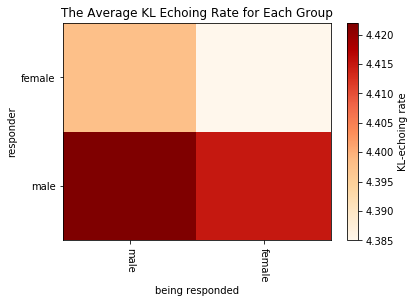

In [55]:
heatmapMatrixC=np.array([[4.422,4.415],[4.398,4.385]])
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC,cmap='OrRd')
cbar = plt.colorbar(hmap)
cbar.set_label('KL-echoing rate')
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)
a = ax.set_xticklabels(['male','female'], minor=False,rotation=270)
a = ax.set_yticklabels(['male','female'], minor=False)
plt.xlabel("being responded")
plt.ylabel("responder")
plt.title ("The Average KL Echoing Rate for Each Group")
plt.show()